In [2]:
install.packages('animation')


  There is a binary version available but the source version is later:
          binary source needs_compilation
animation    2.6    2.7             FALSE



installing the source package 'animation'



In [2]:
library('animation')

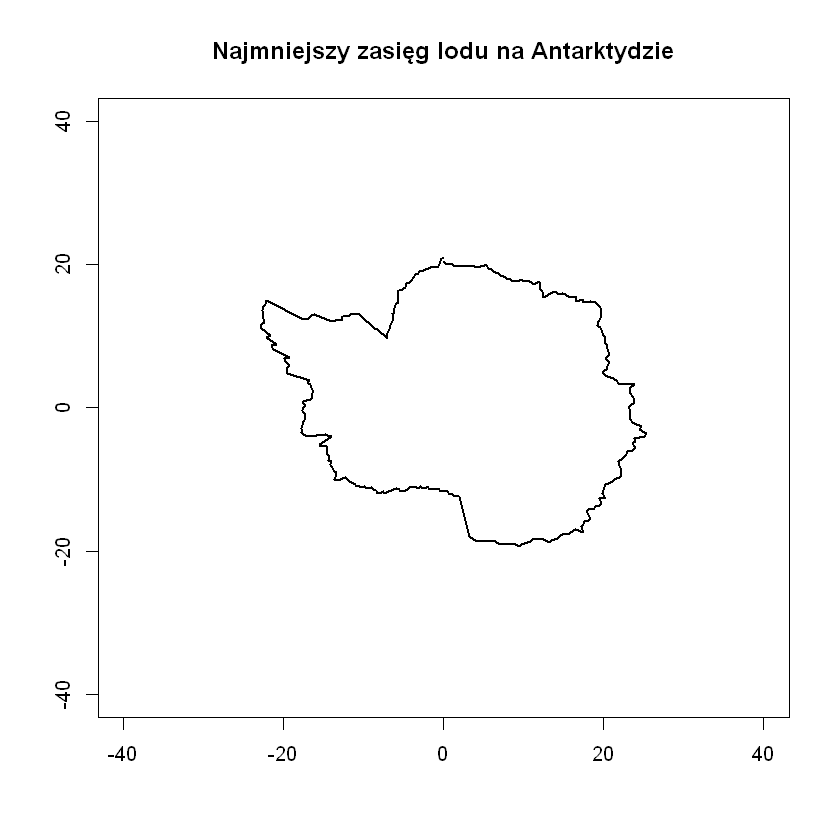

In [3]:
data1<-read.csv("daily_ice_edge.csv")

y<-apply(data1[-1],2,min)
x<-seq(0,360,1)


#przeliczanie kątów na radiany
theta<-x*pi / 180

#odwrócenie układu, żeby patrzeć od antarktydy do równika
r<-y+90



plot(r * sin(theta),r*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2)
title("Najmniejszy zasięg lodu na Antarktydzie")

#wycinanie danych:
dane_wyciente <- data1[1:1589, ]
start_wiersza <- 1590
indeksy <- seq(start_wiersza, nrow(data1), 2)
dane_wyciente <- rbind(dane_wyciente, data1[indeksy, ])


#generowanie wektora dni
ilosc_wierszy <- nrow(dane_wyciente)
dni <- seq(1, ilosc_wierszy)

#ramka danych do wynikow
model_matematyczny<-data.frame(dni)

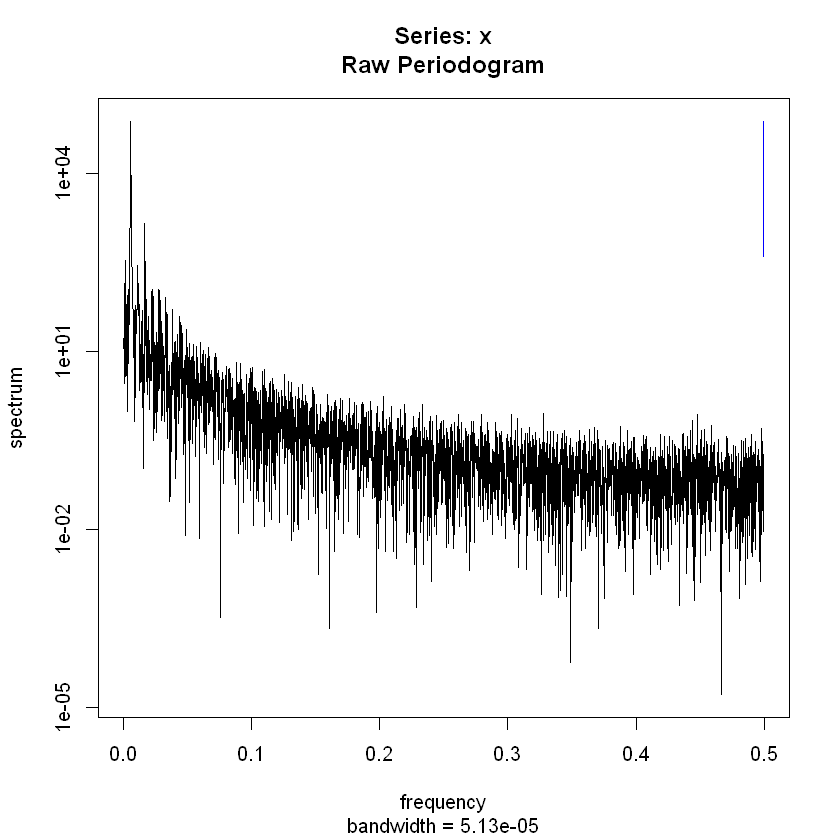

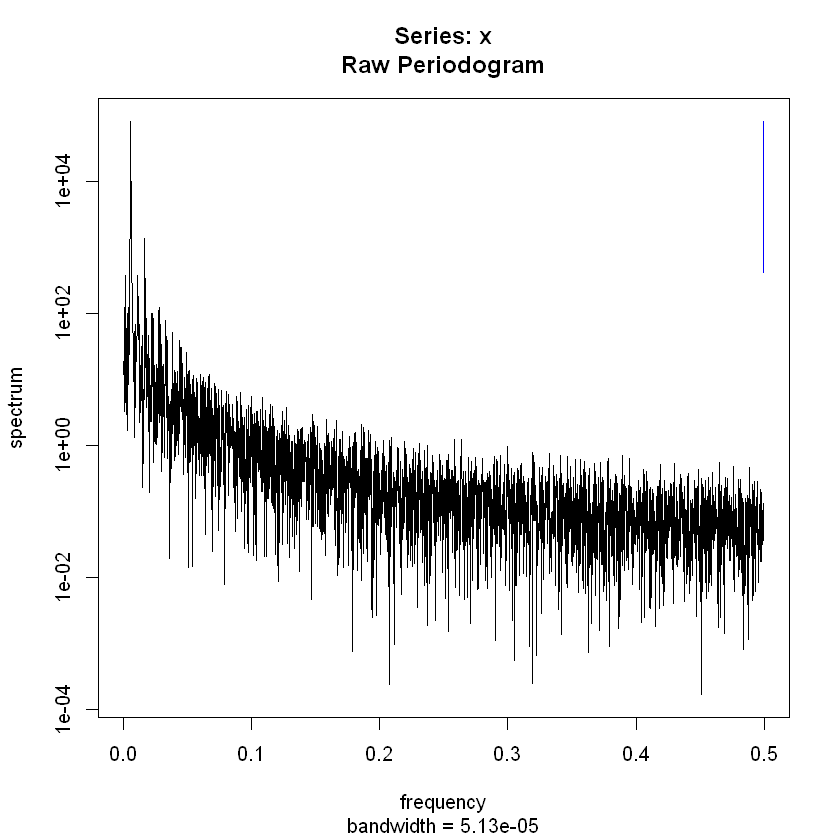

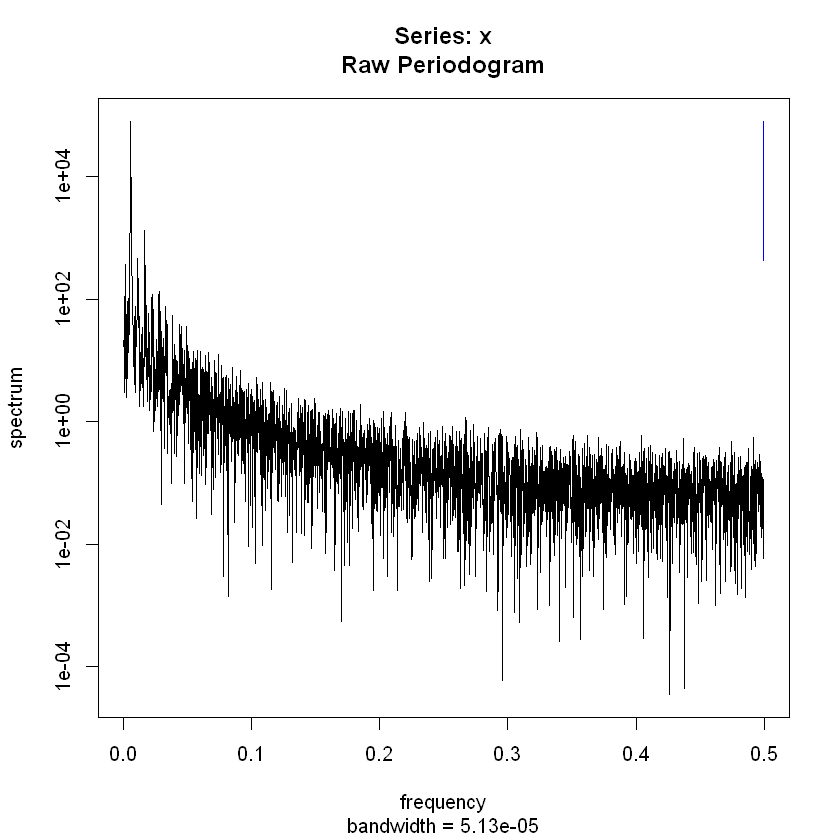

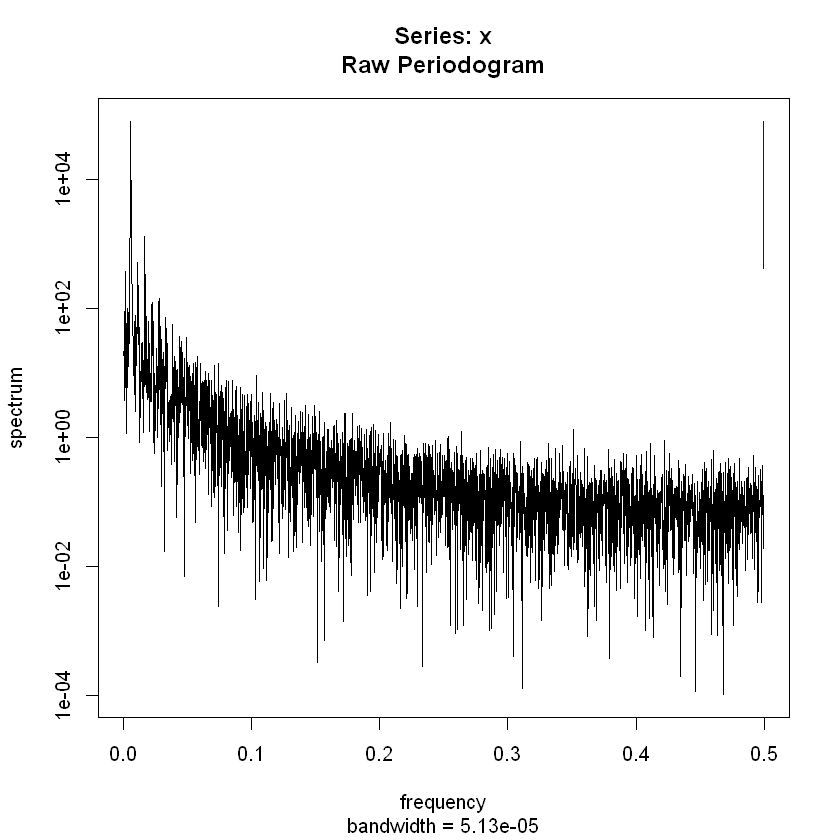

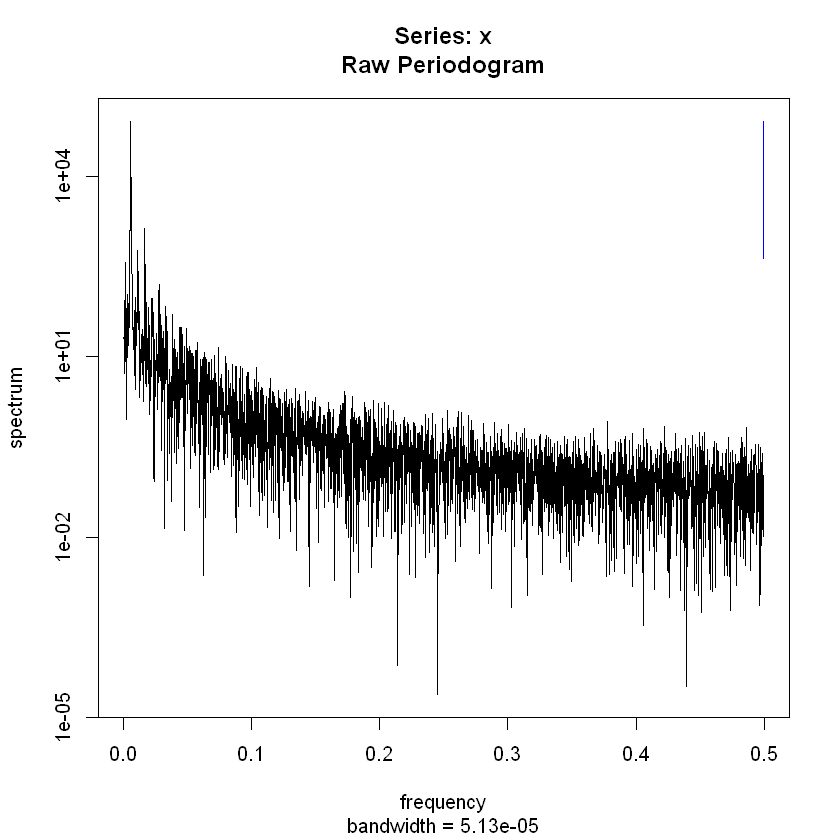

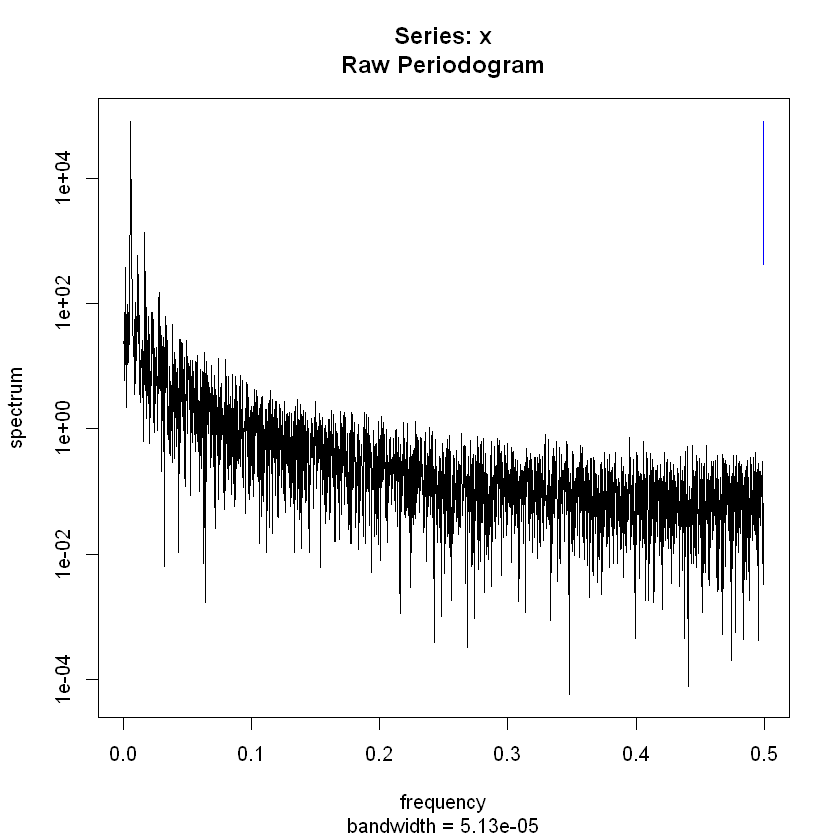

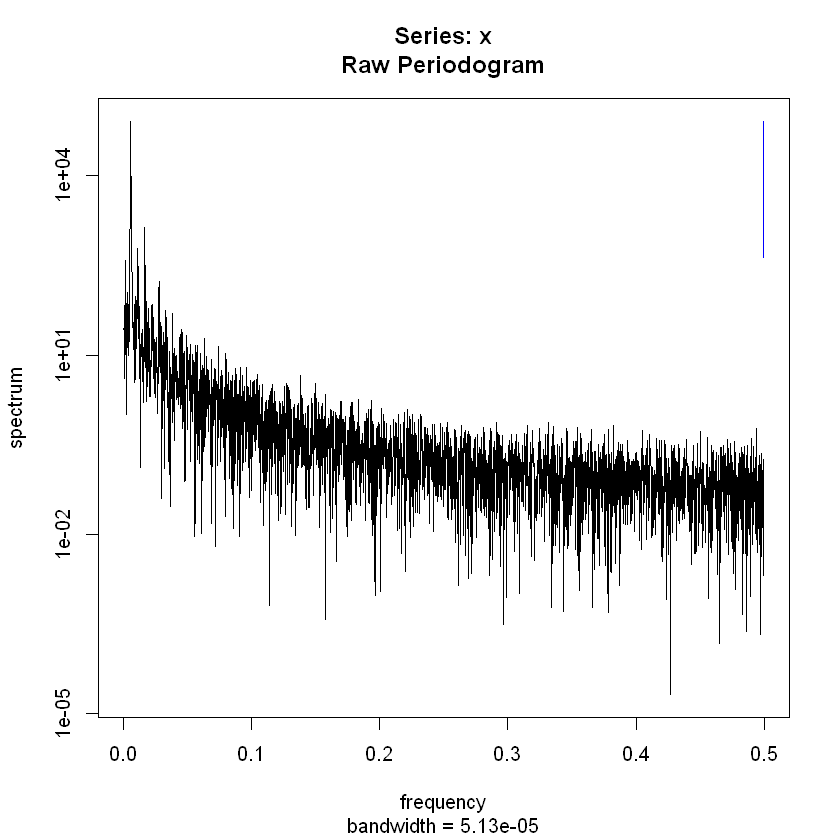

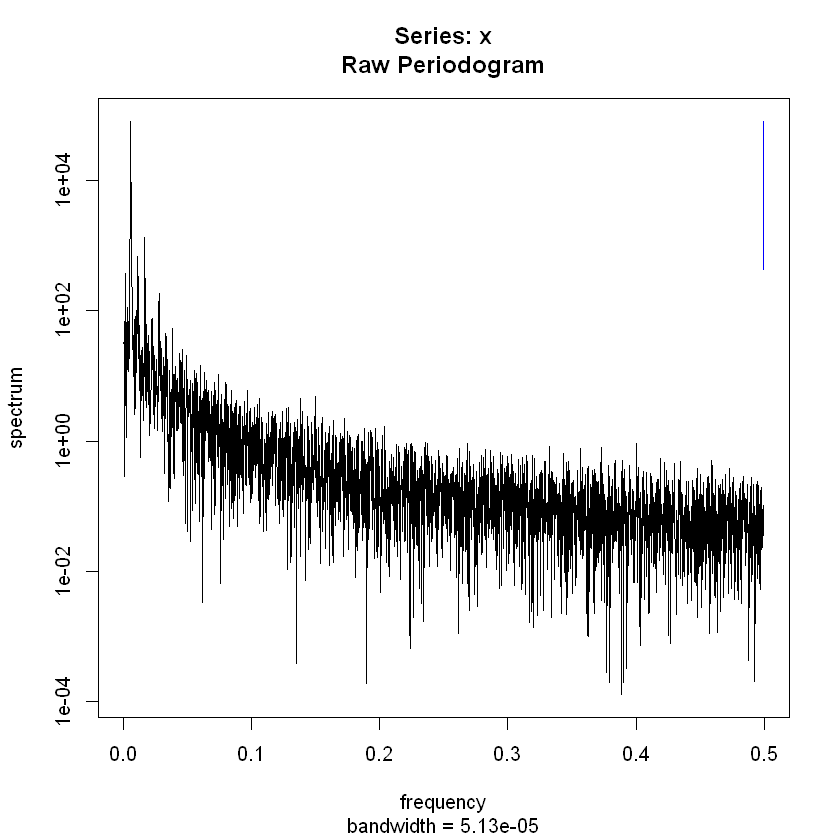

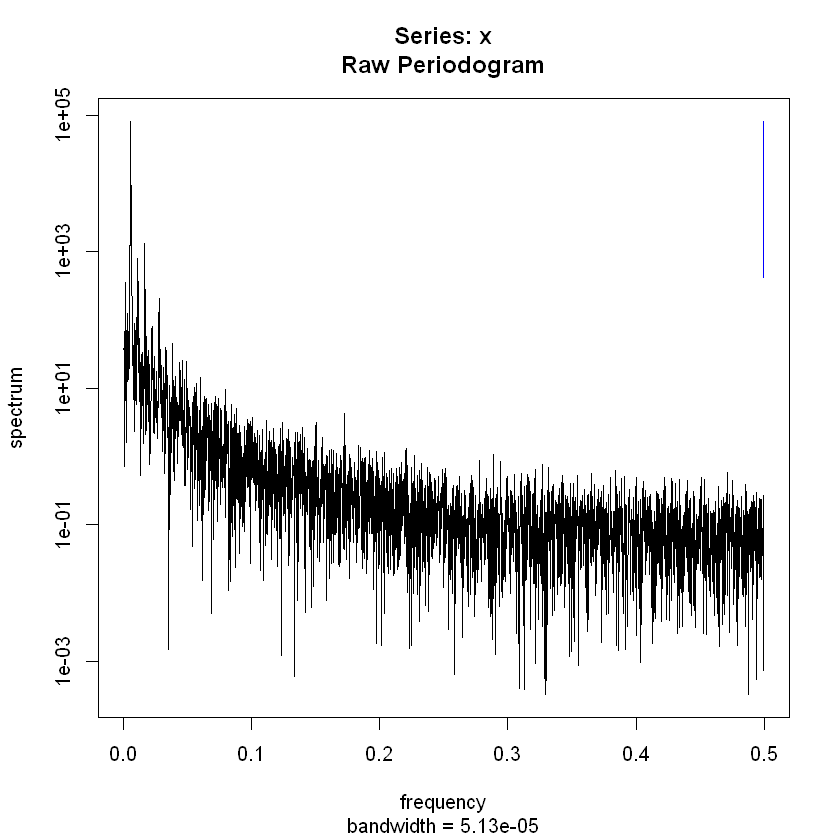

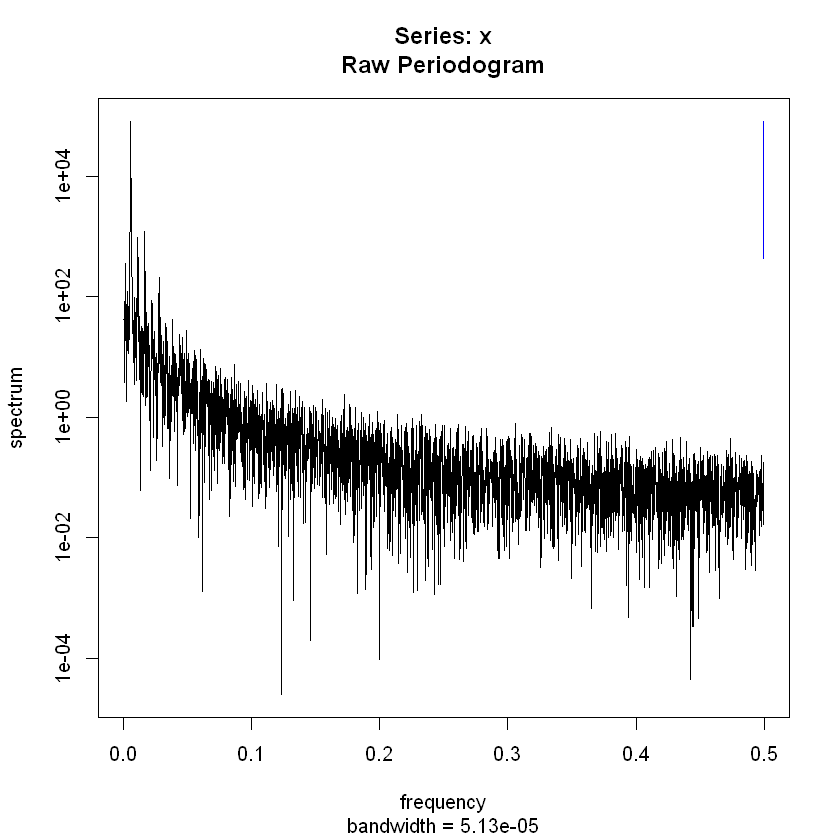

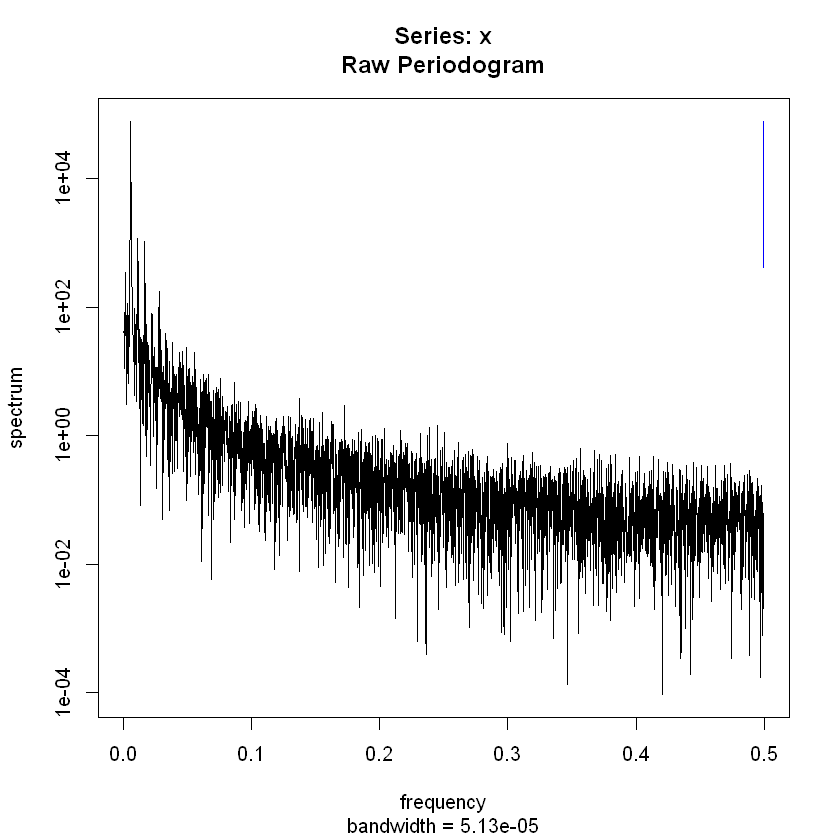

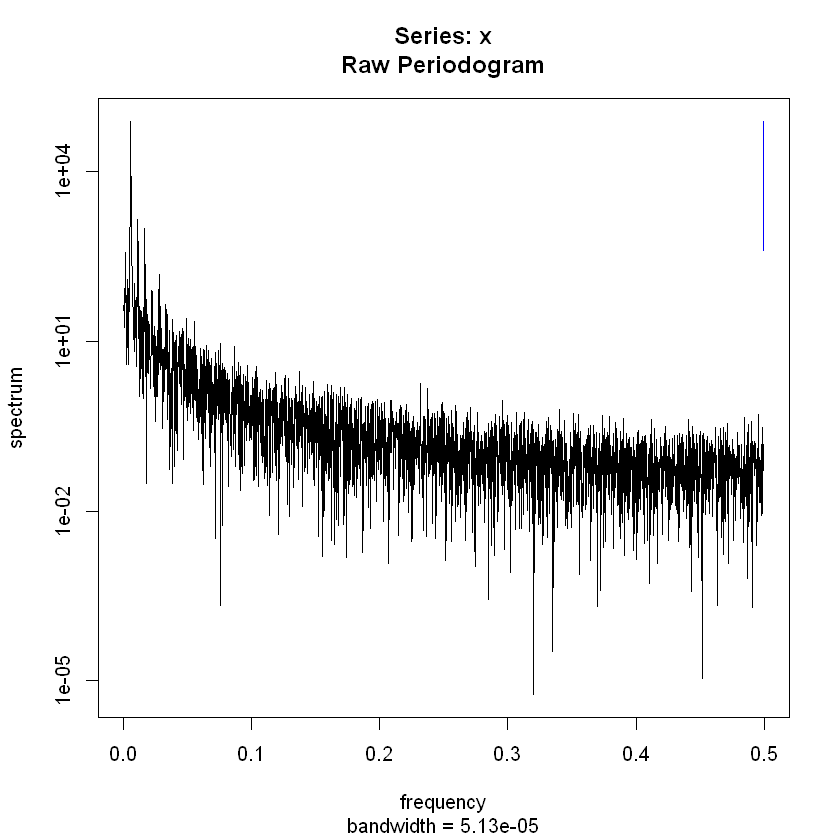

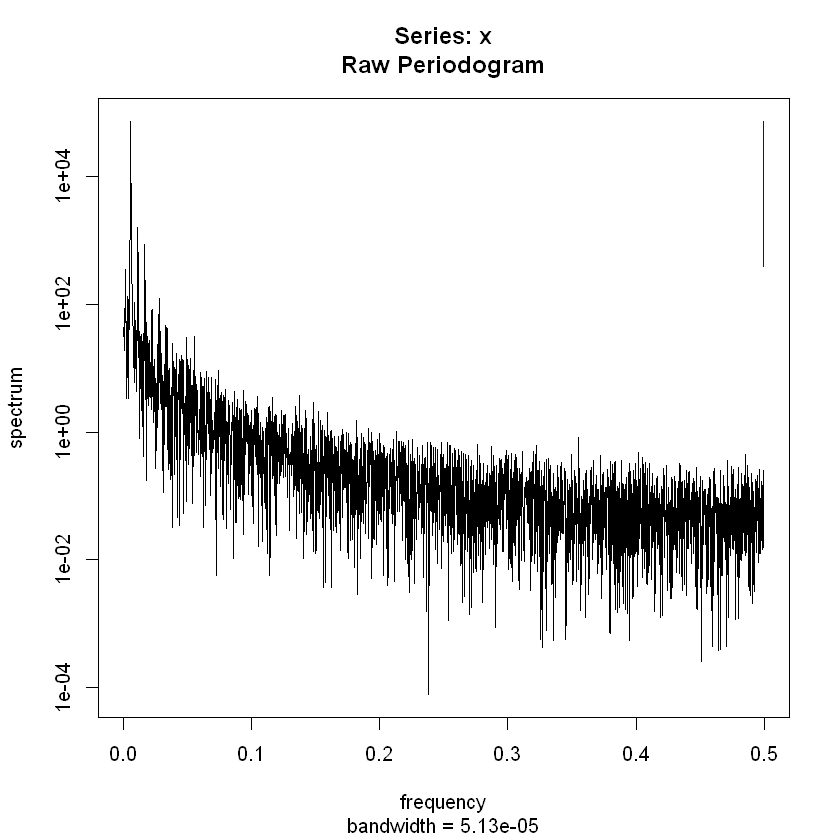

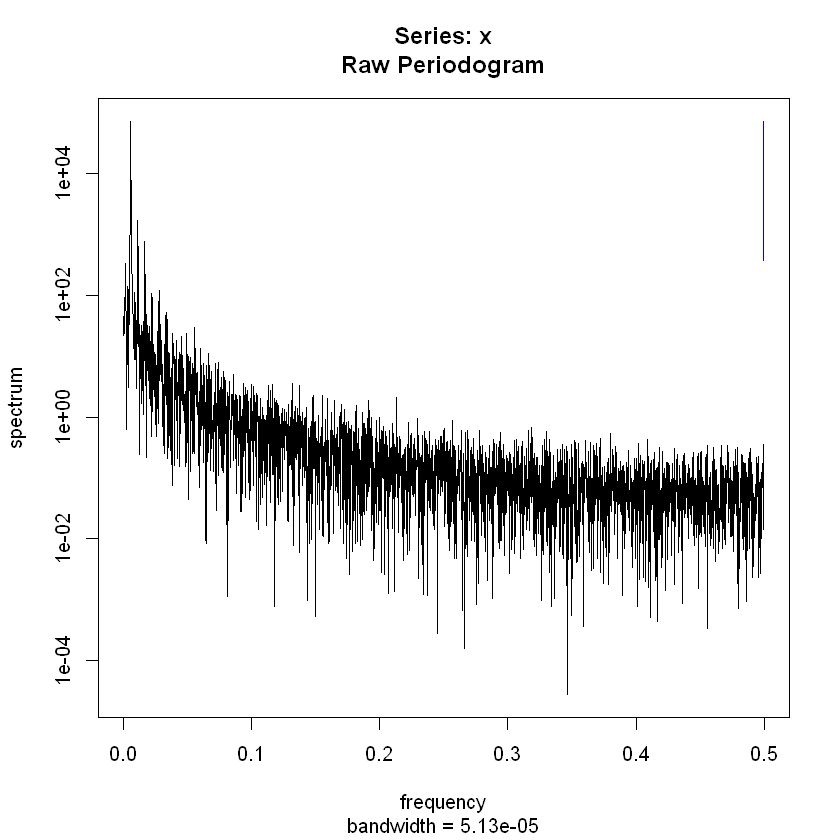

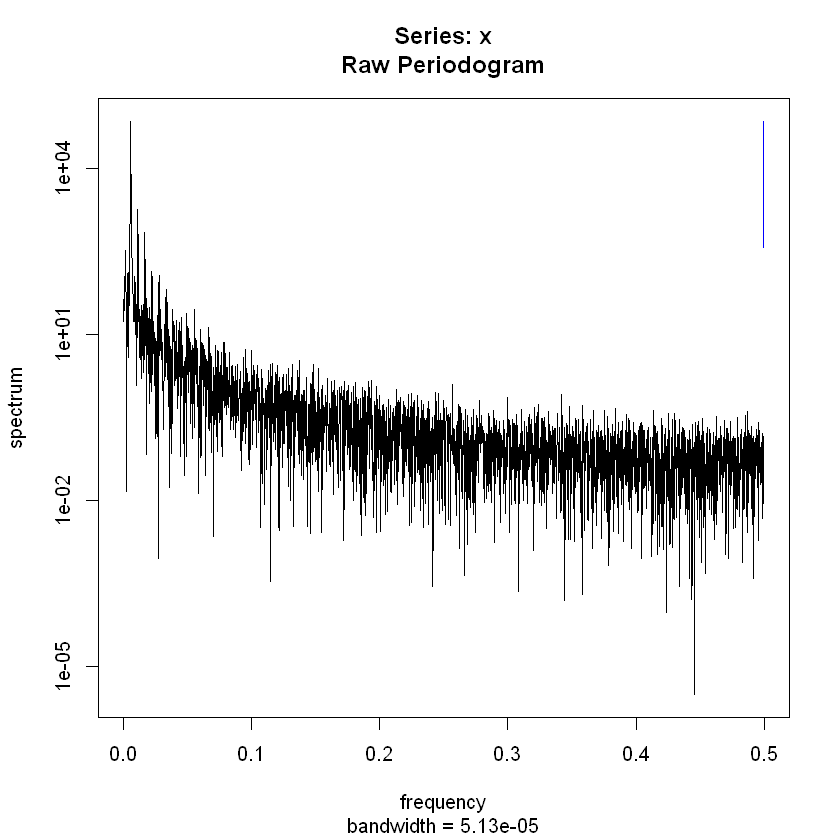

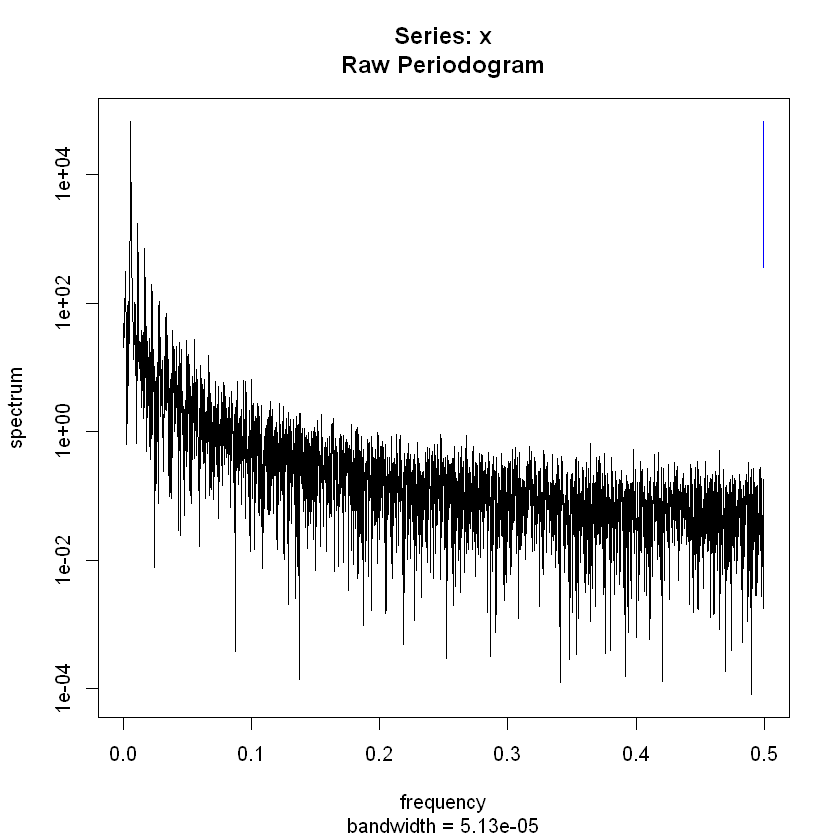

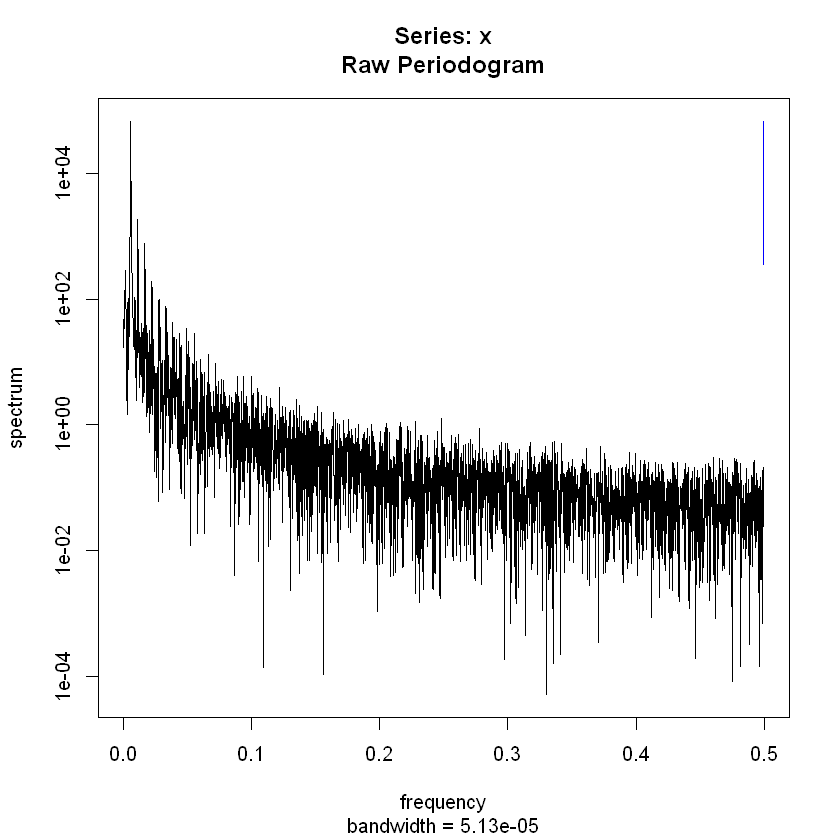

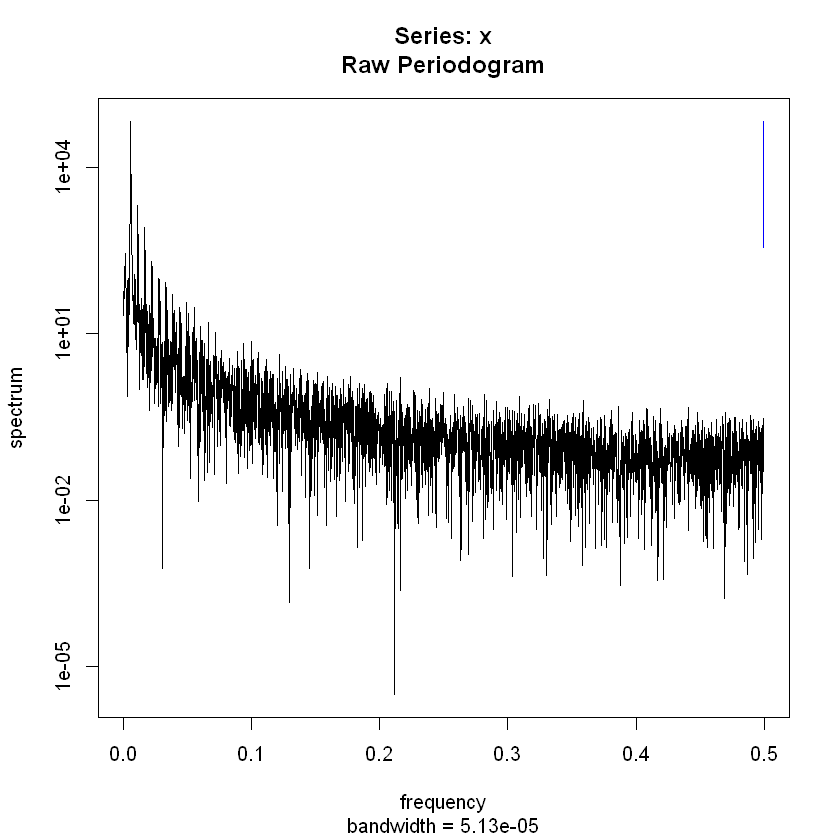

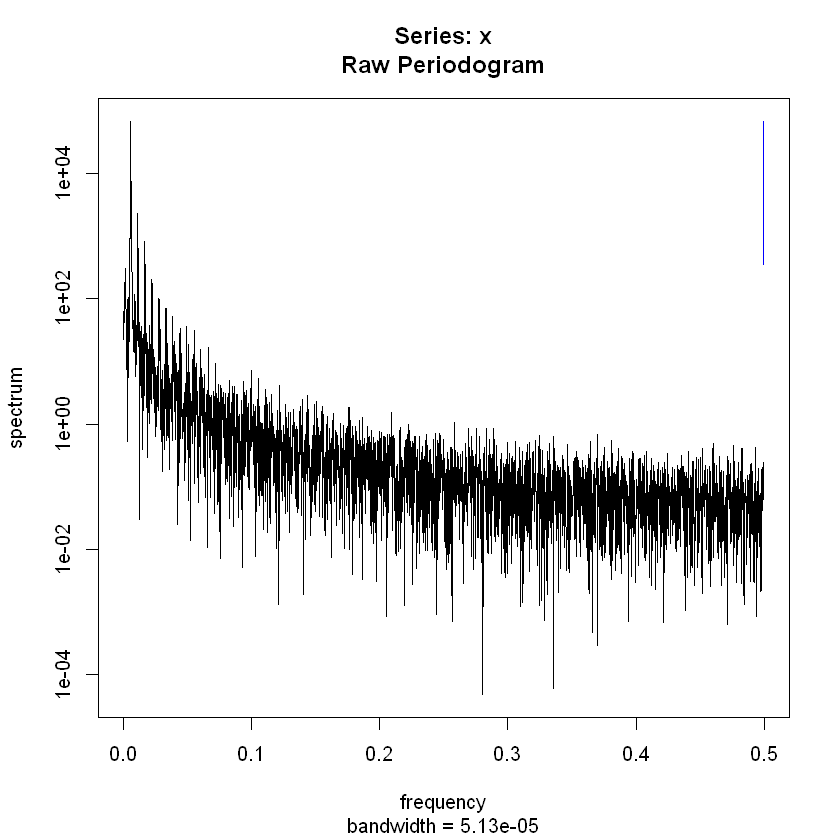

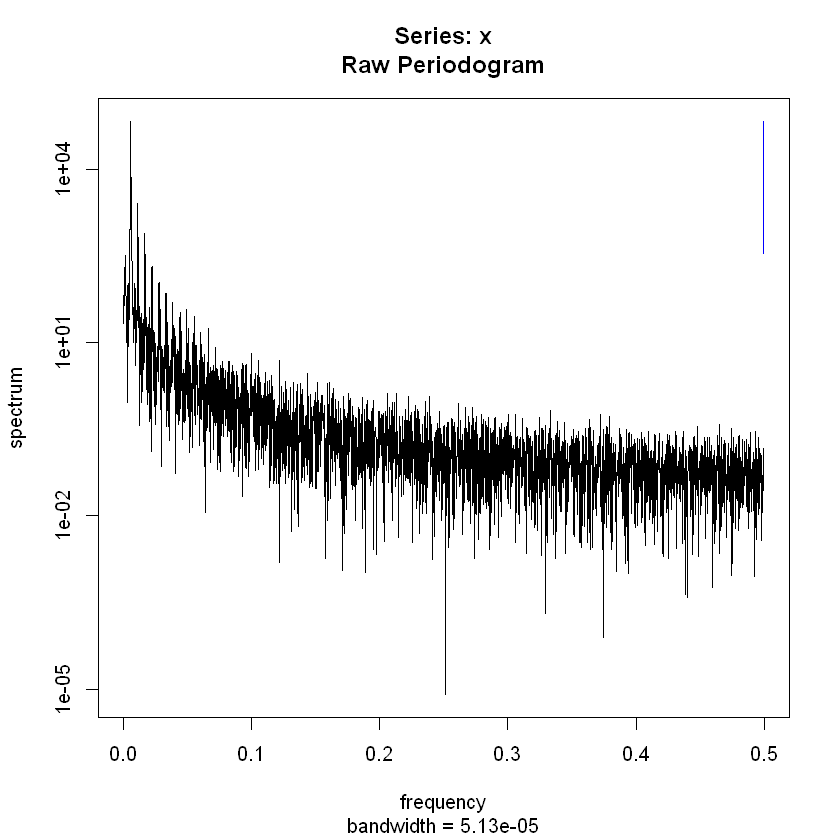

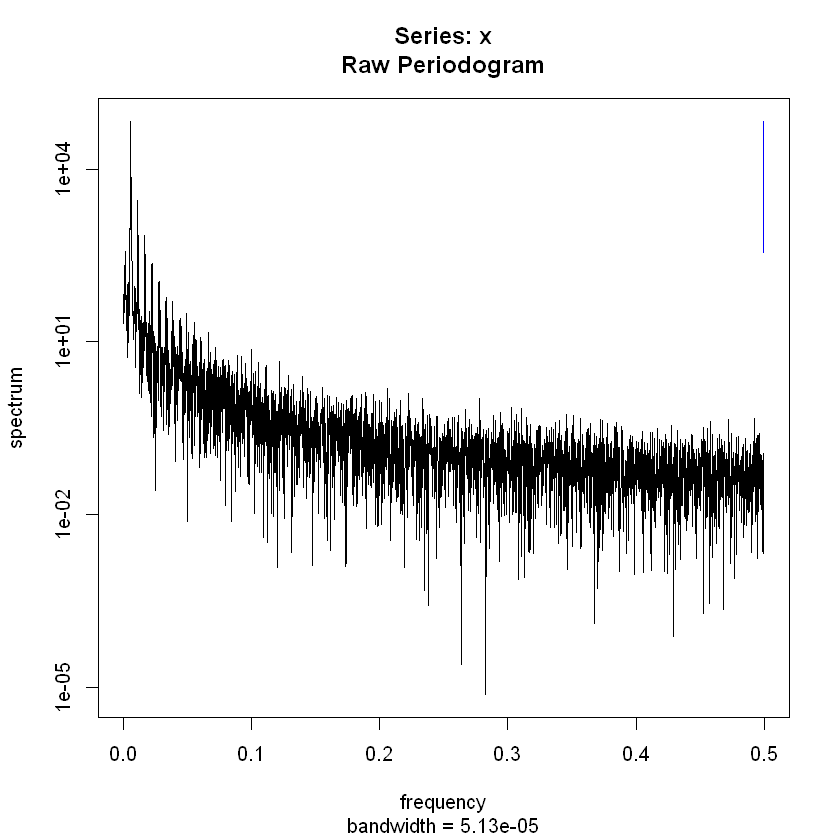

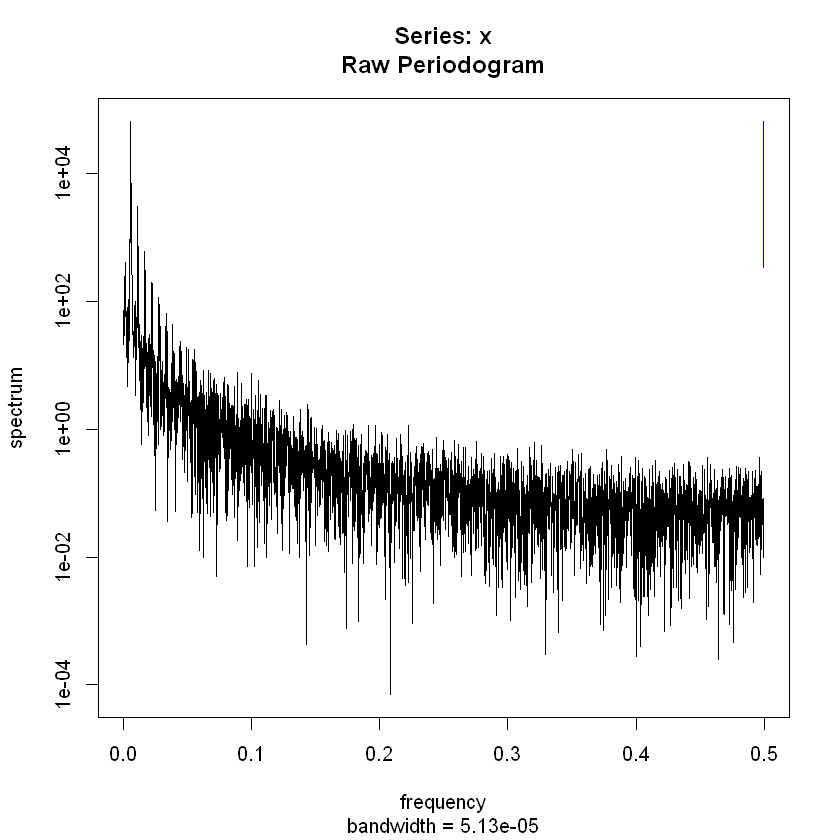

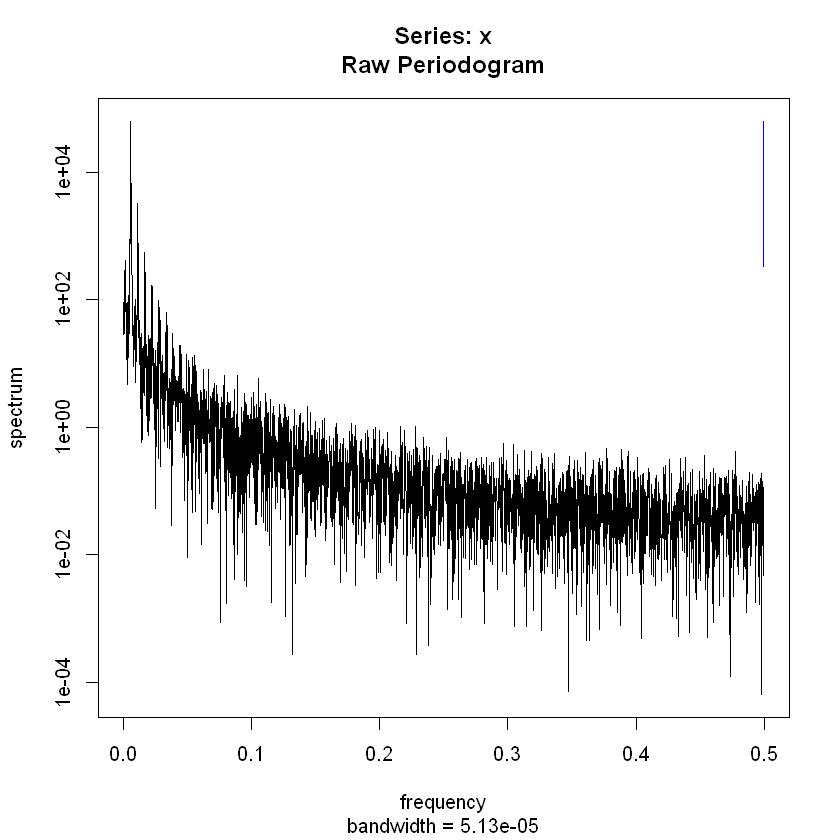

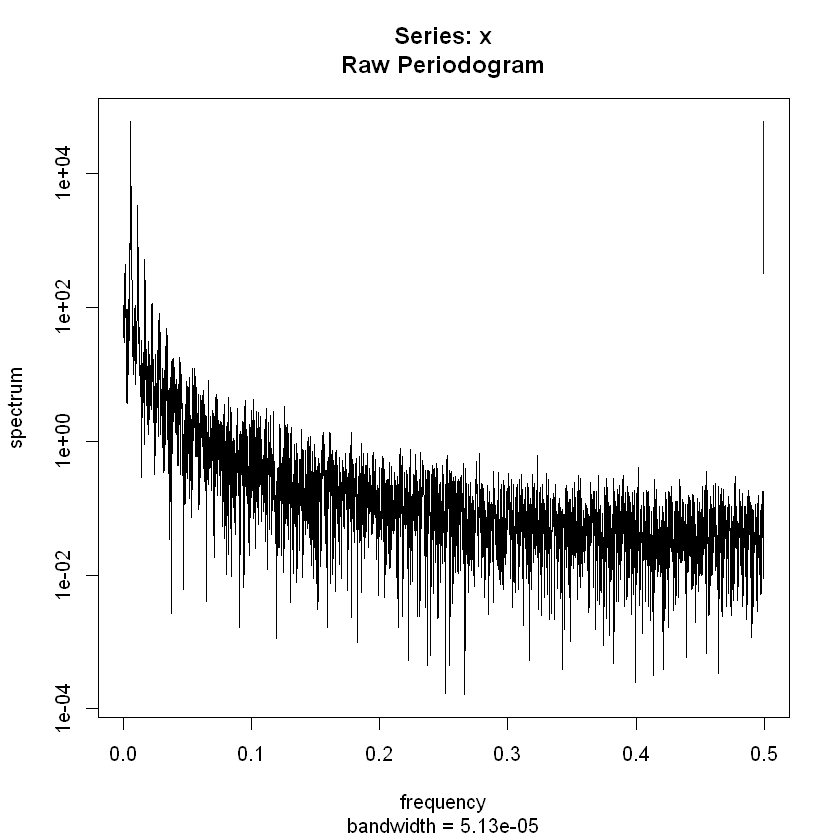

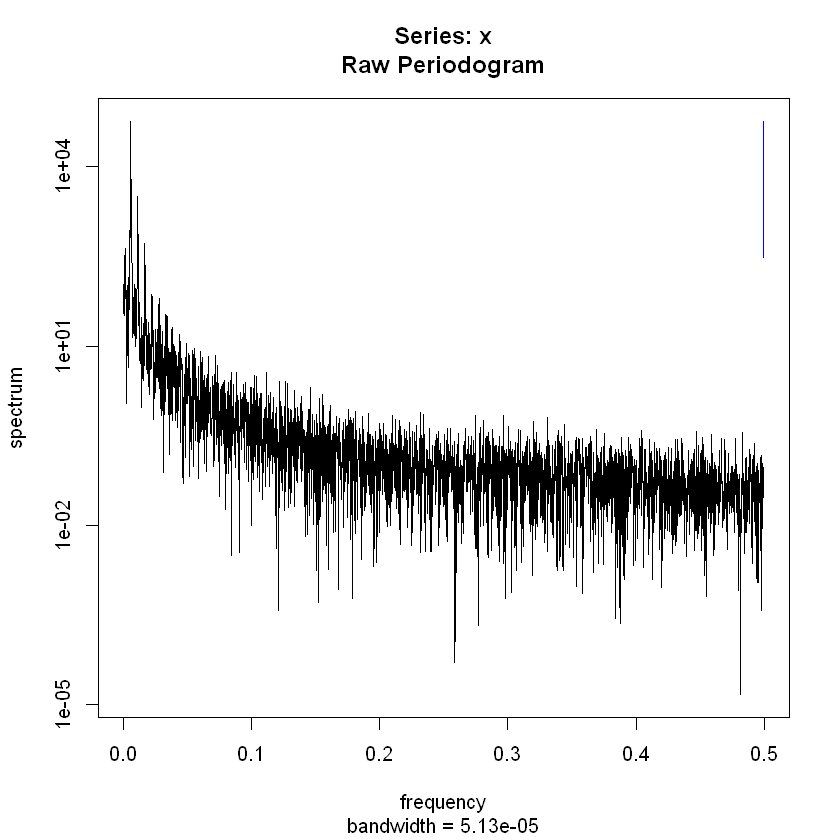

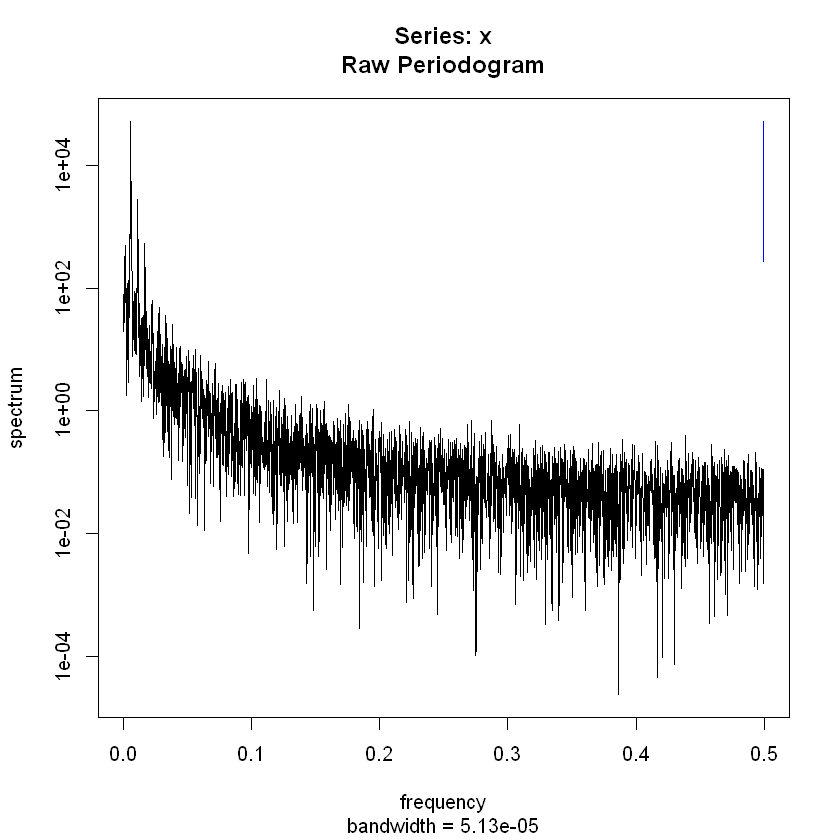

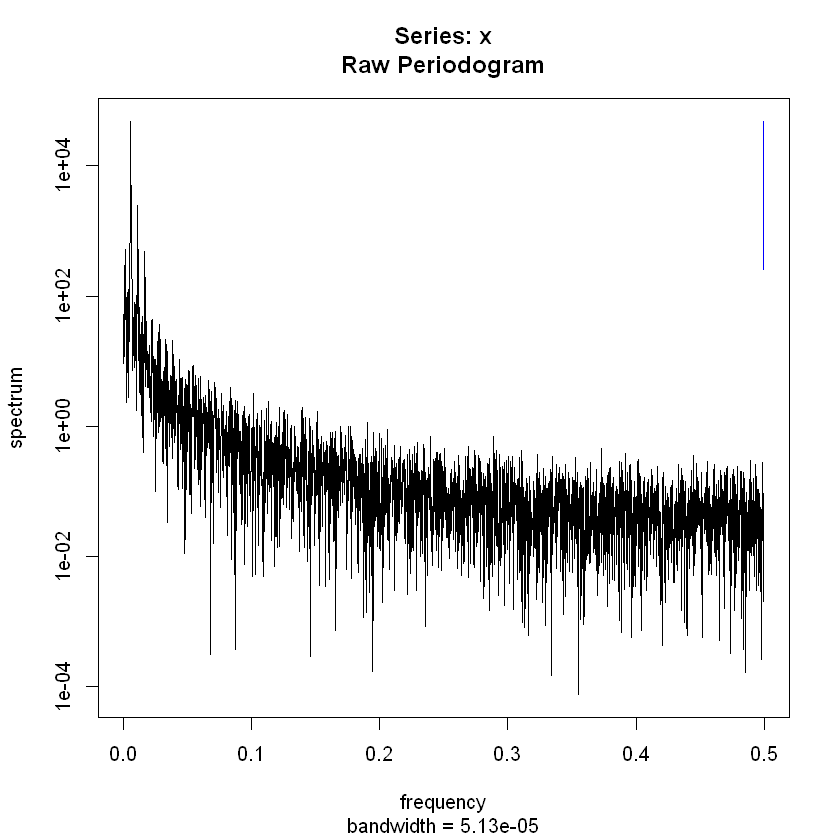

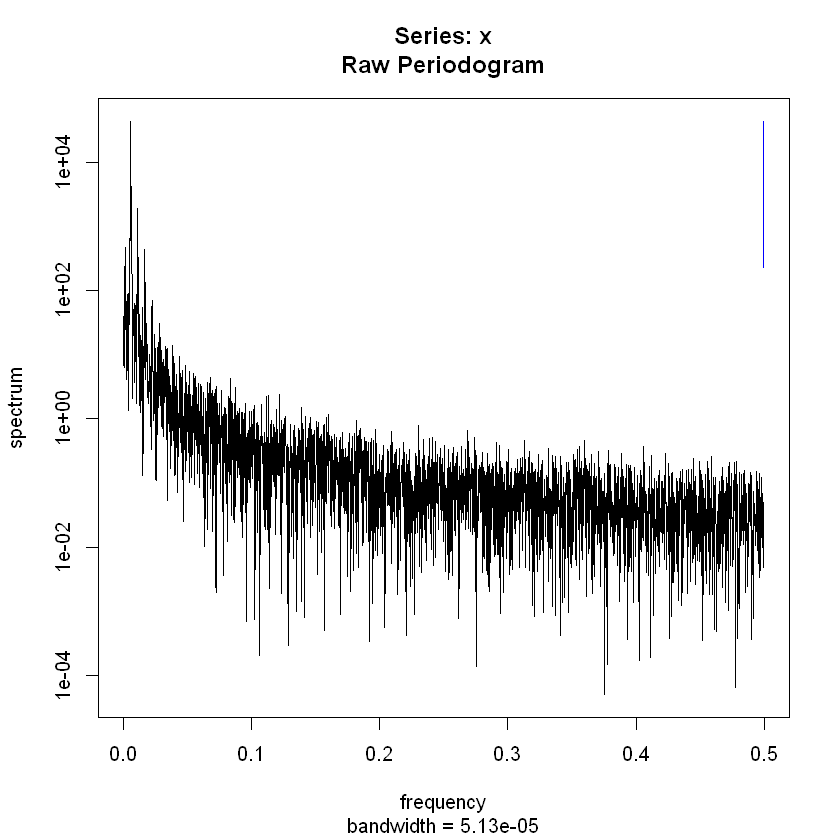

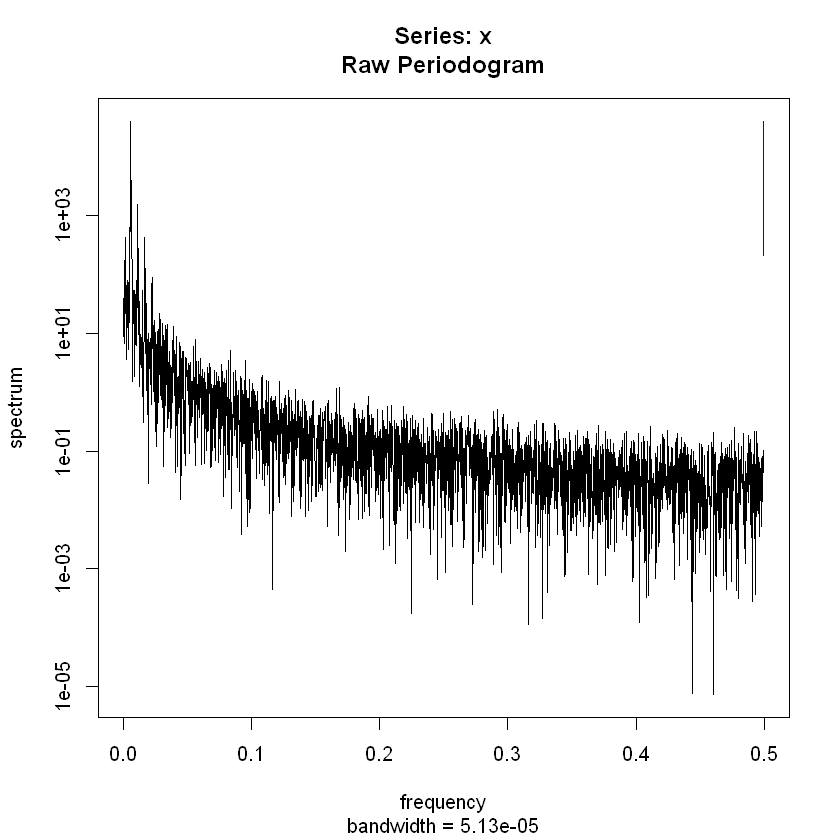

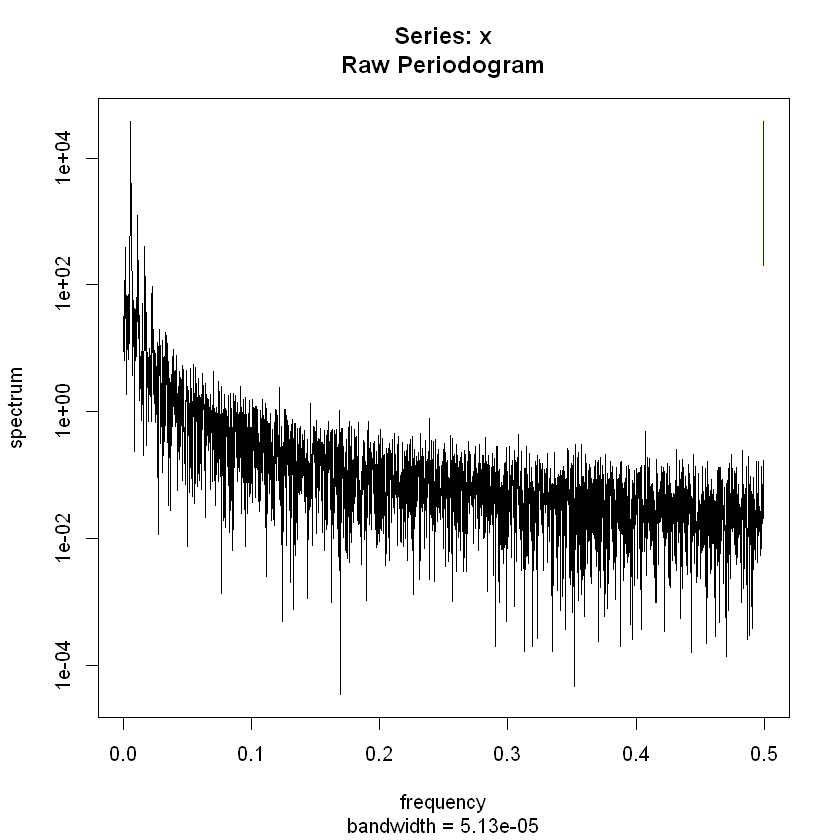

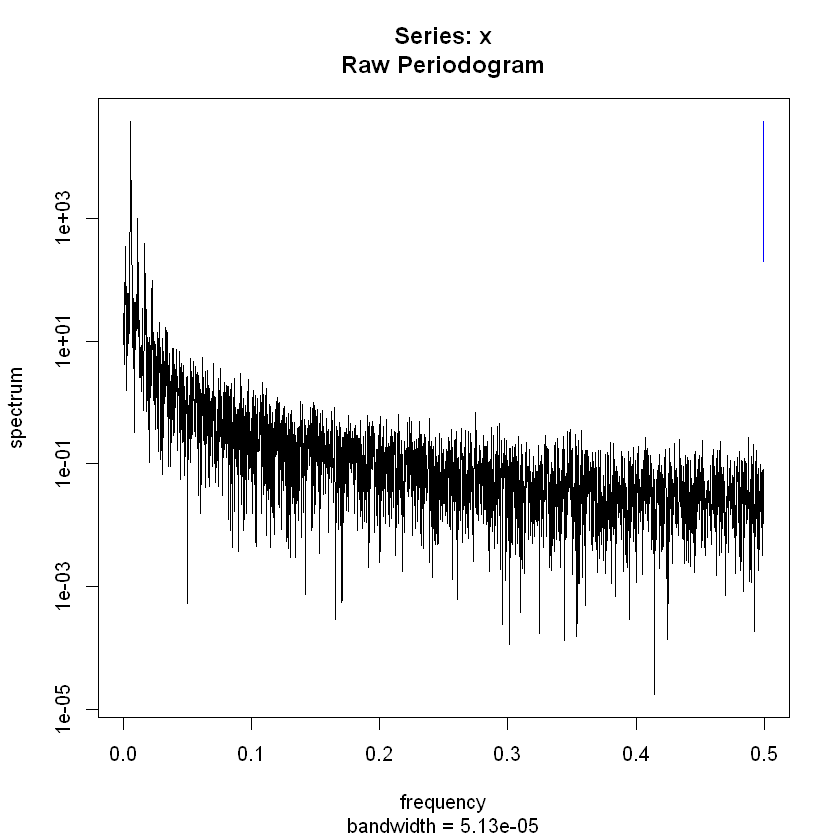

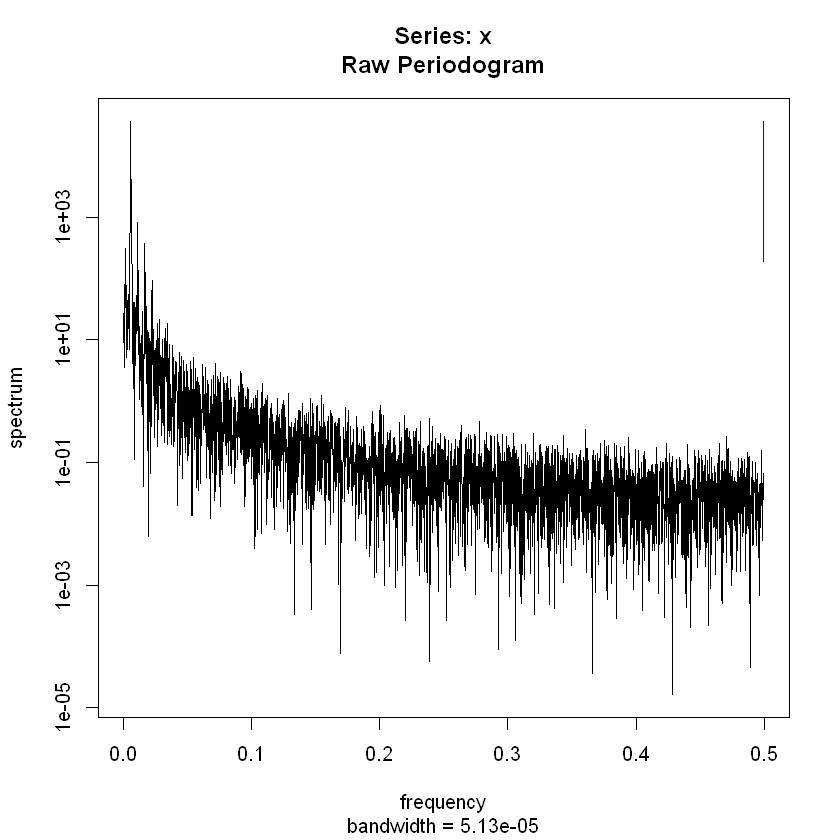

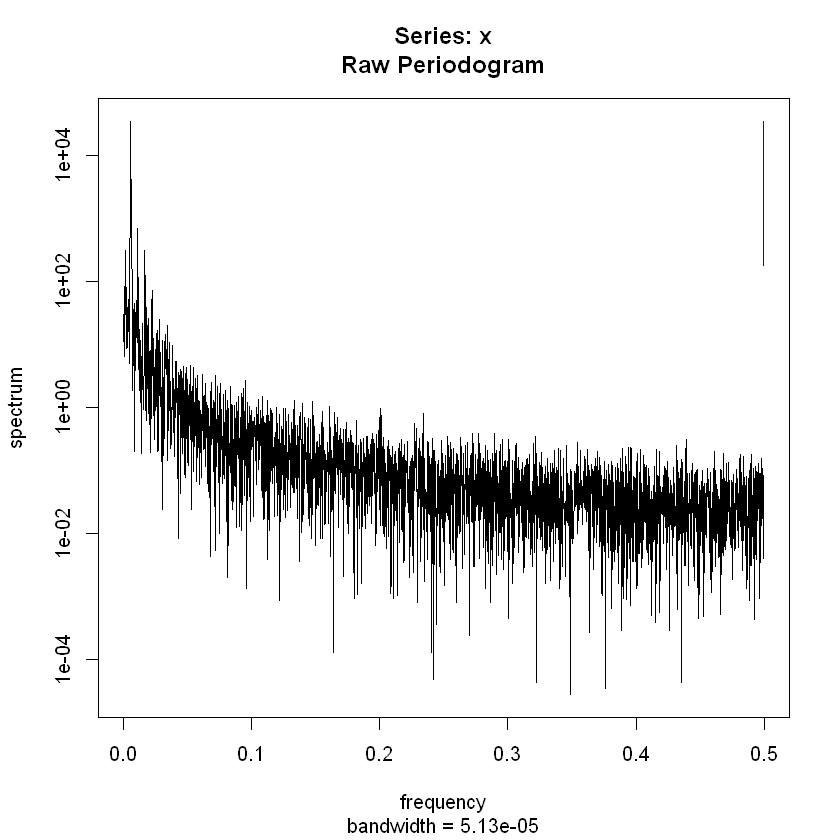

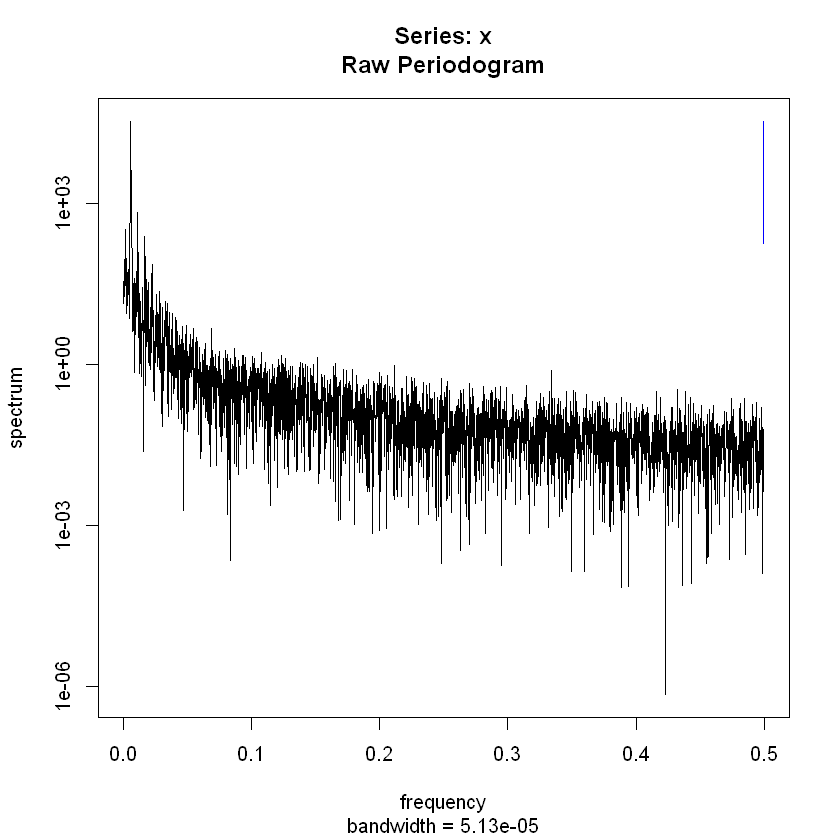

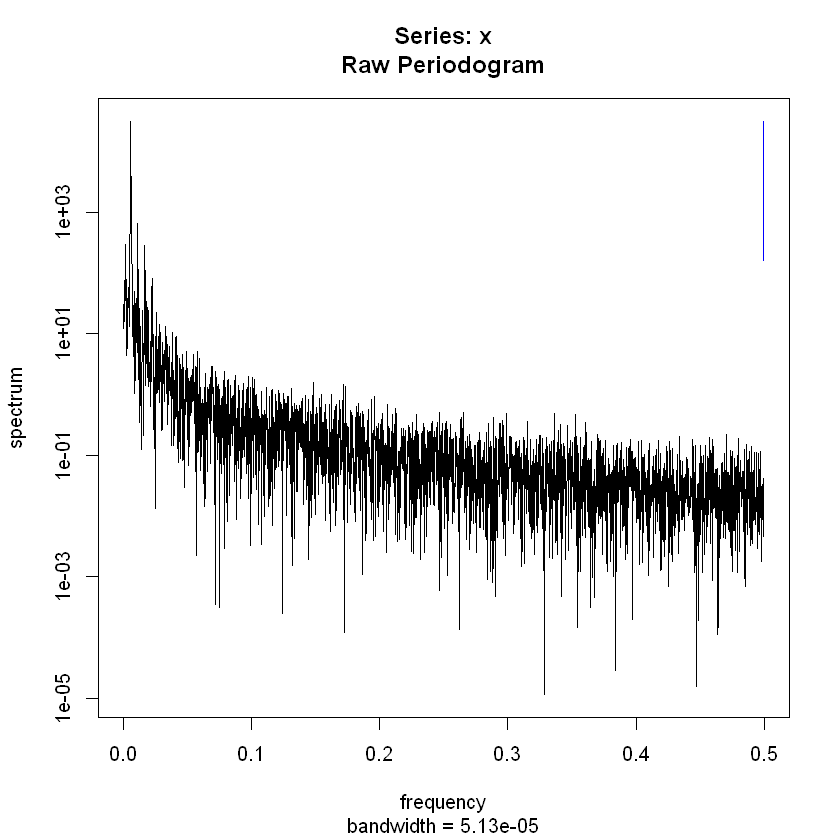

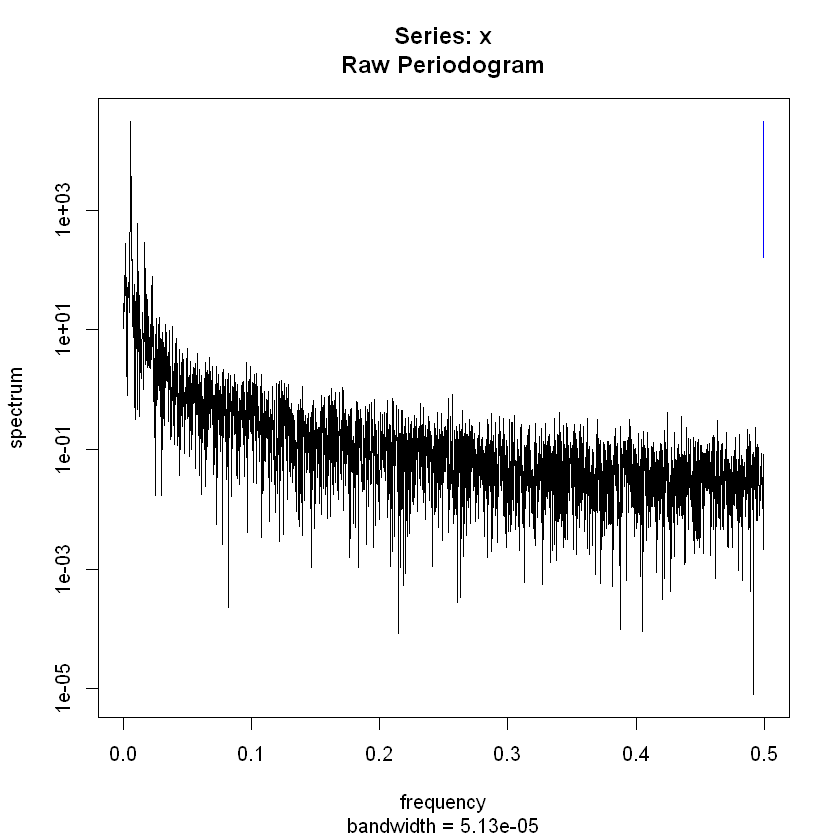

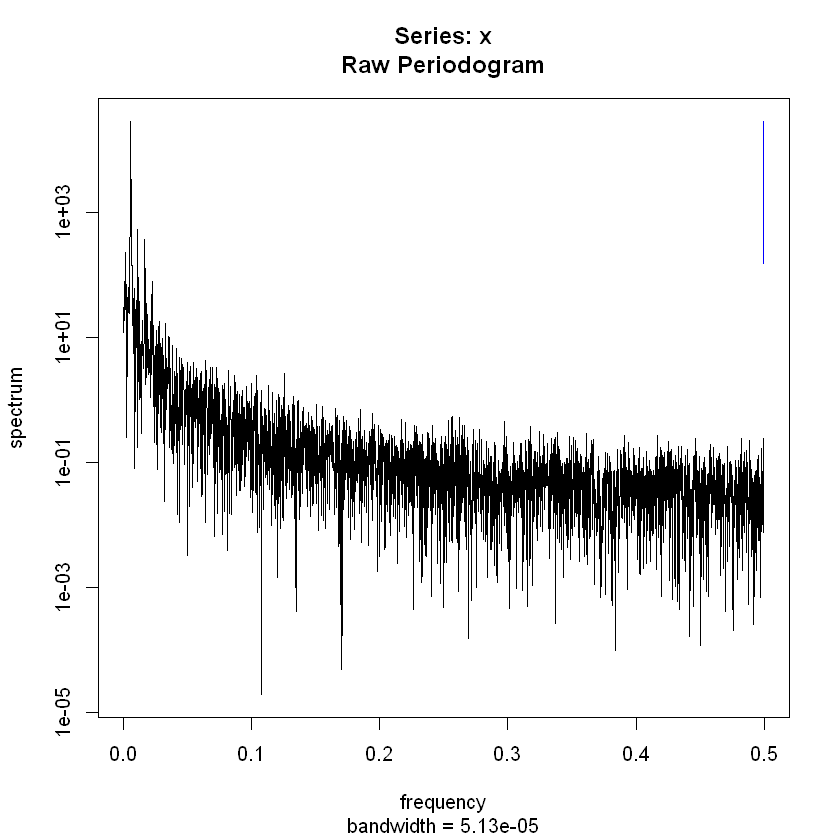

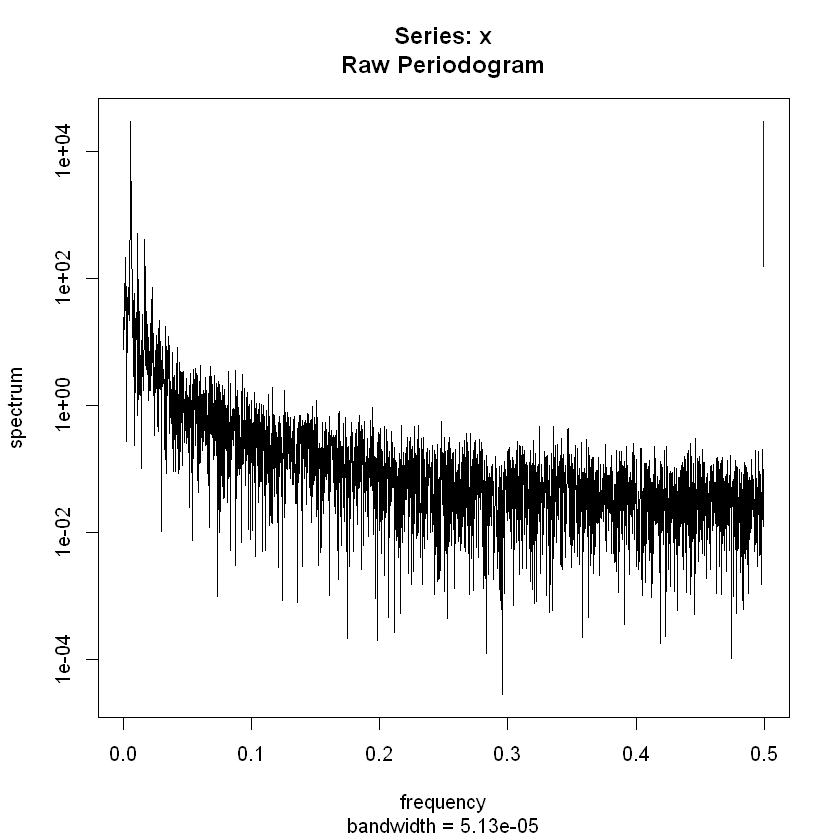

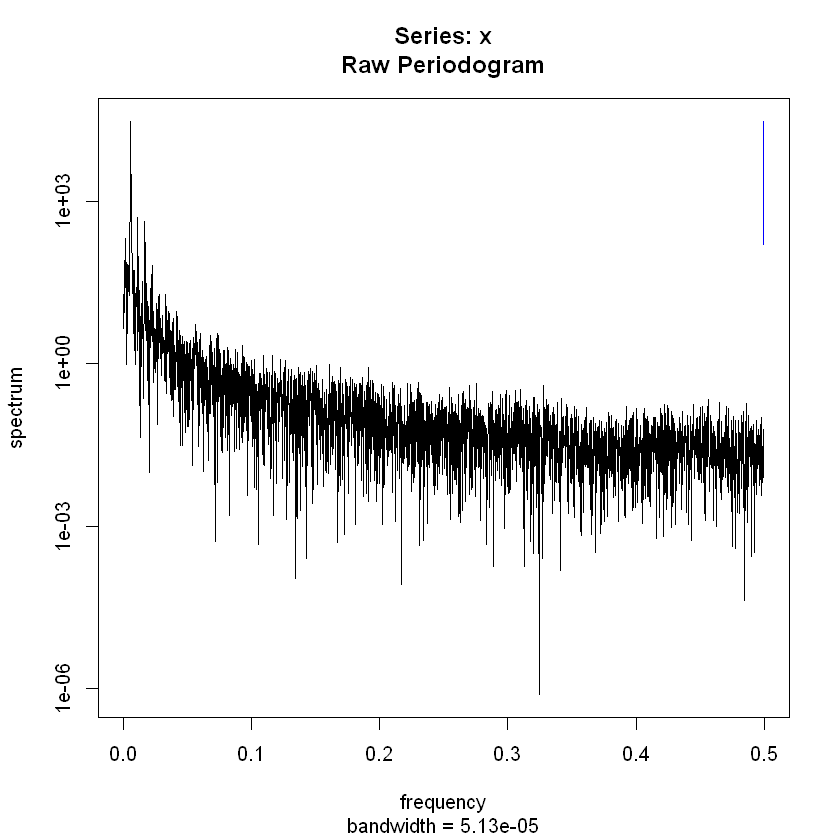

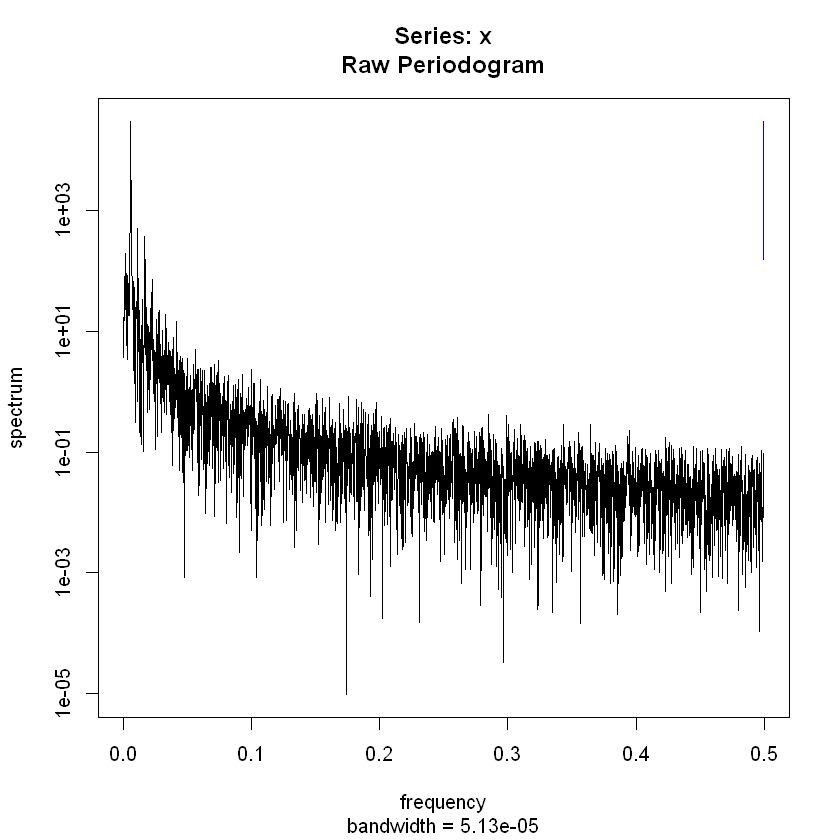

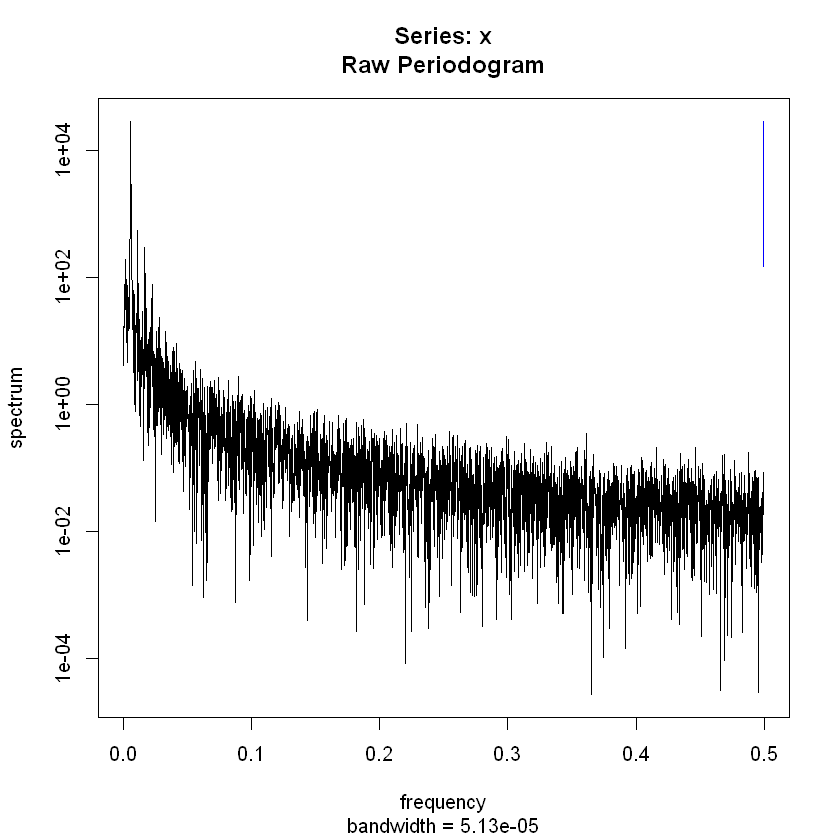

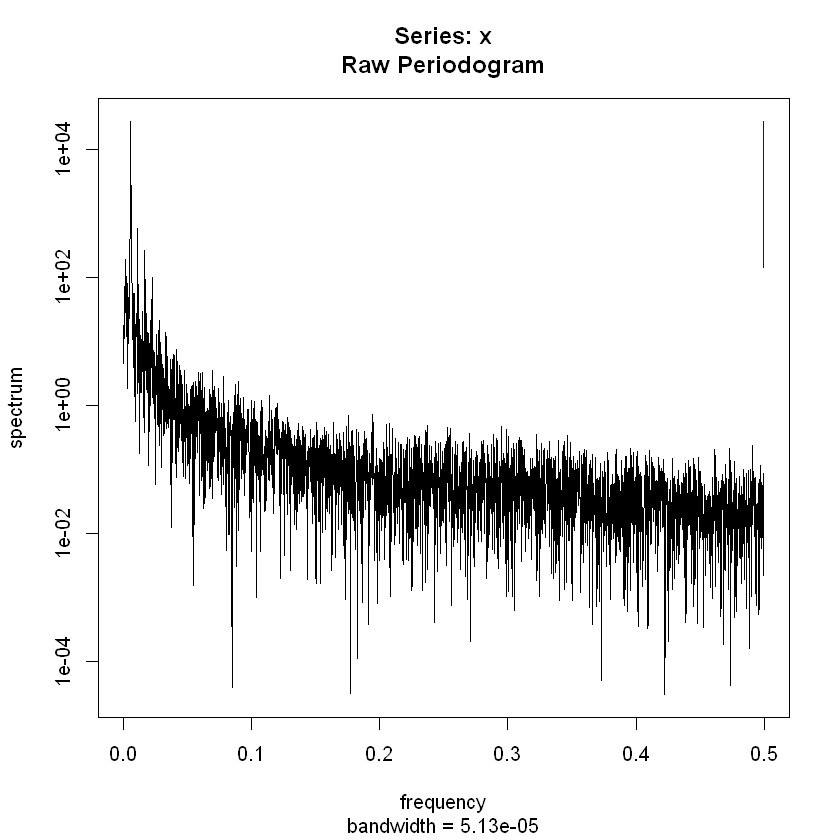

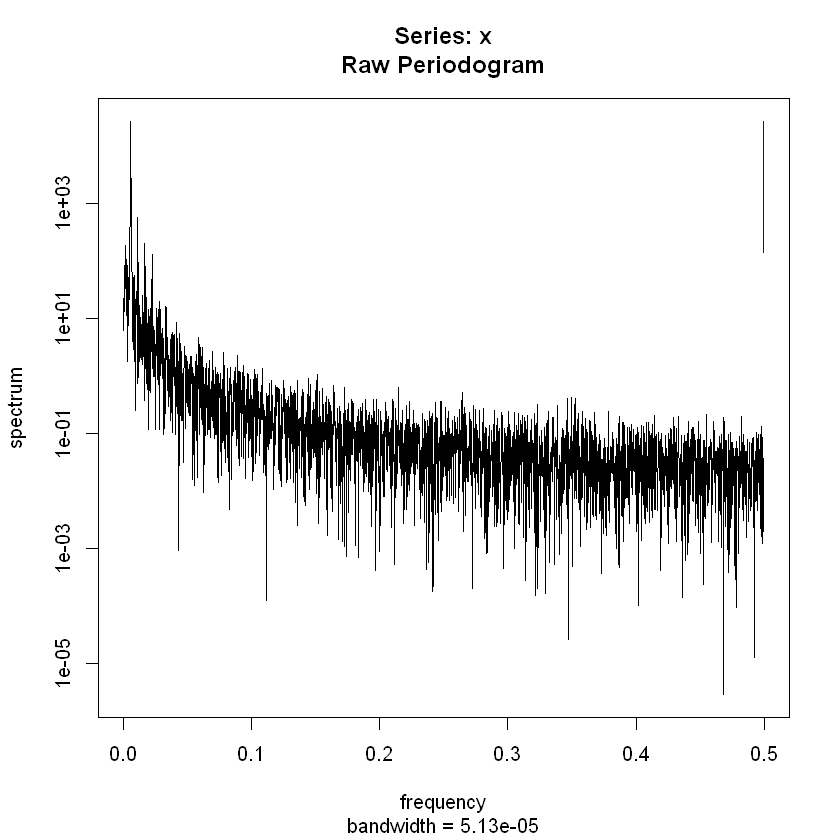

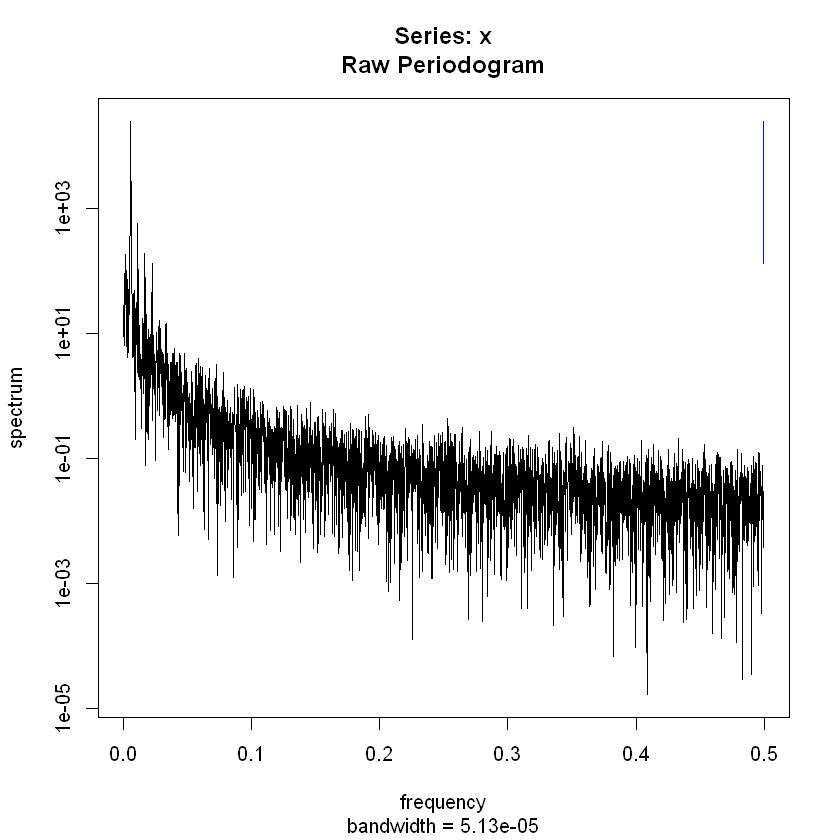

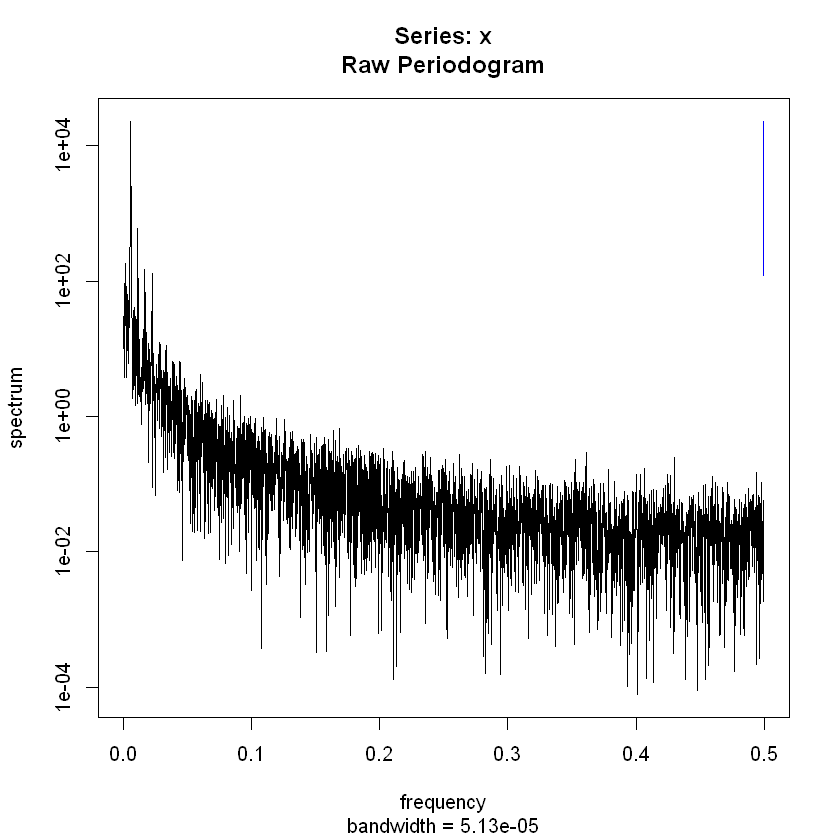

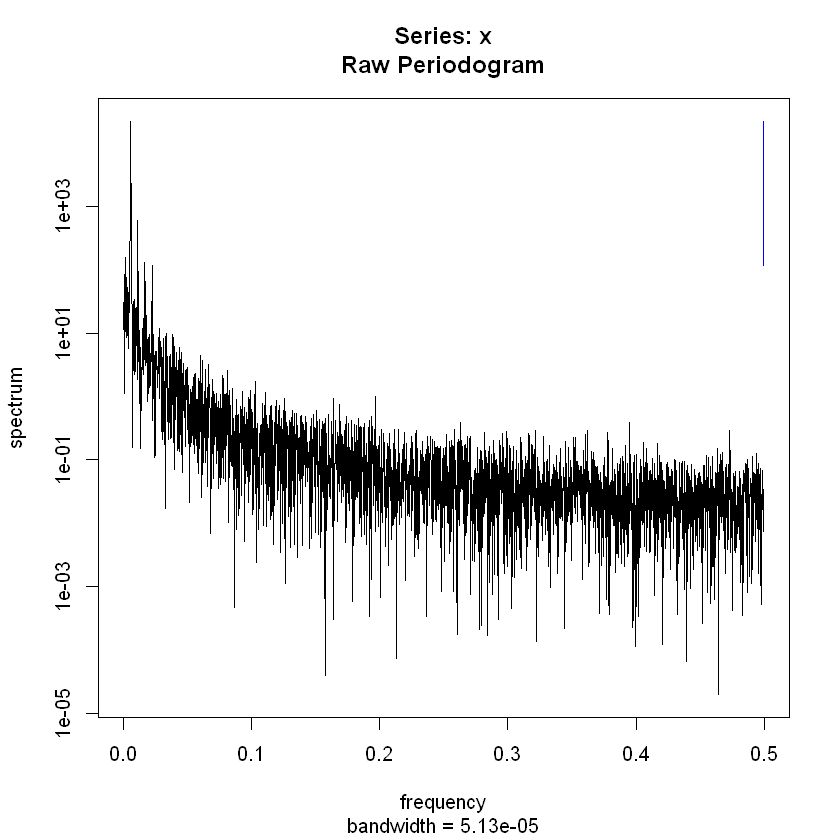

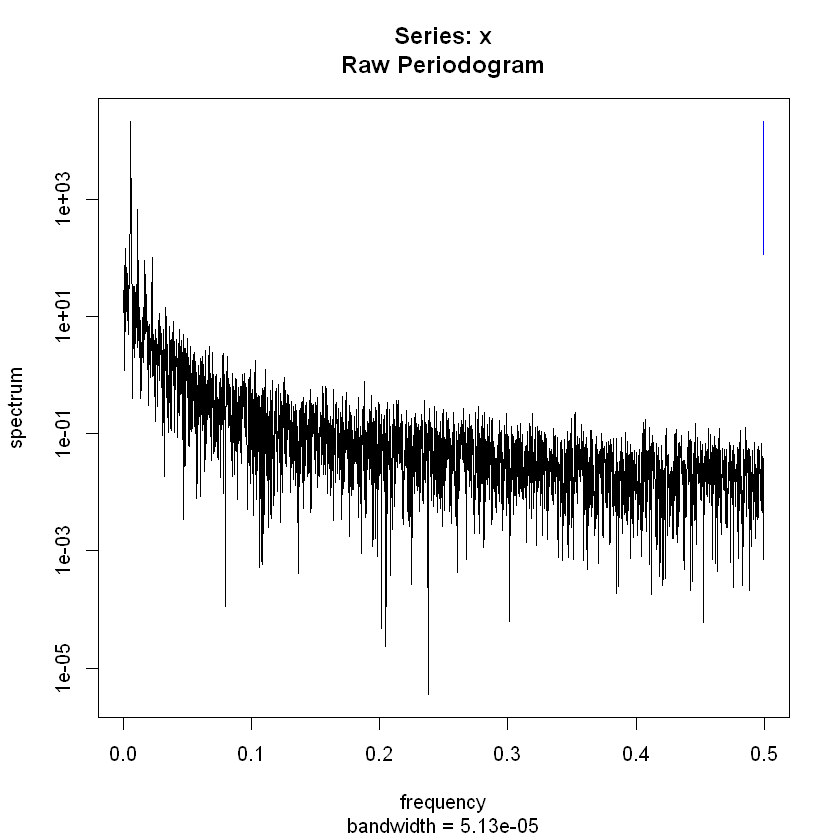

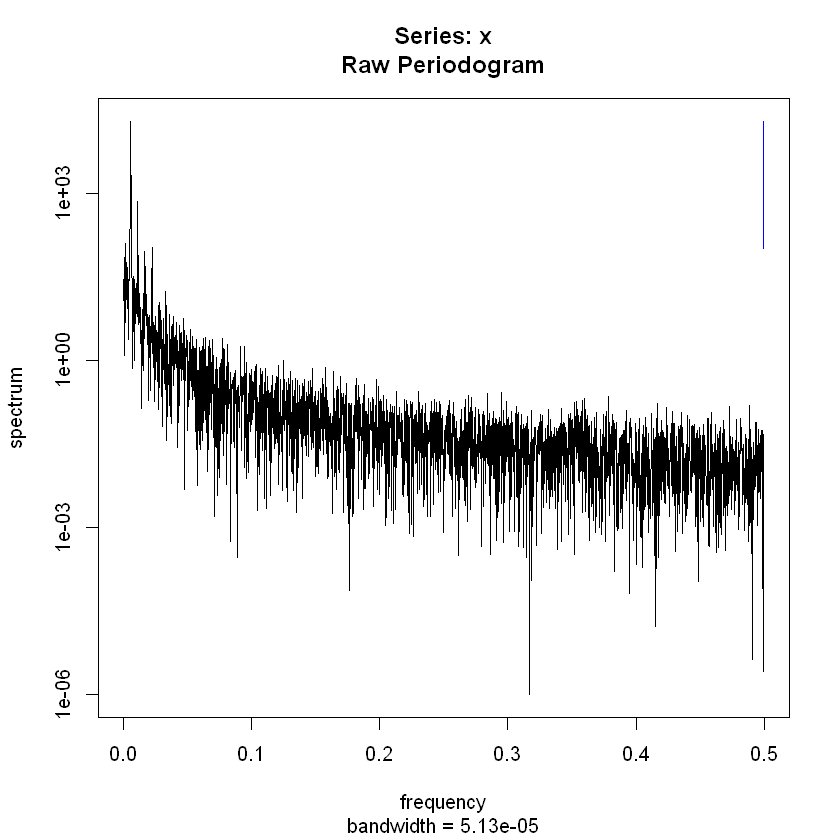

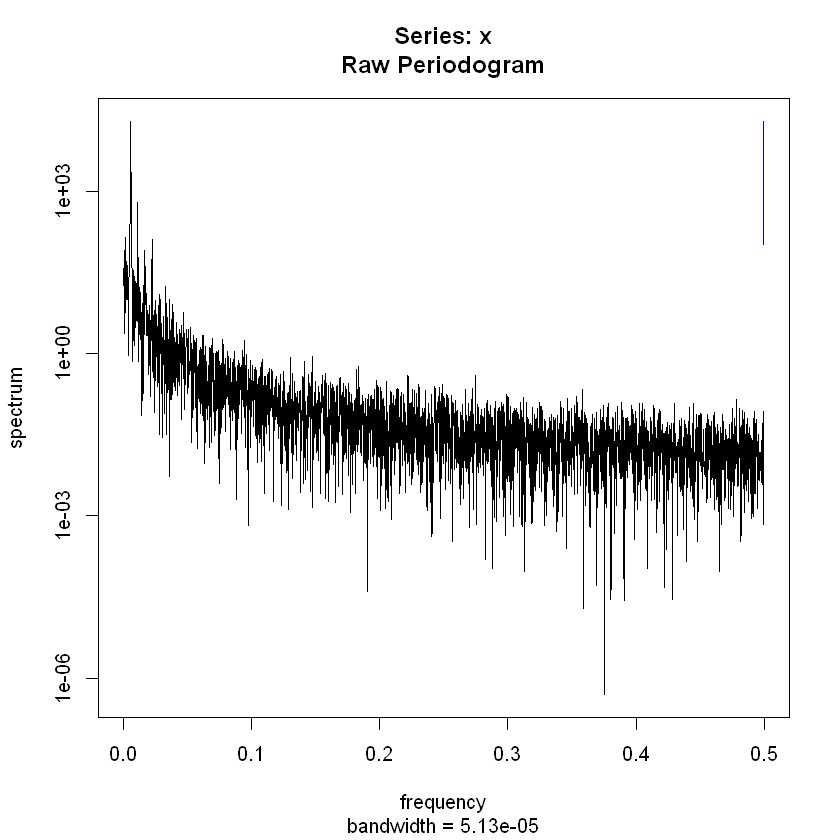

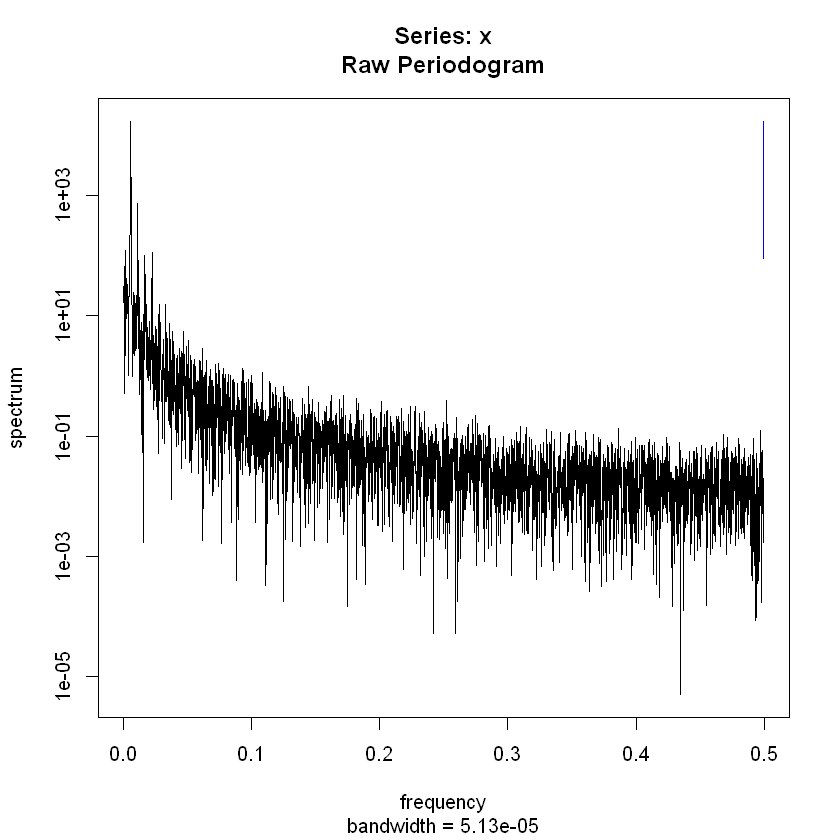

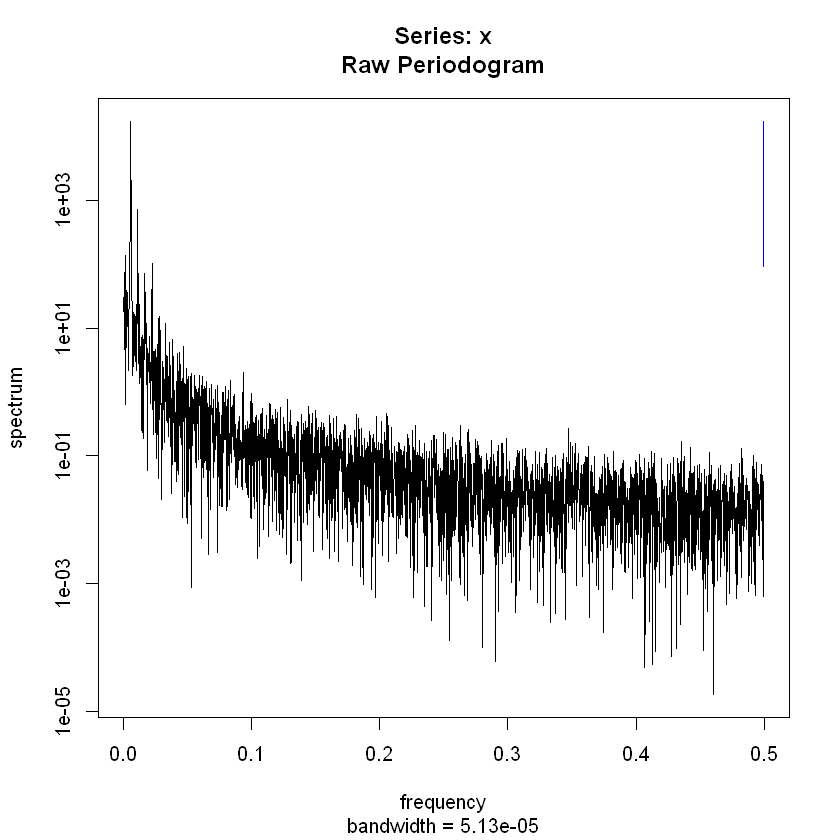

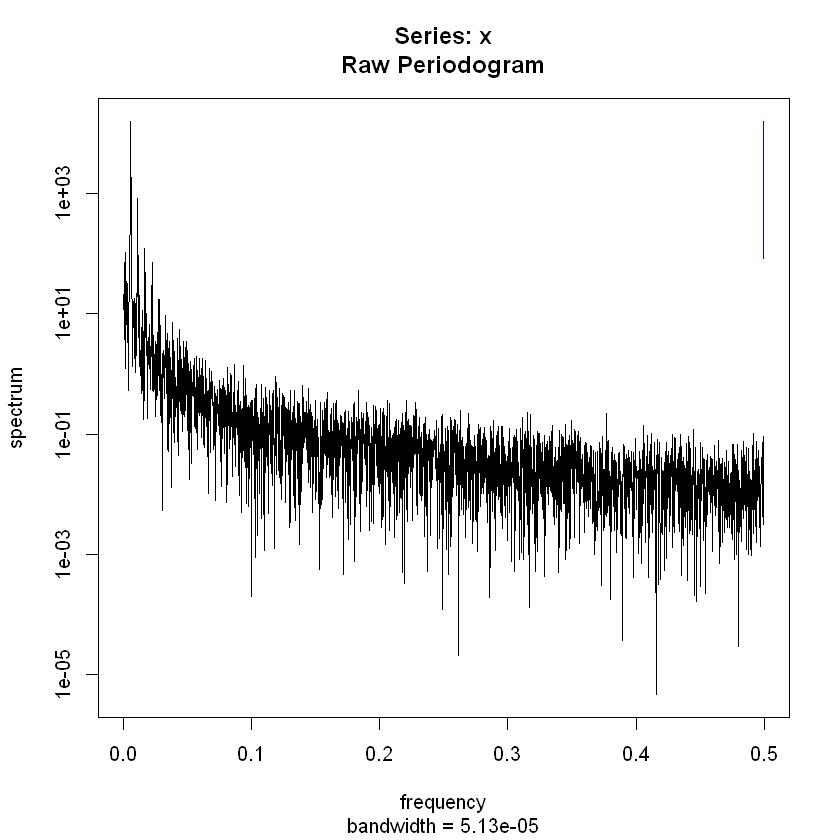

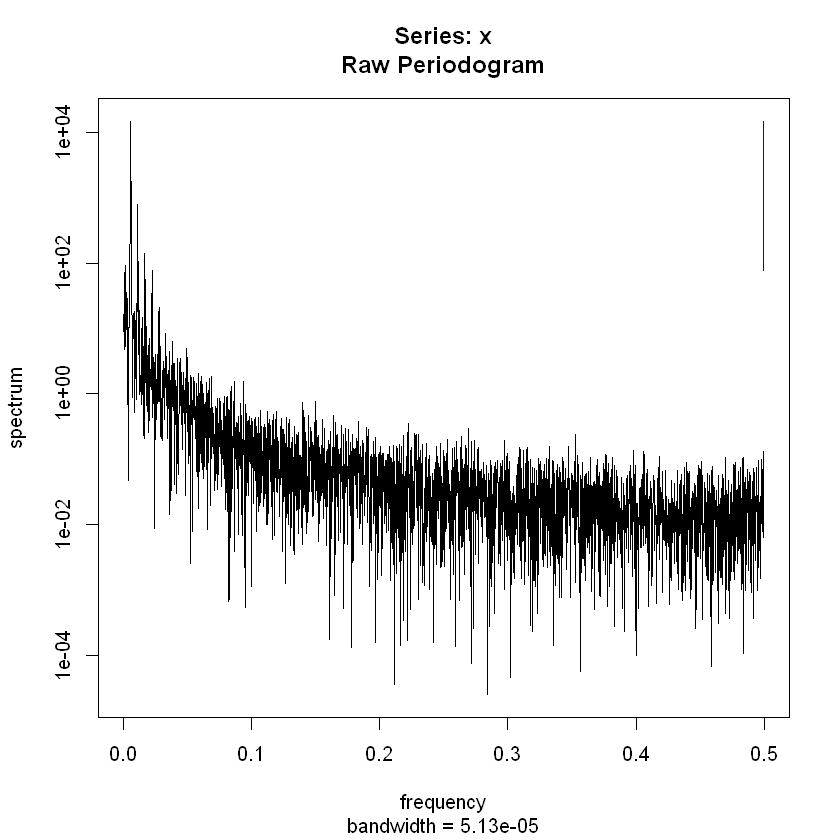

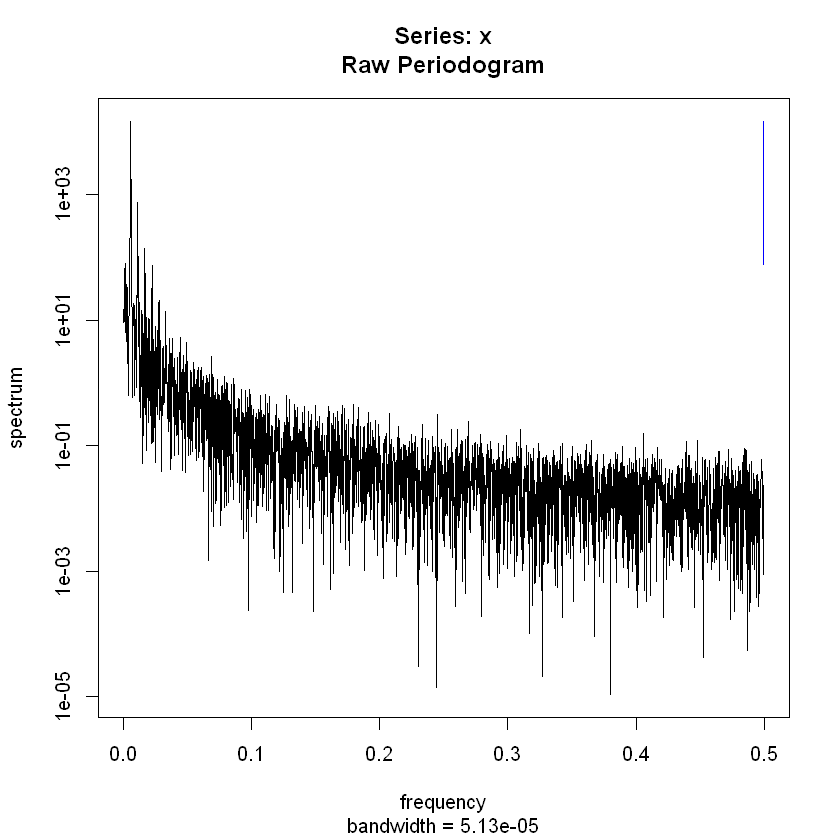

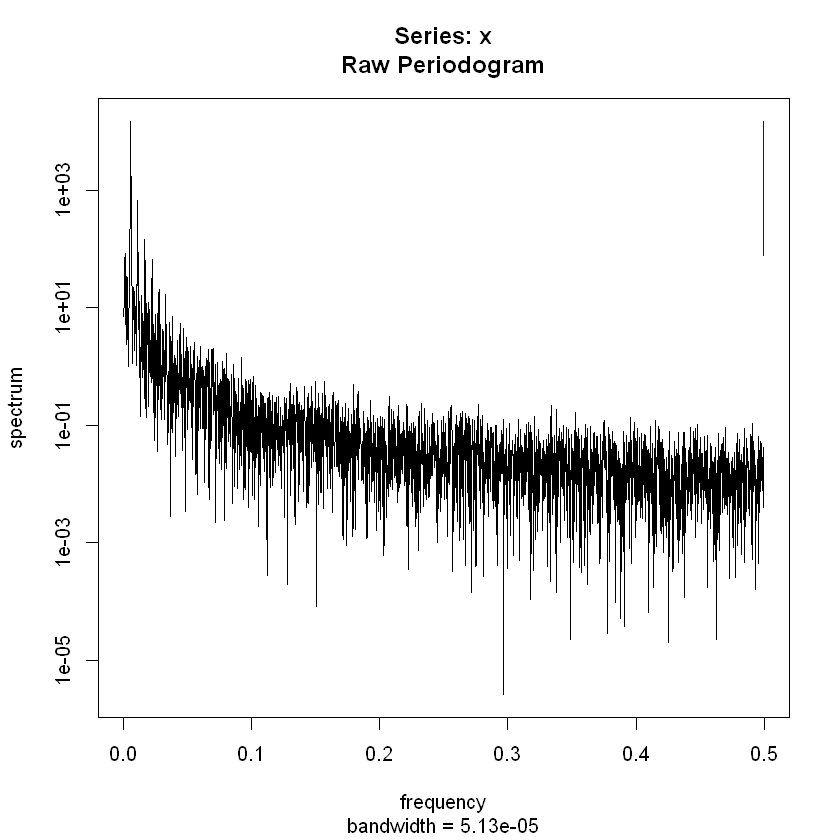

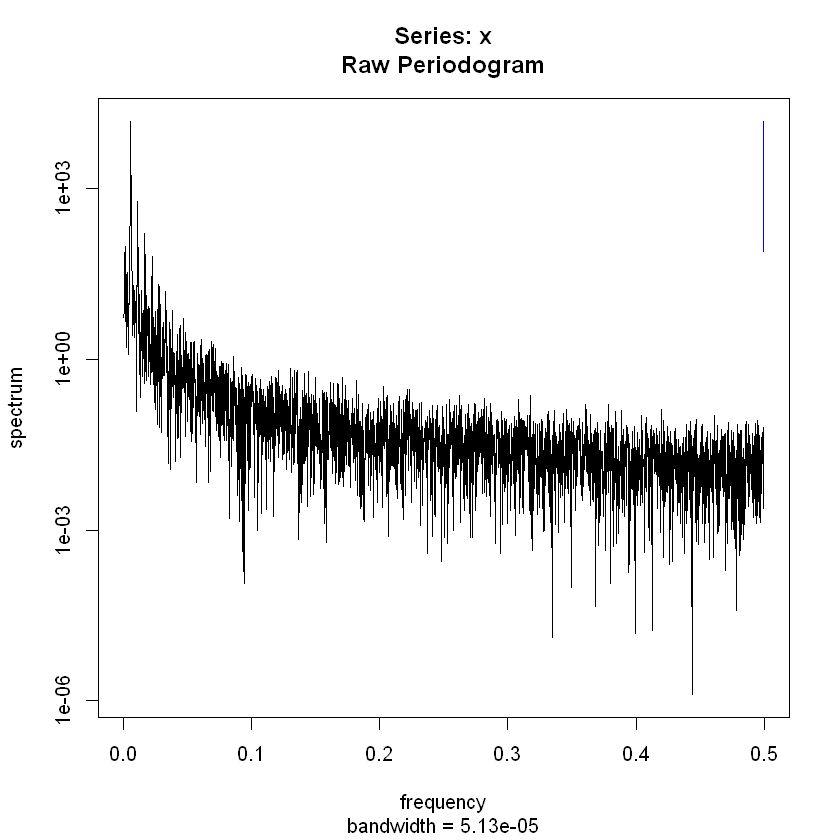

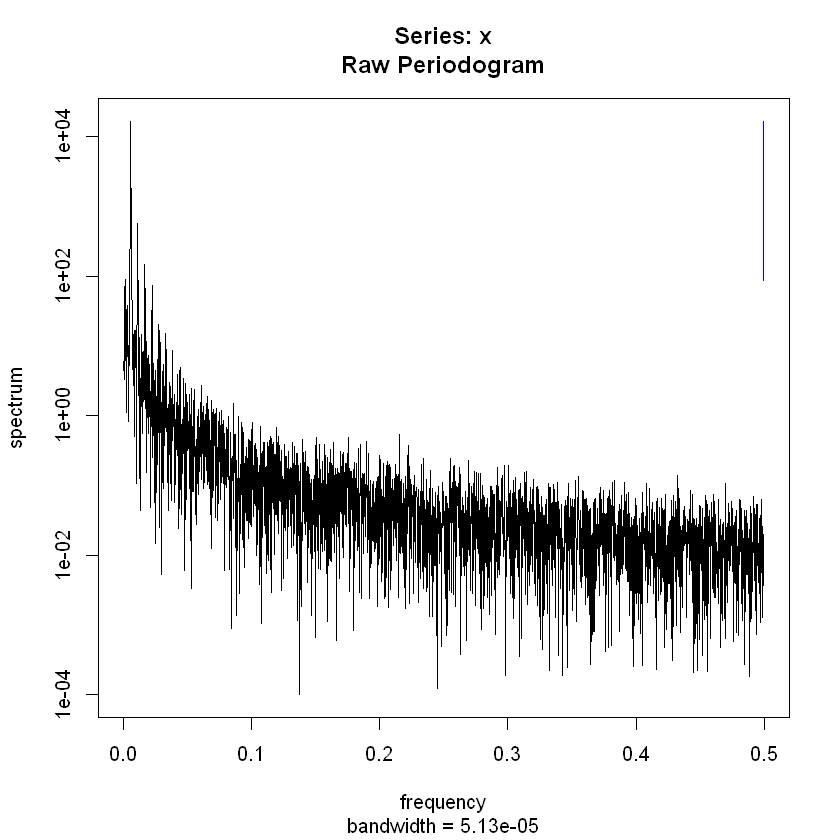

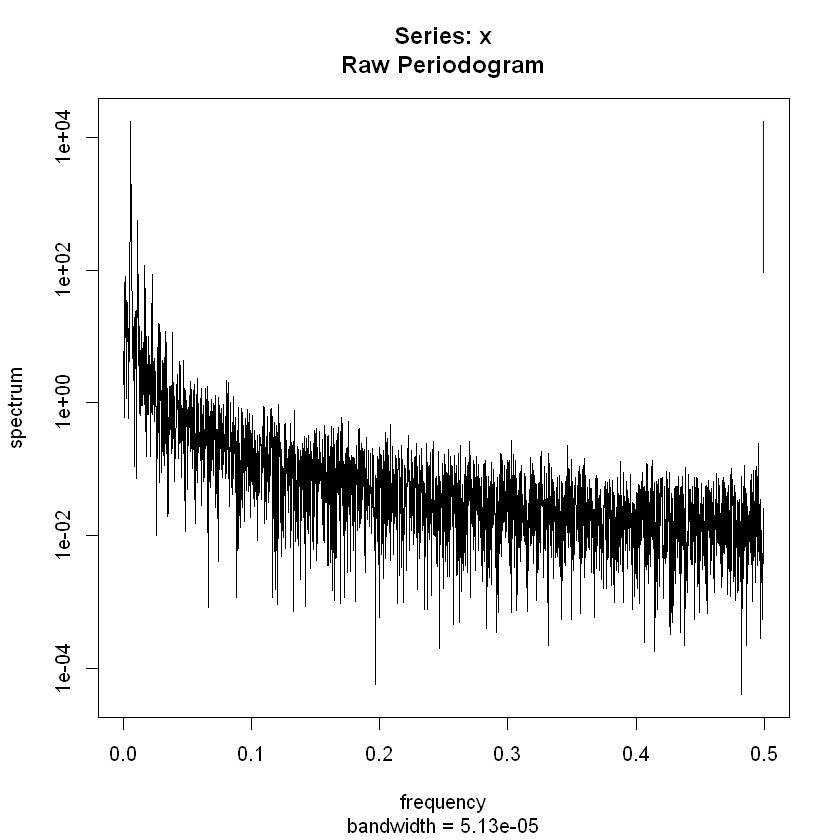

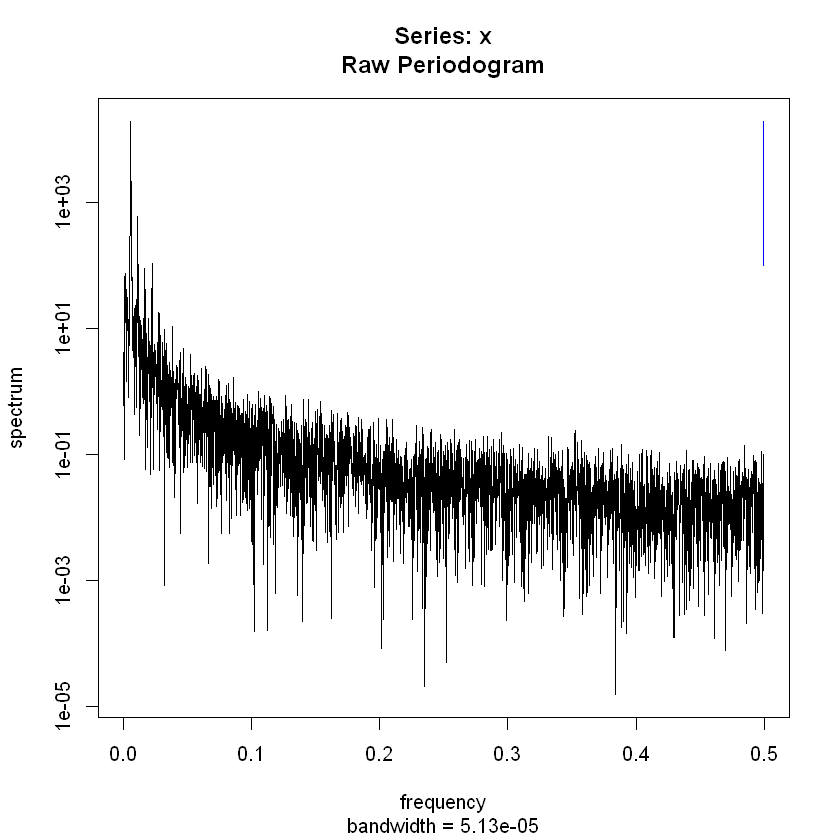

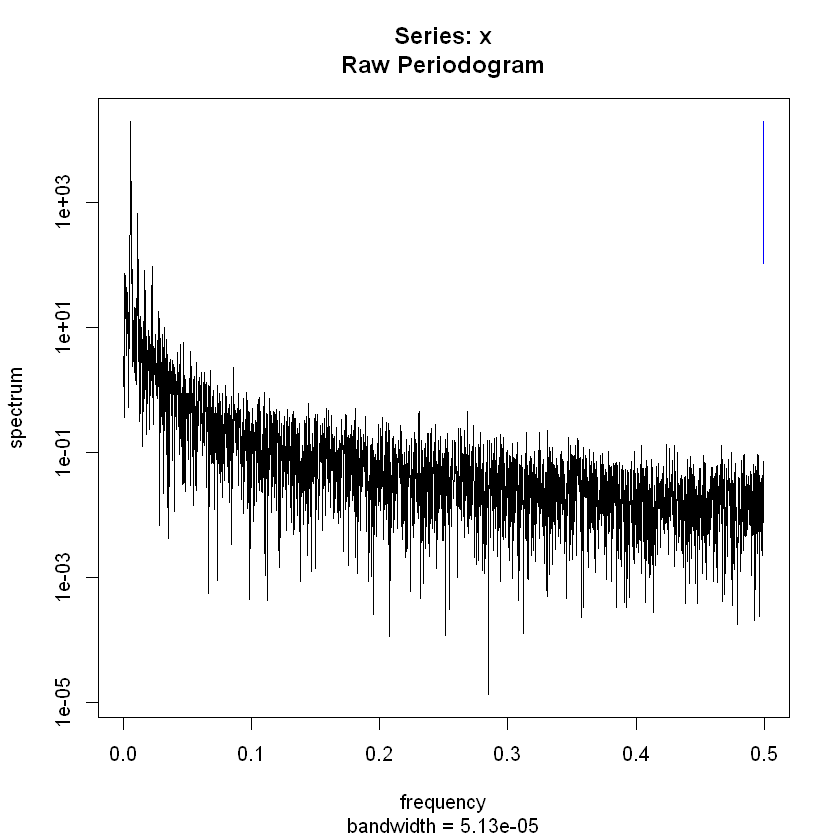

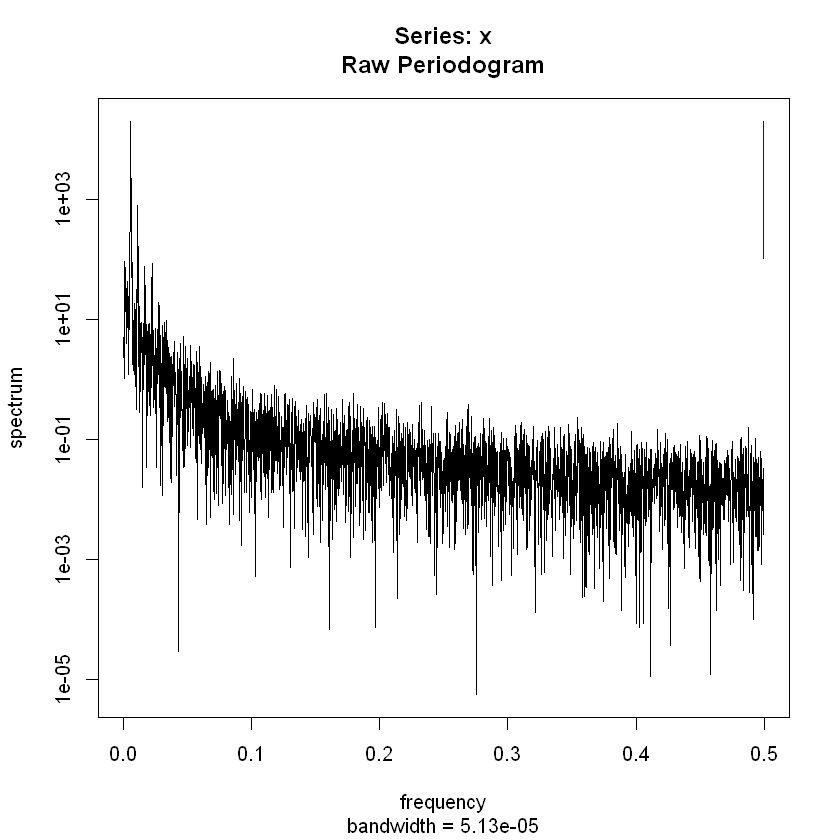

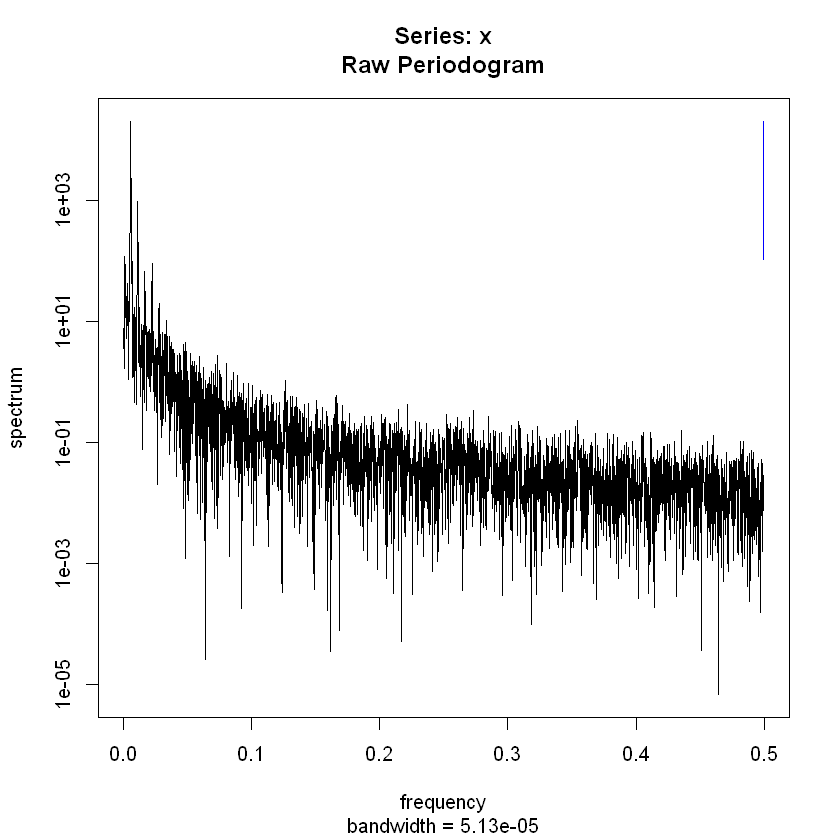

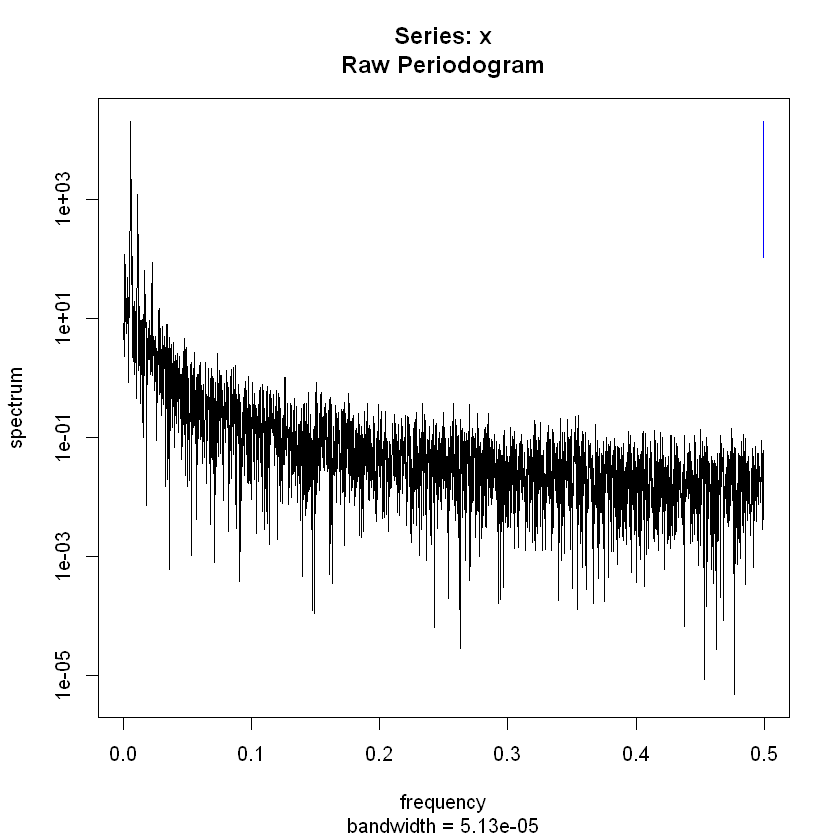

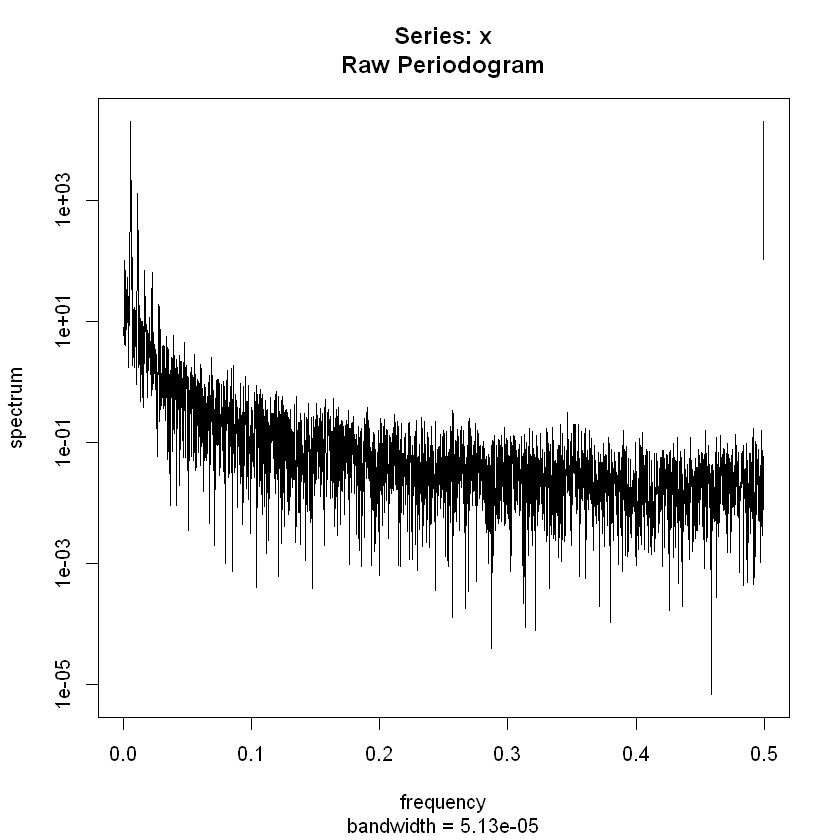

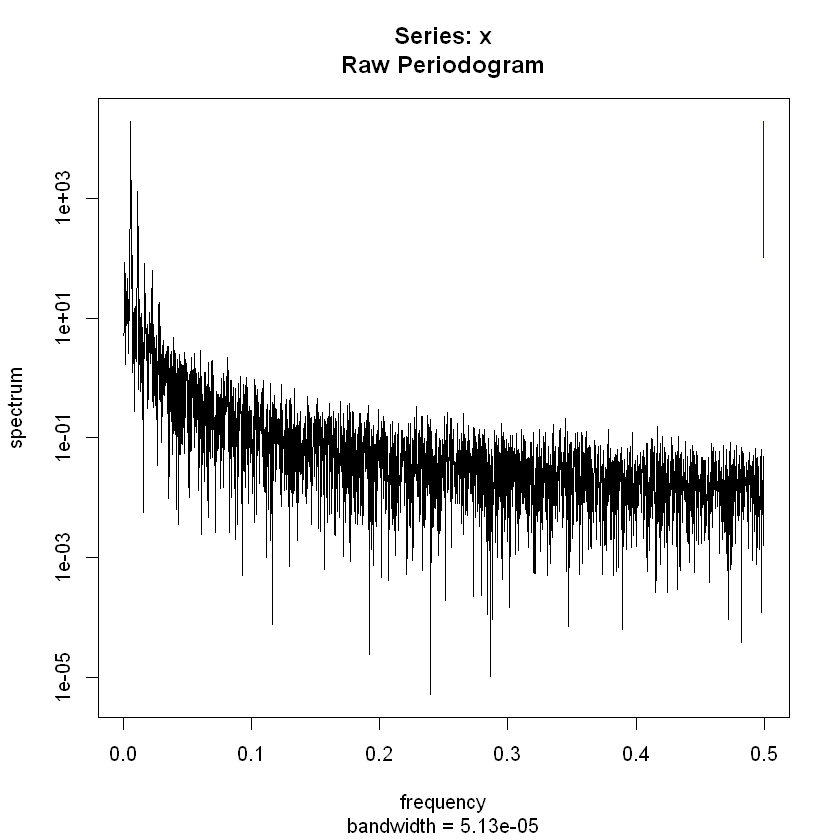

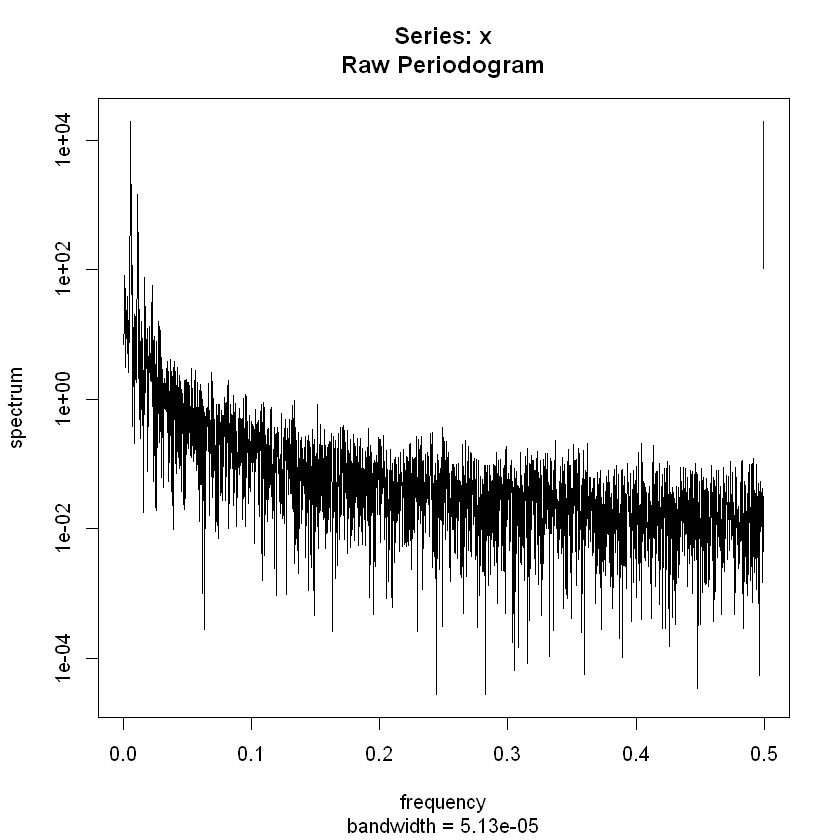

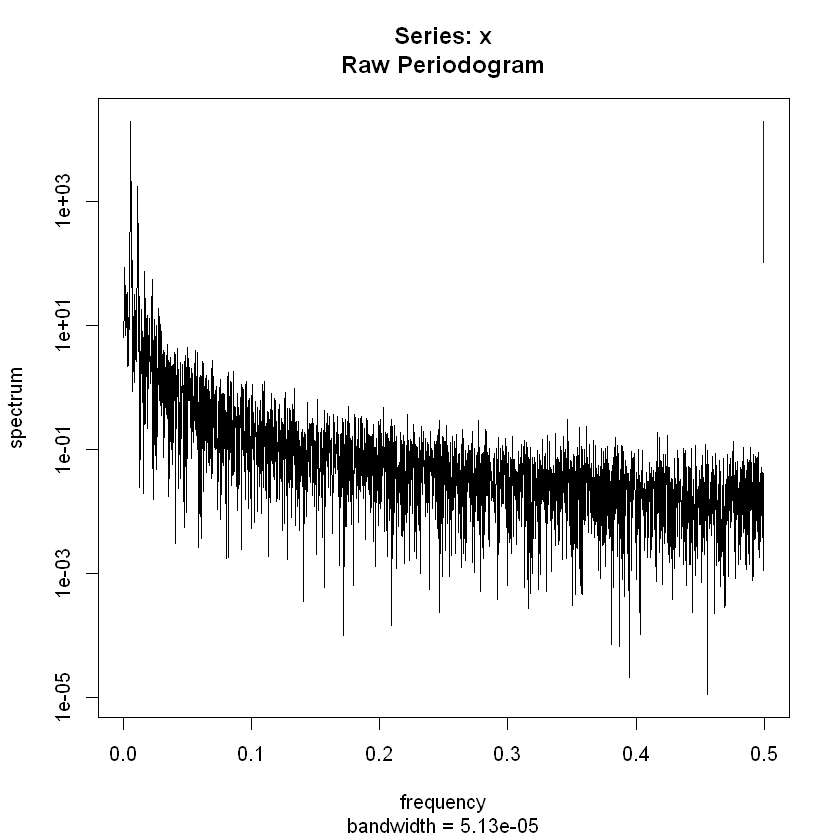

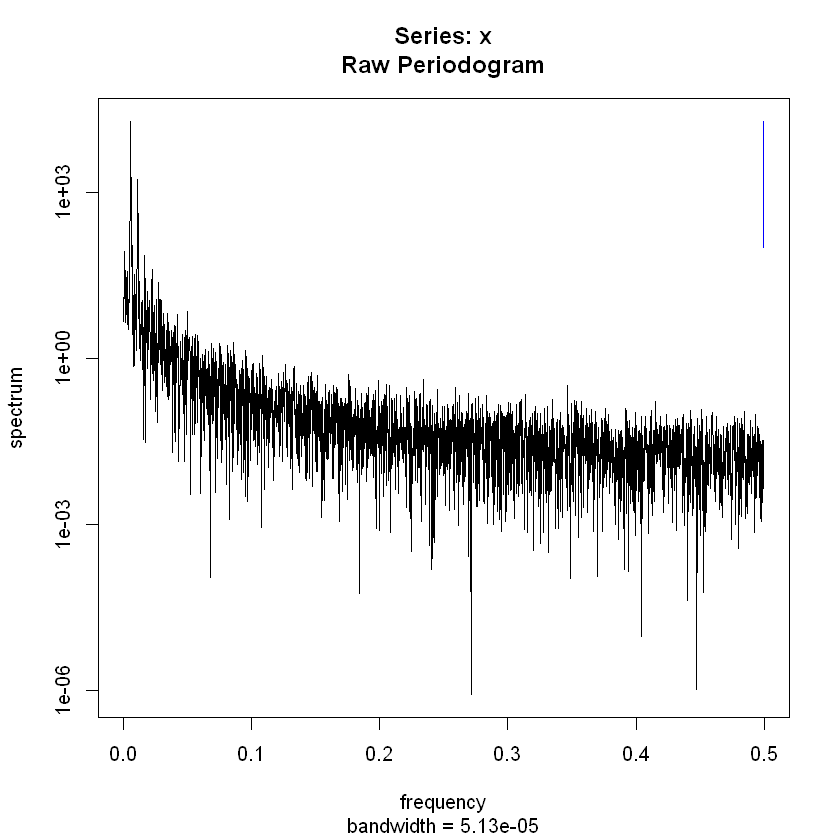

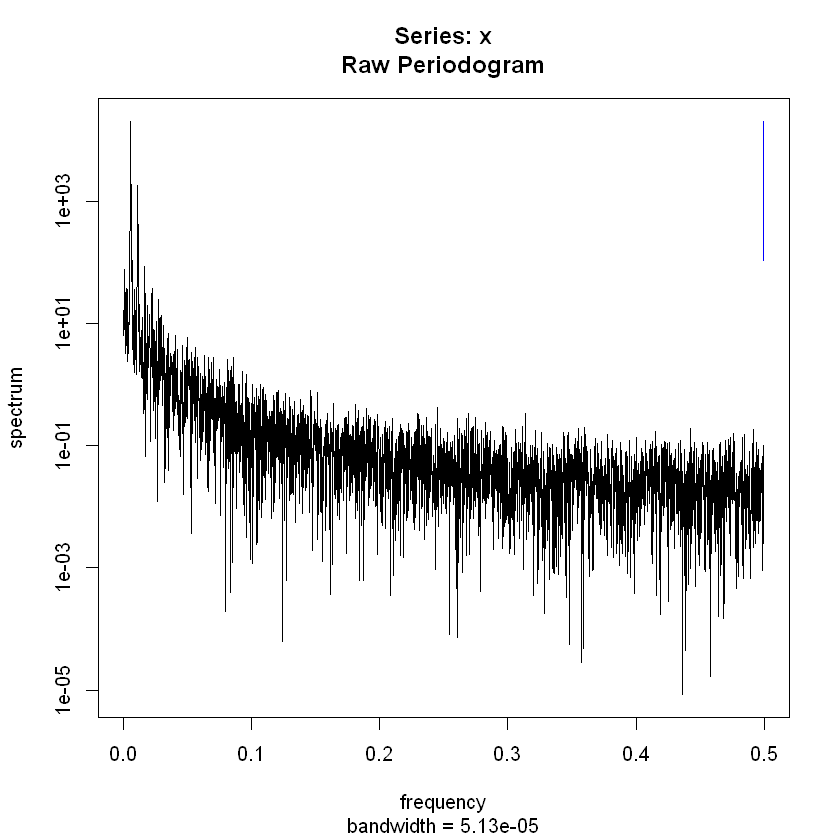

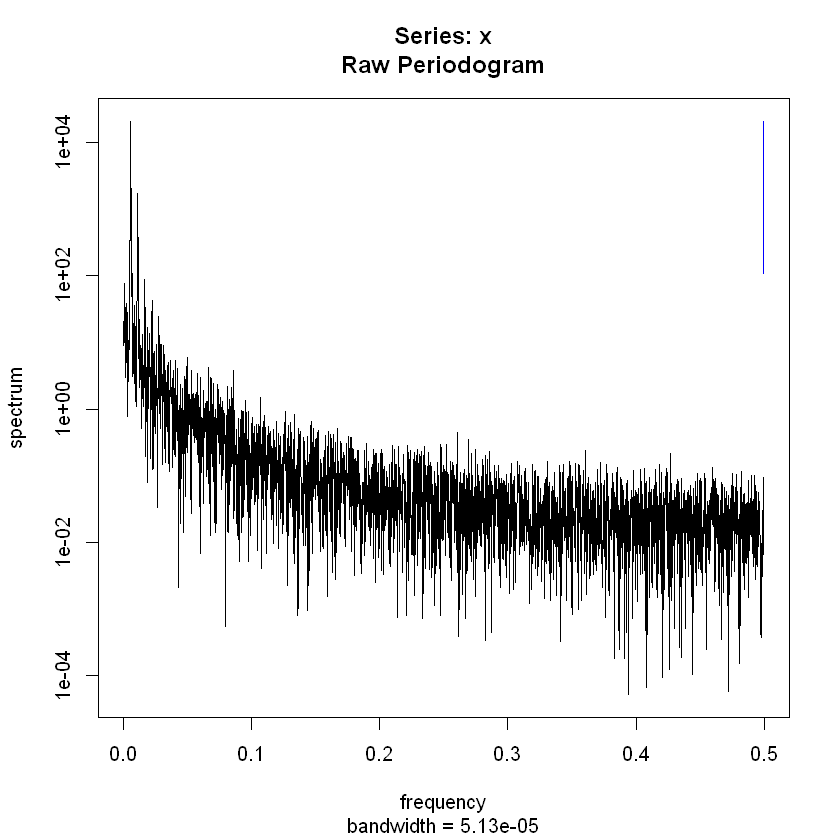

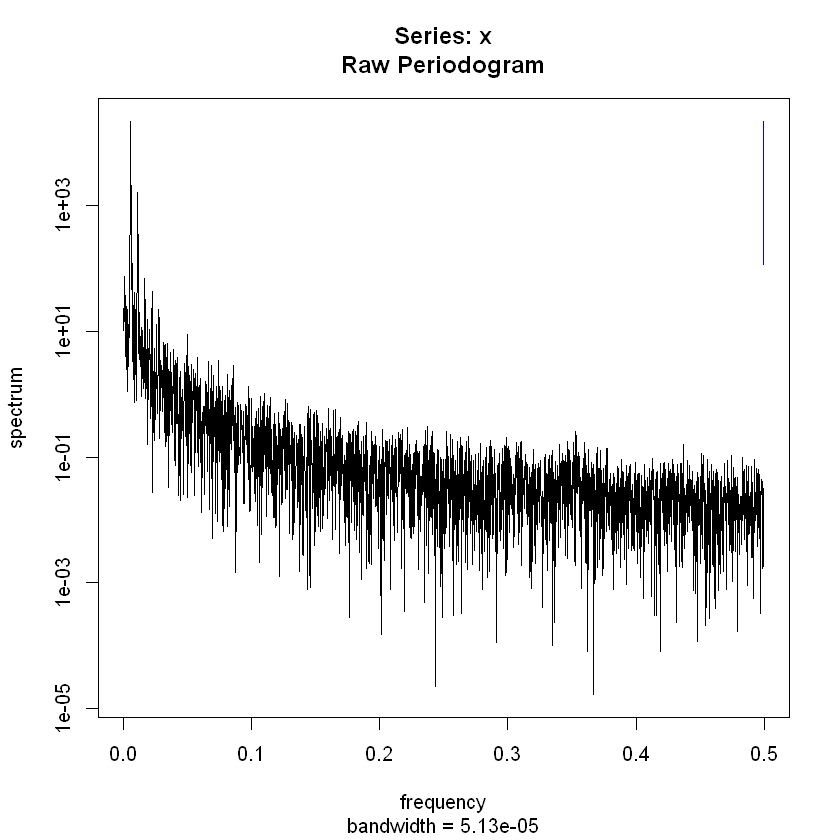

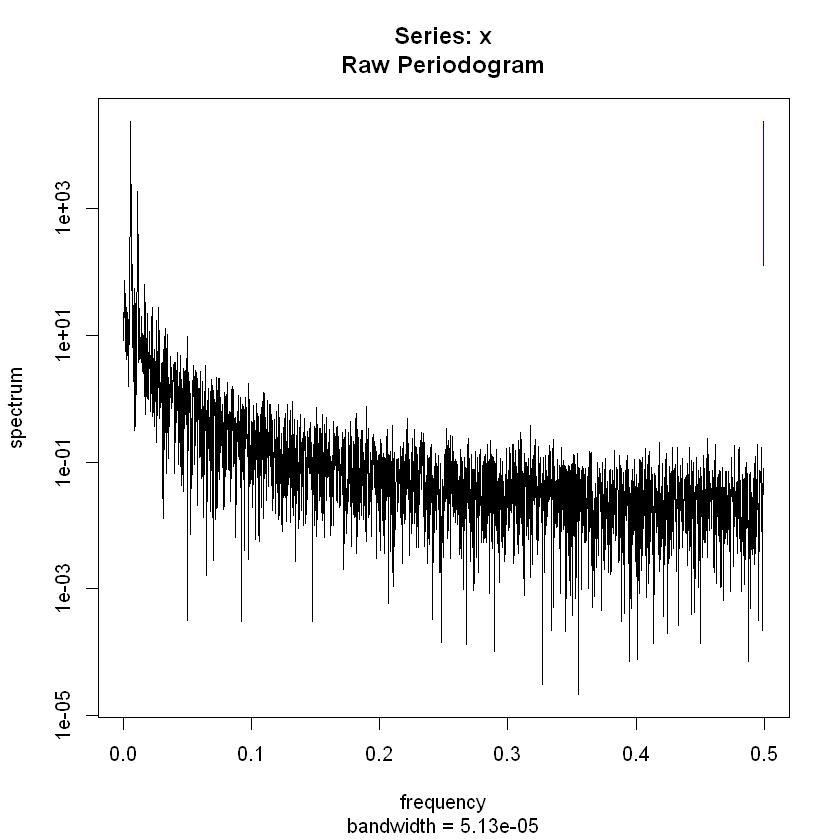

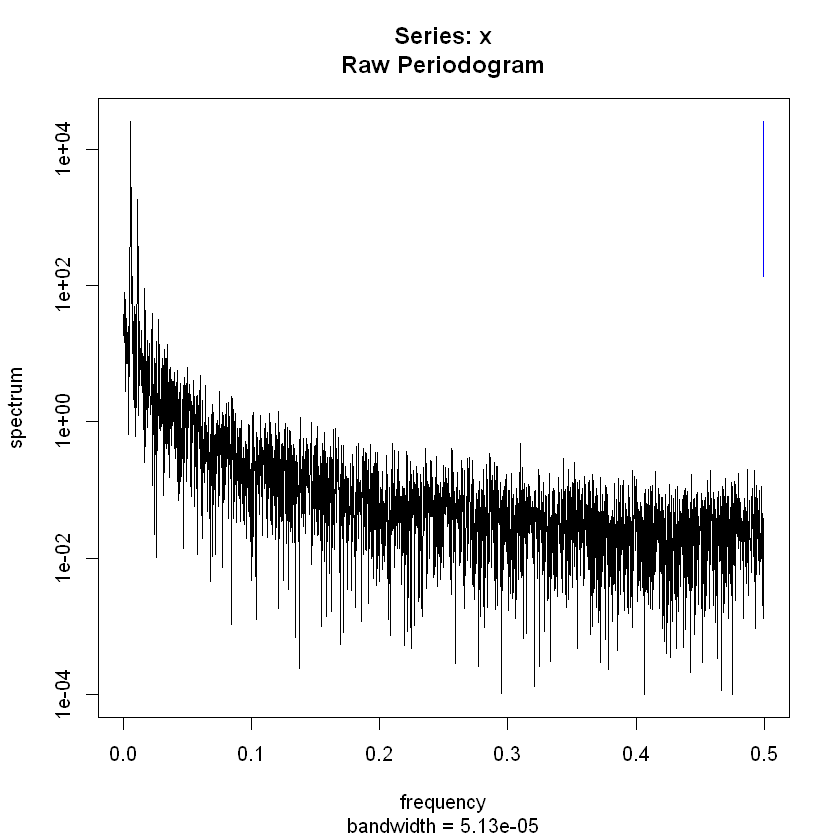

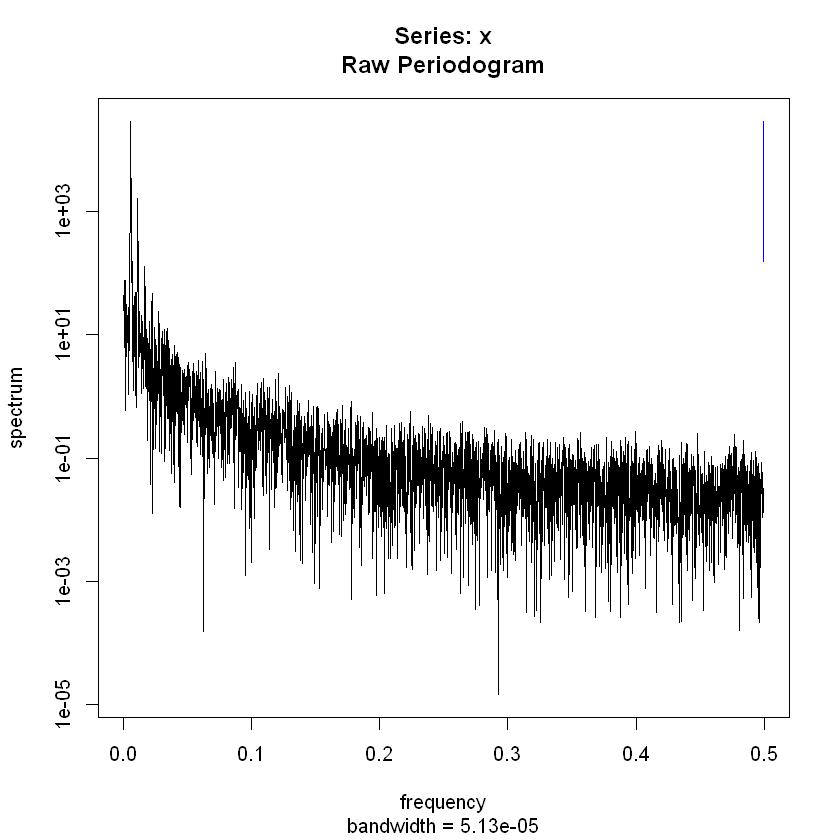

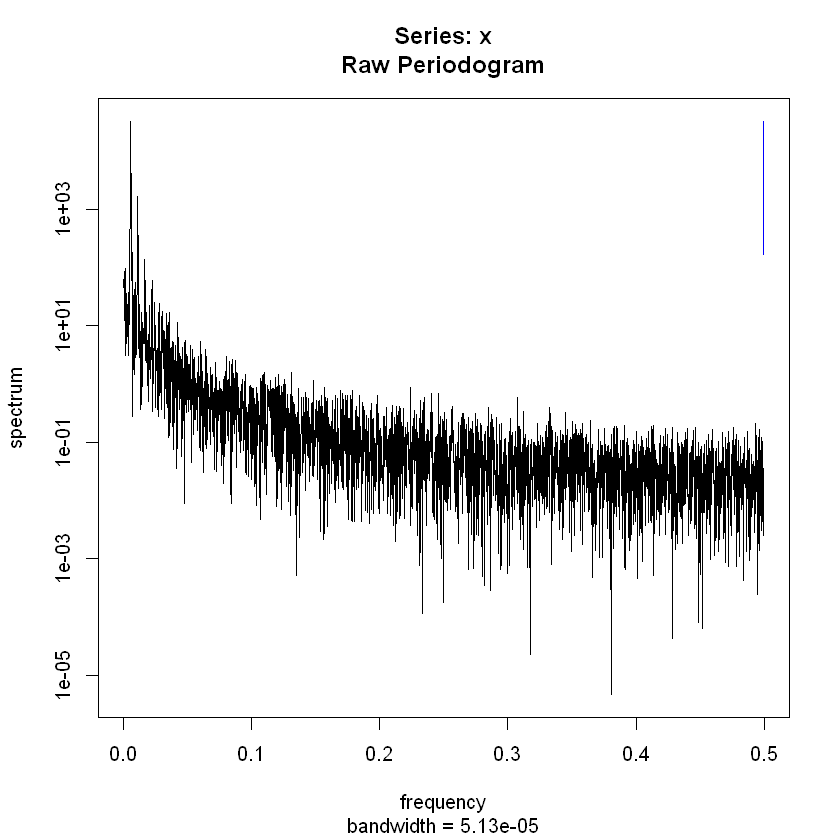

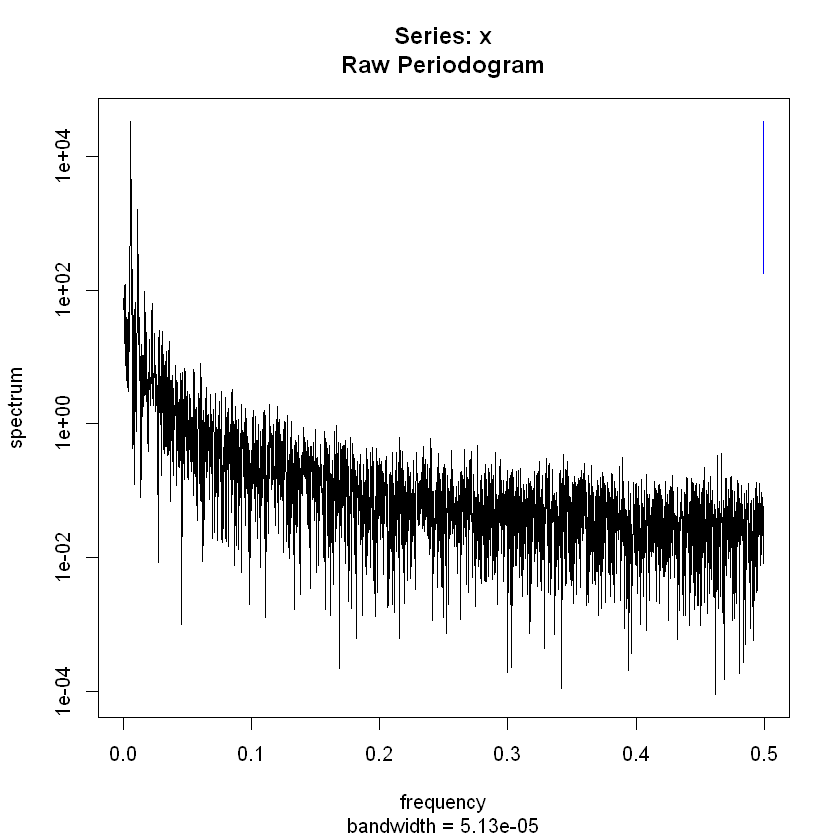

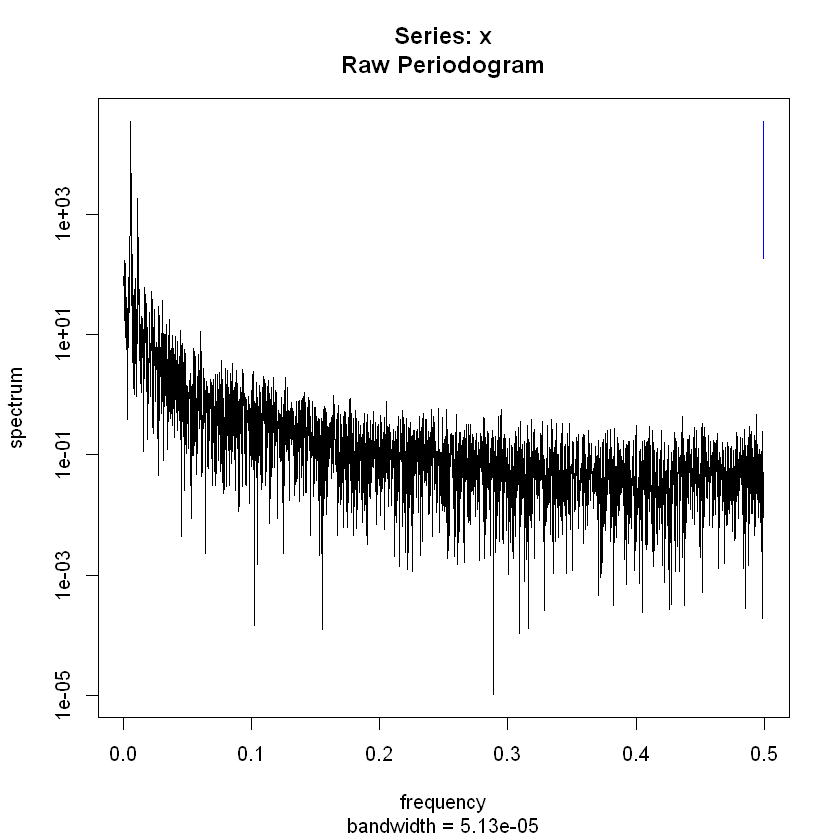

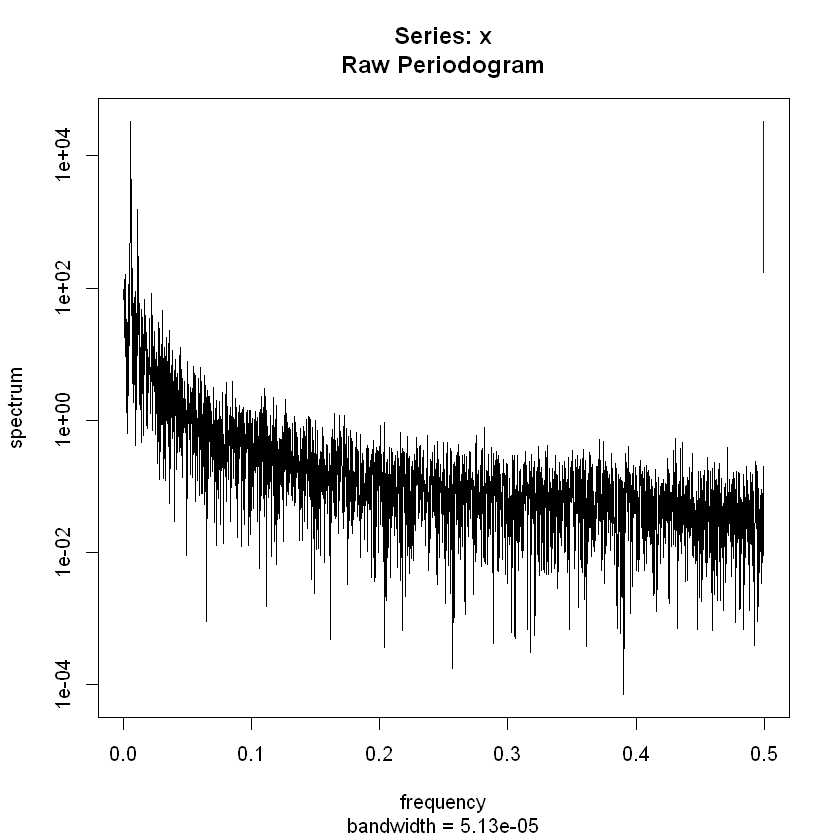

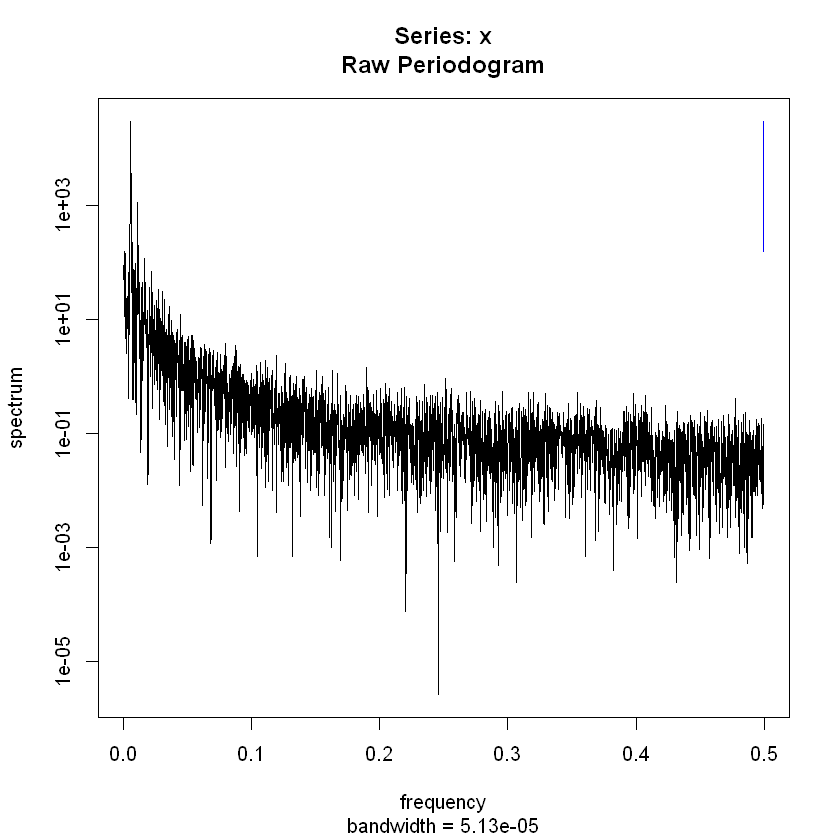

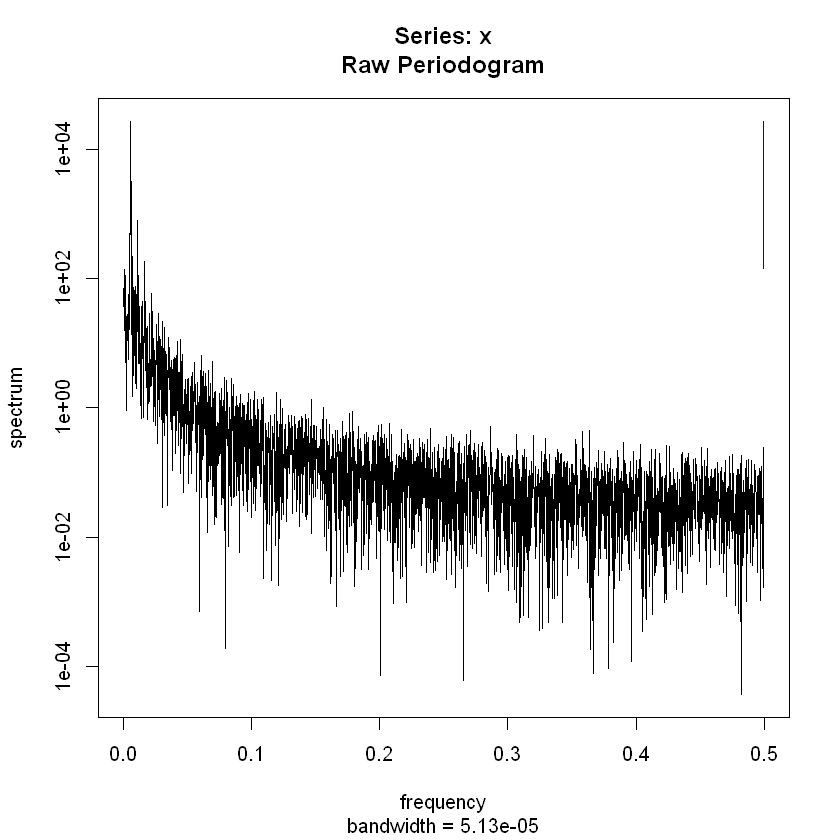

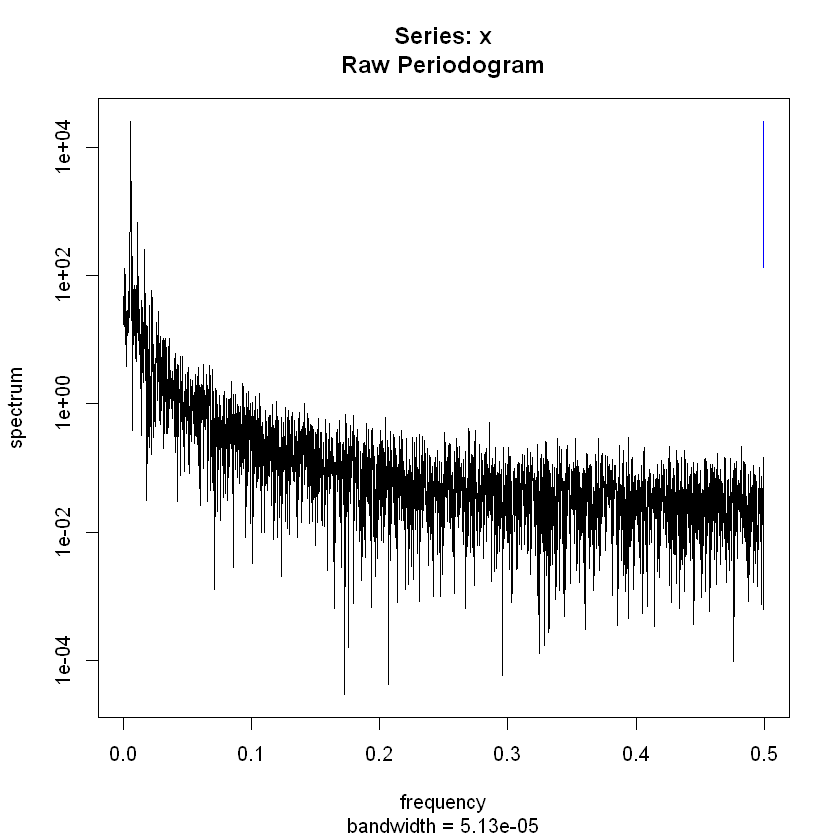

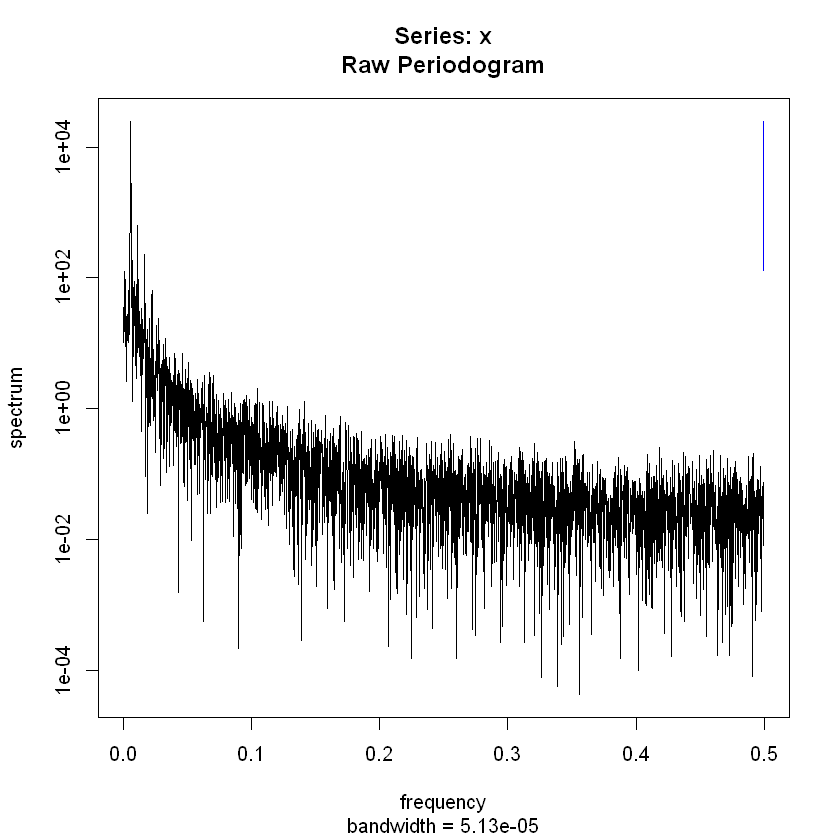

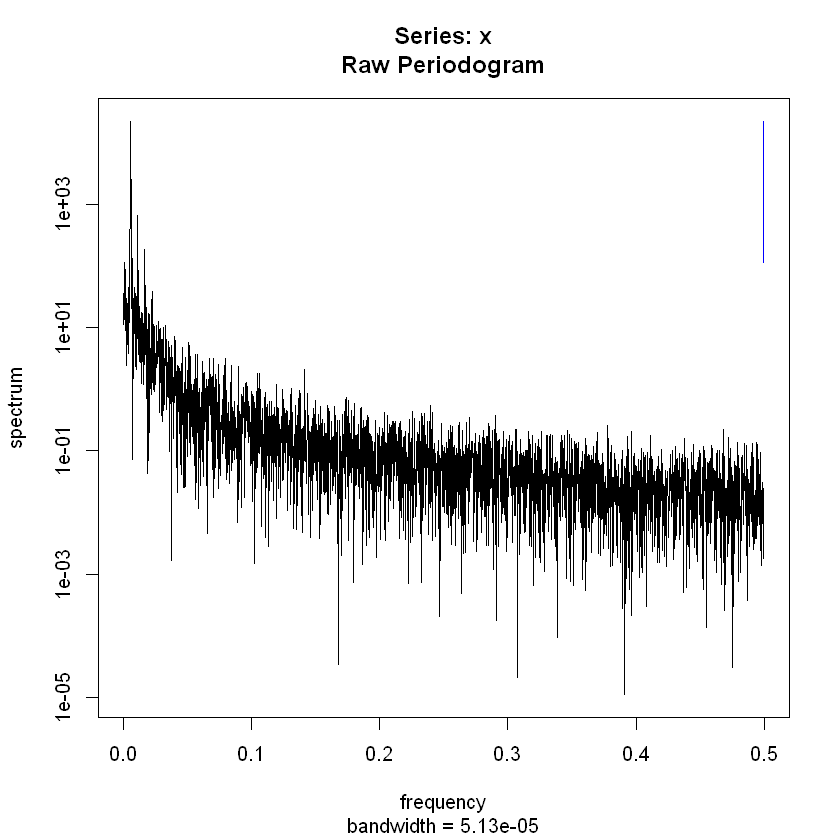

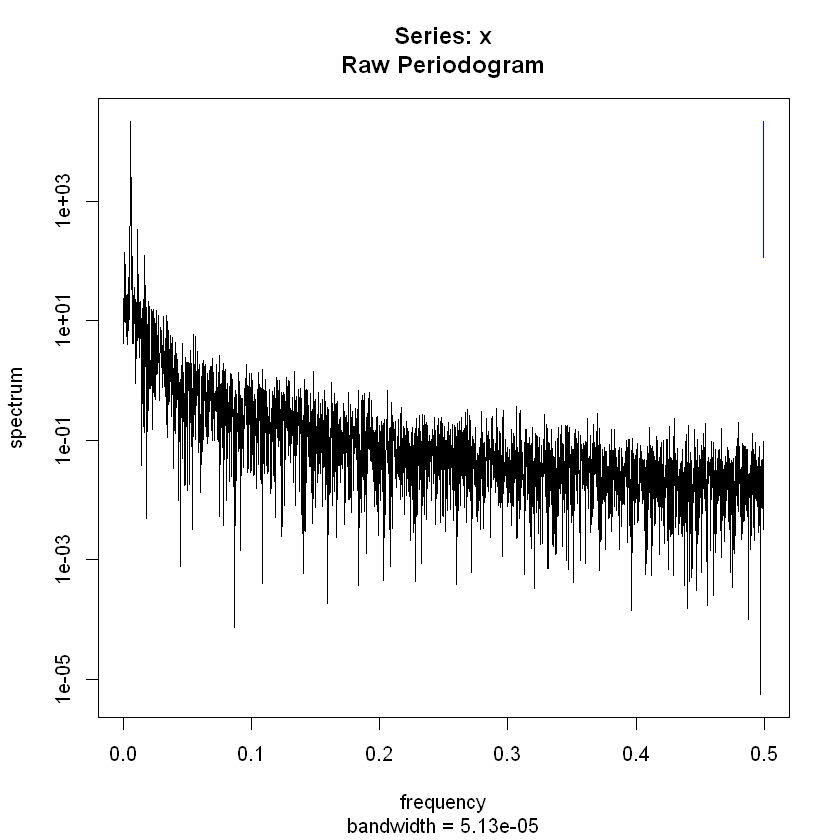

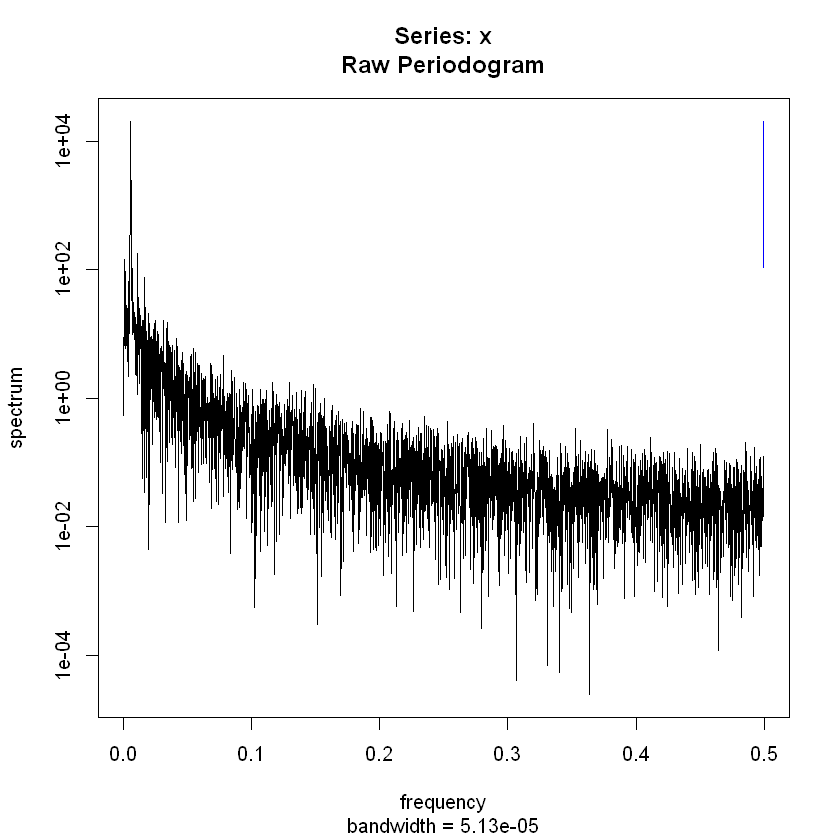

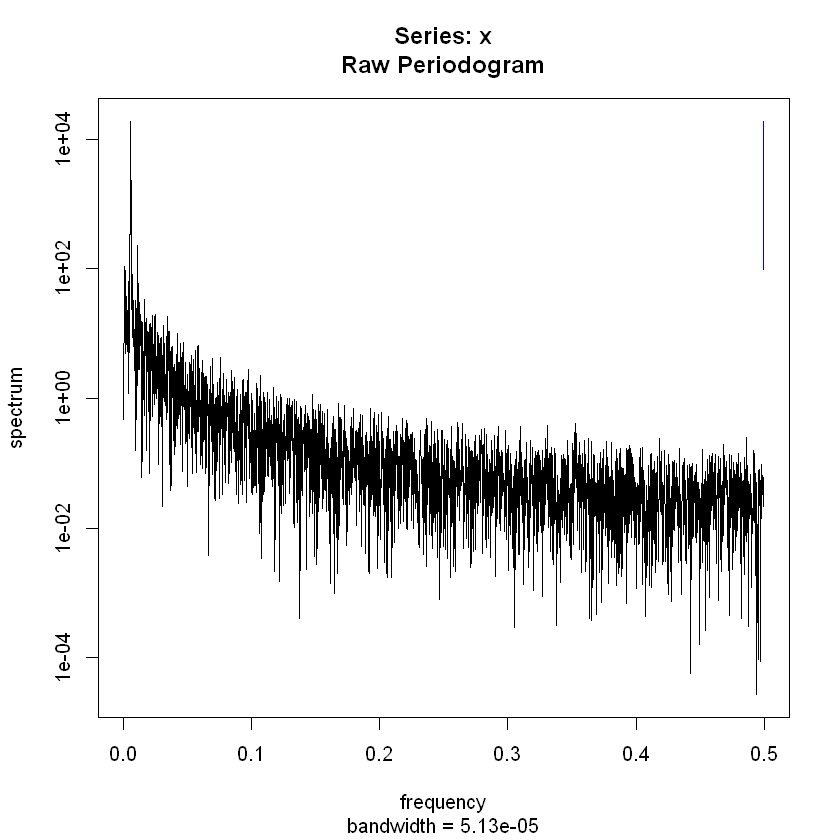

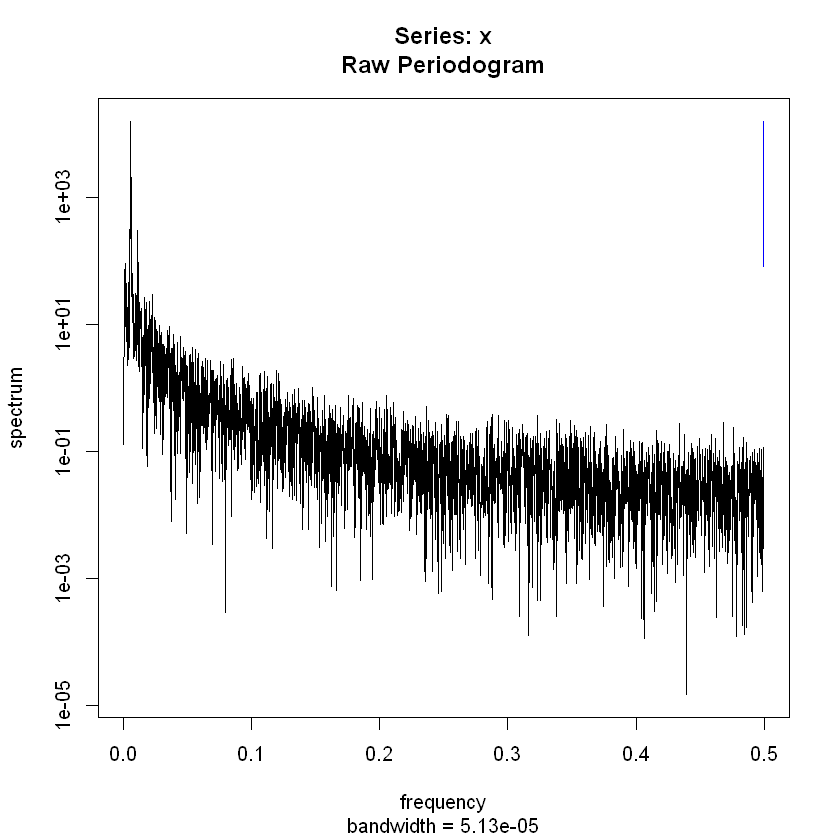

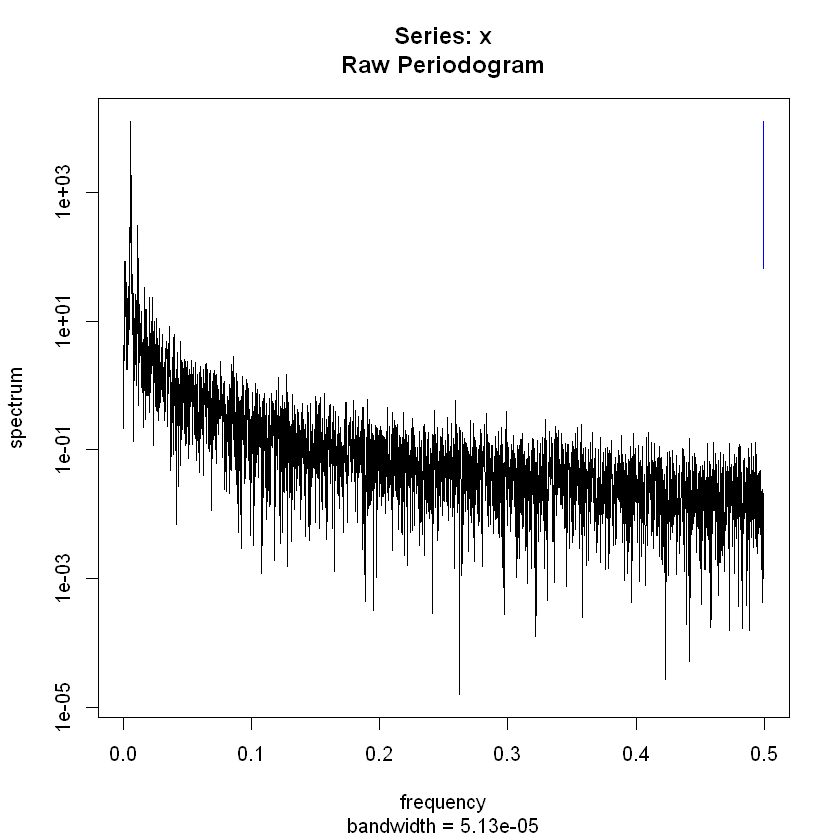

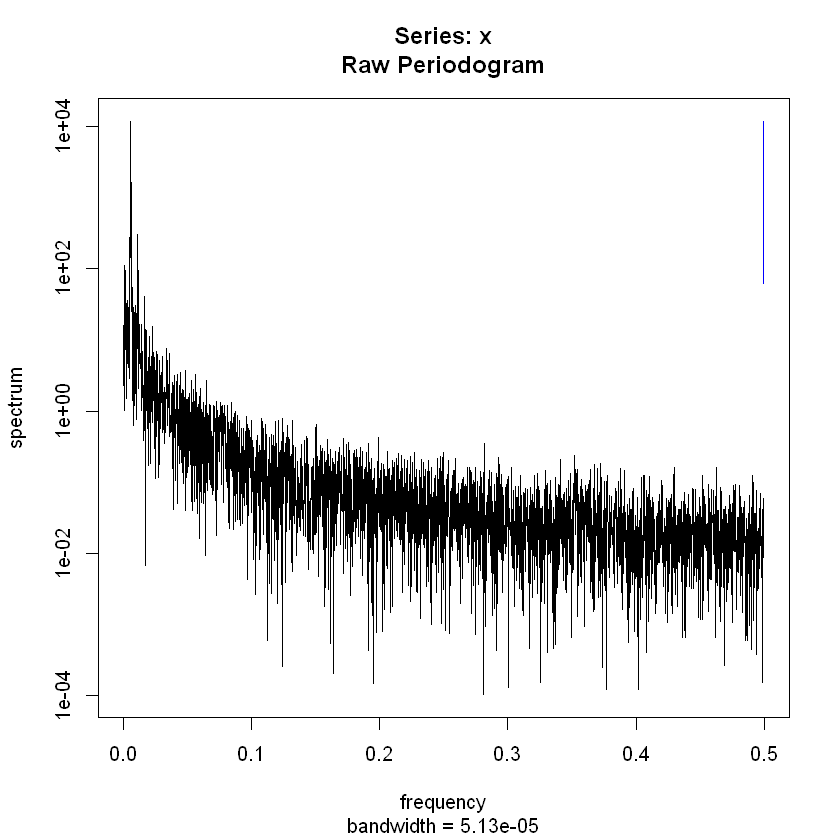

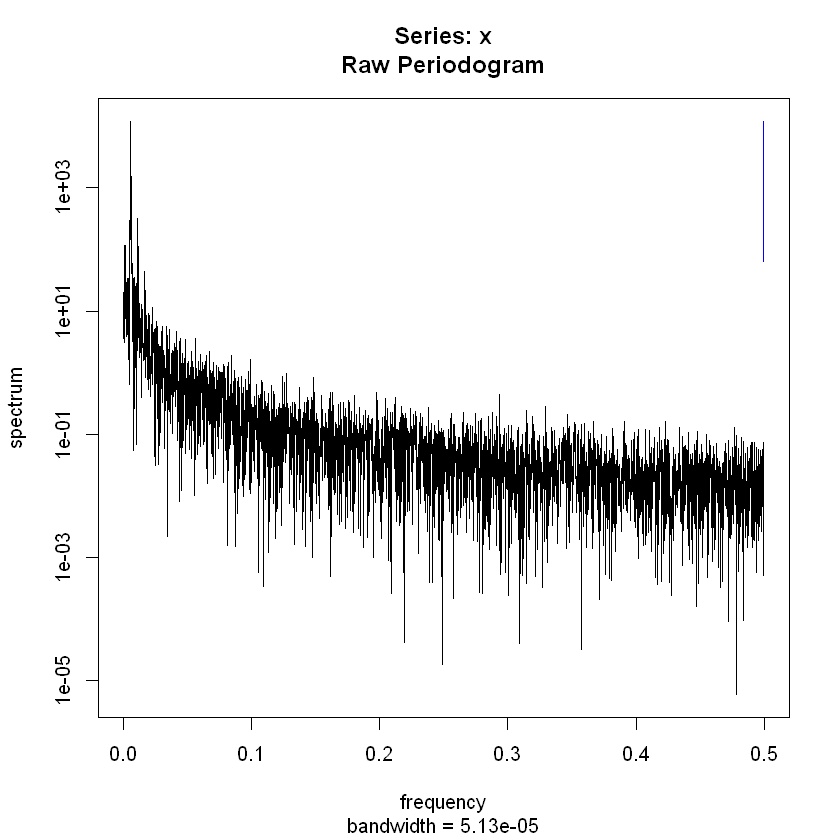

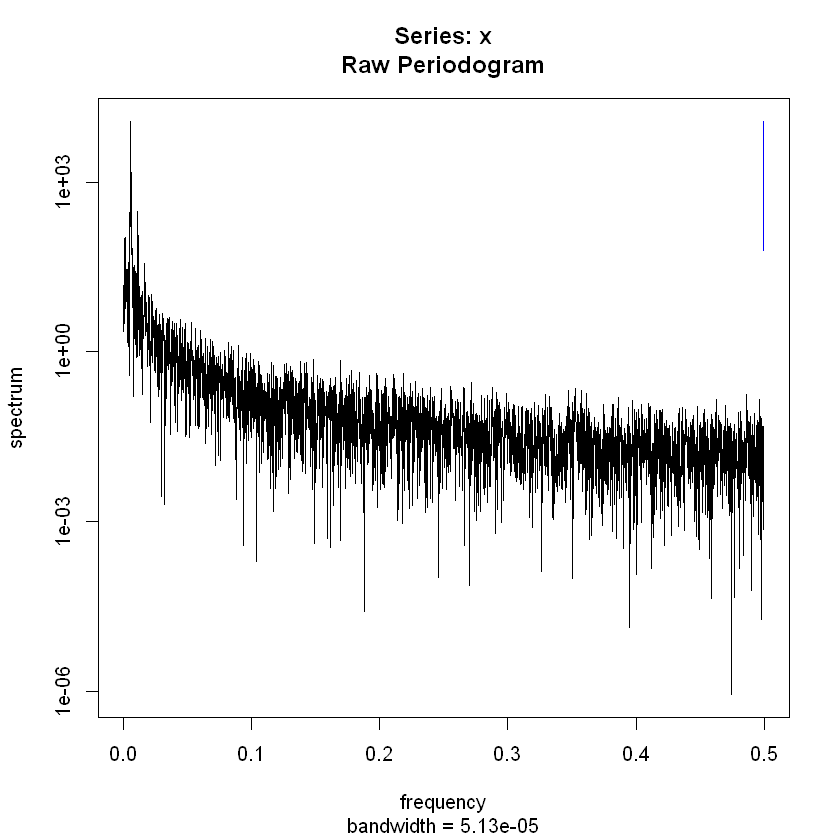

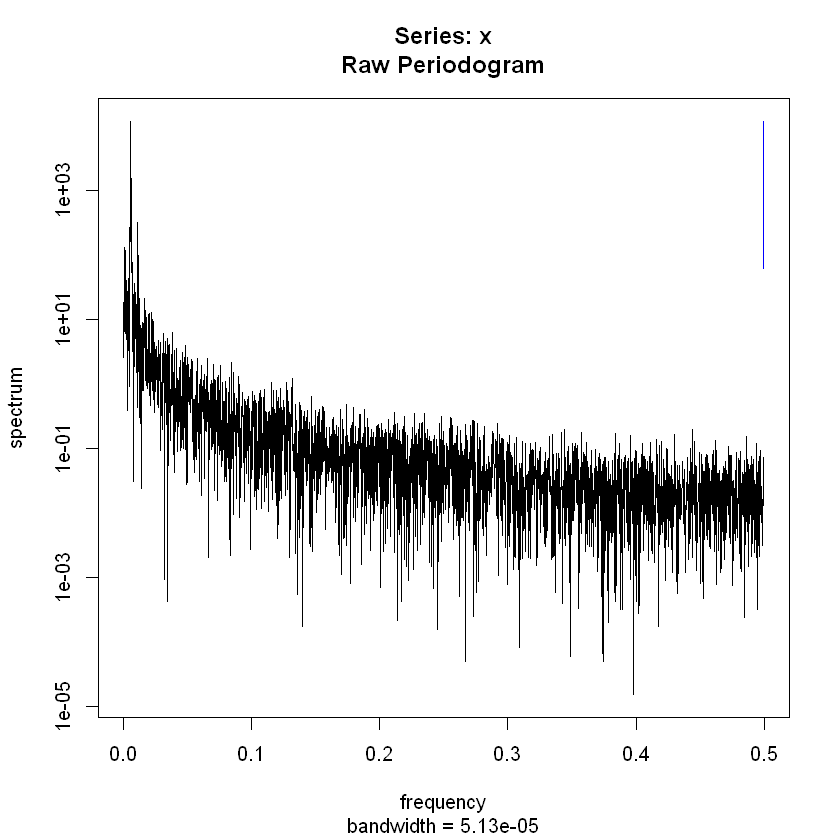

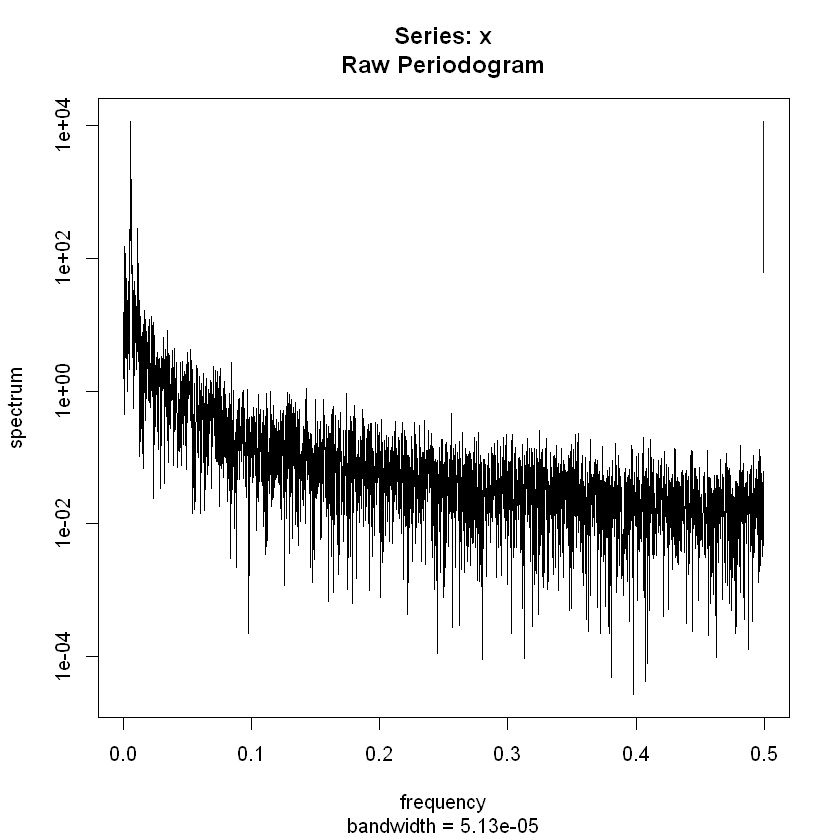

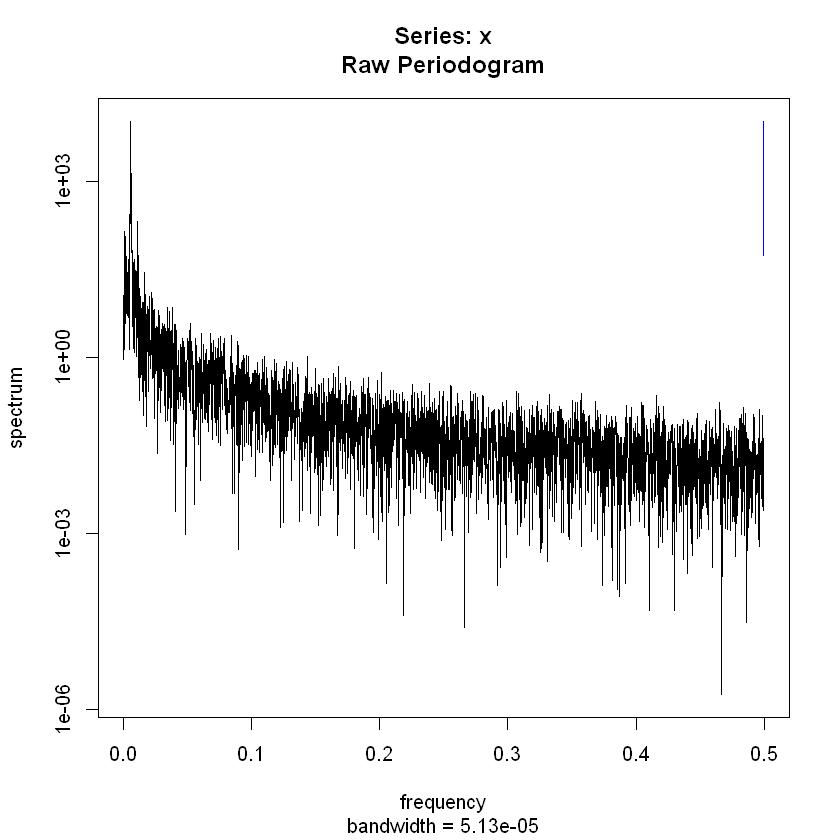

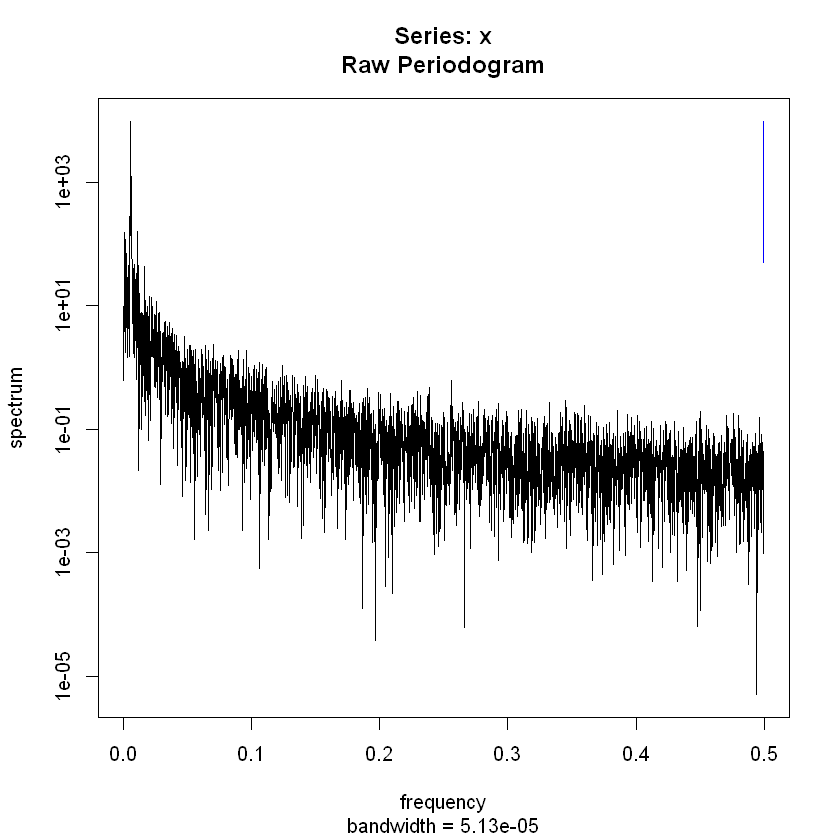

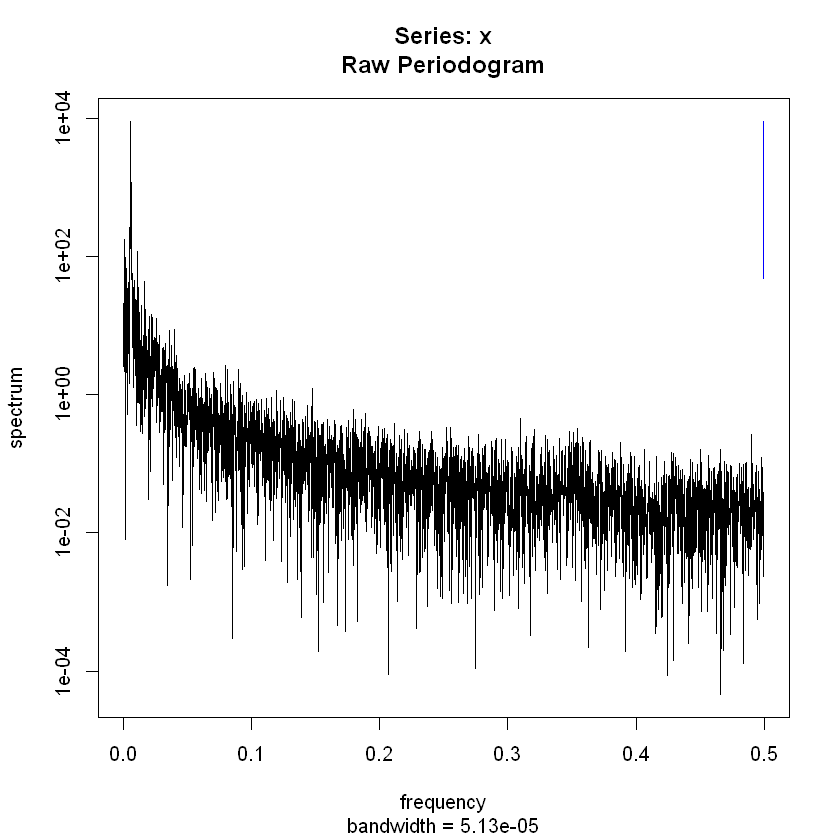

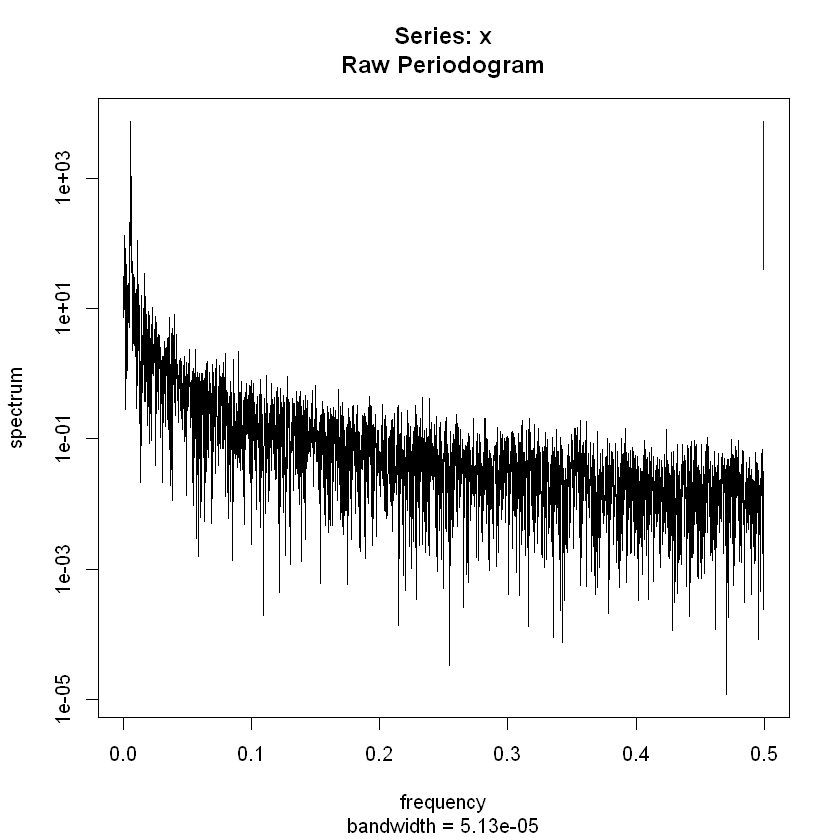

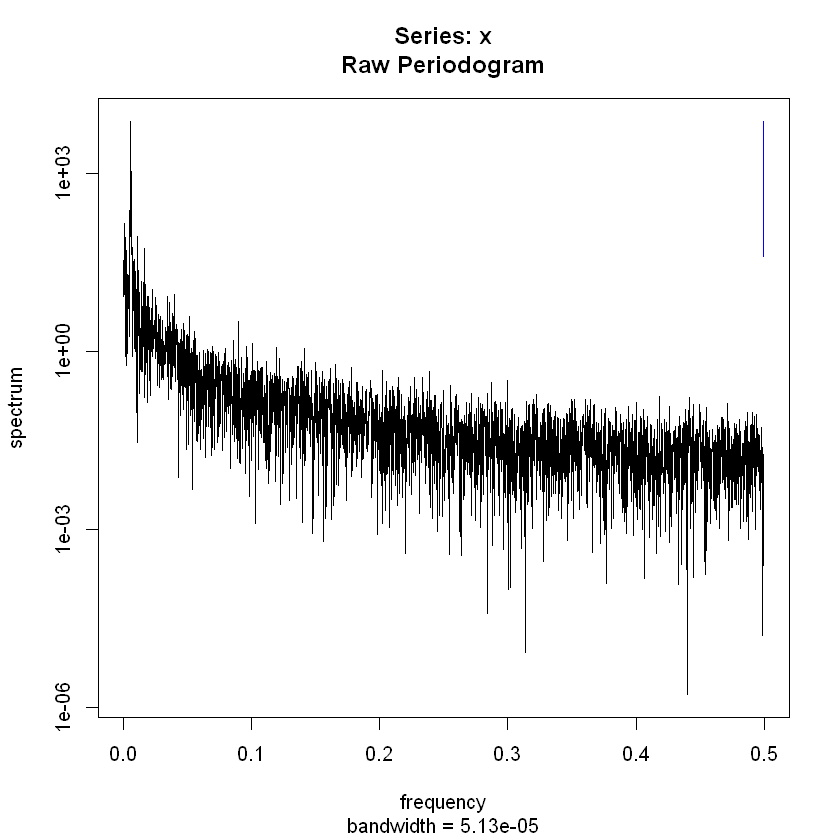

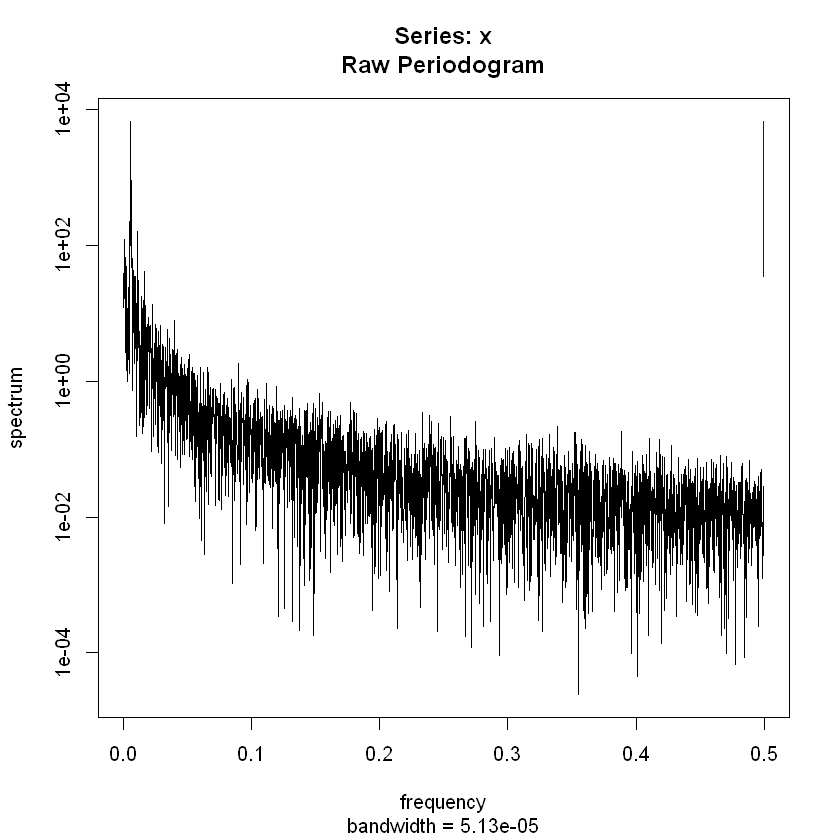

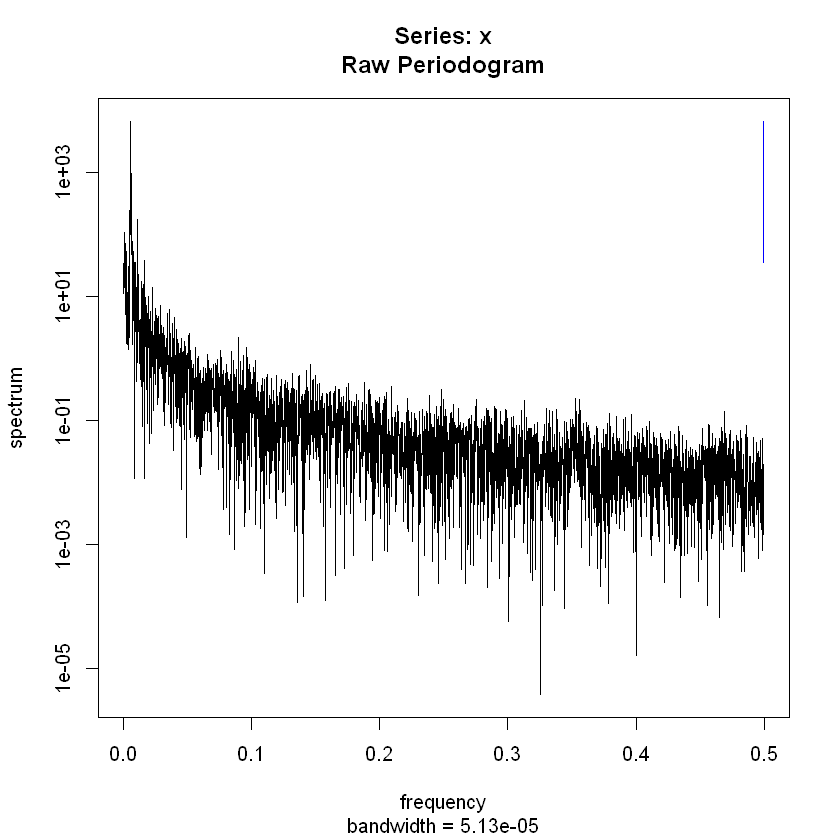

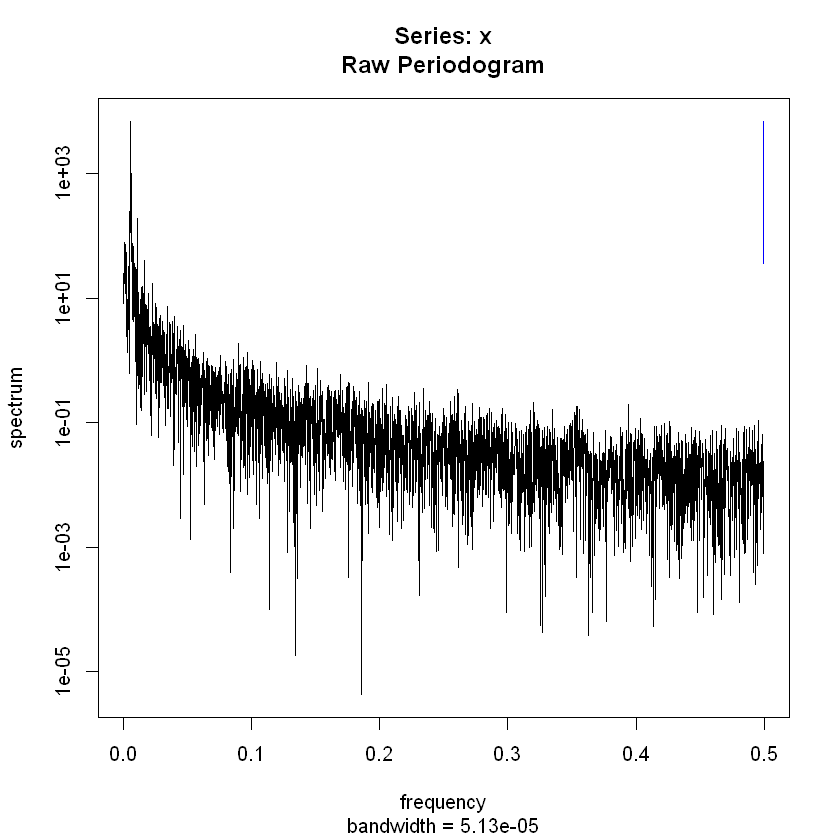

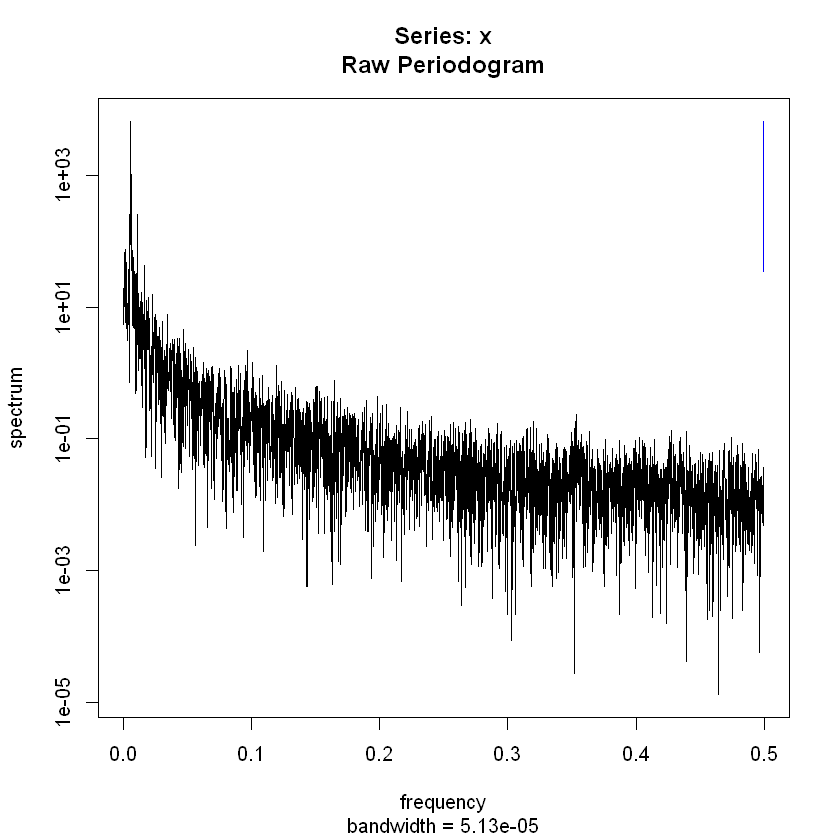

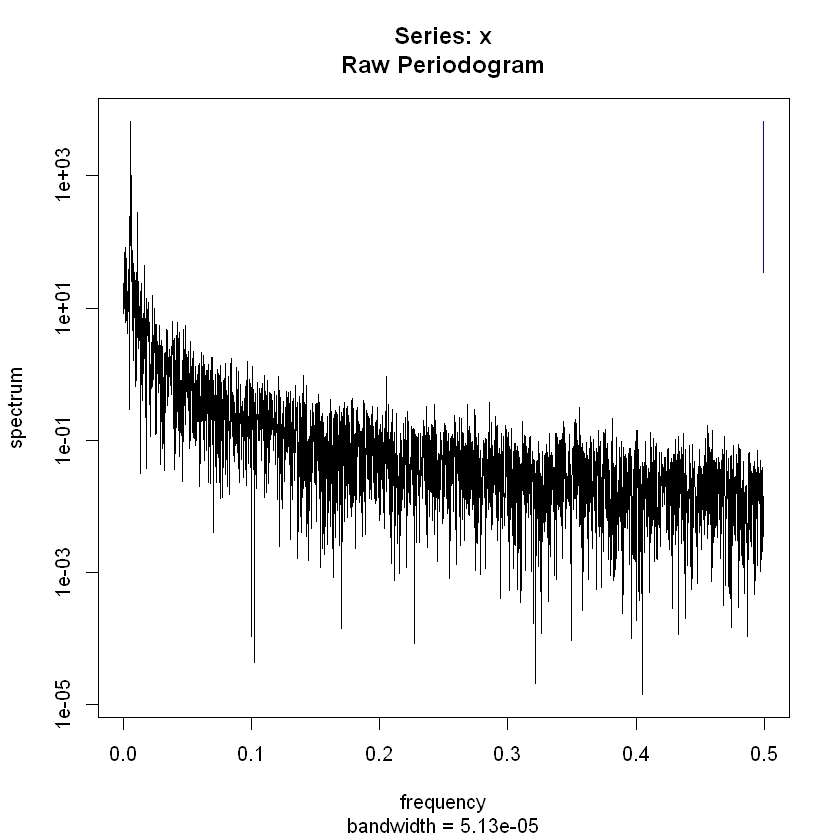

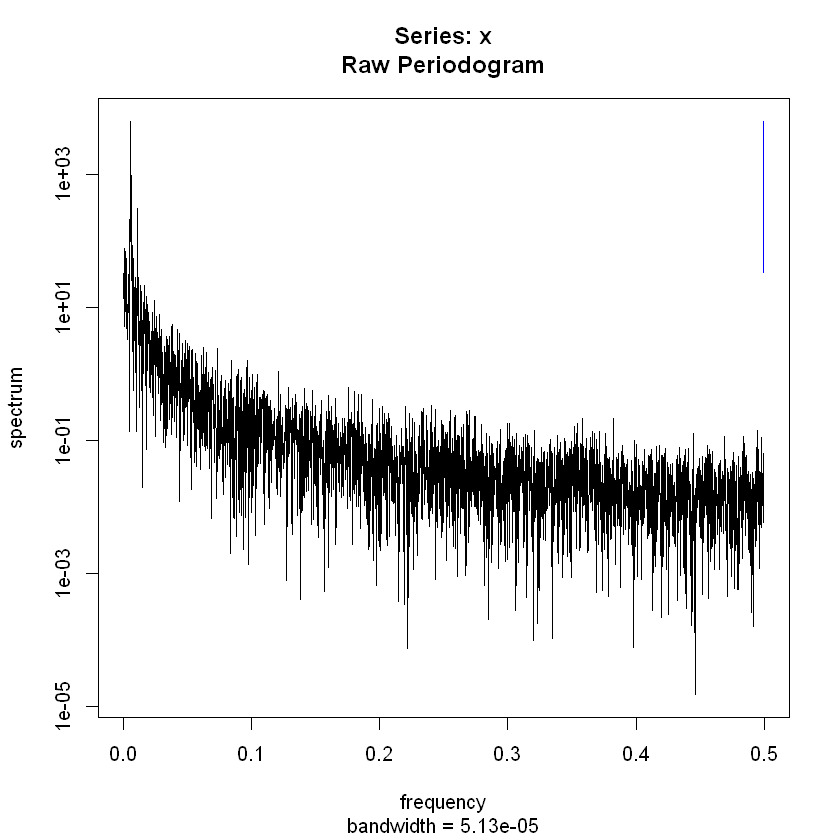

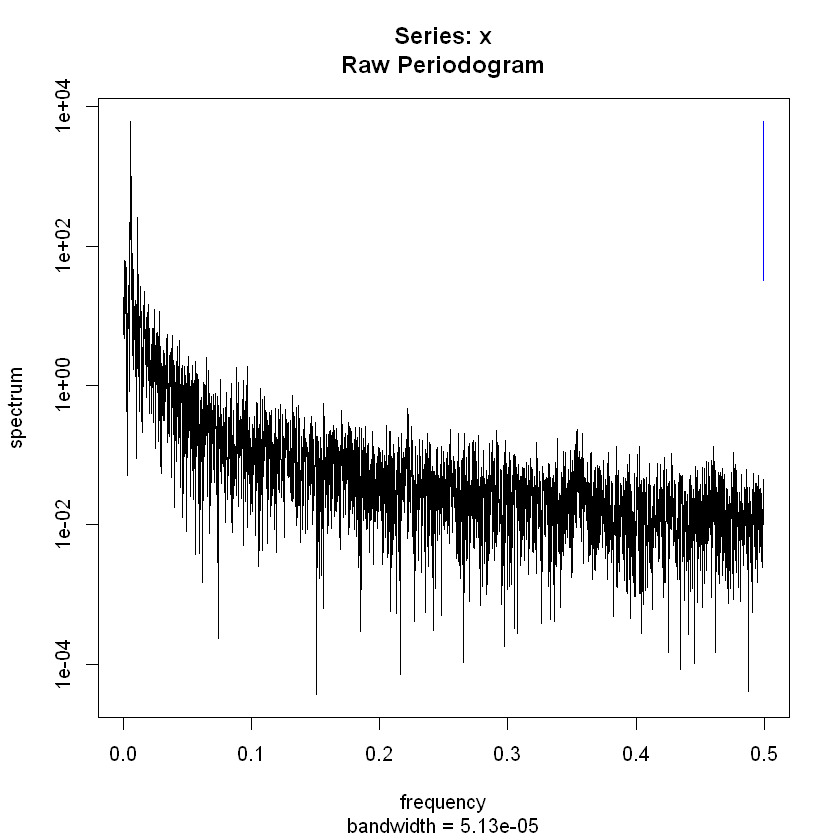

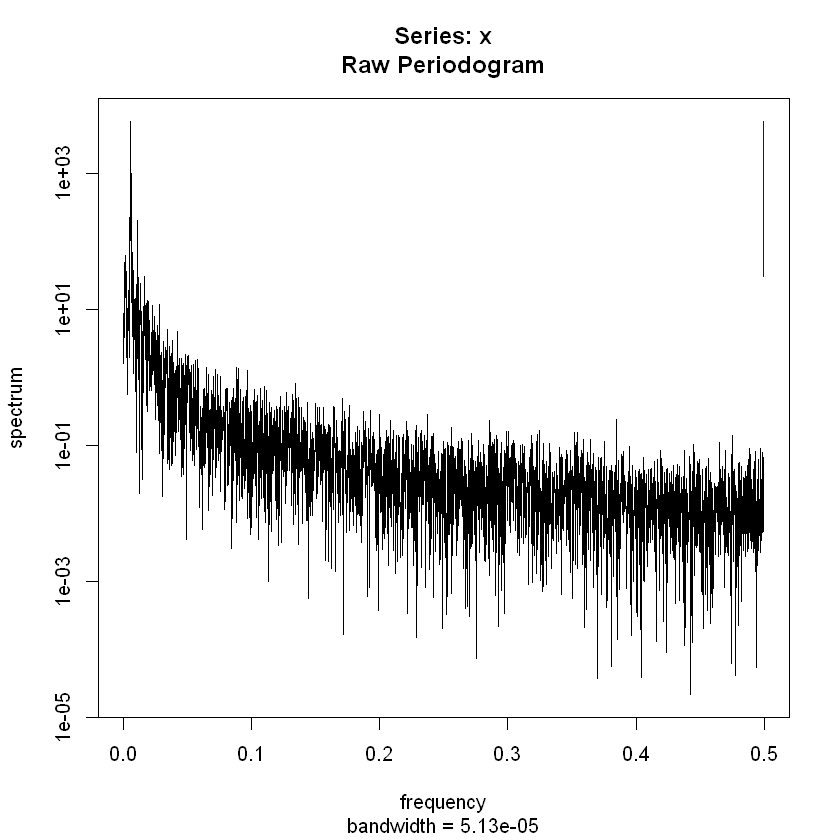

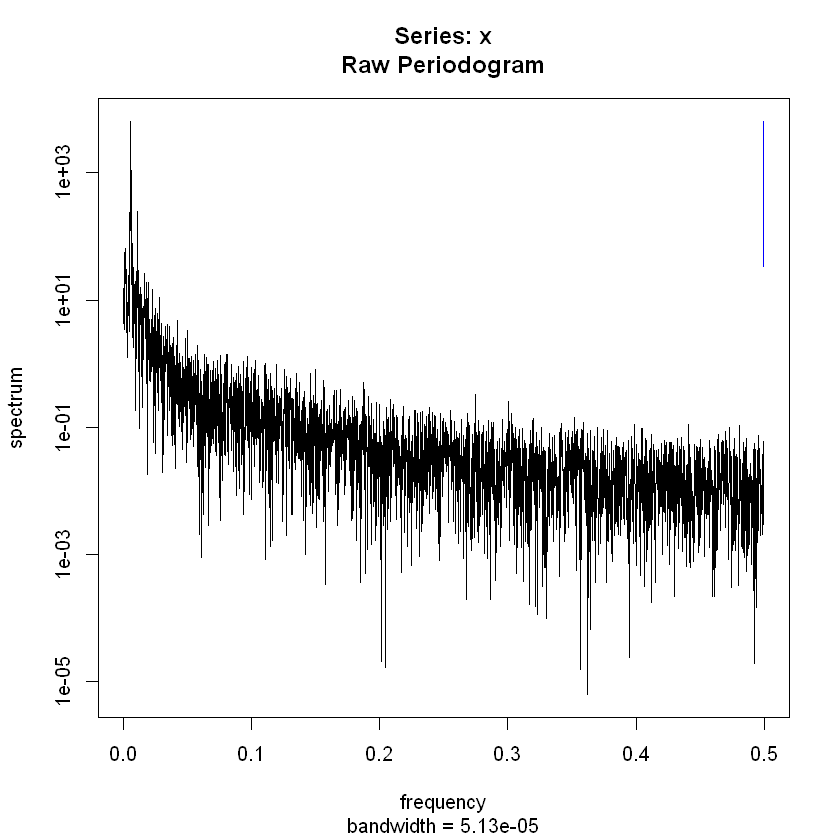

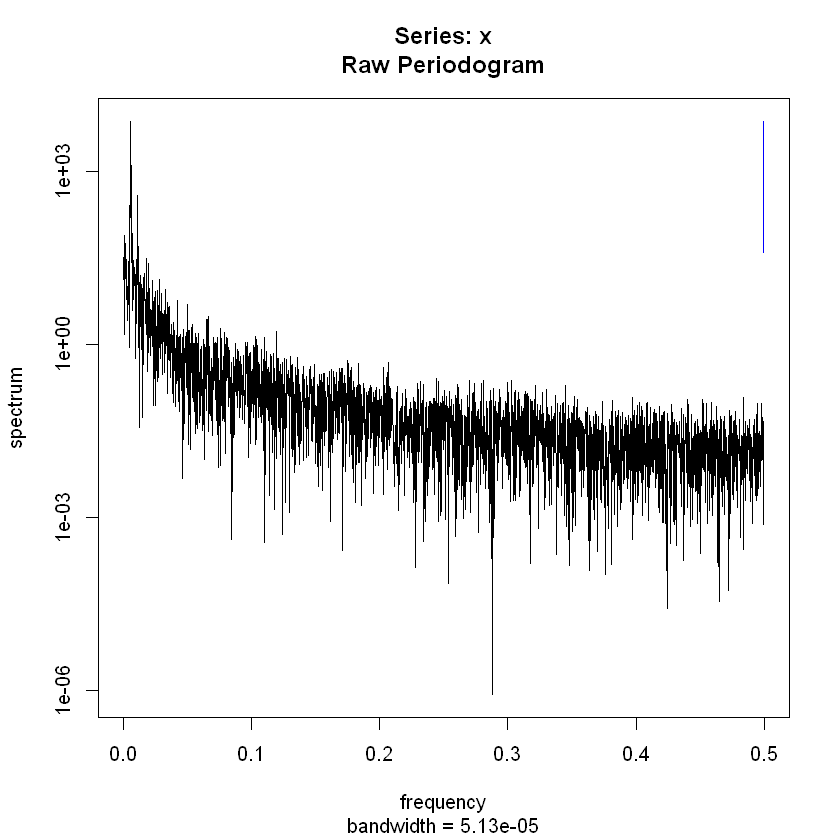

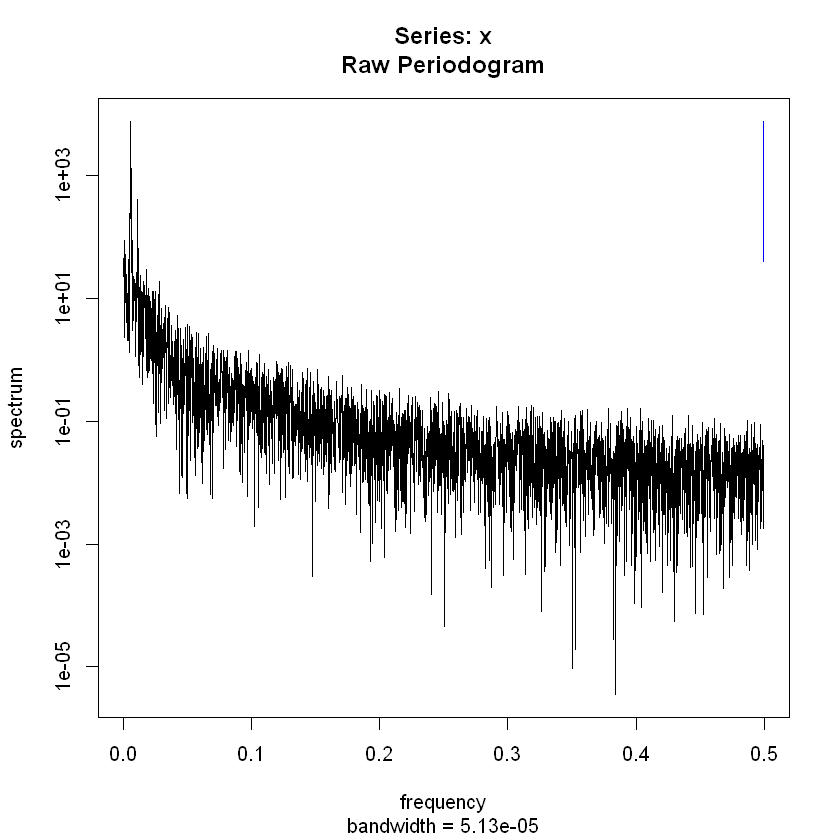

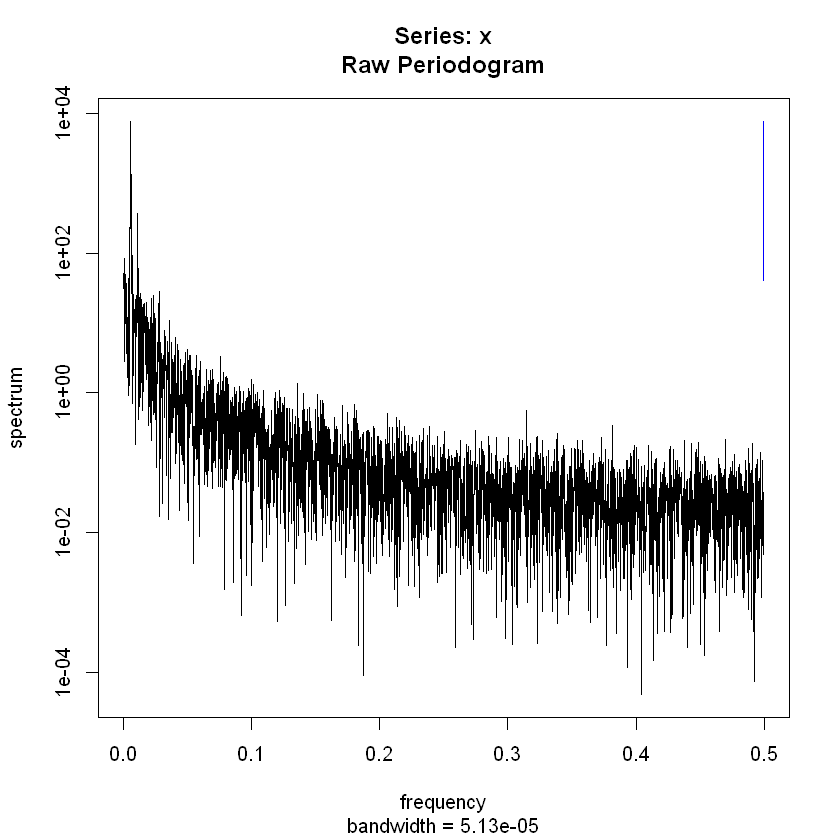

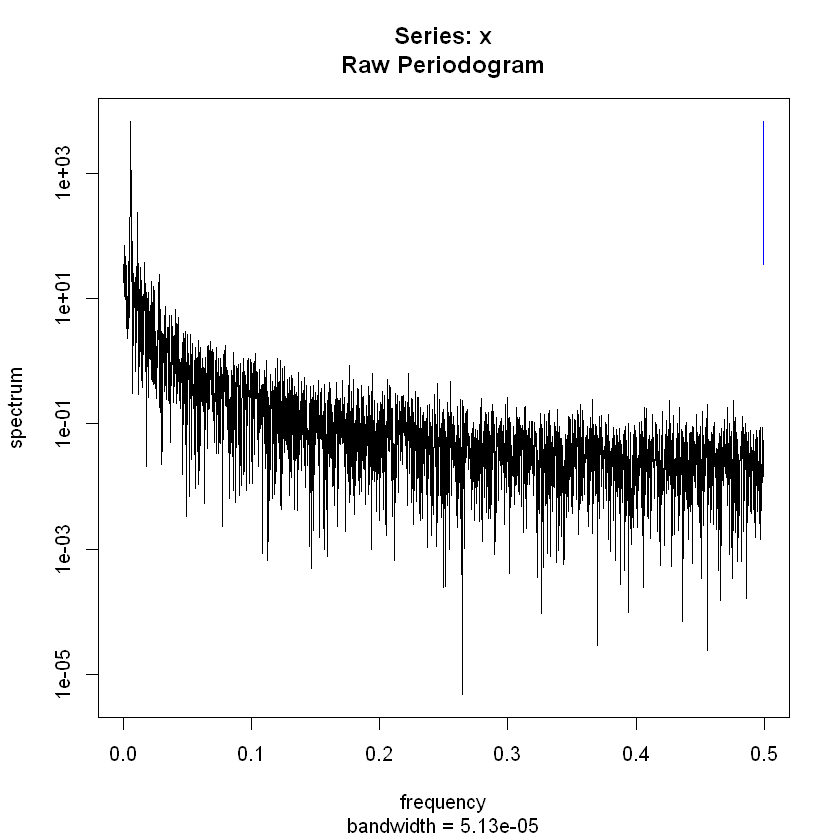

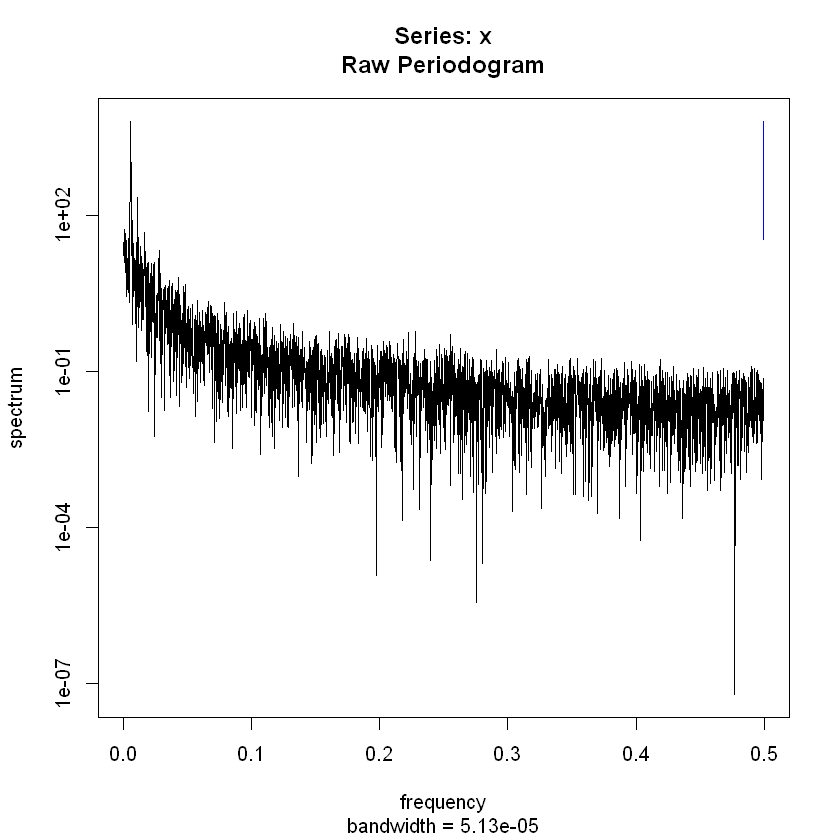

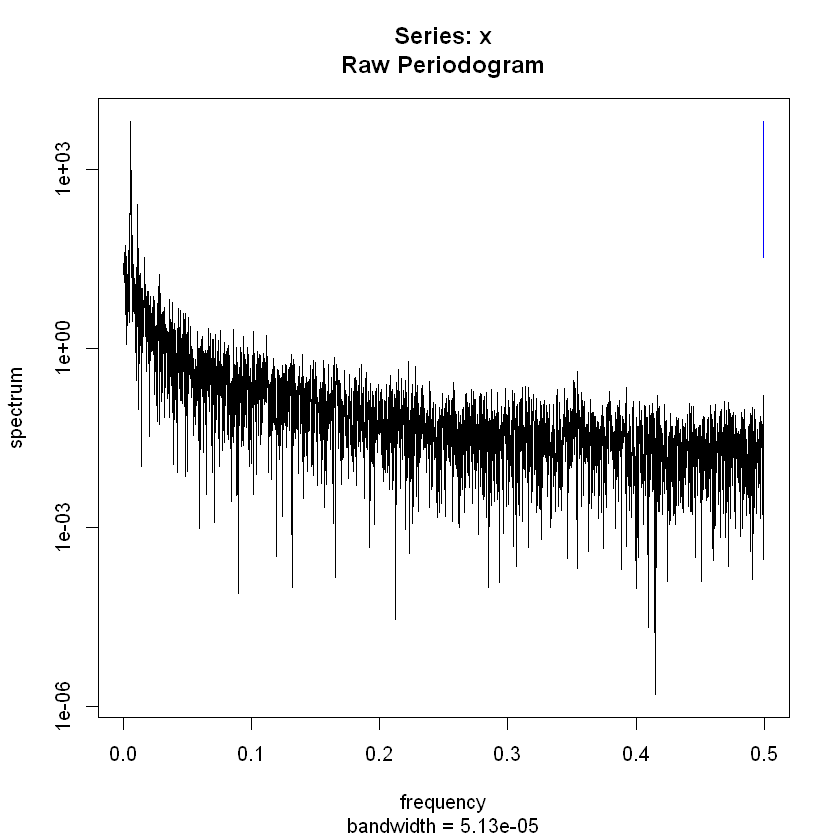

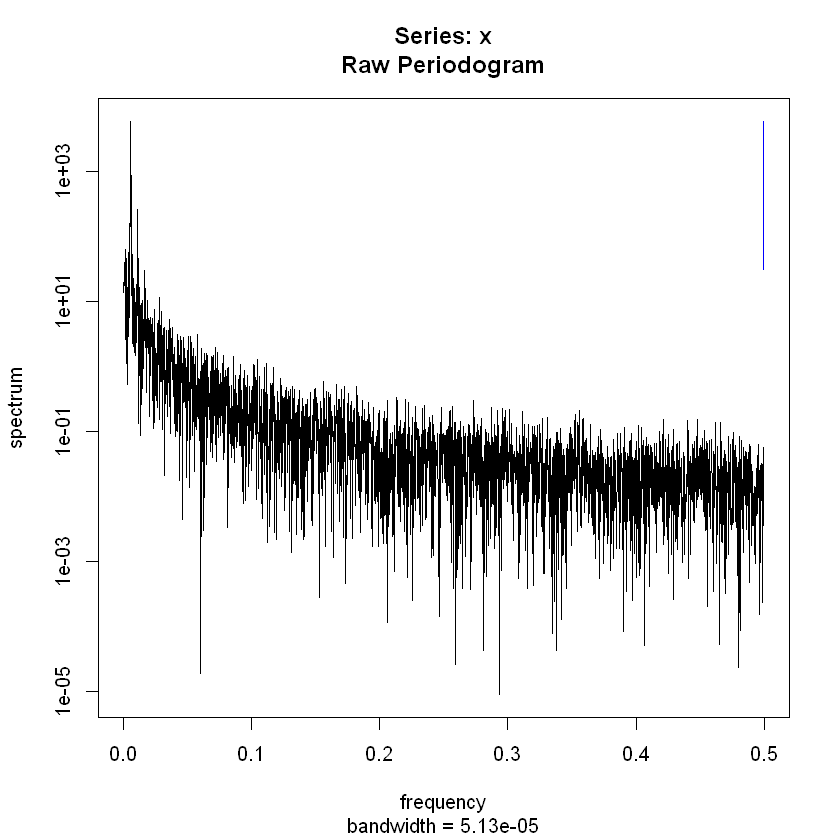

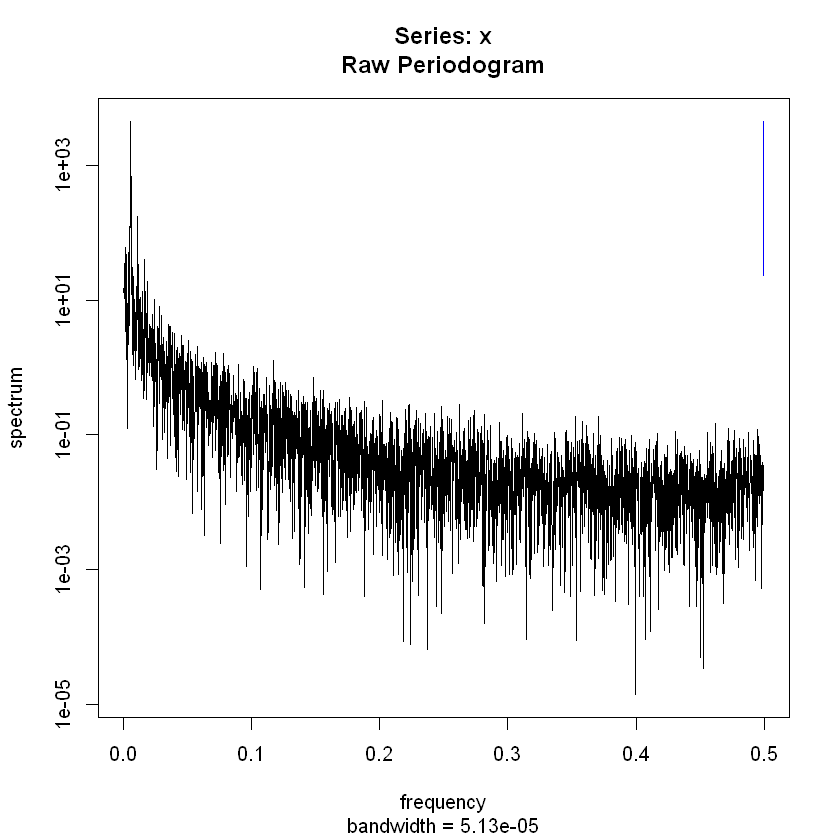

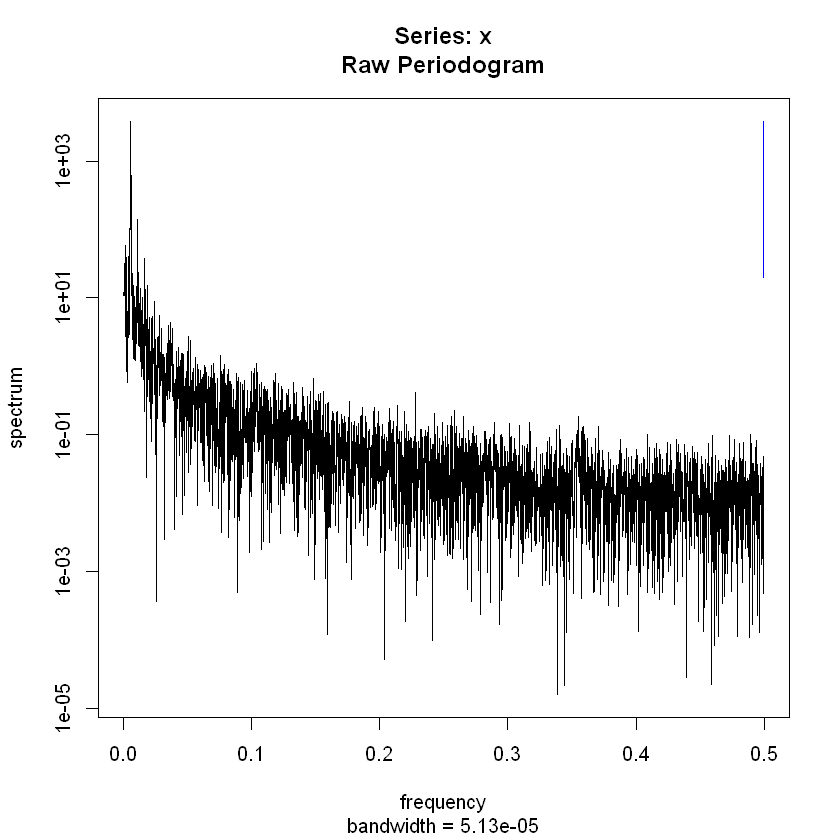

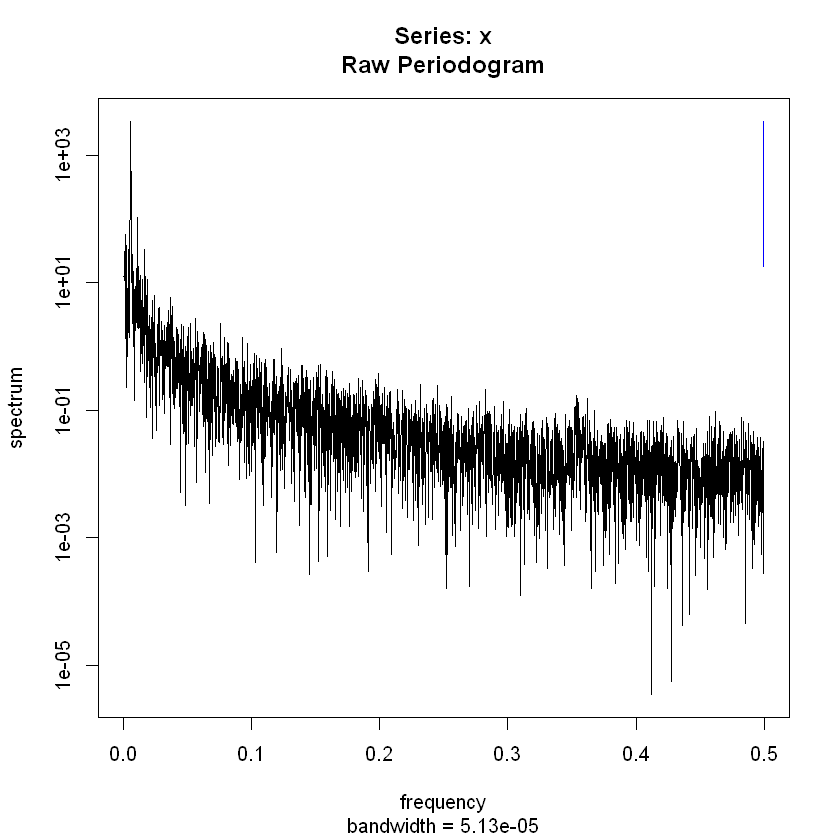

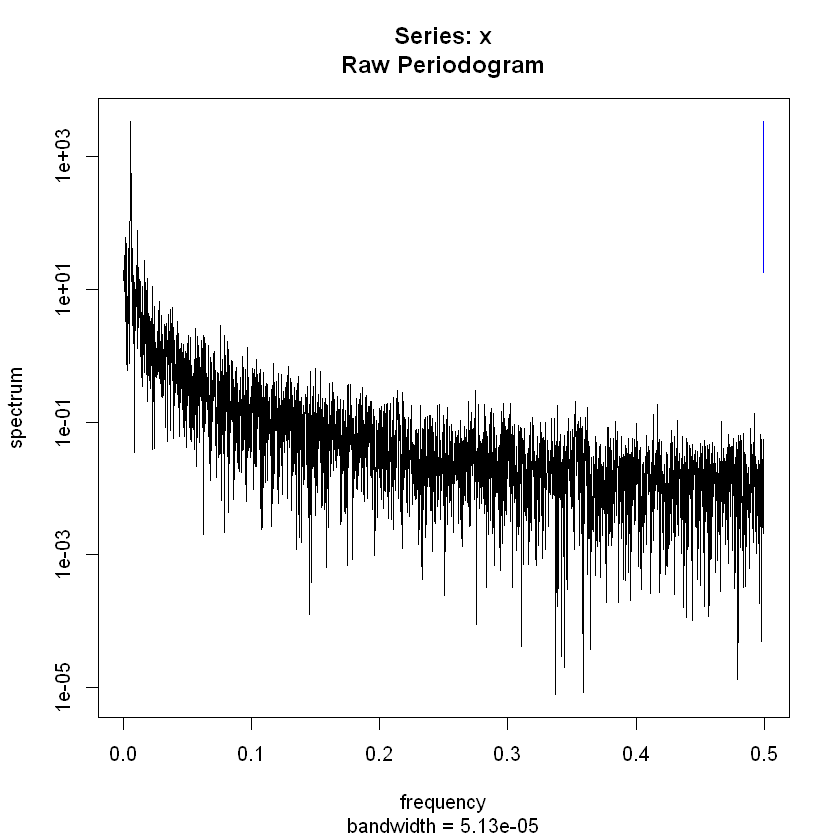

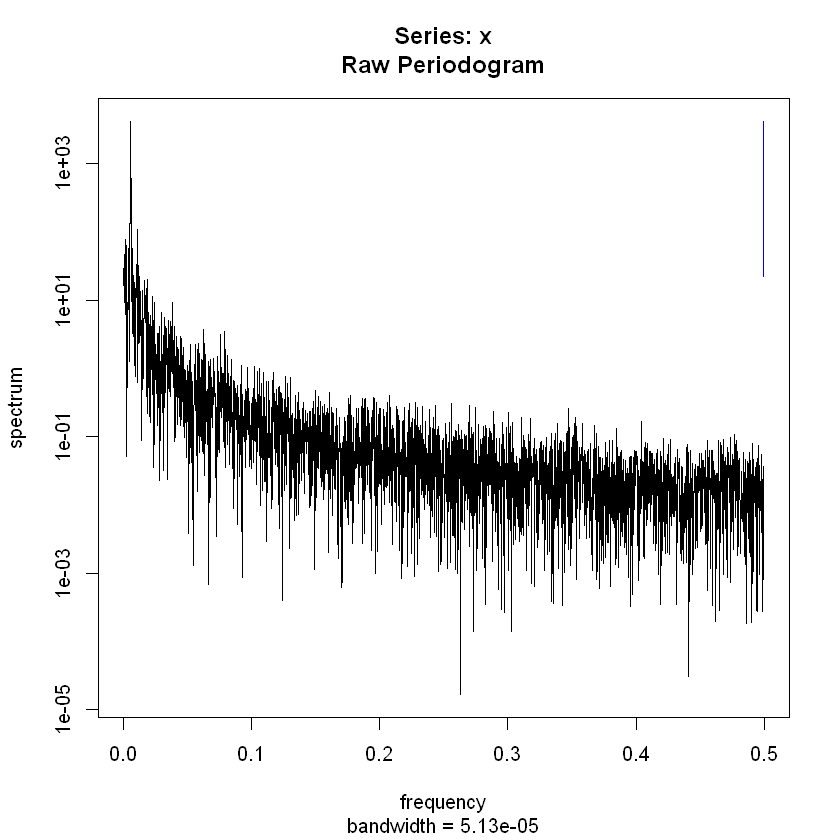

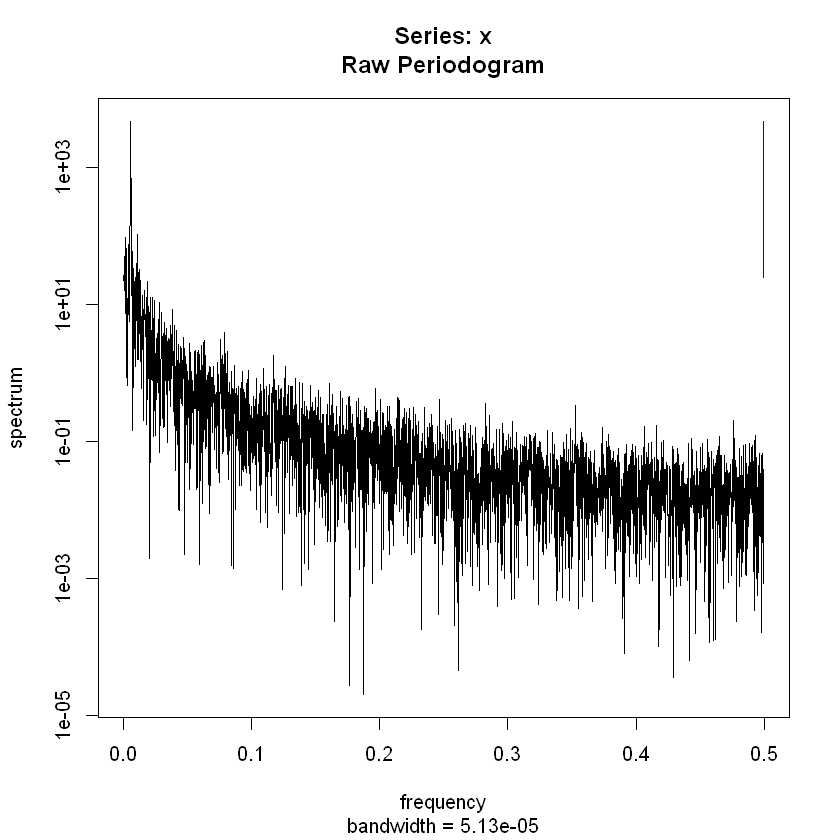

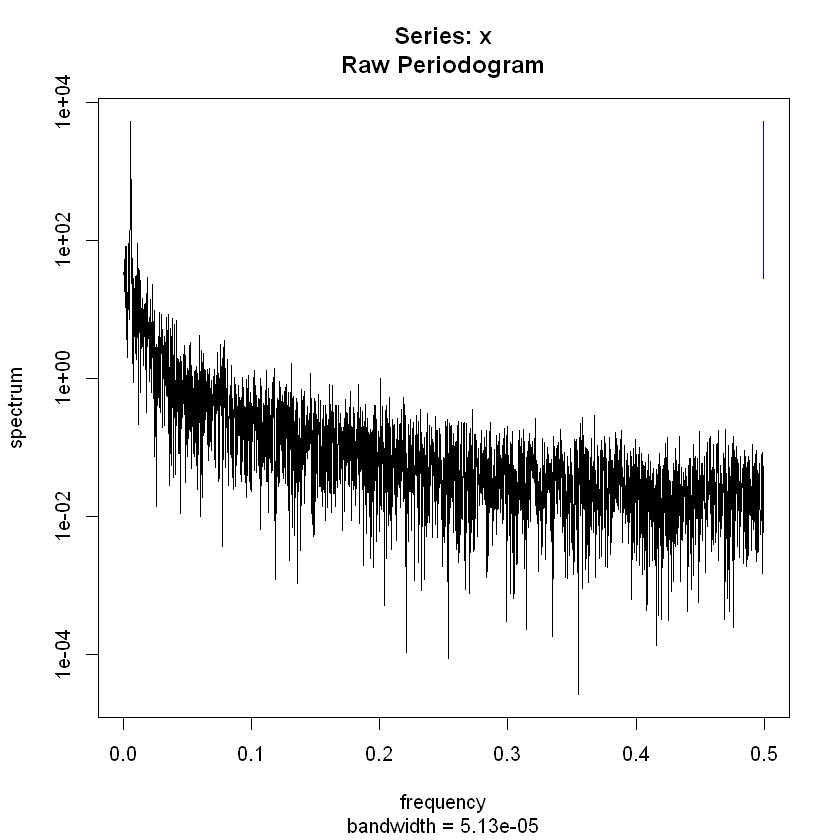

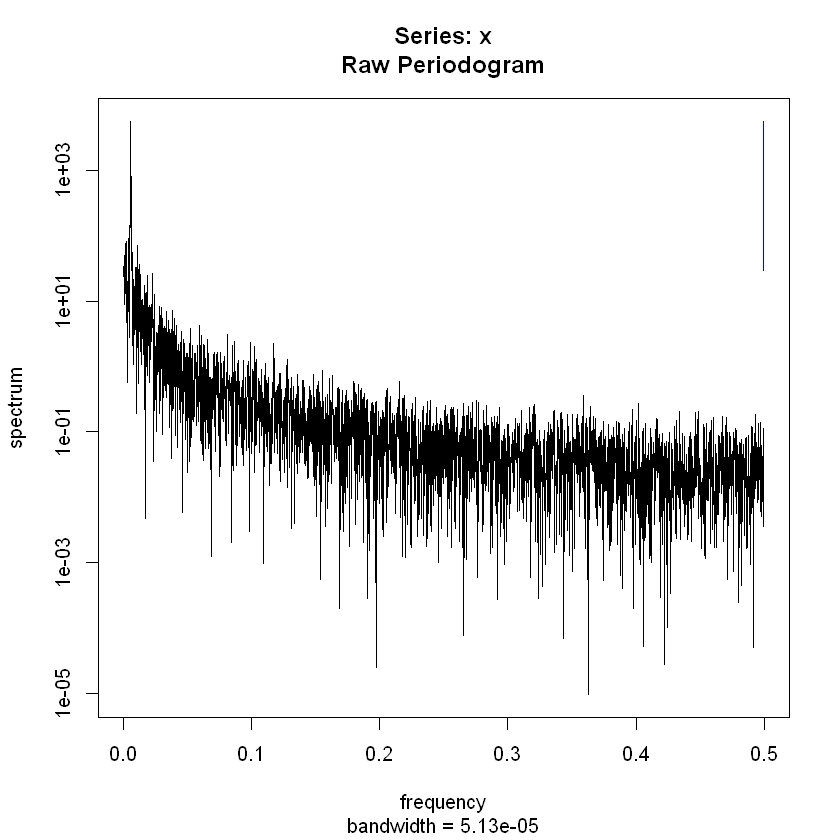

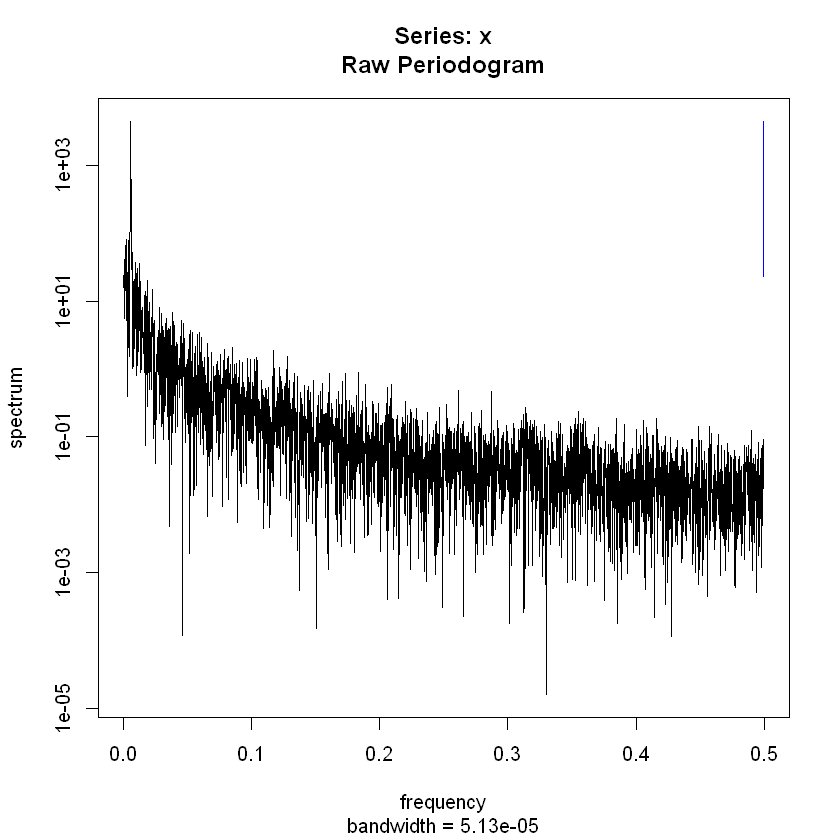

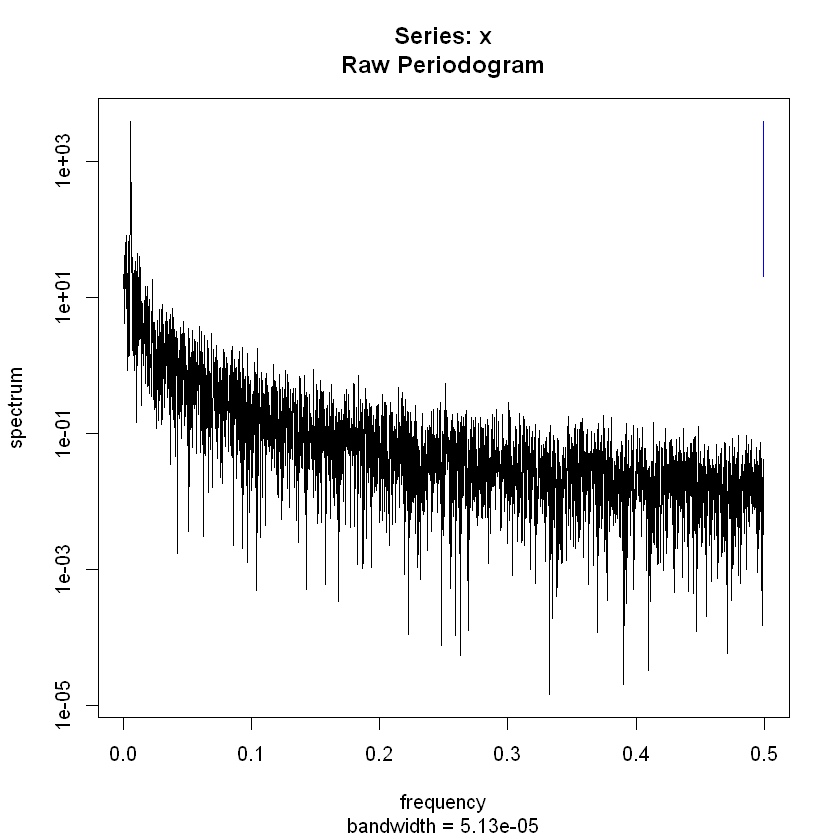

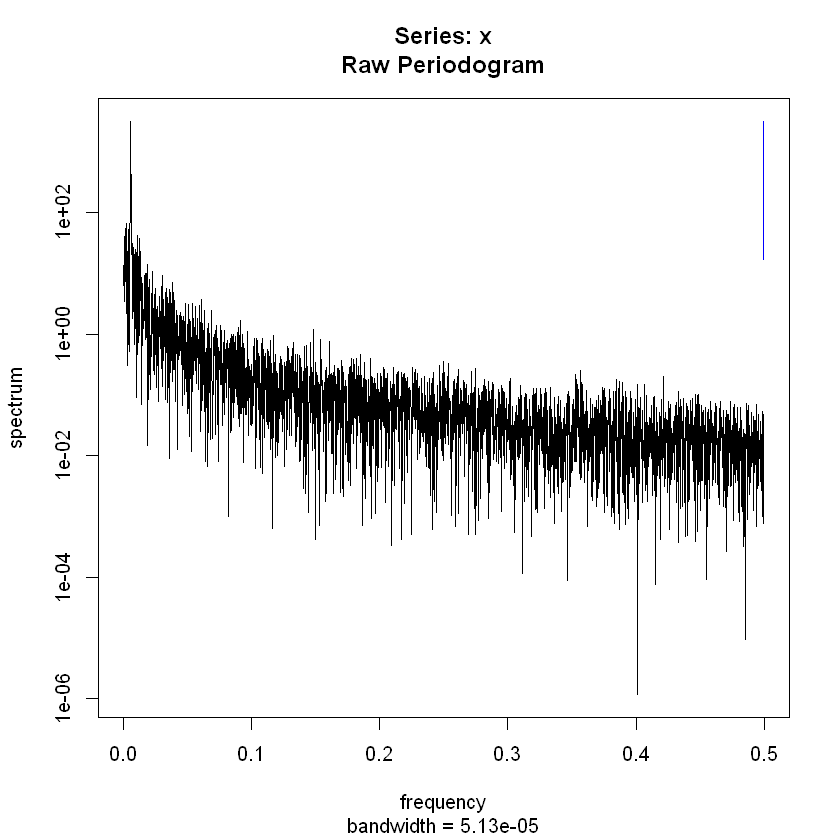

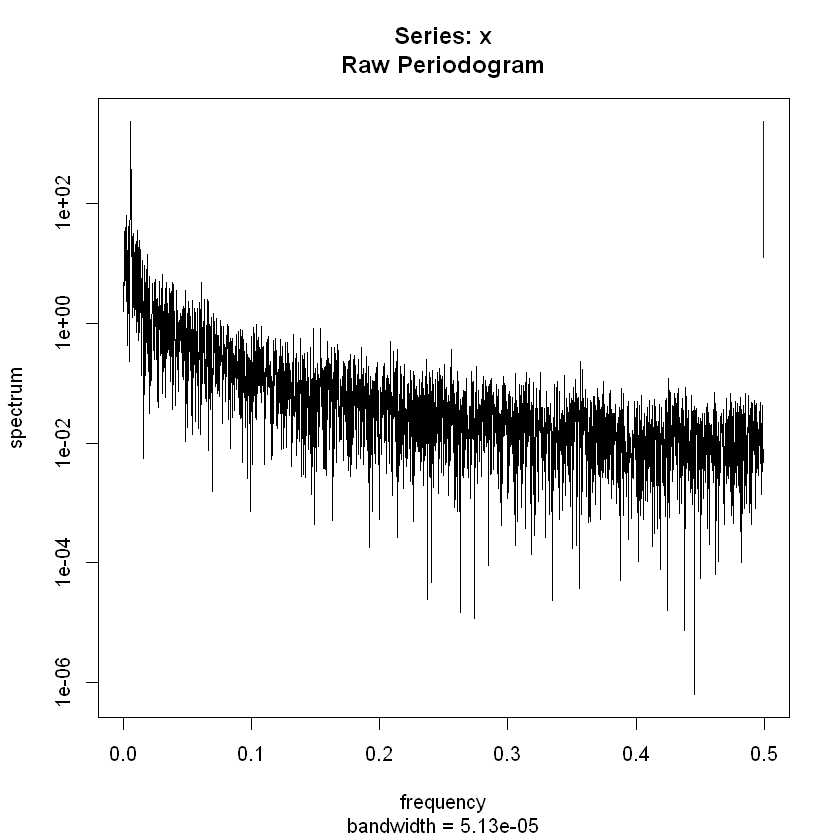

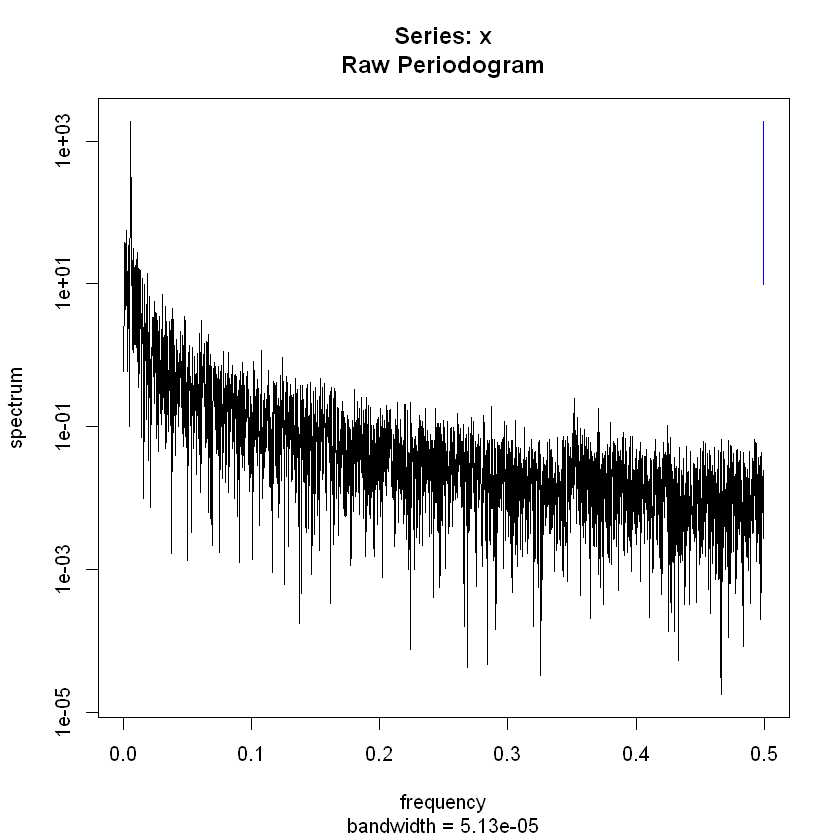

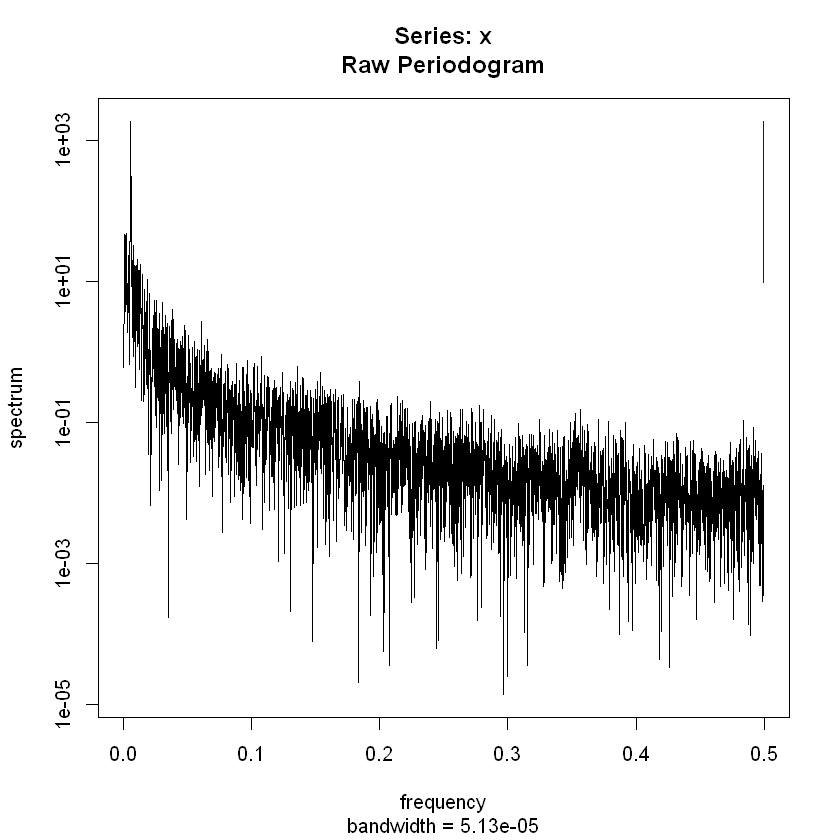

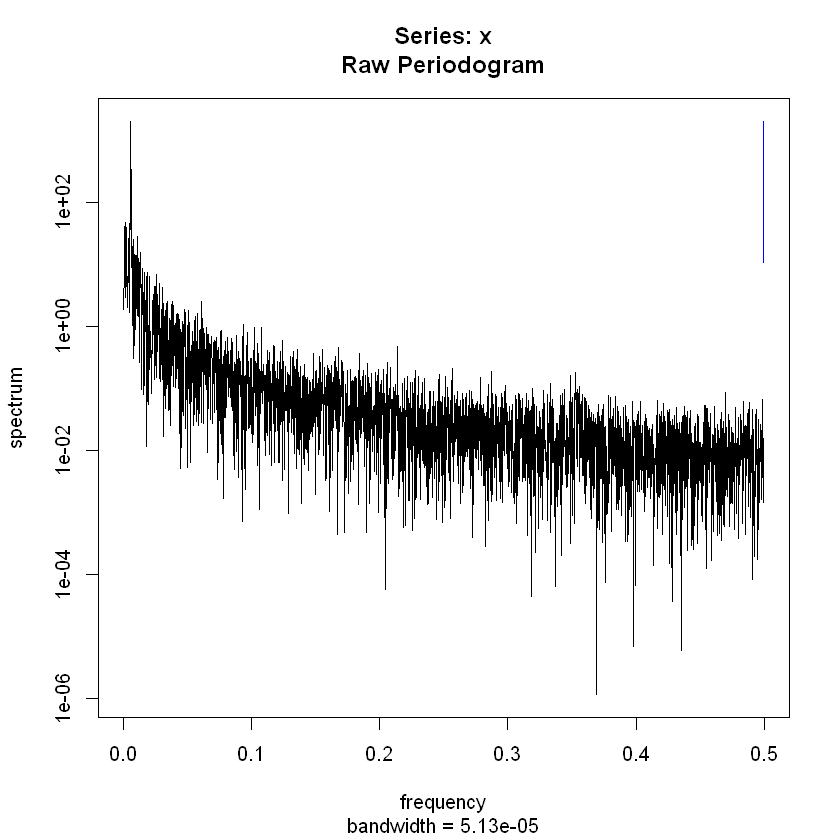

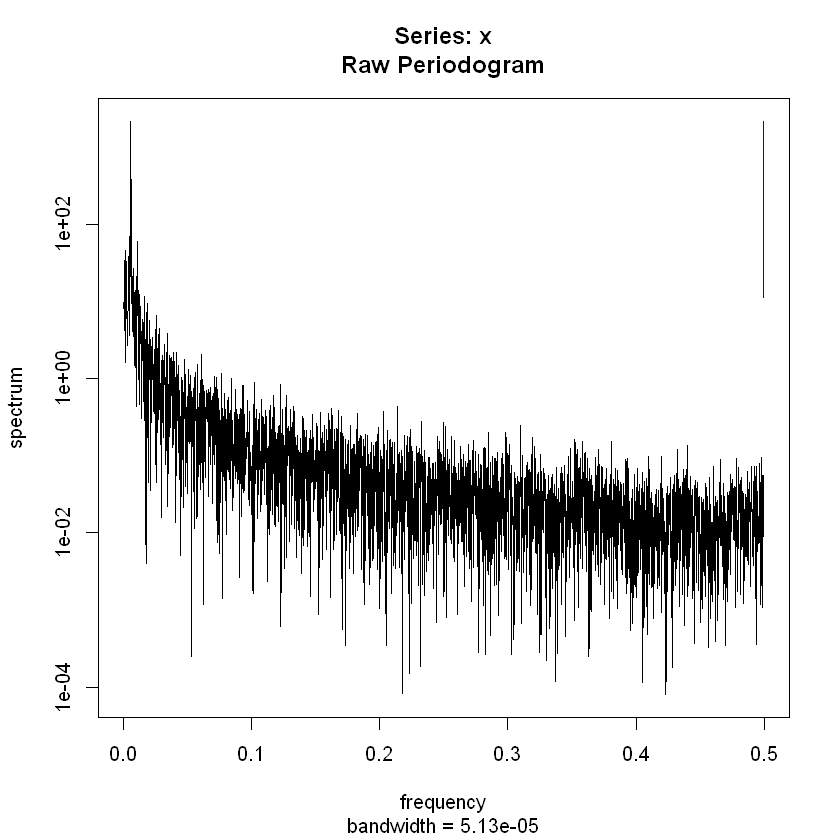

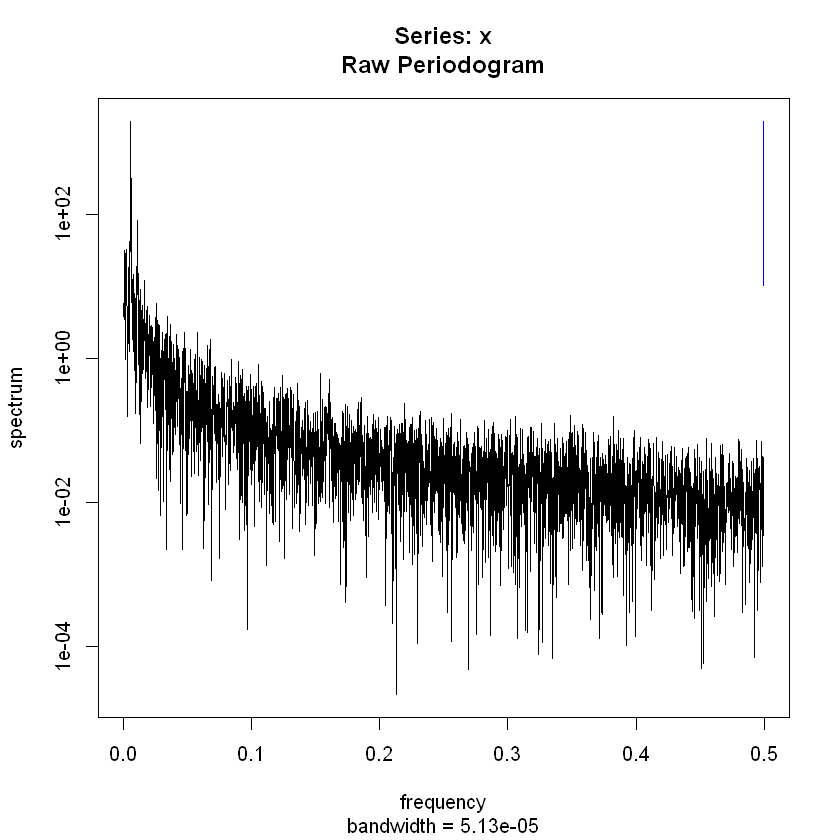

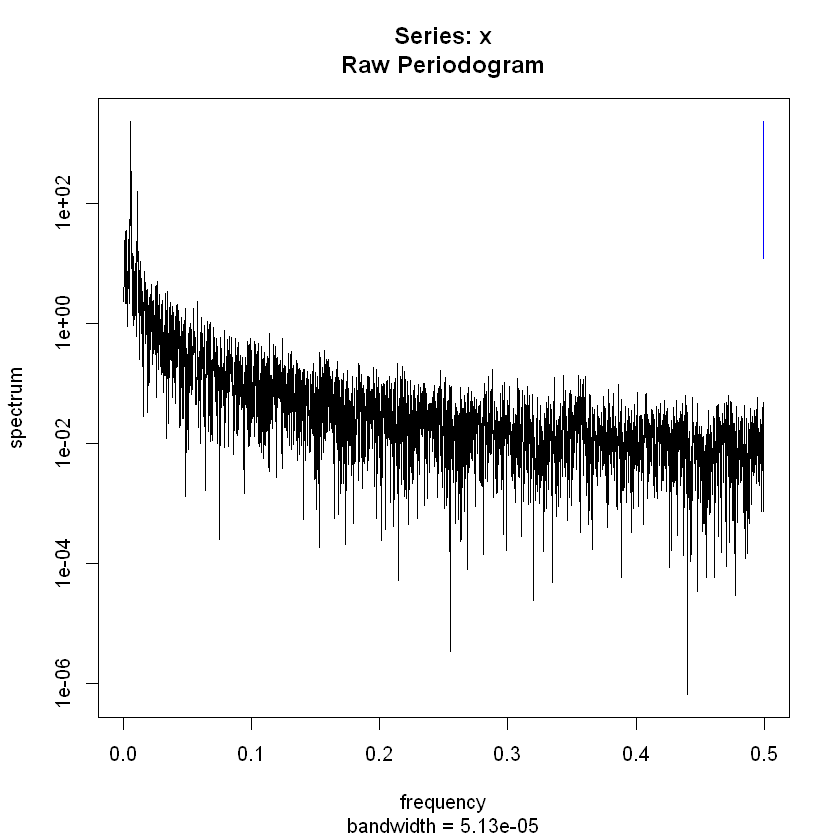

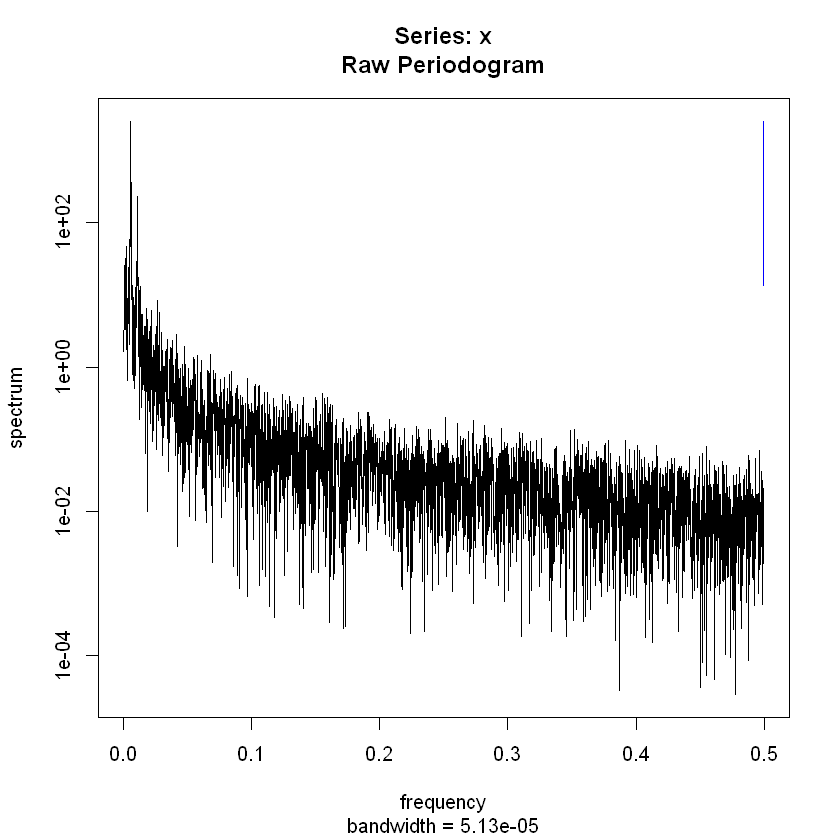

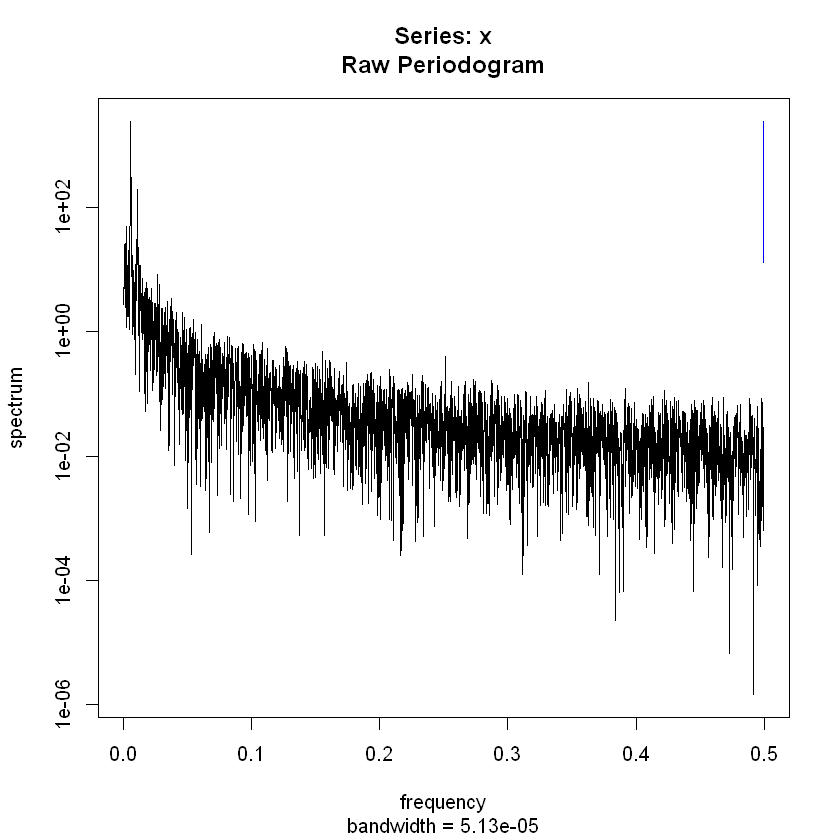

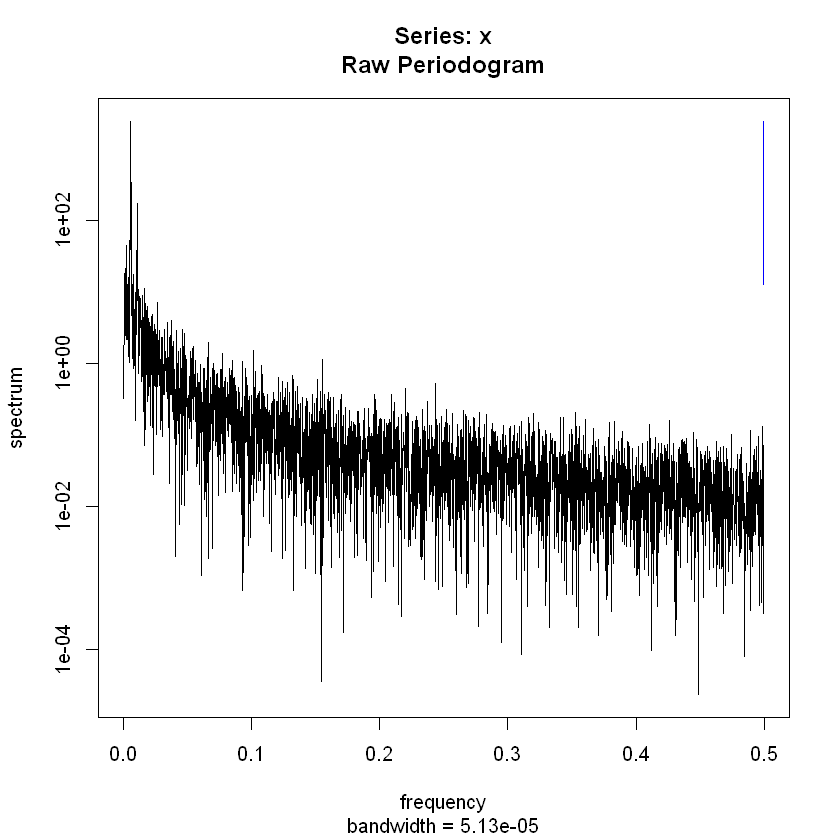

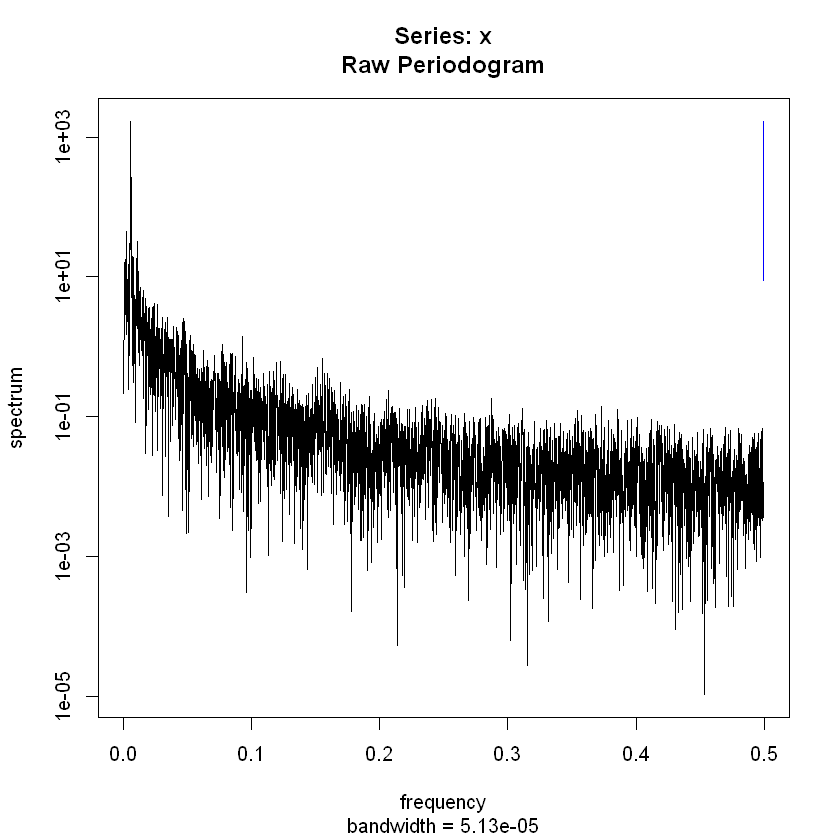

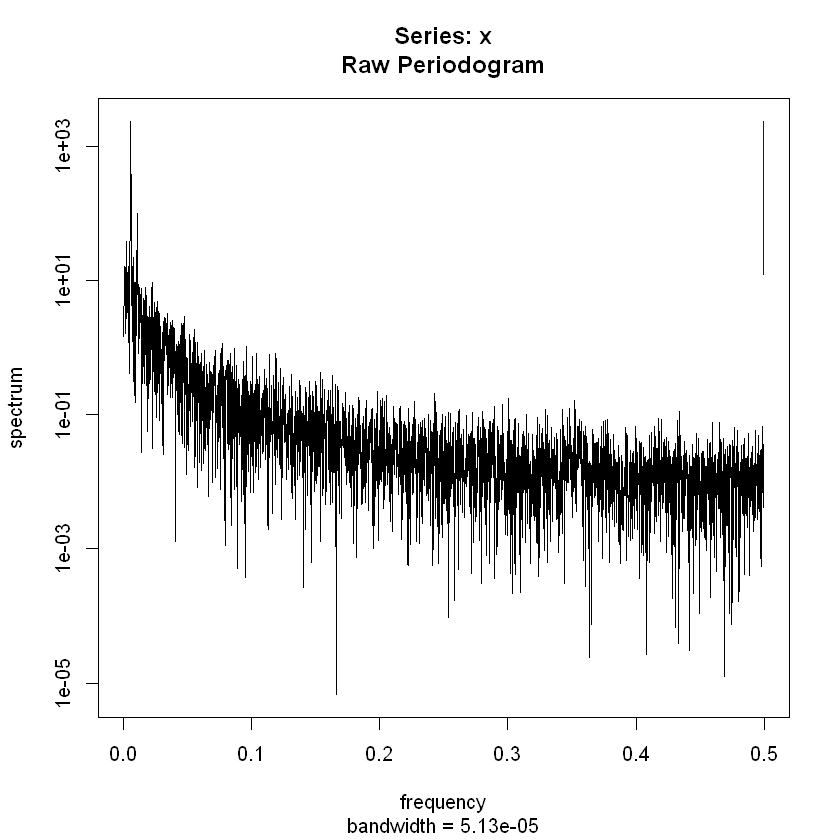

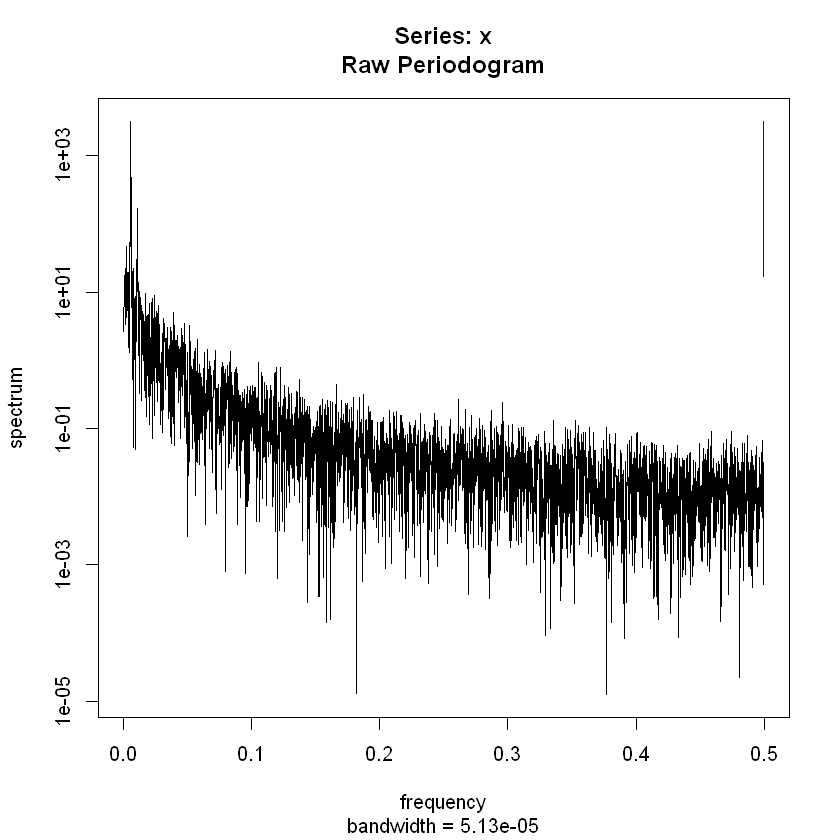

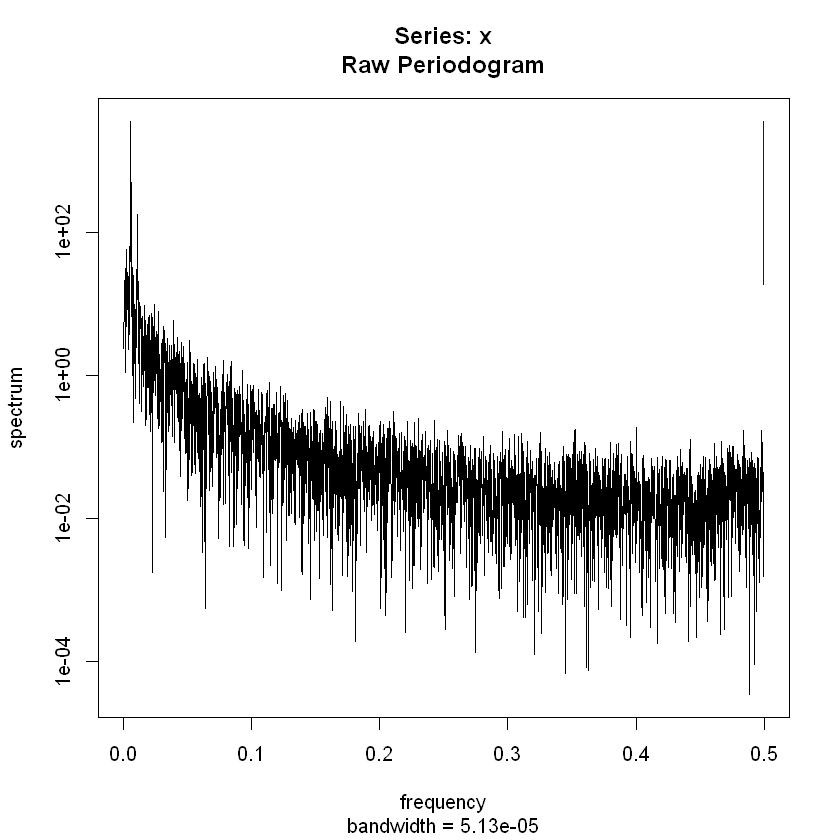

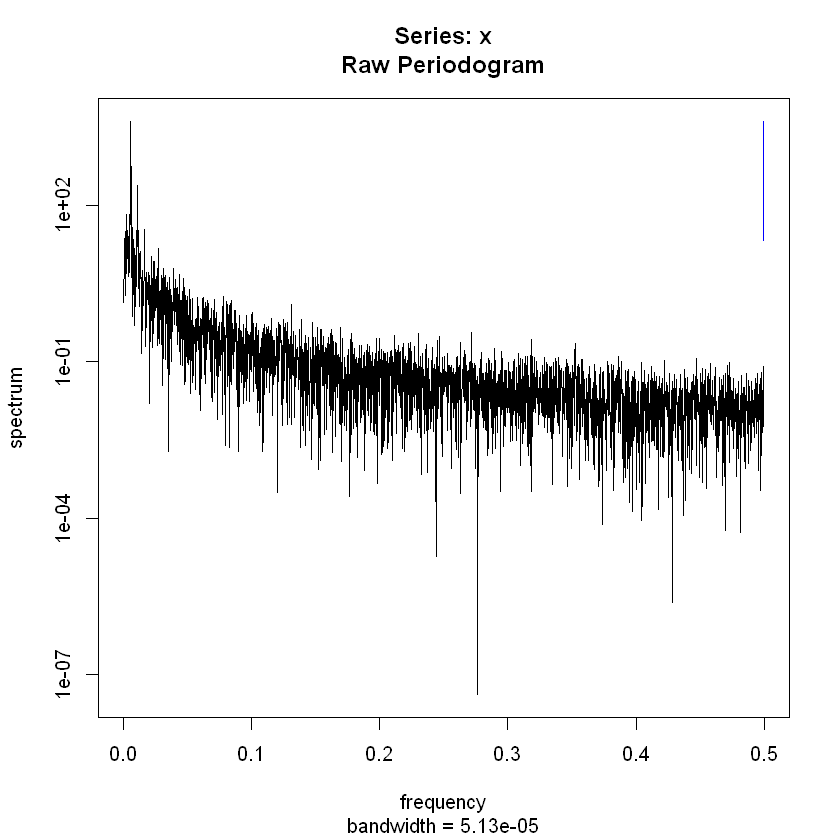

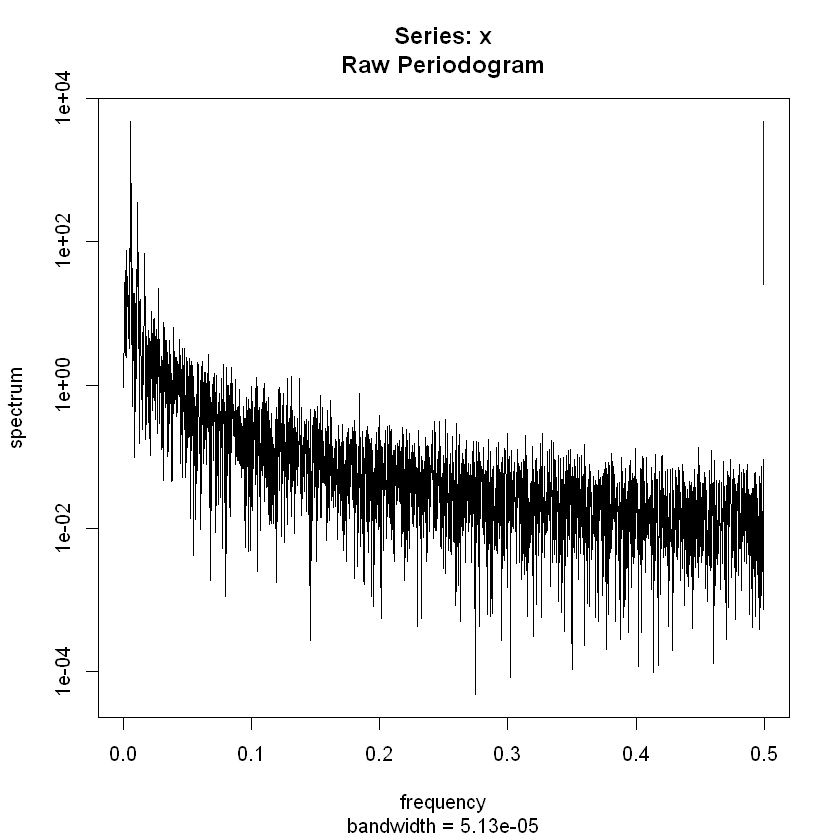

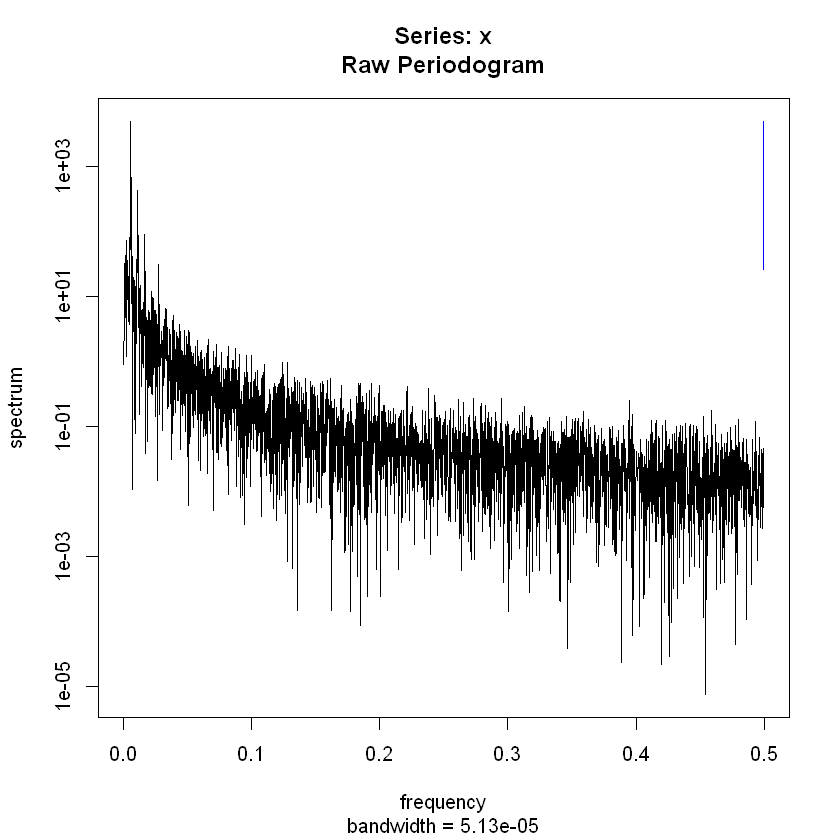

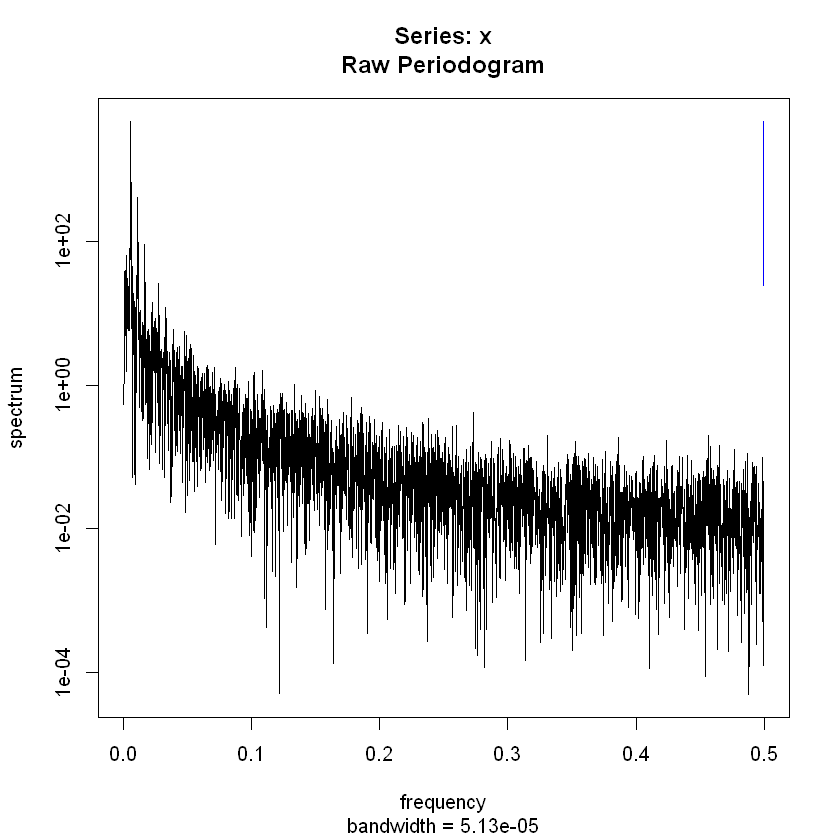

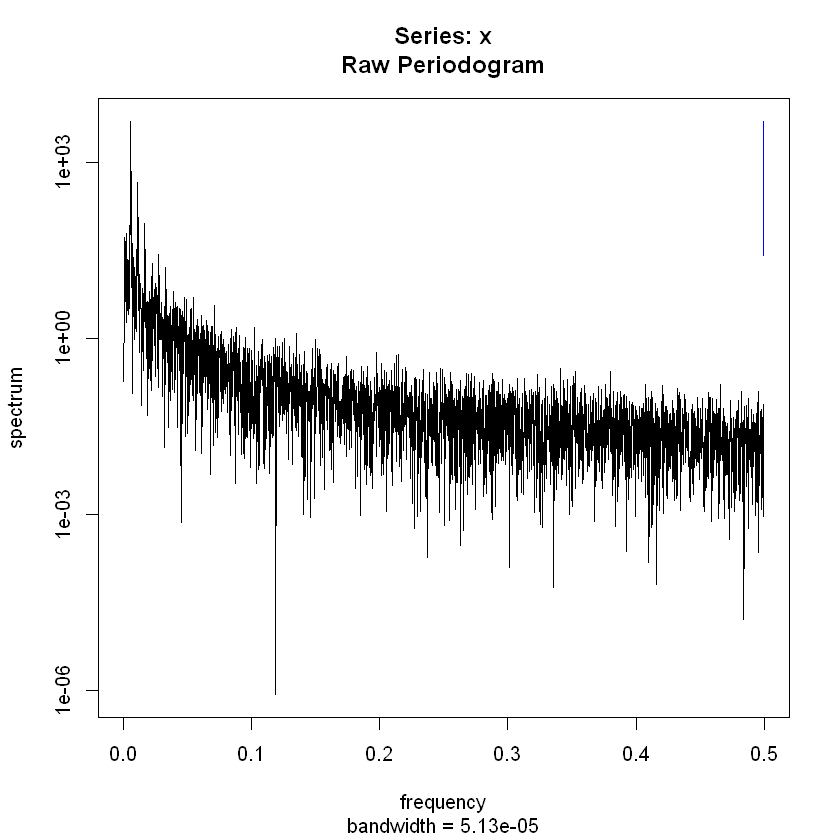

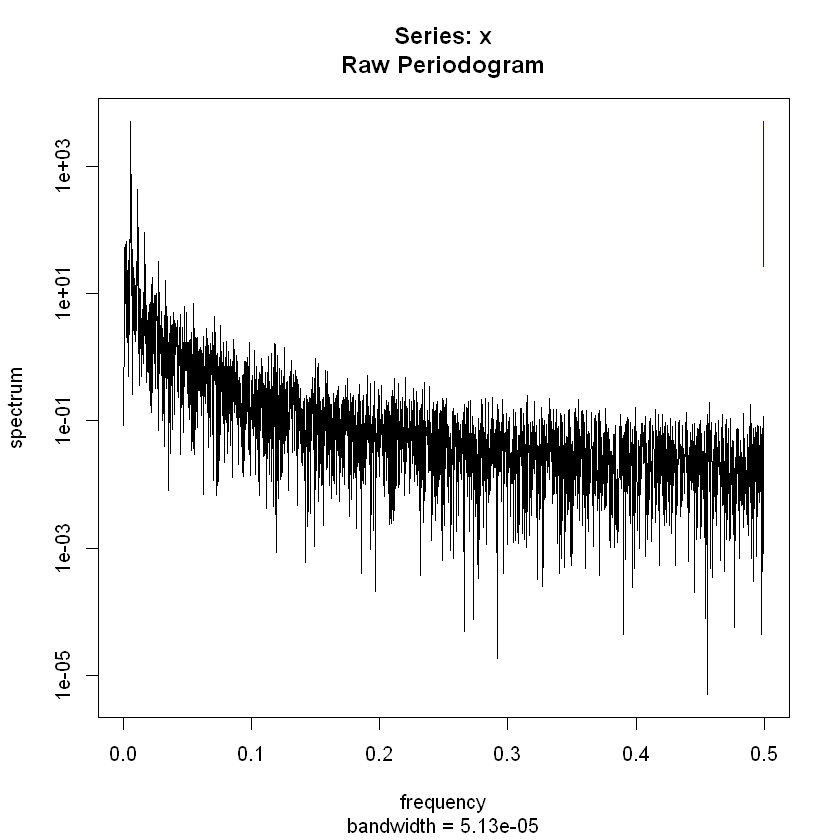

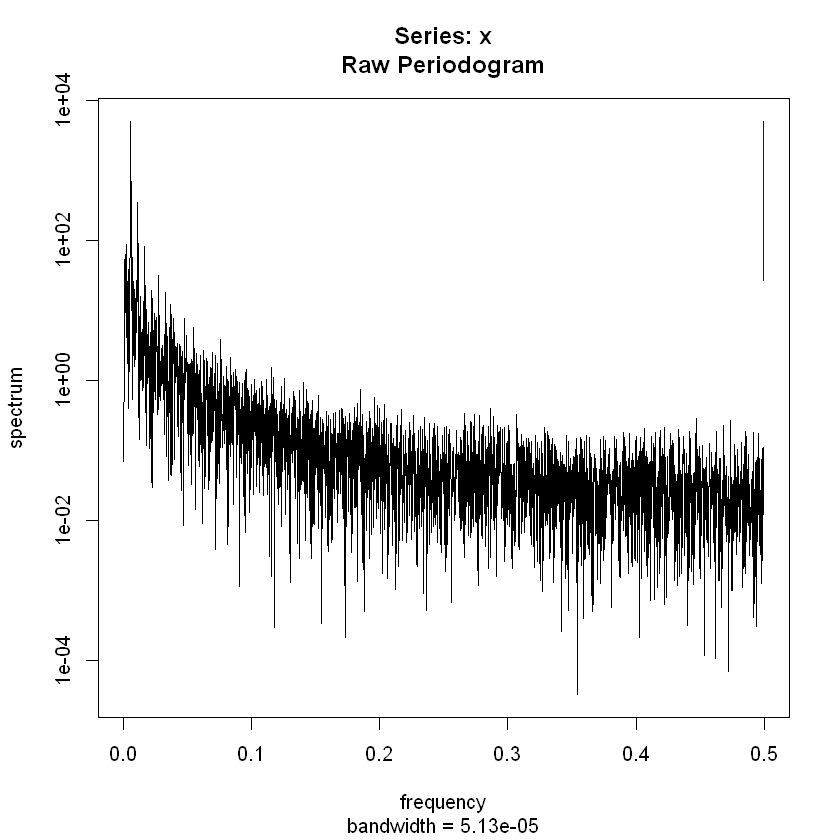

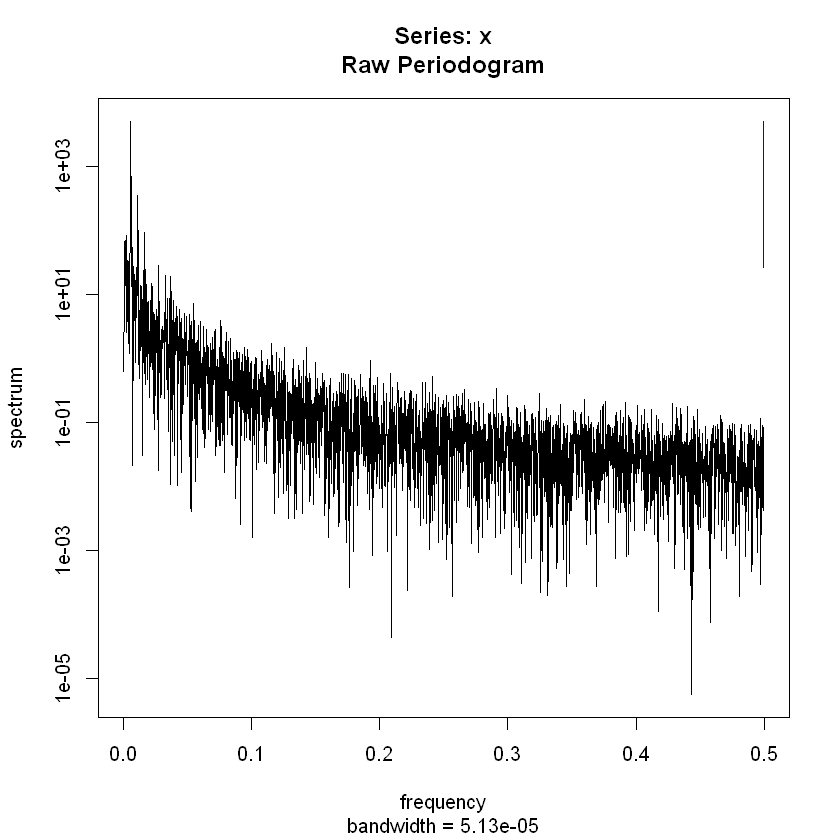

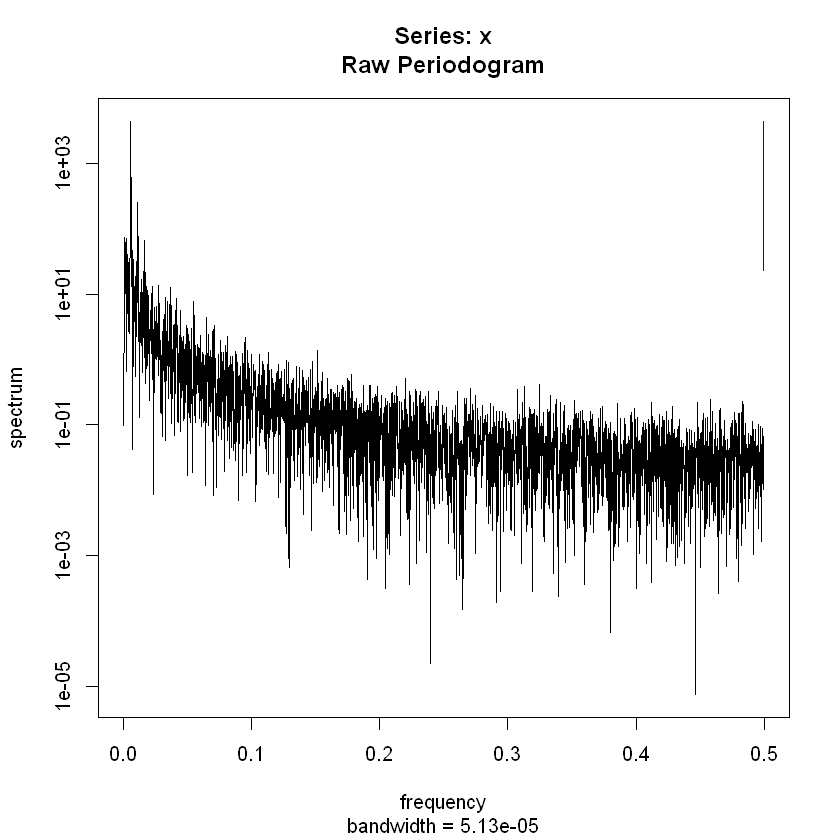

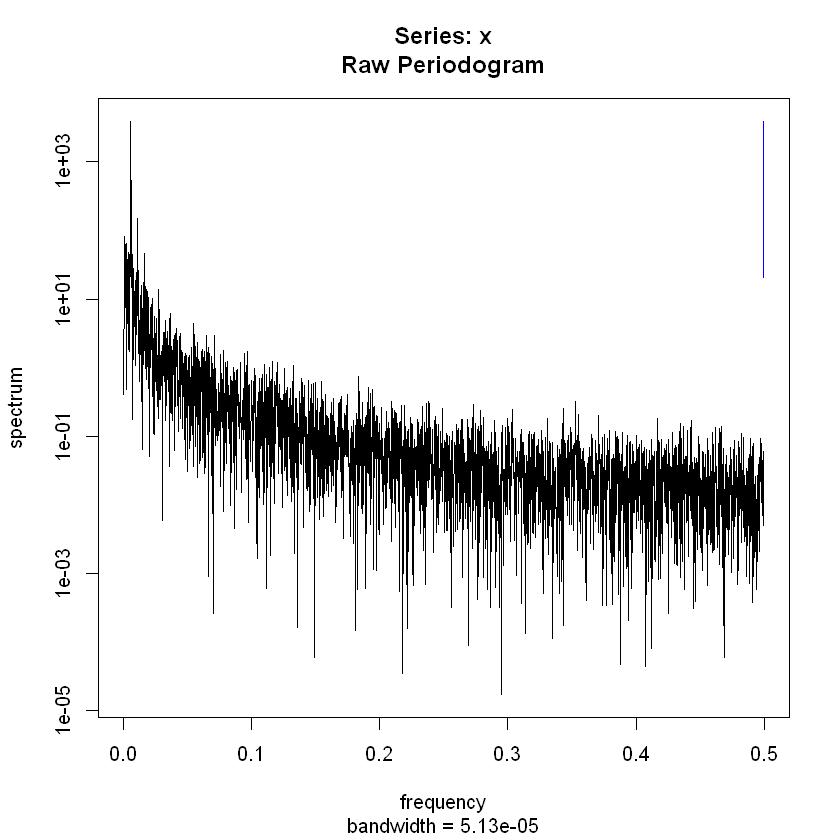

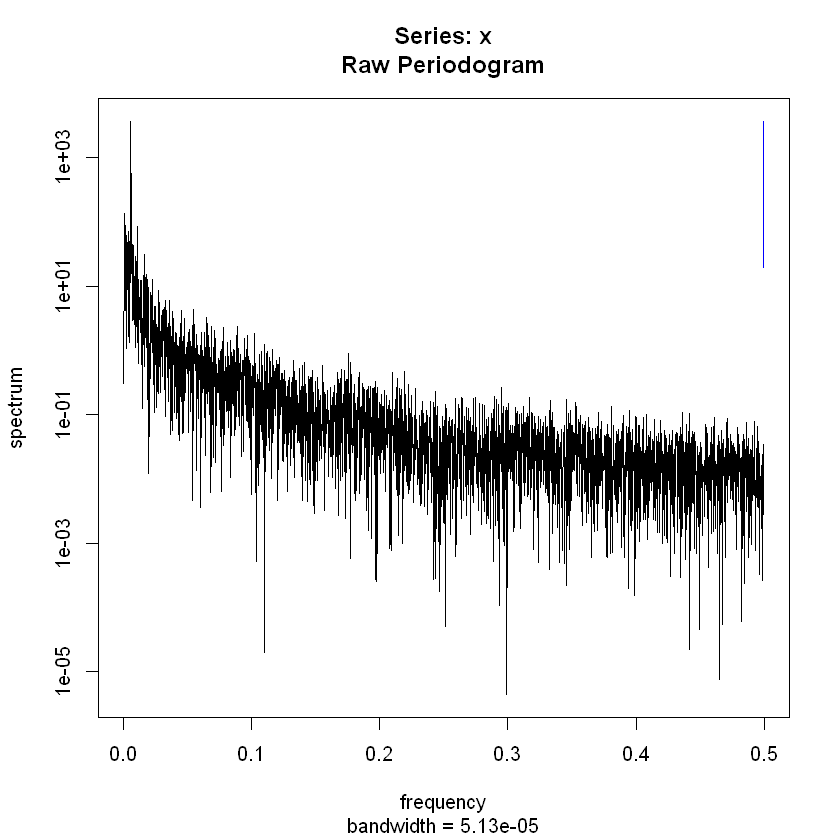

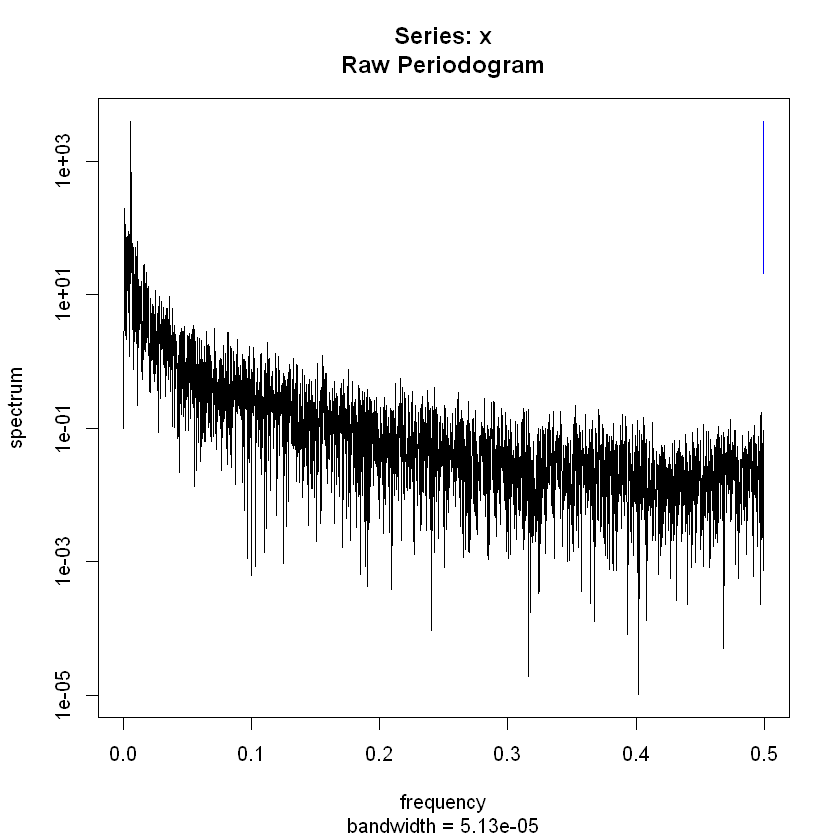

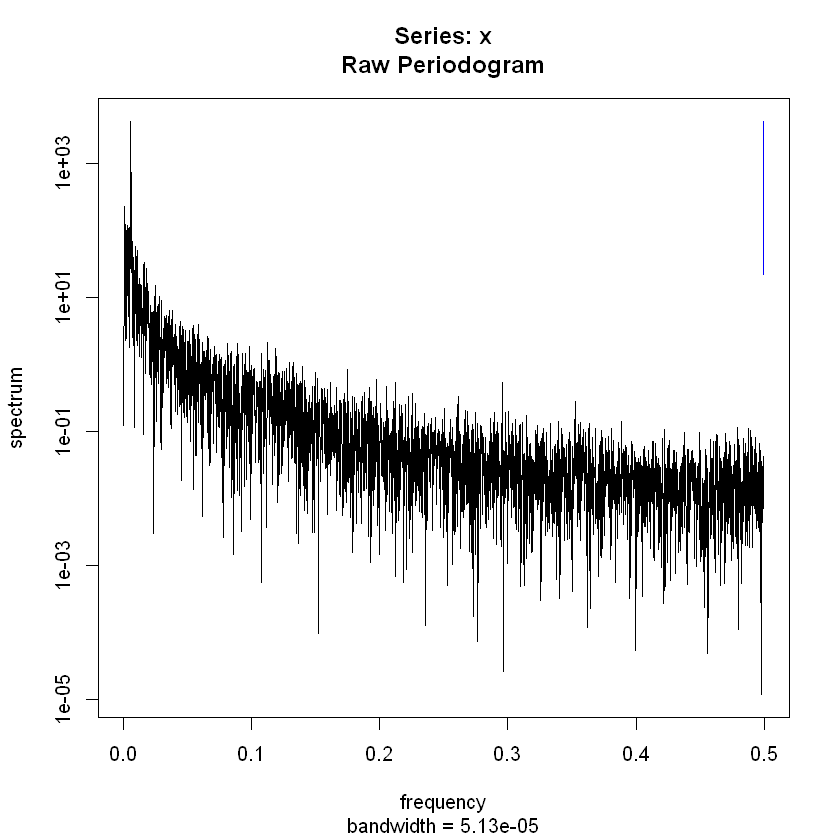

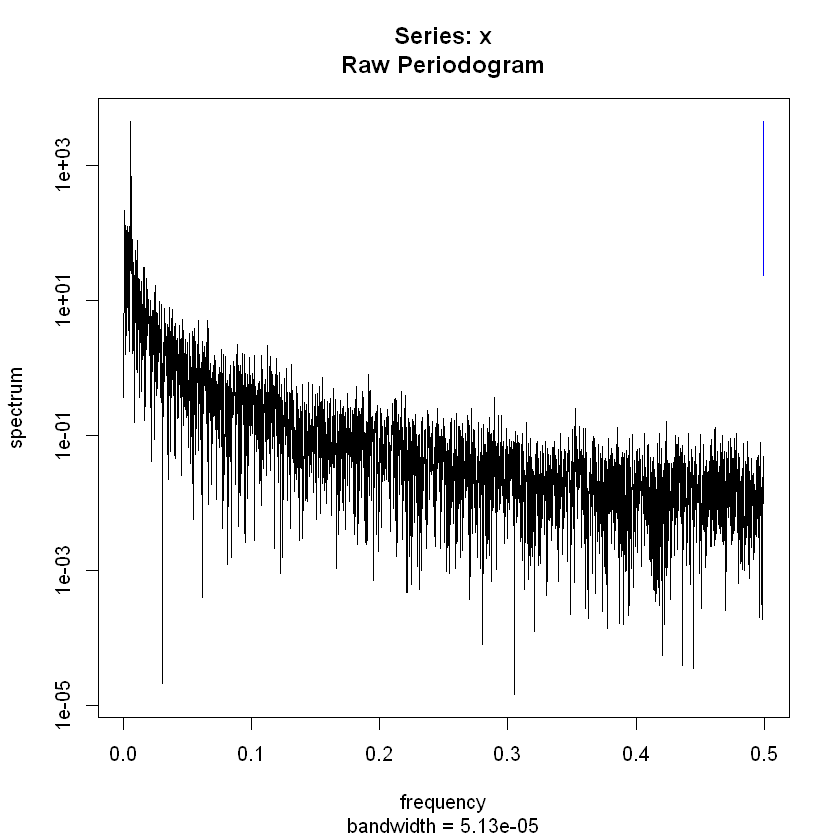

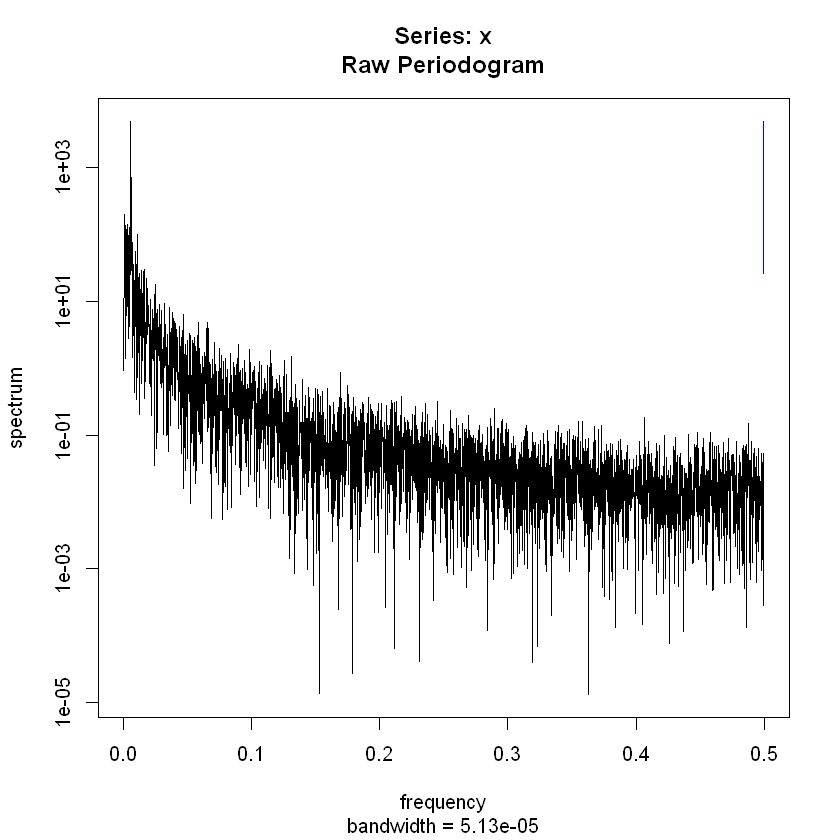

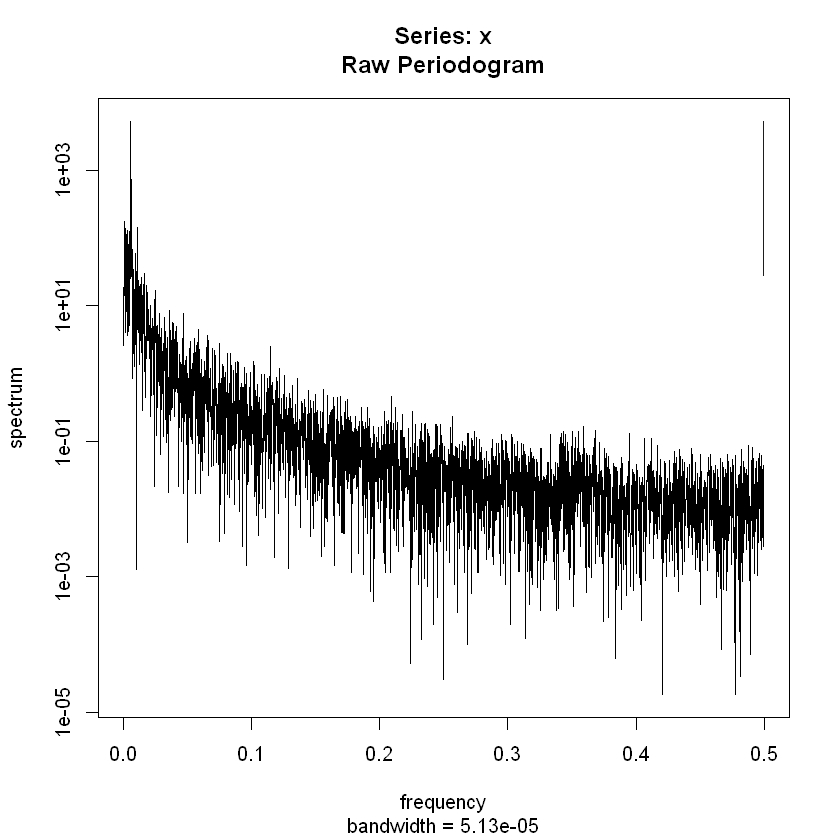

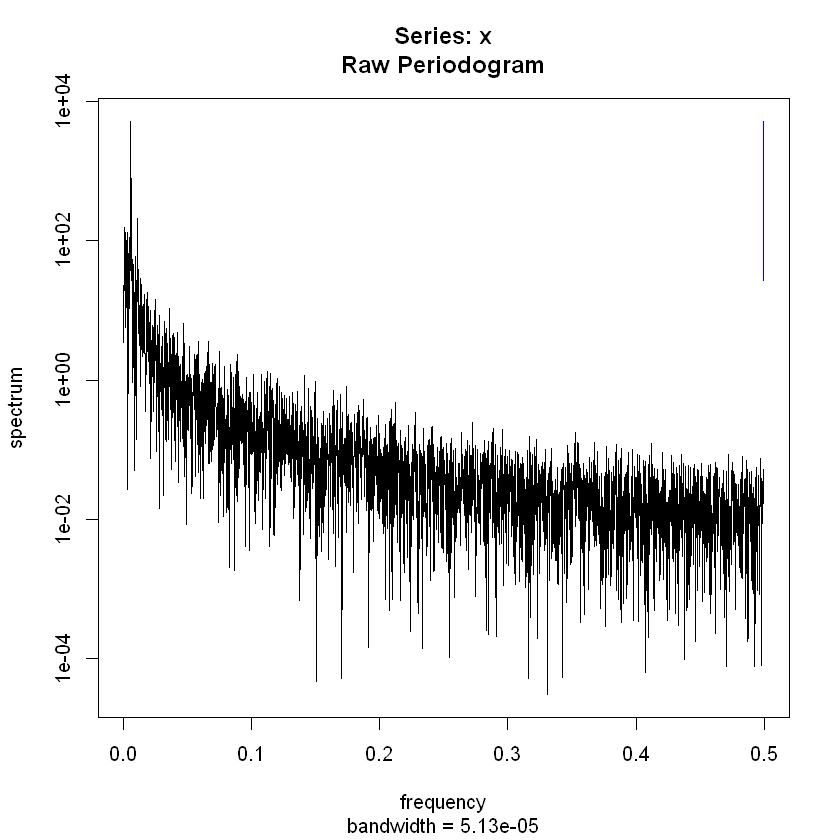

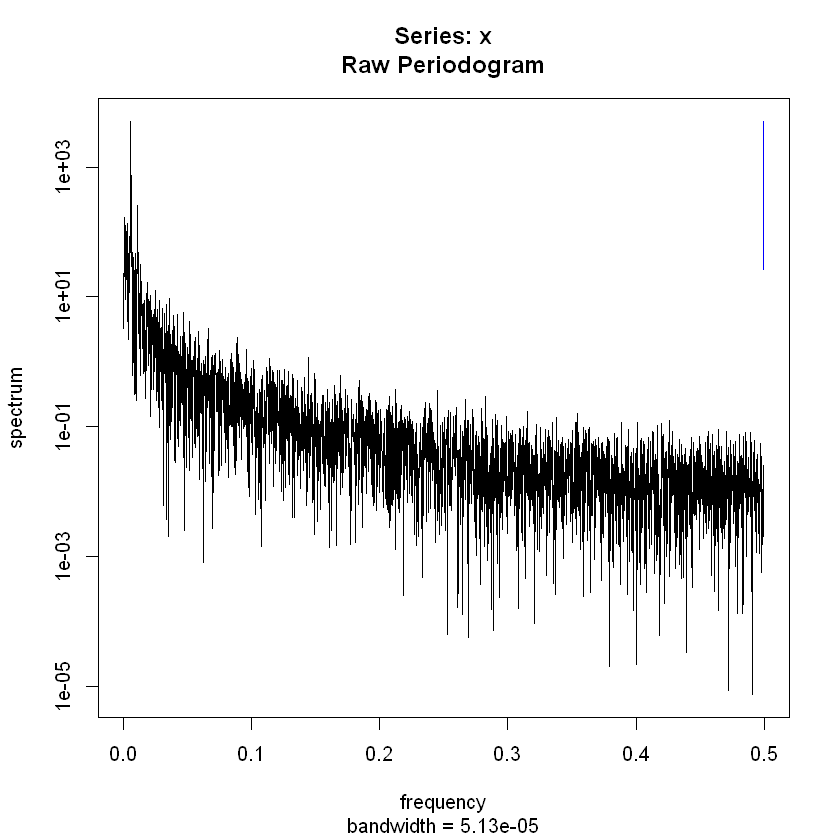

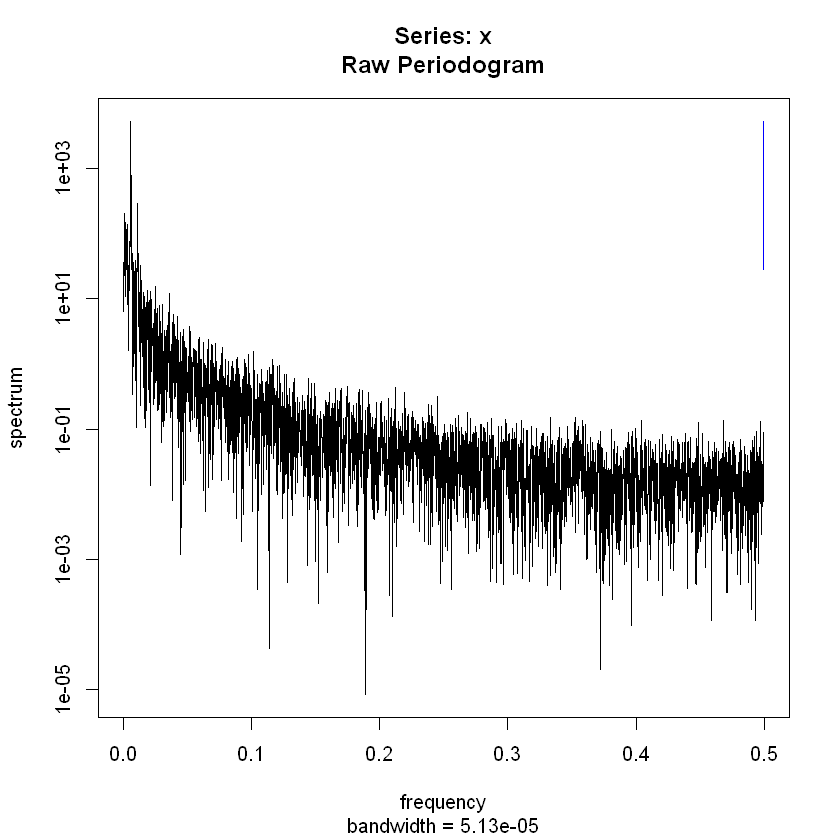

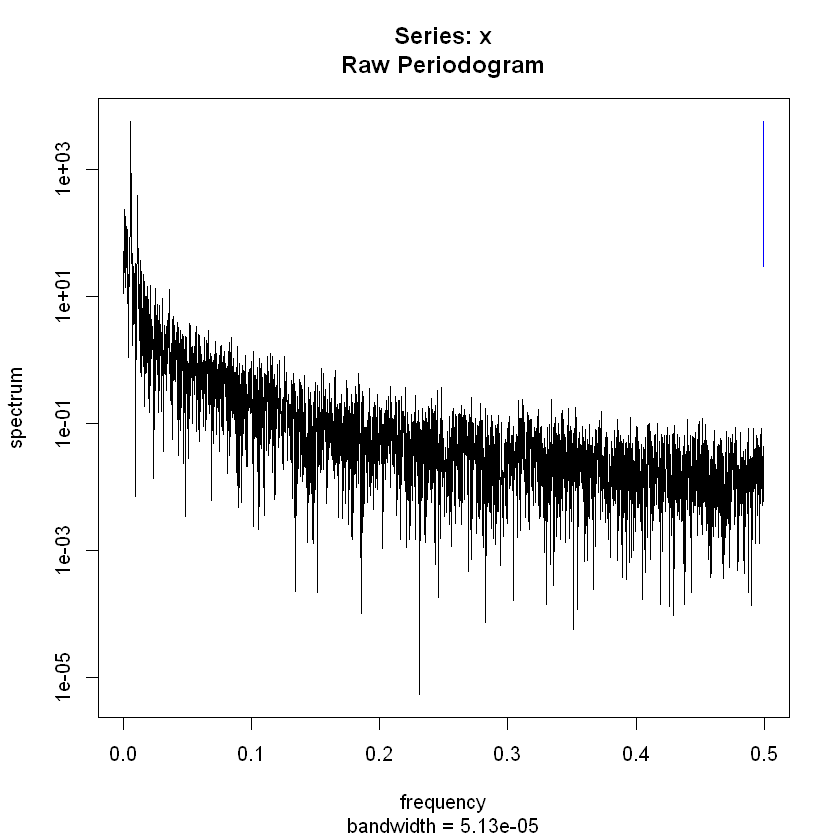

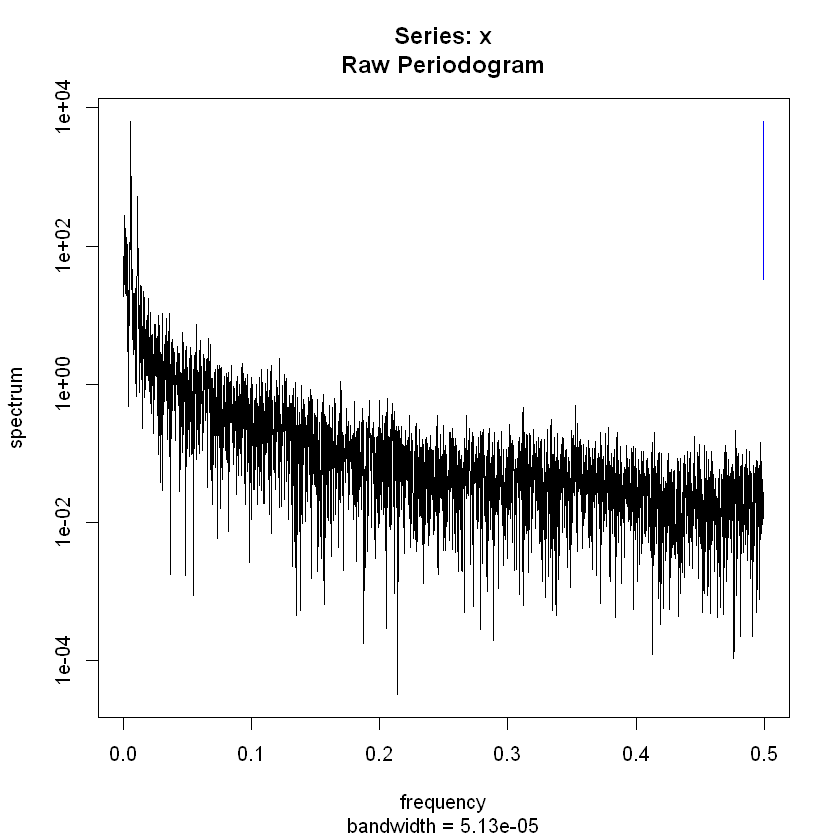

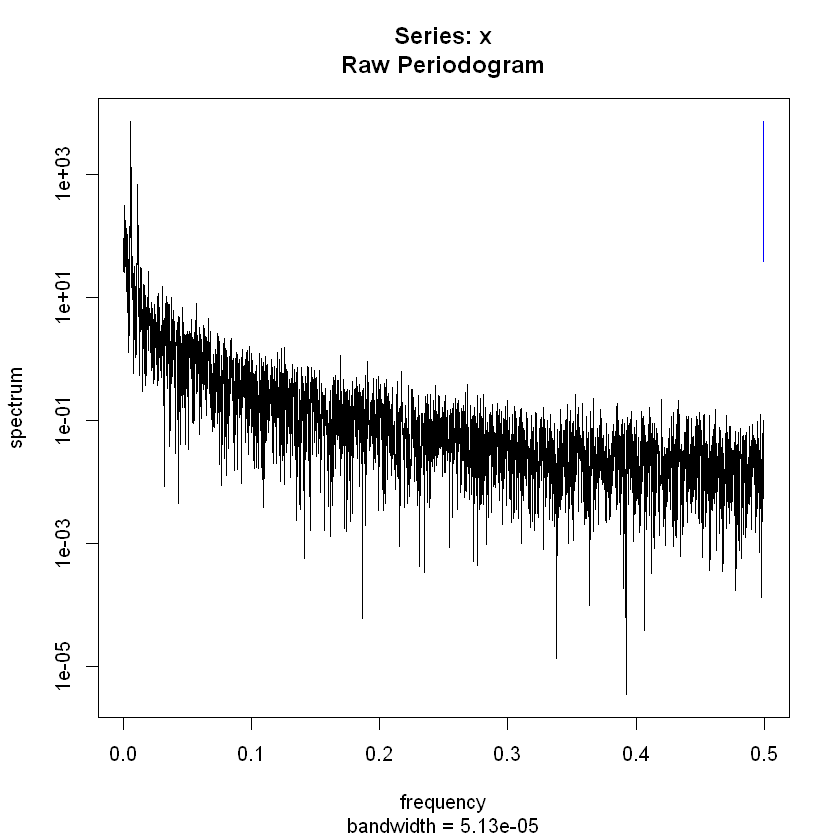

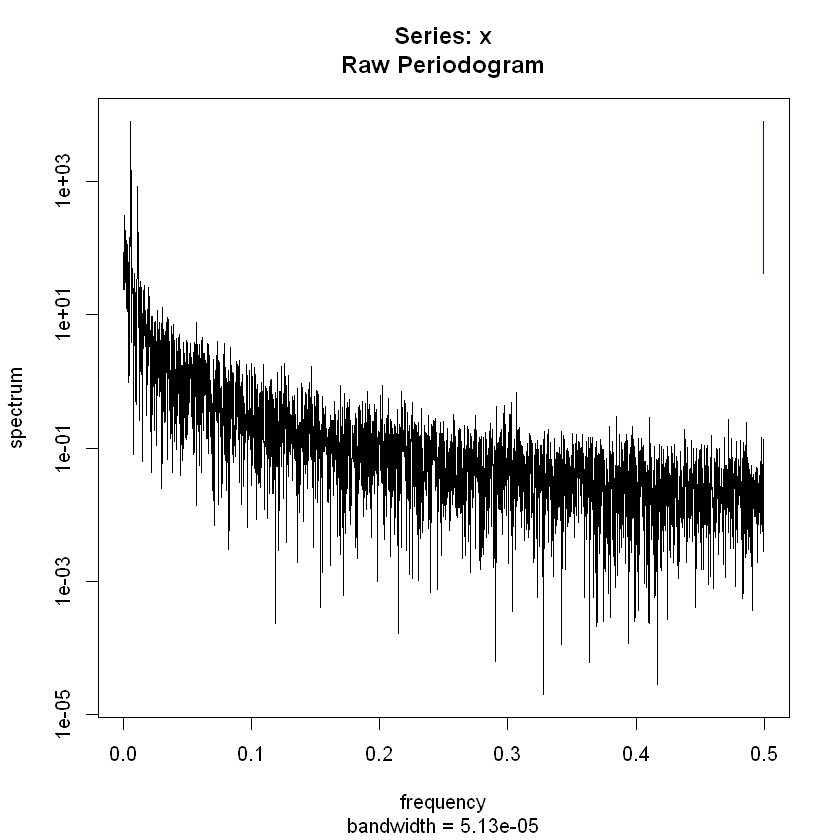

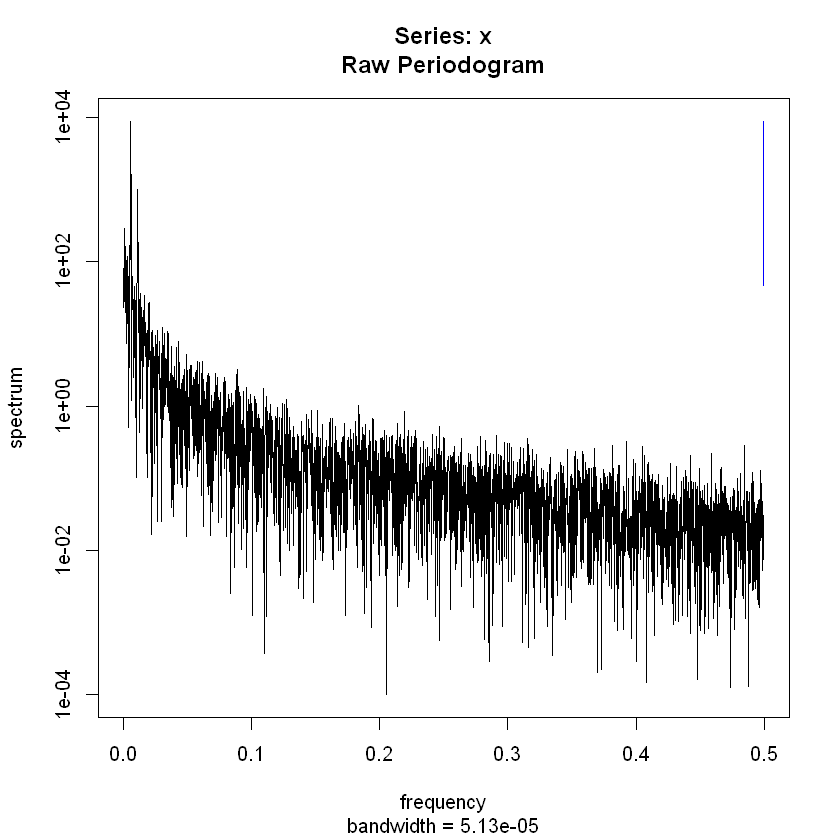

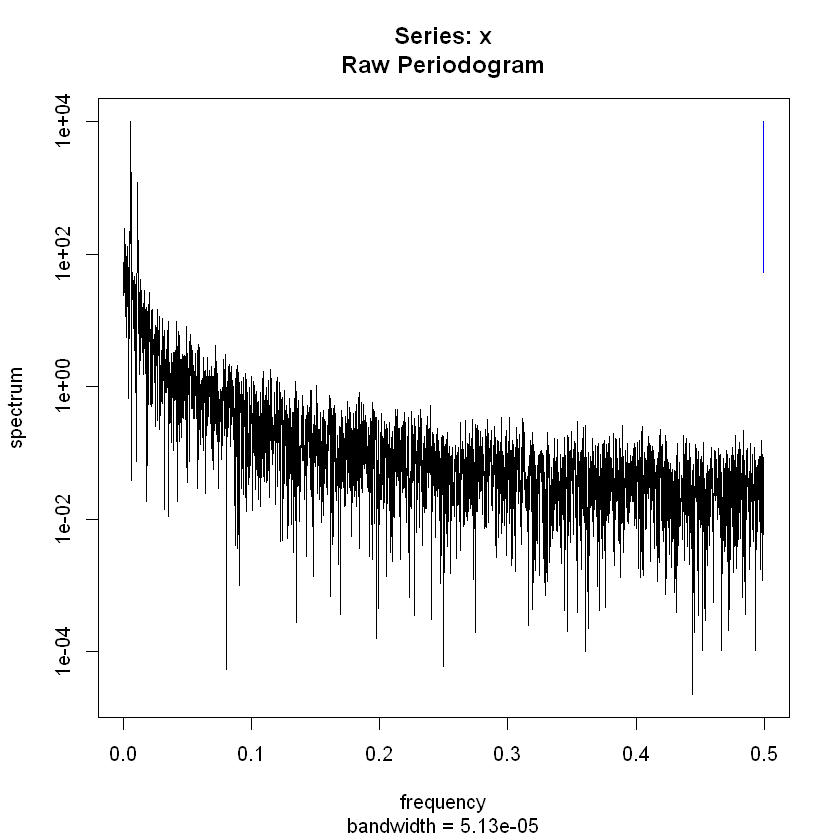

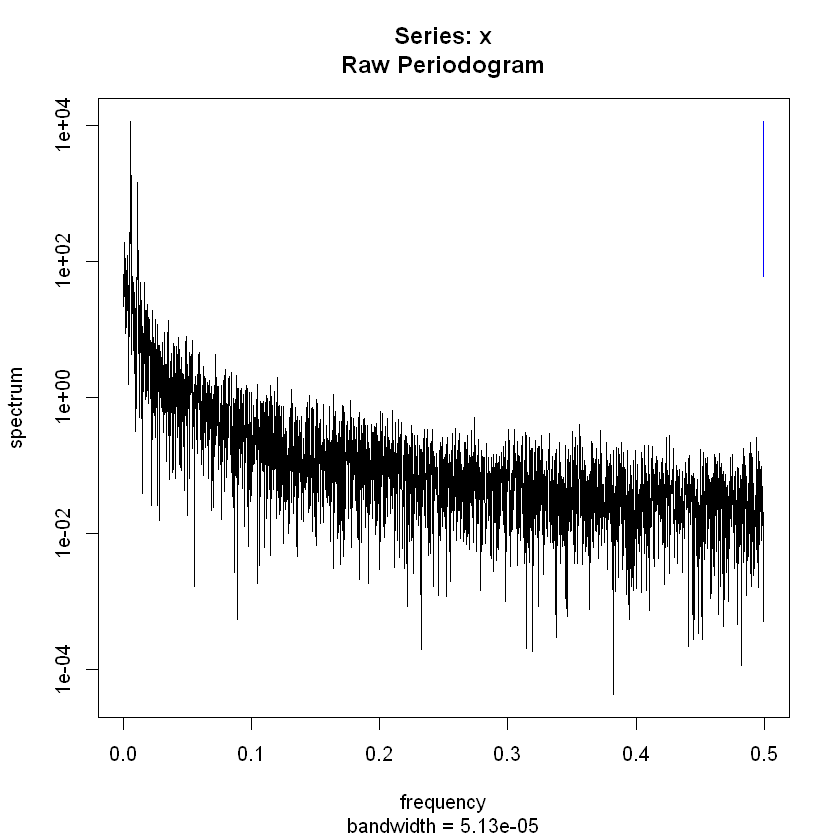

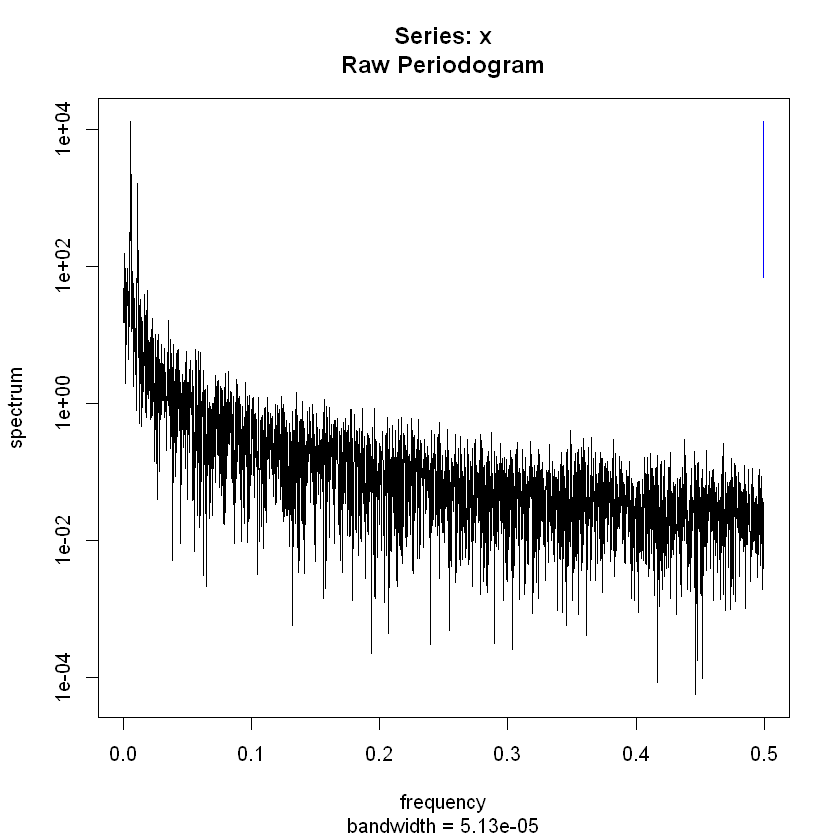

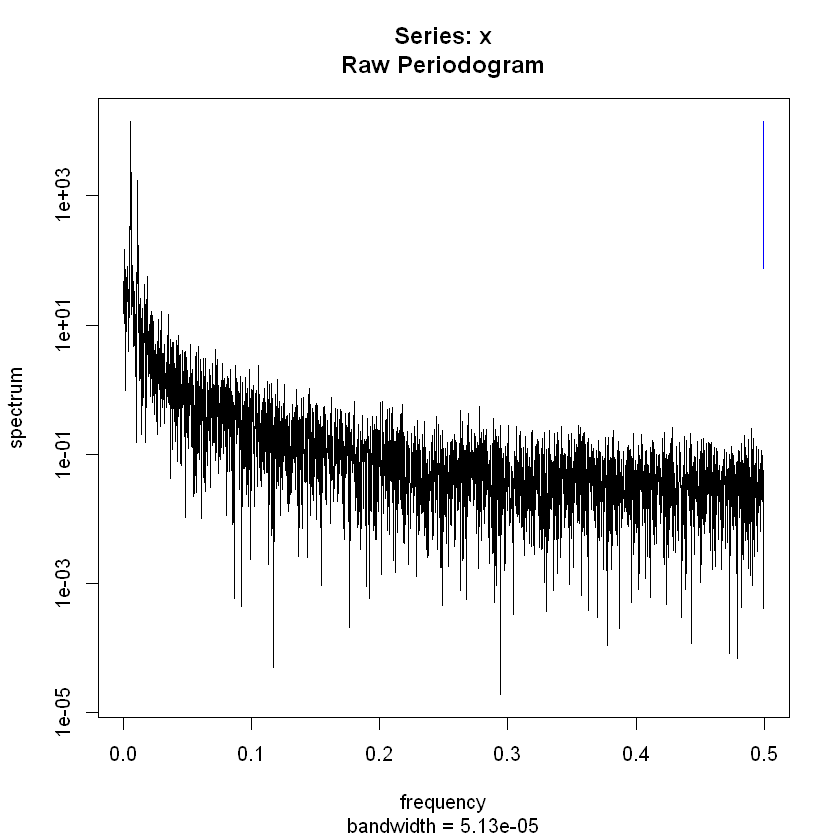

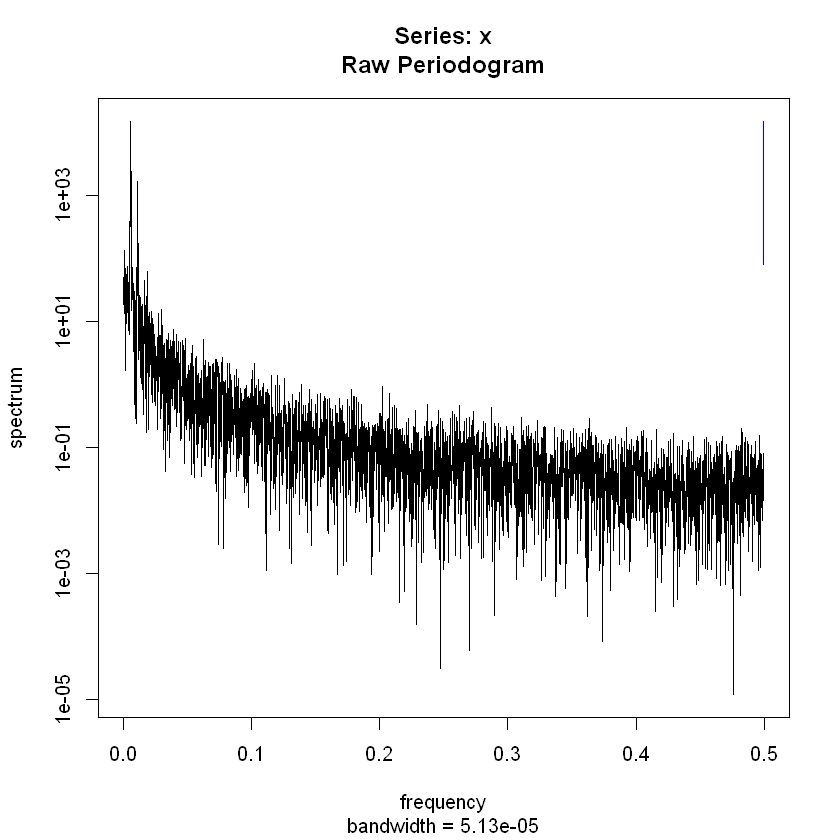

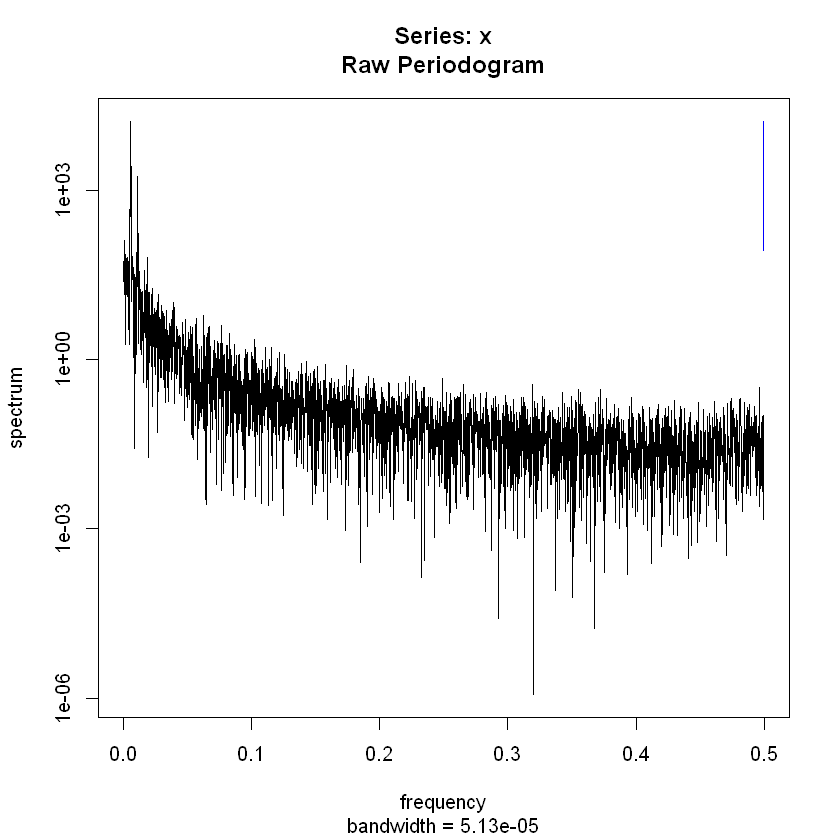

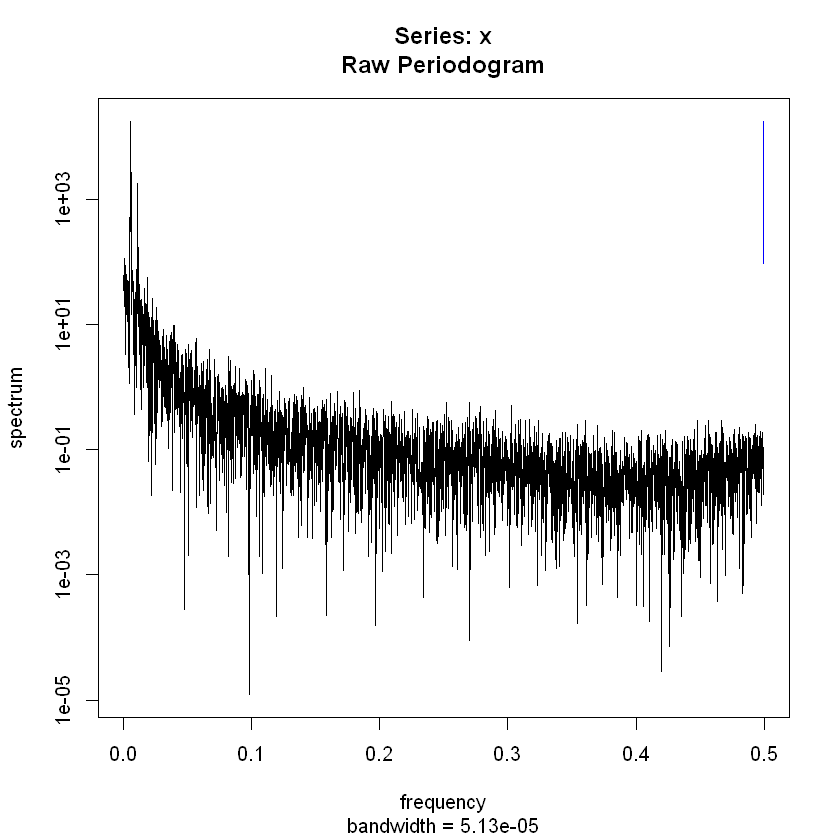

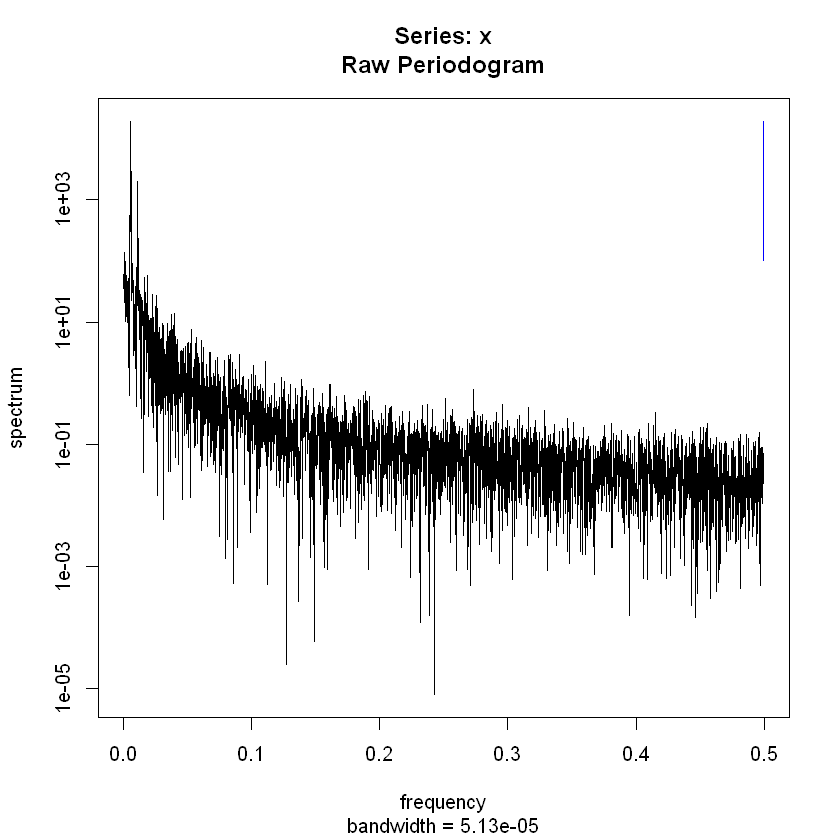

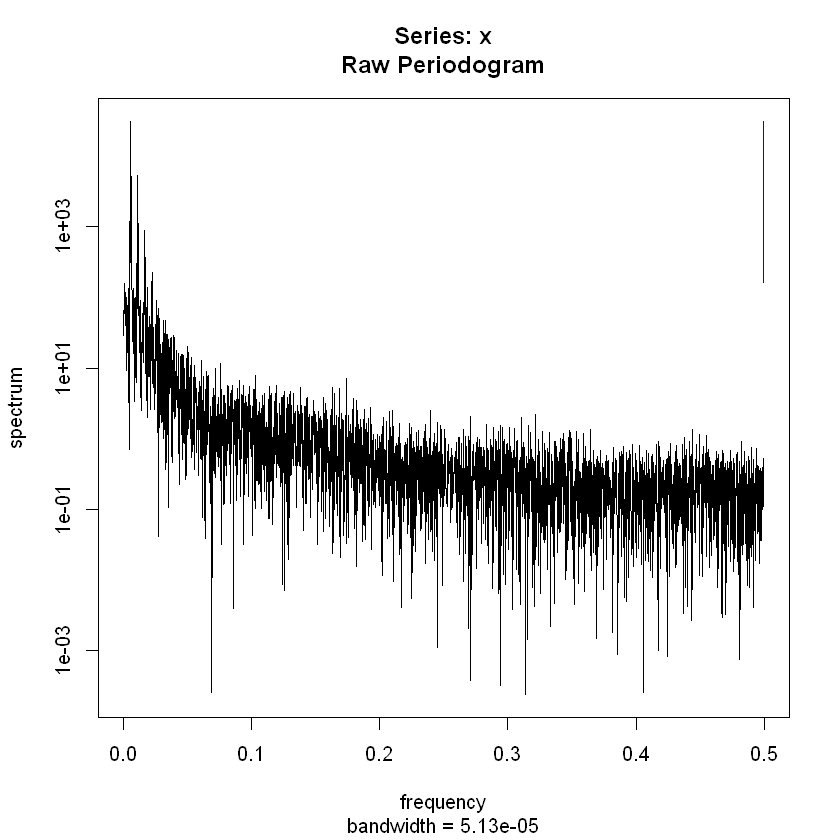

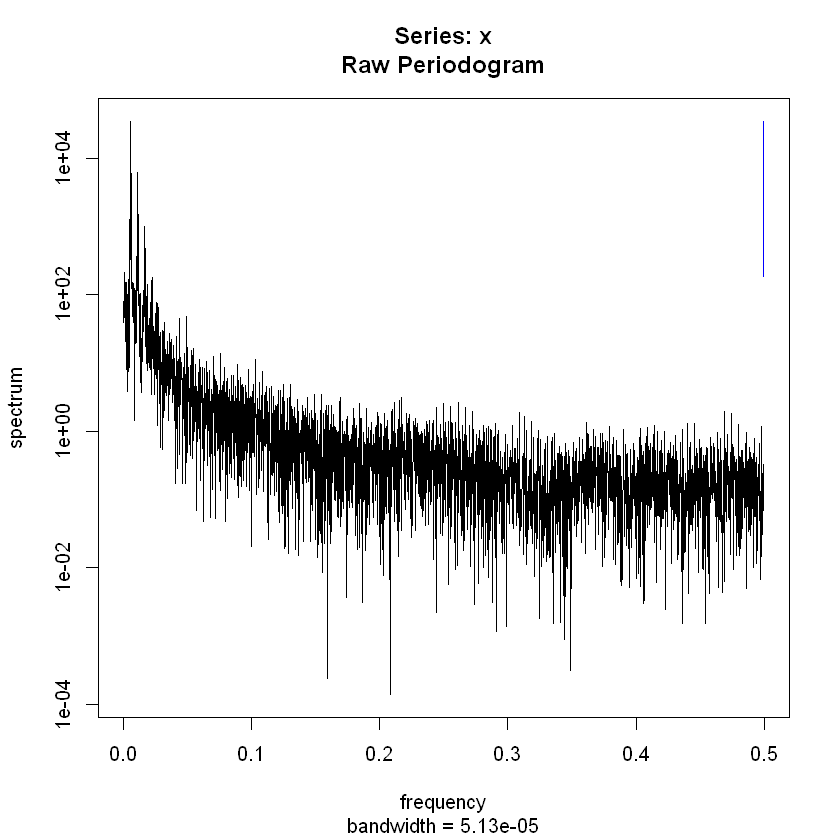

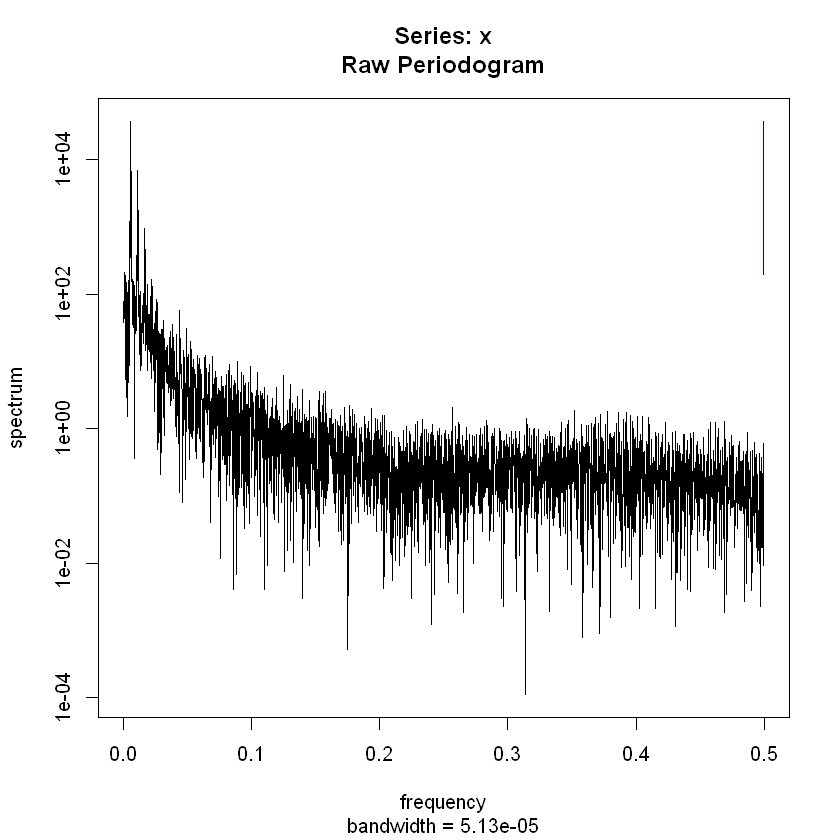

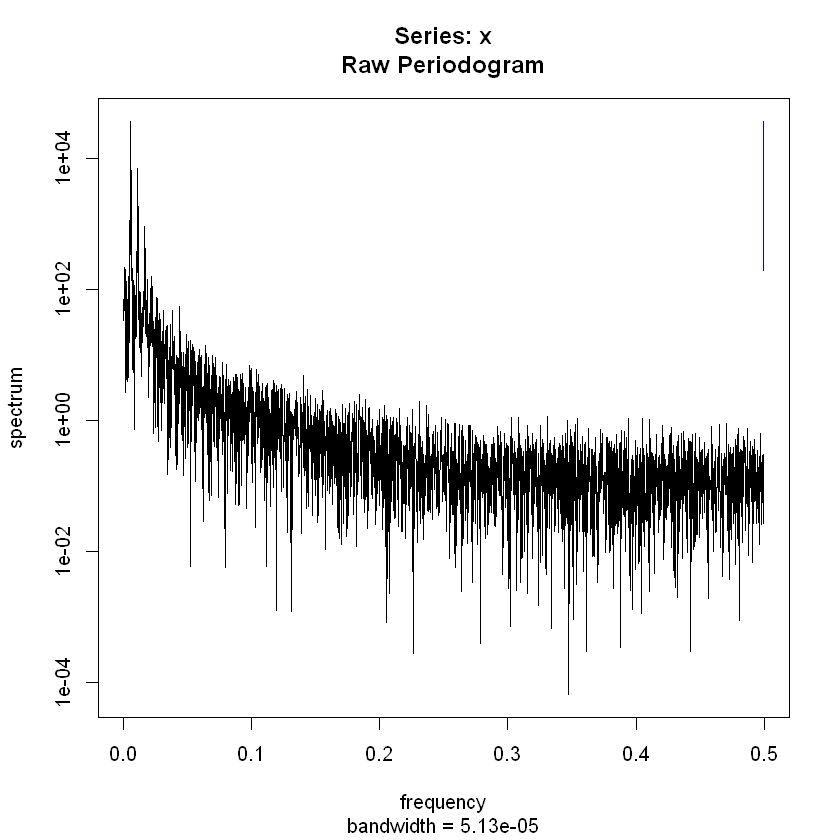

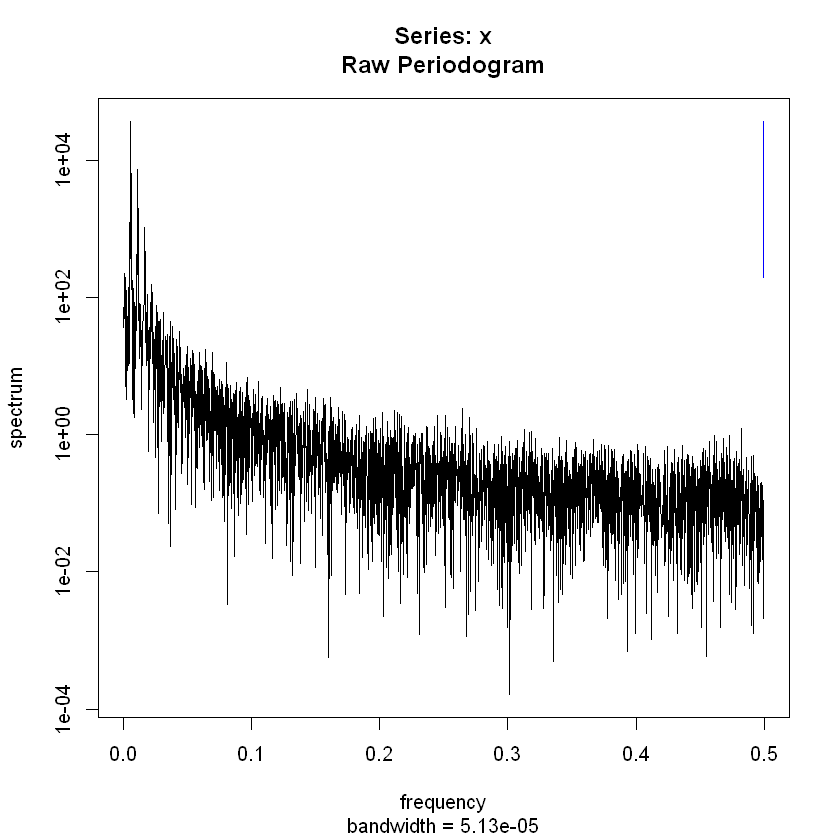

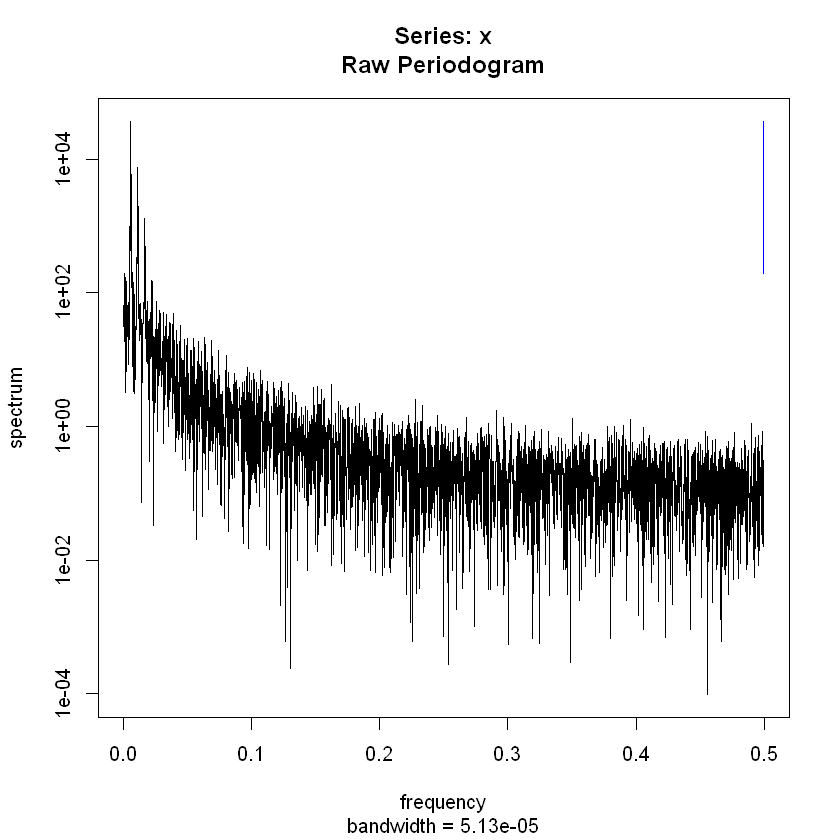

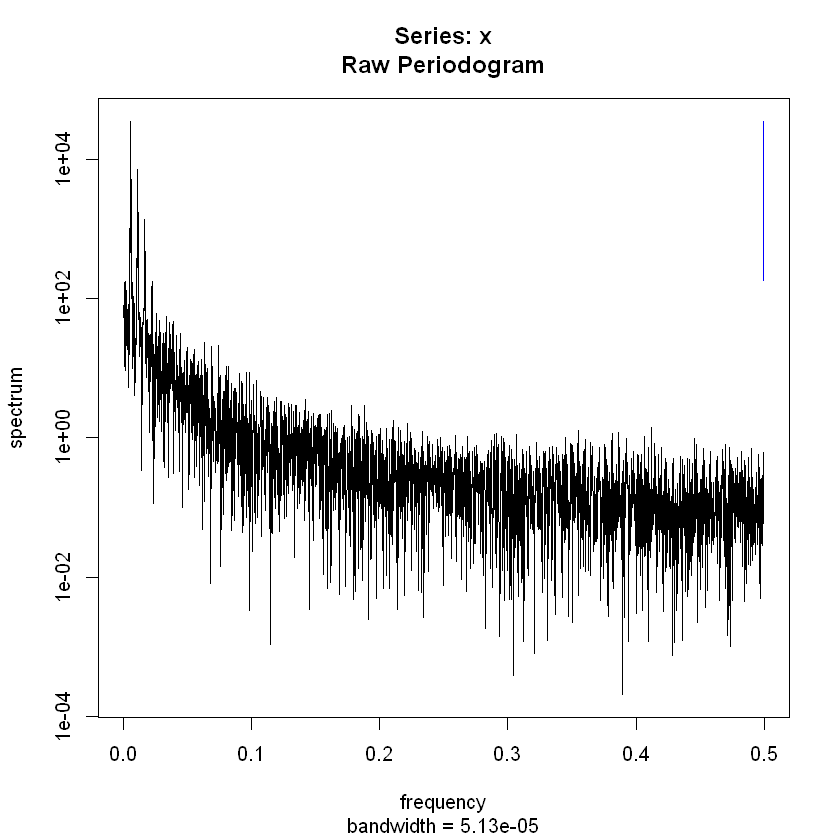

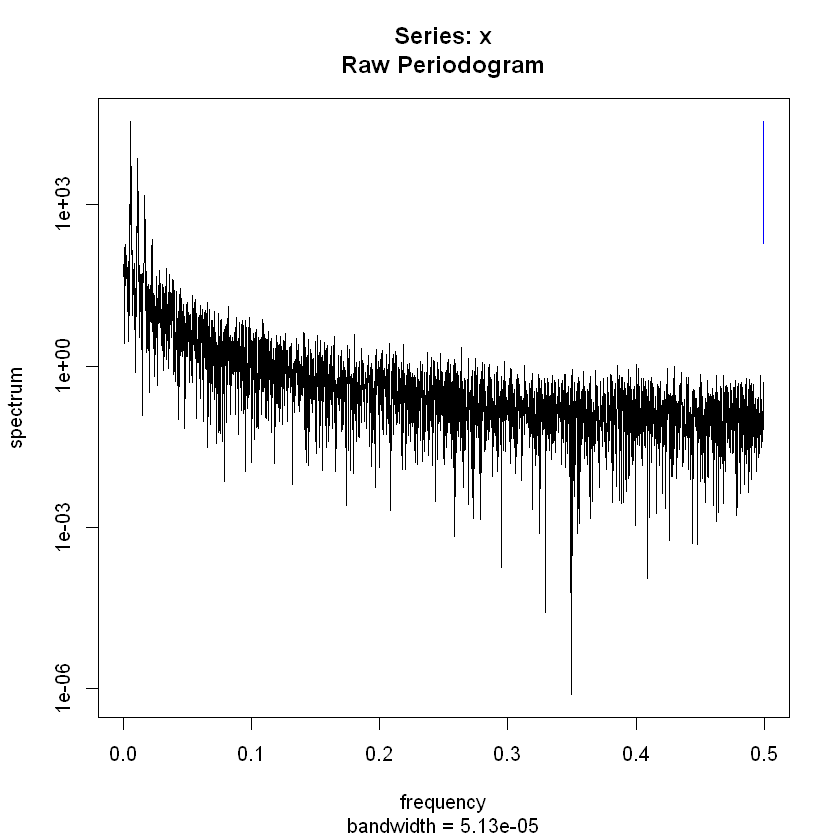

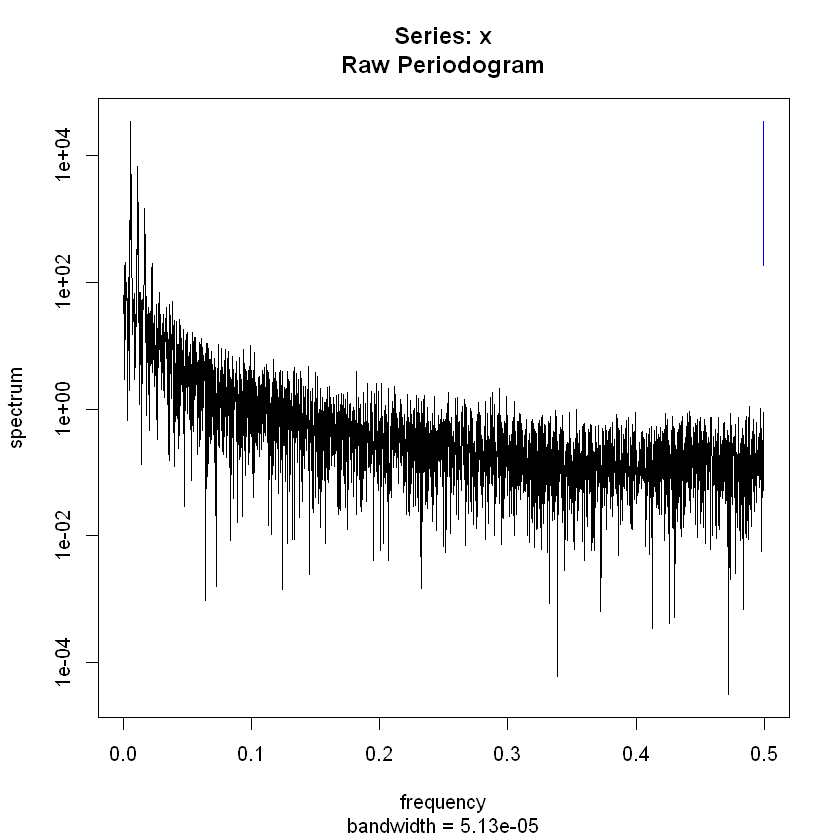

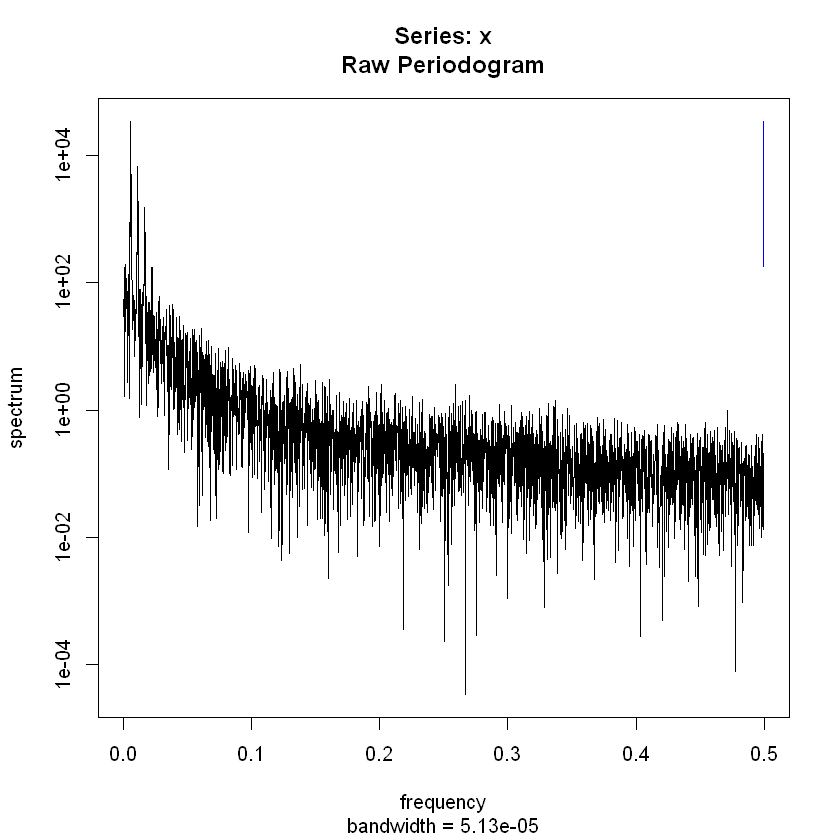

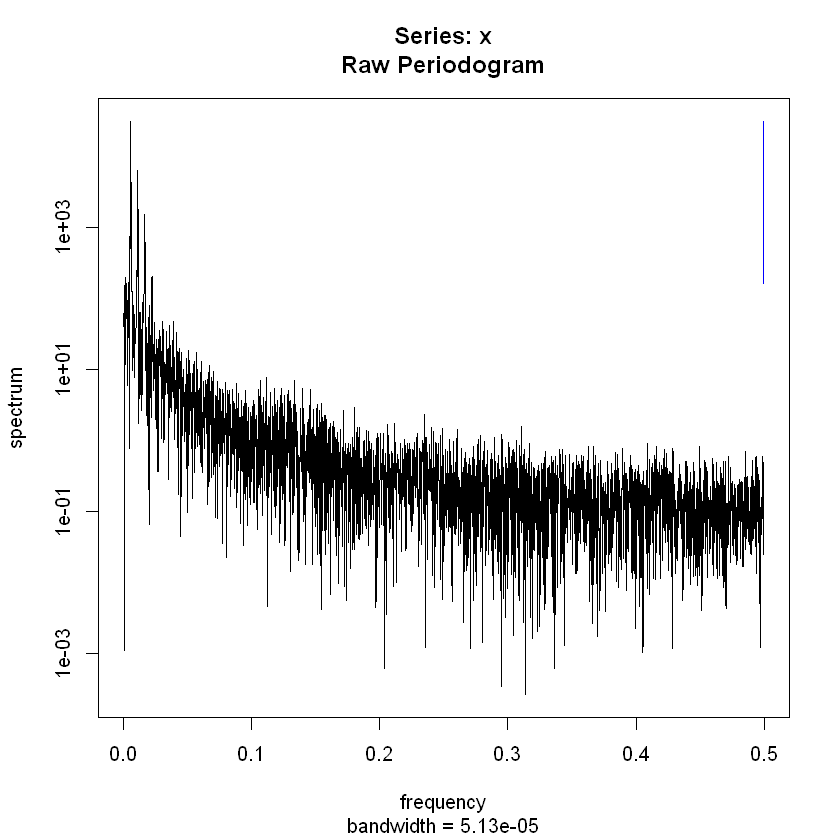

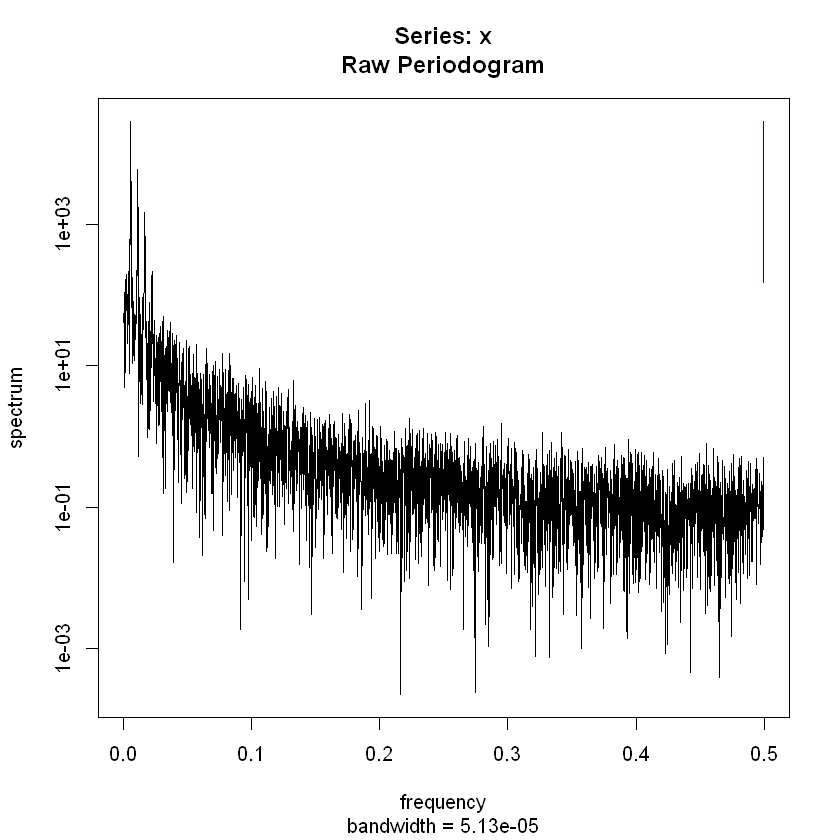

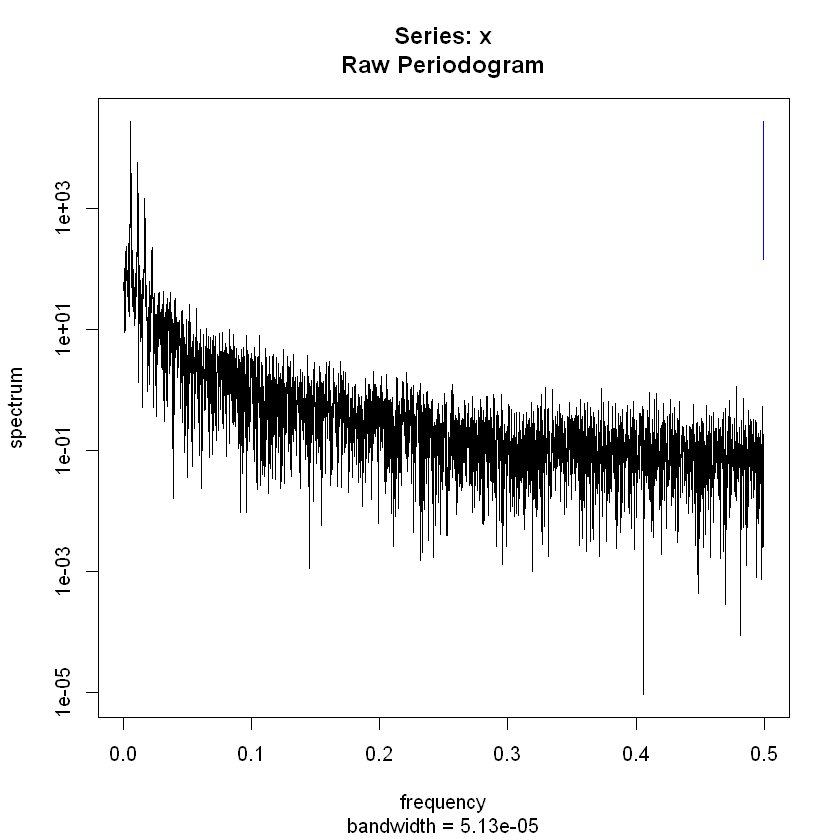

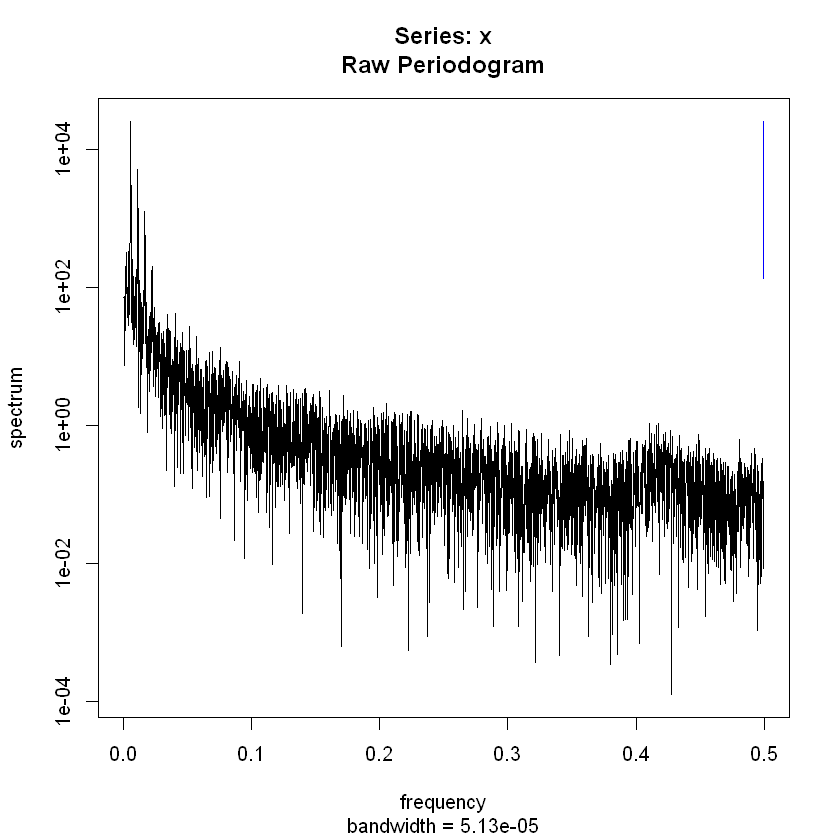

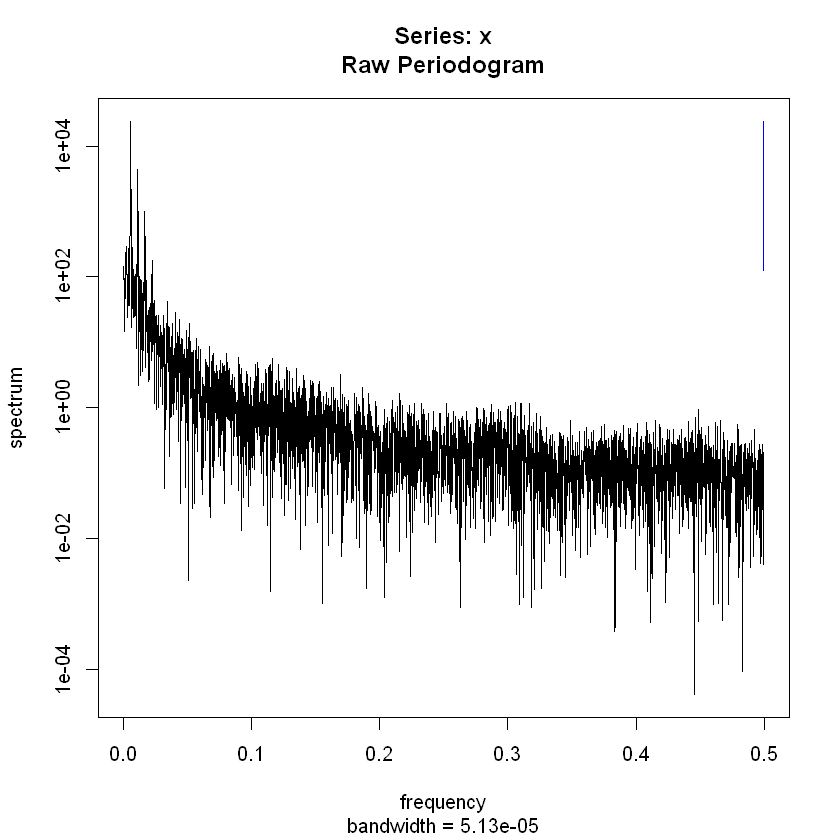

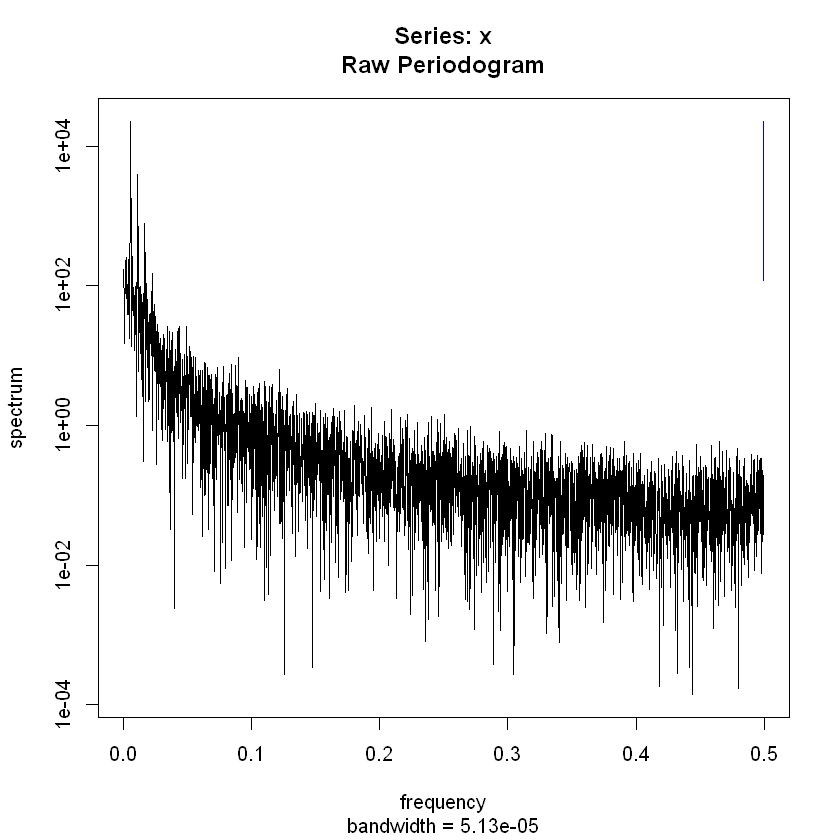

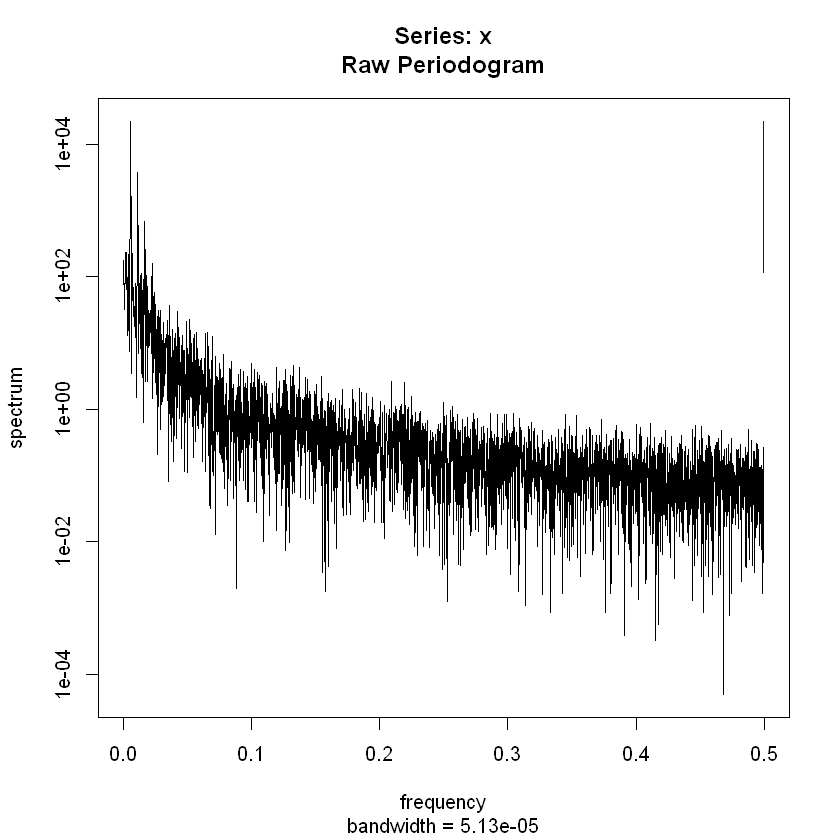

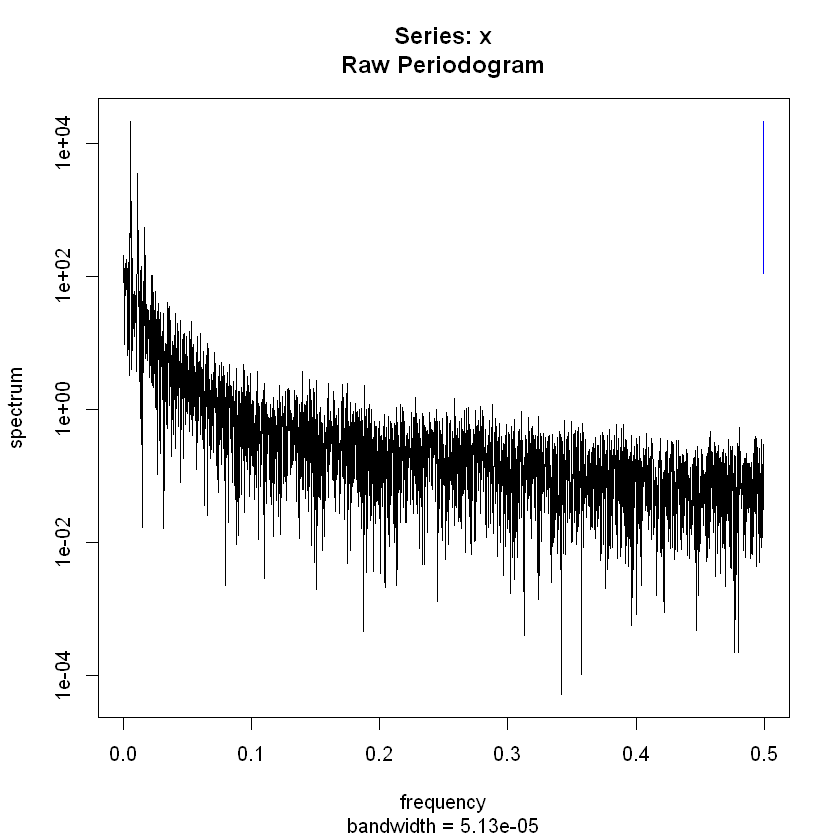

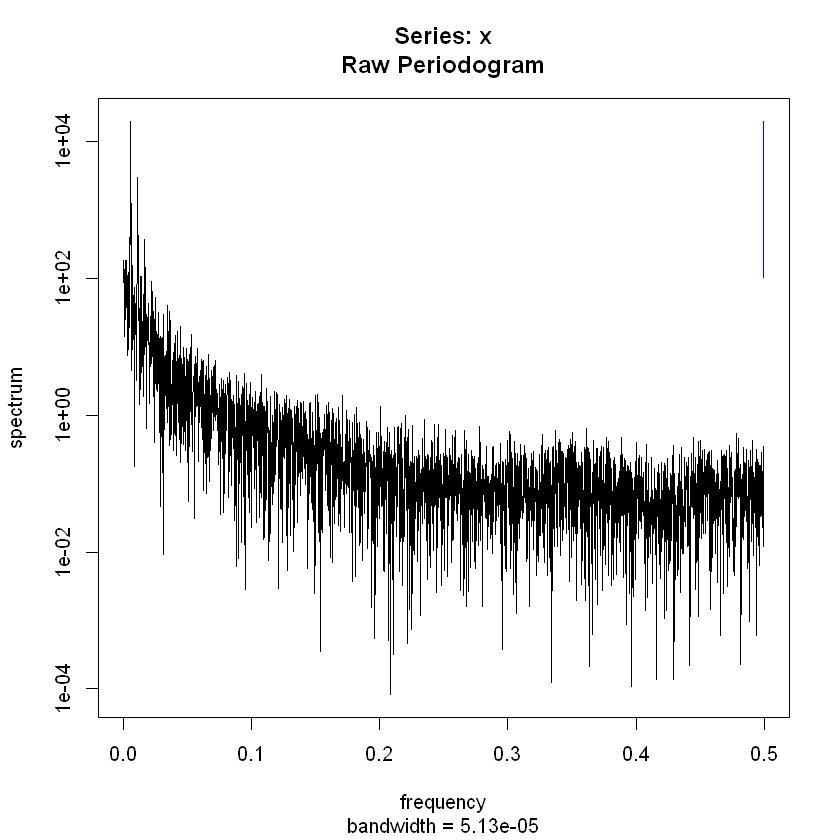

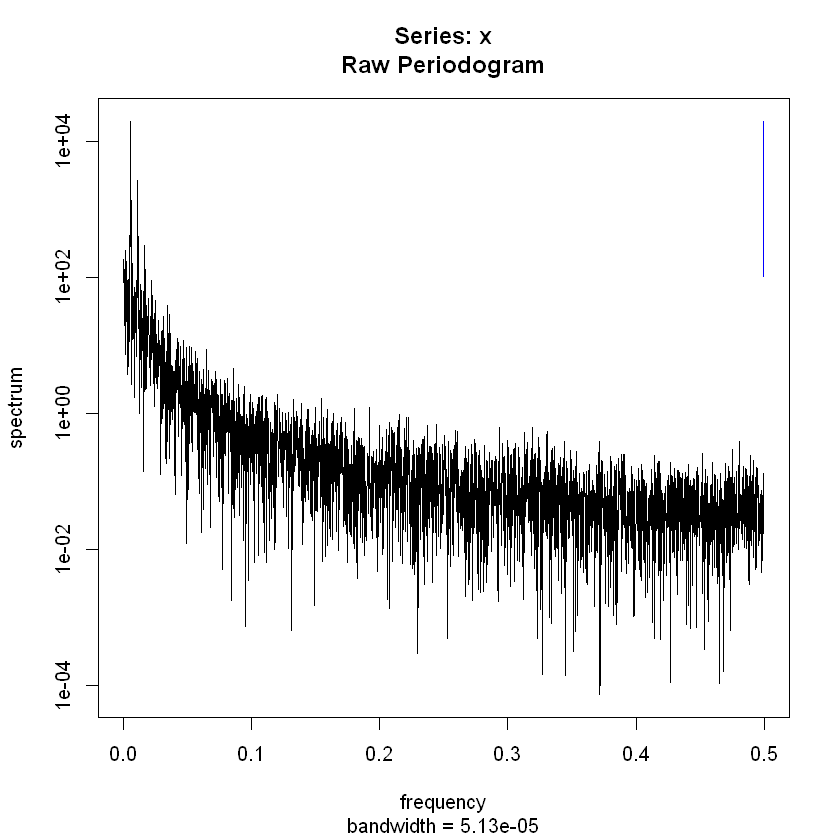

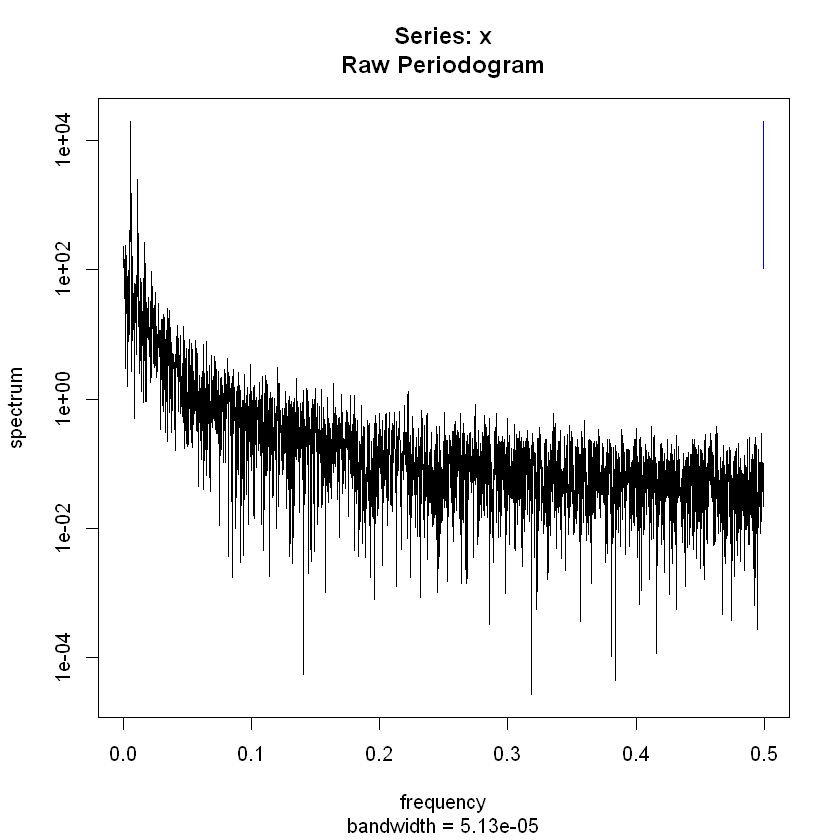

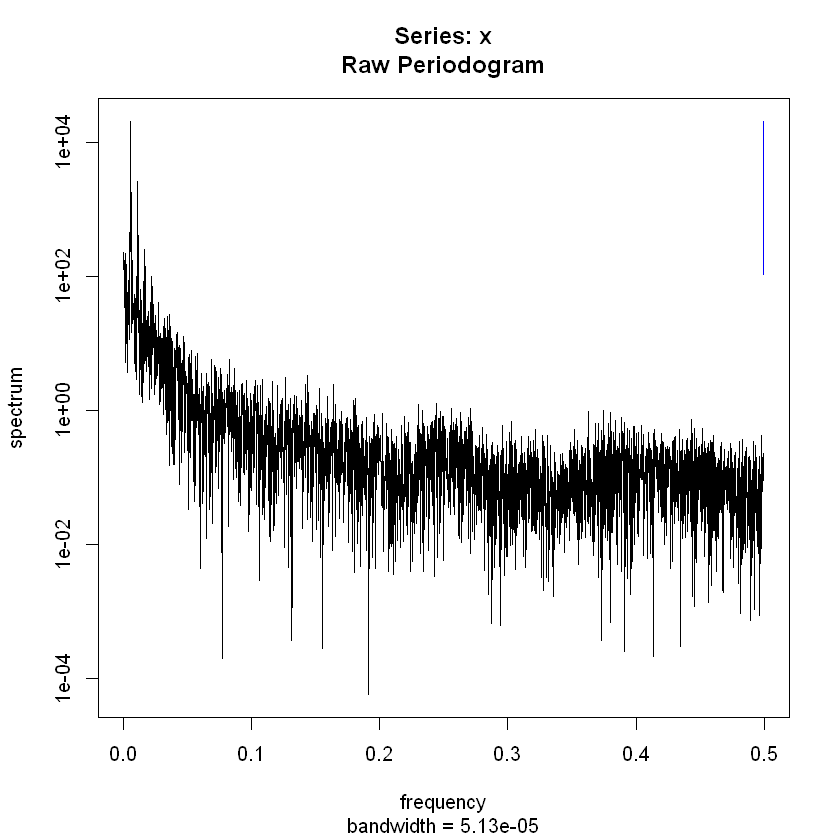

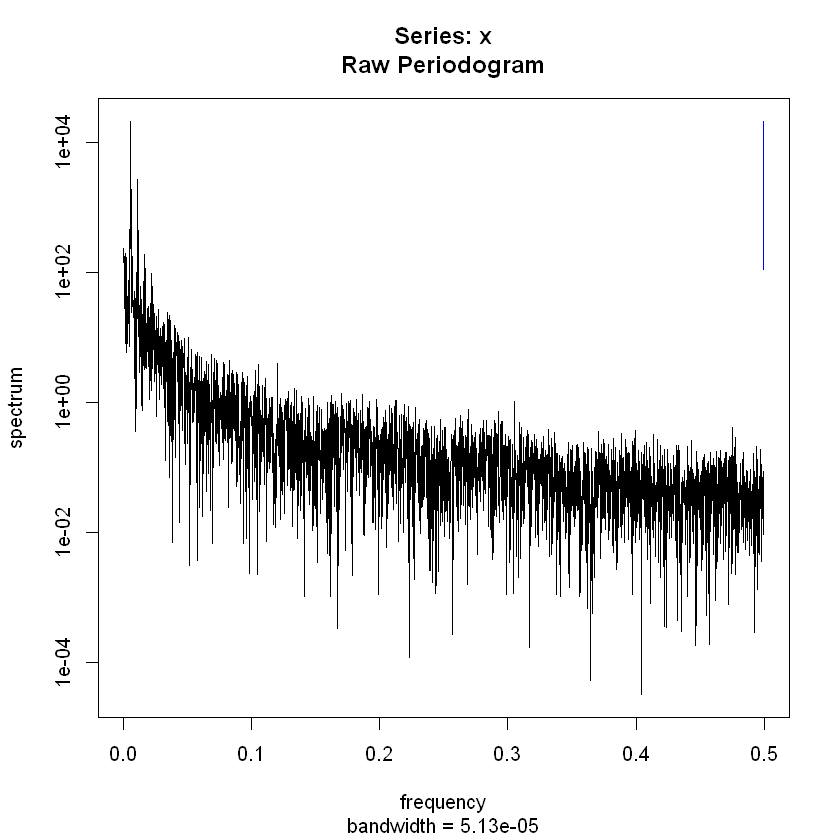

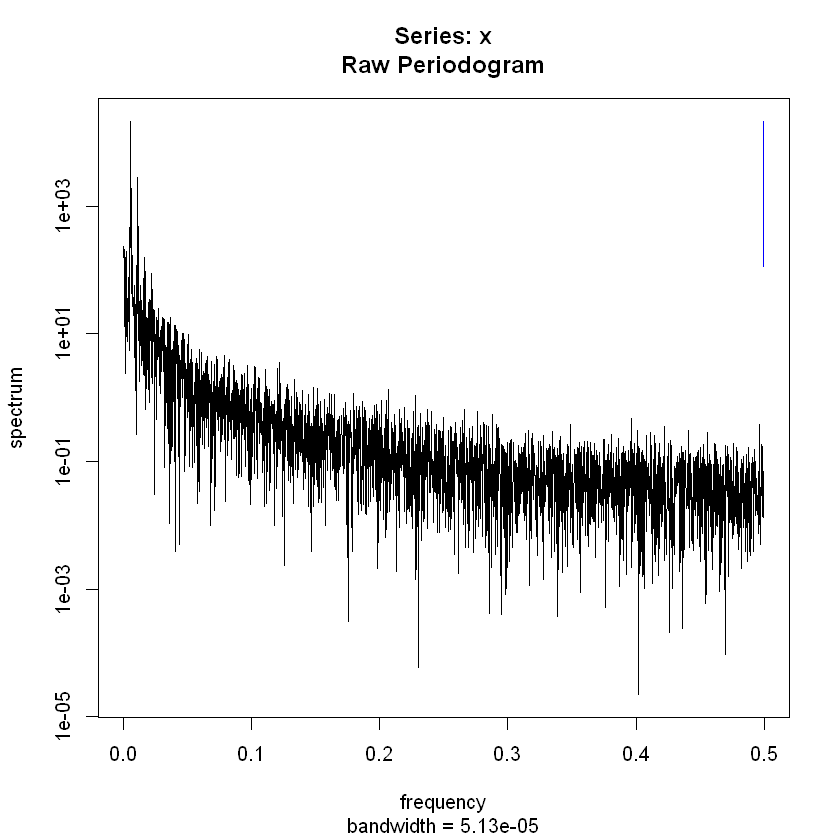

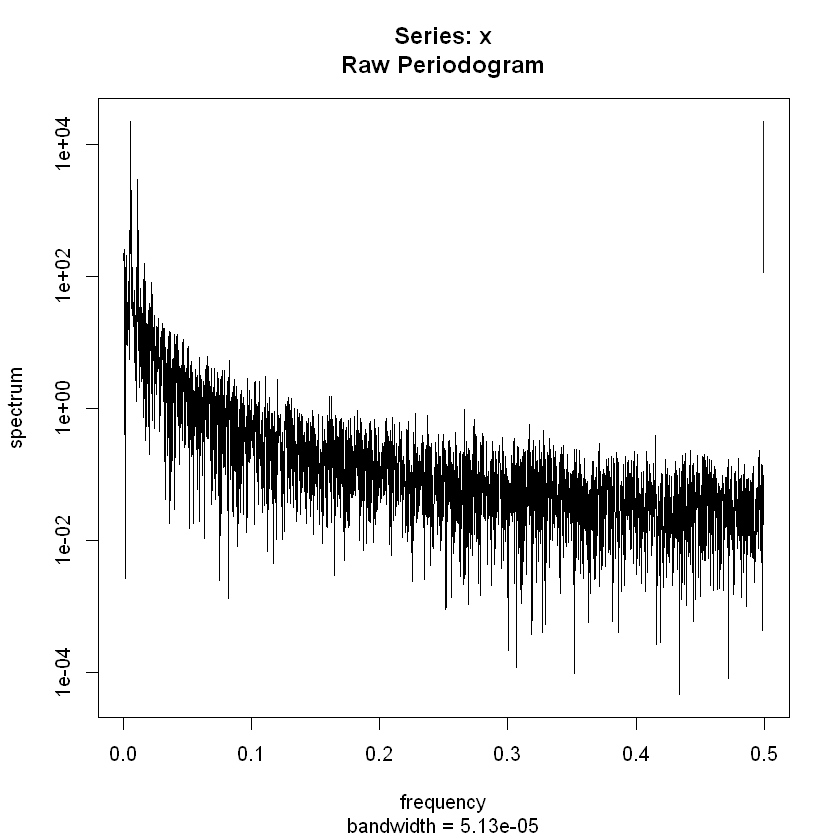

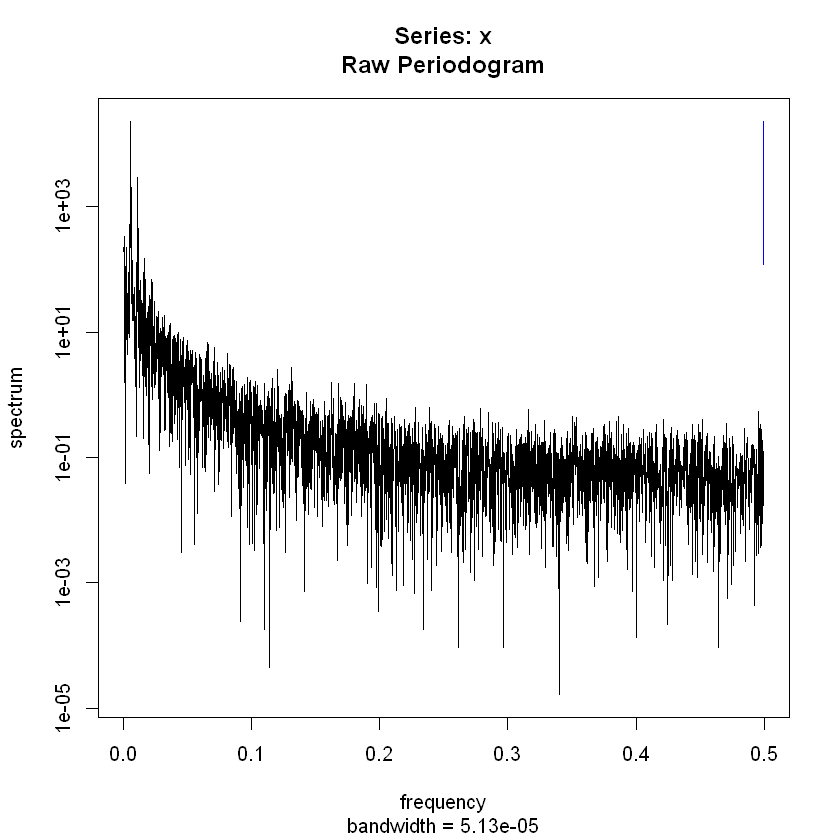

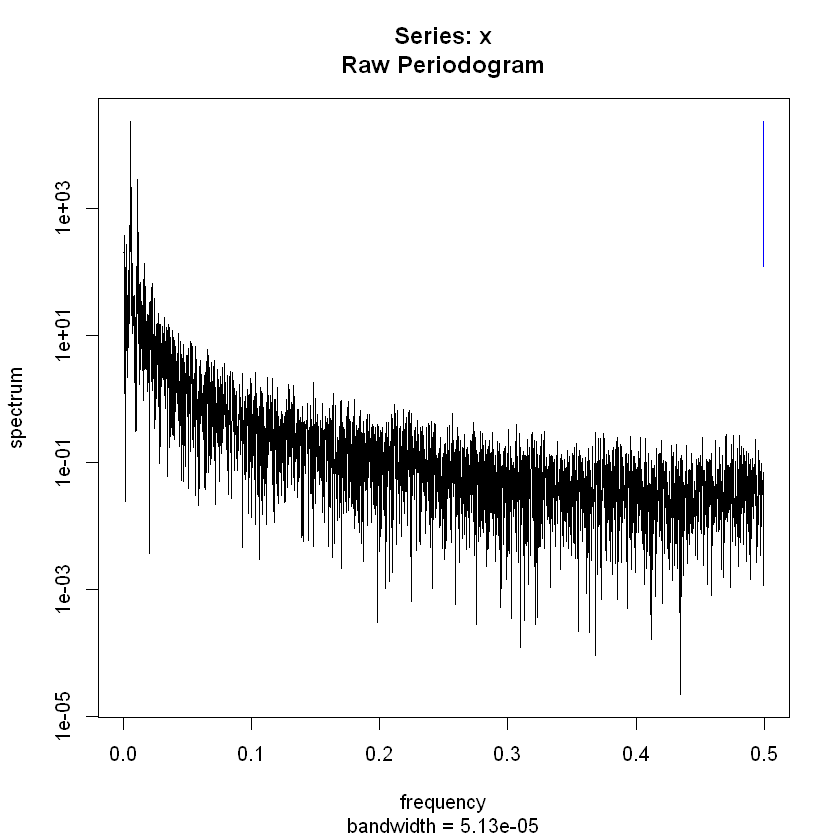

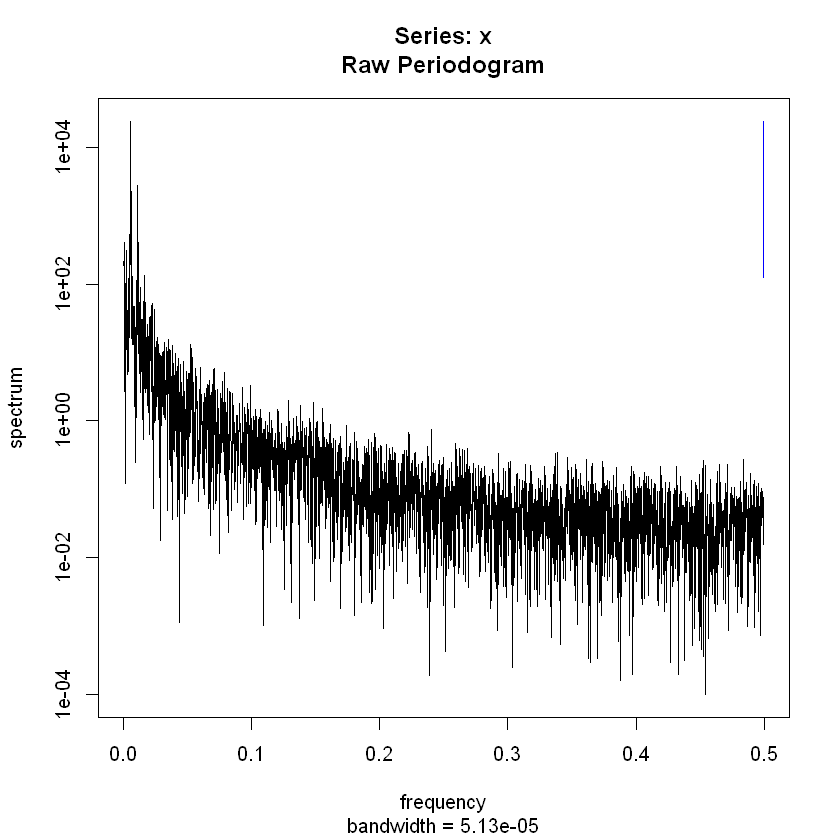

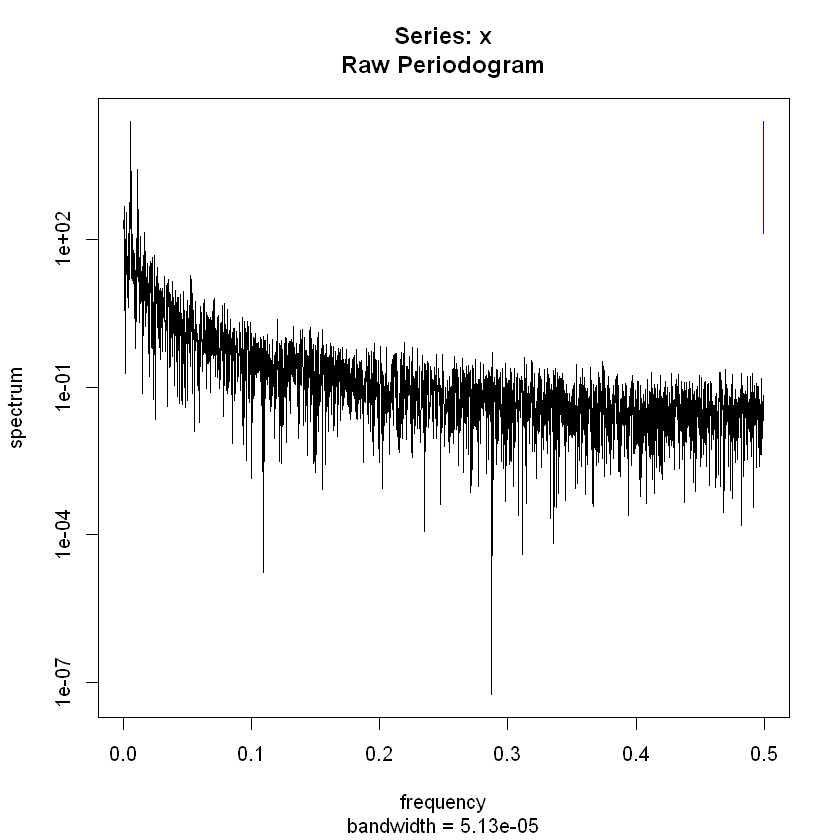

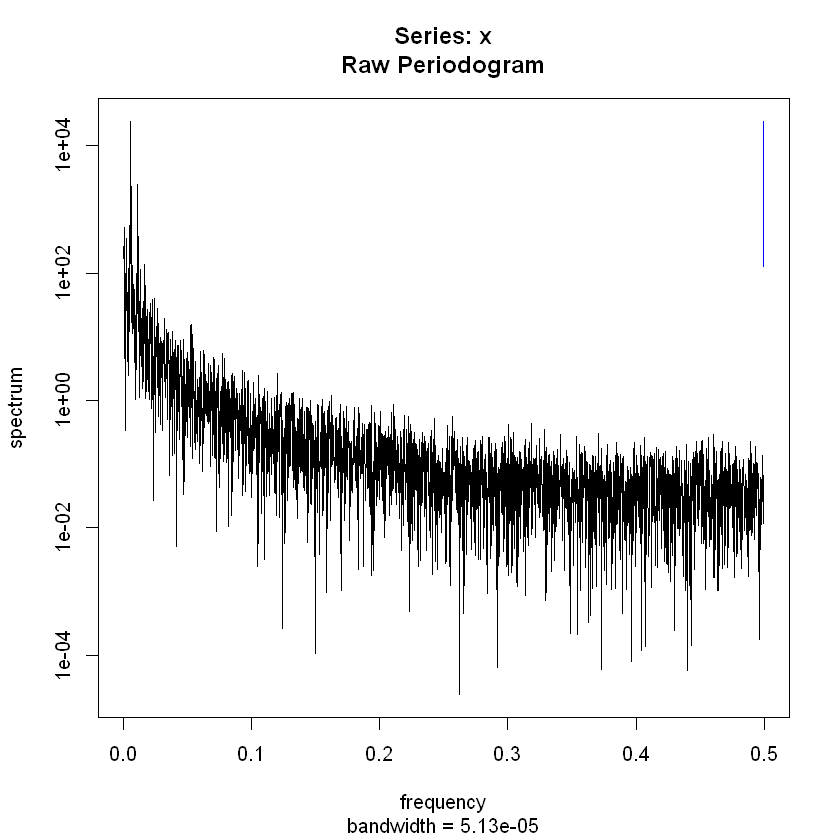

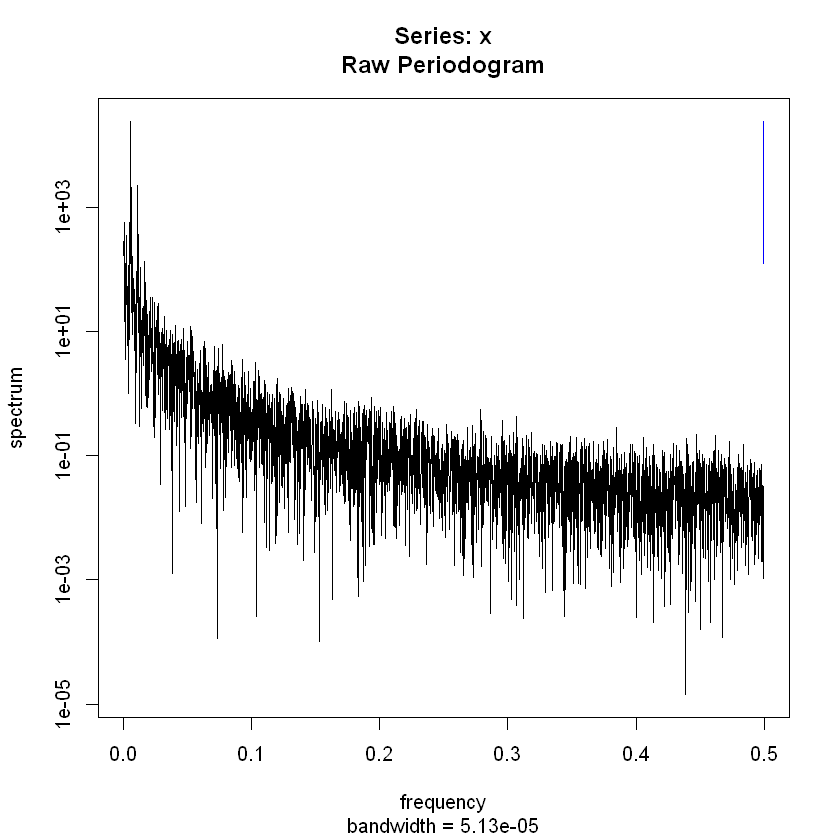

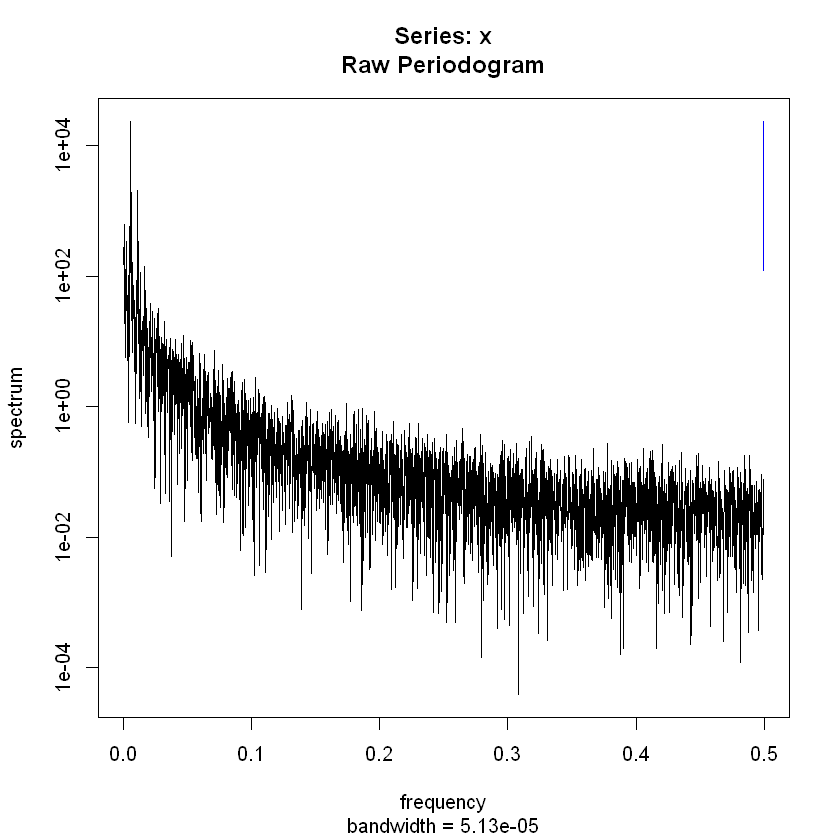

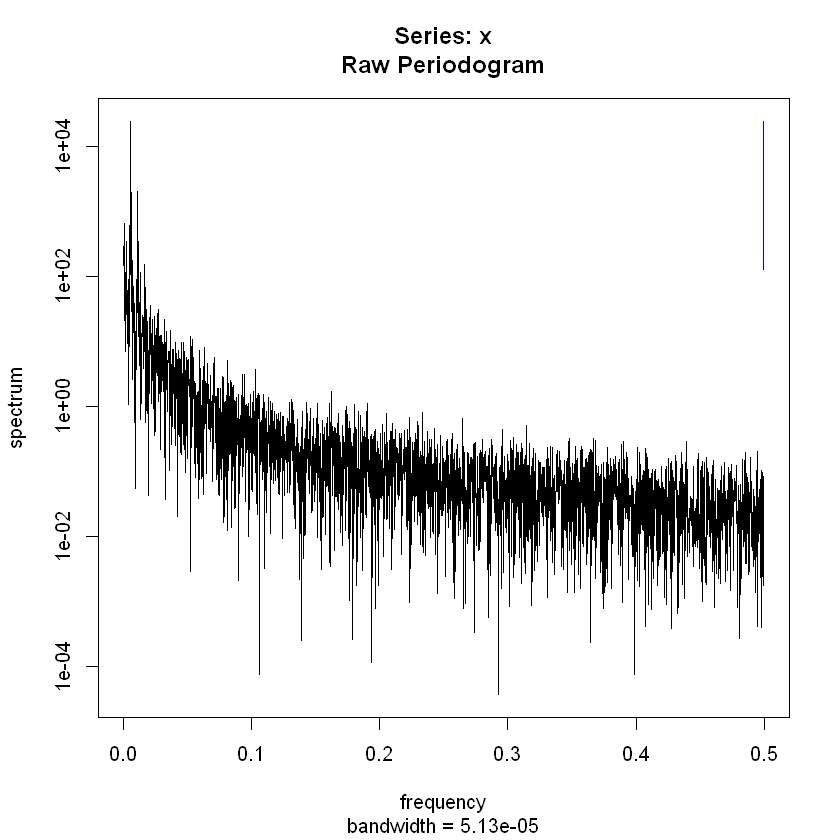

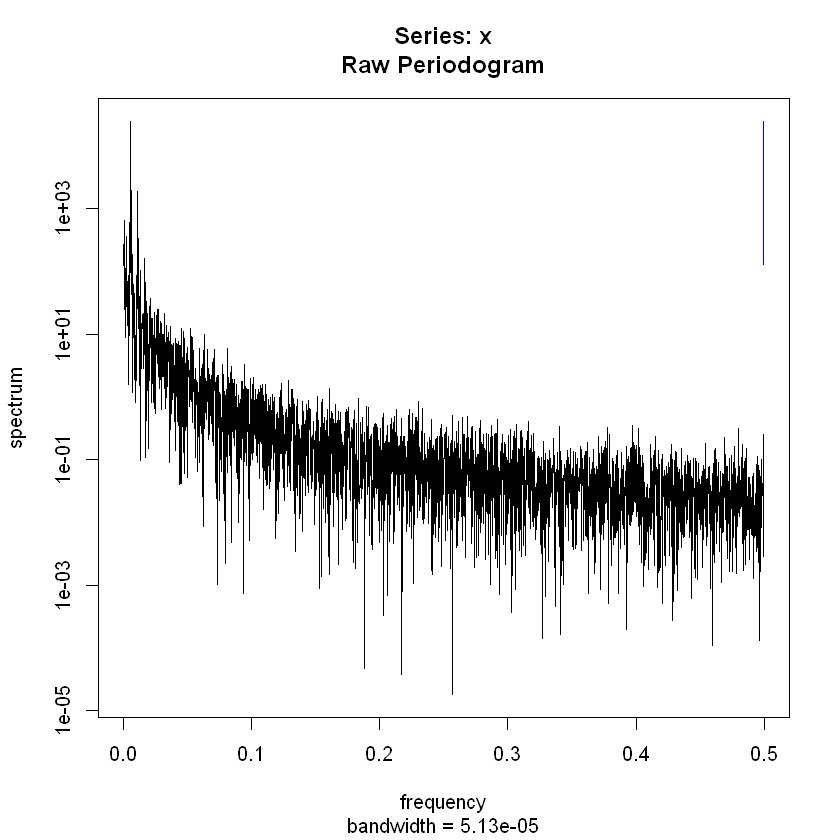

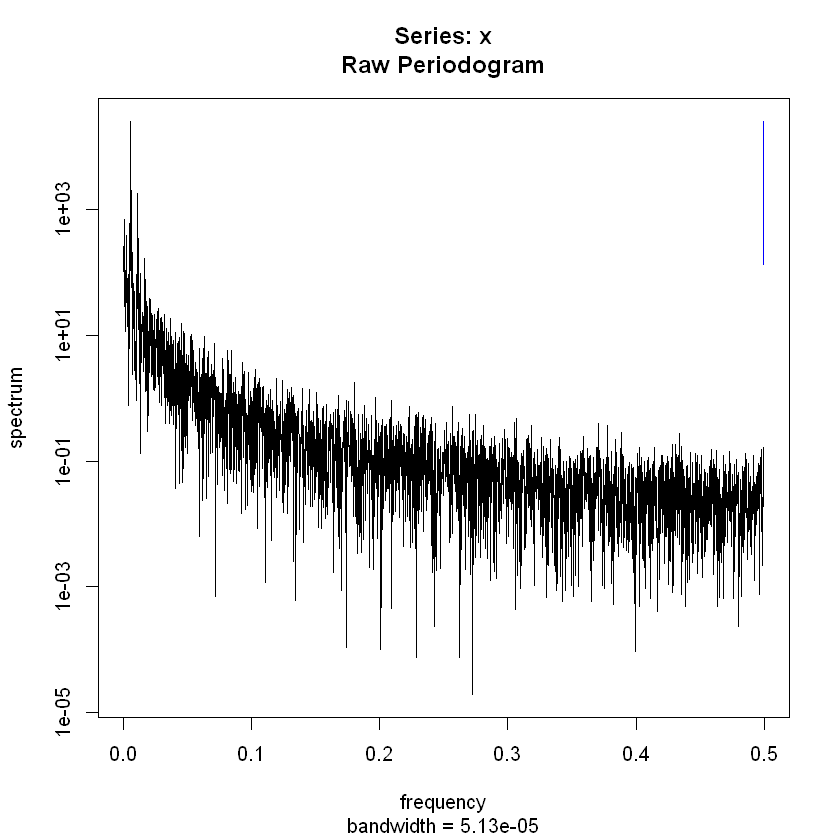

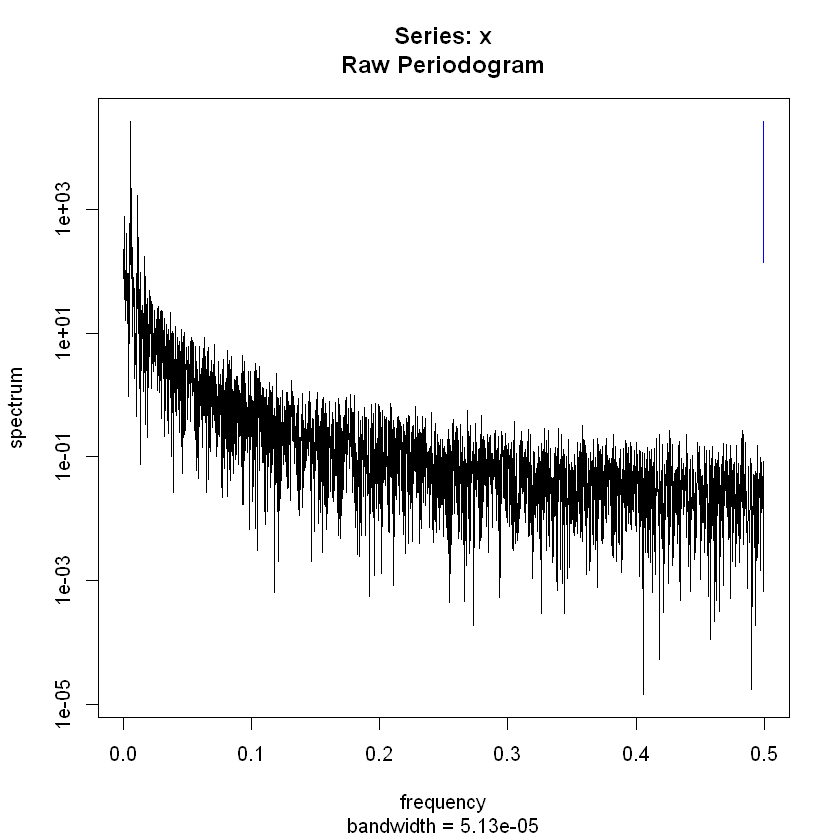

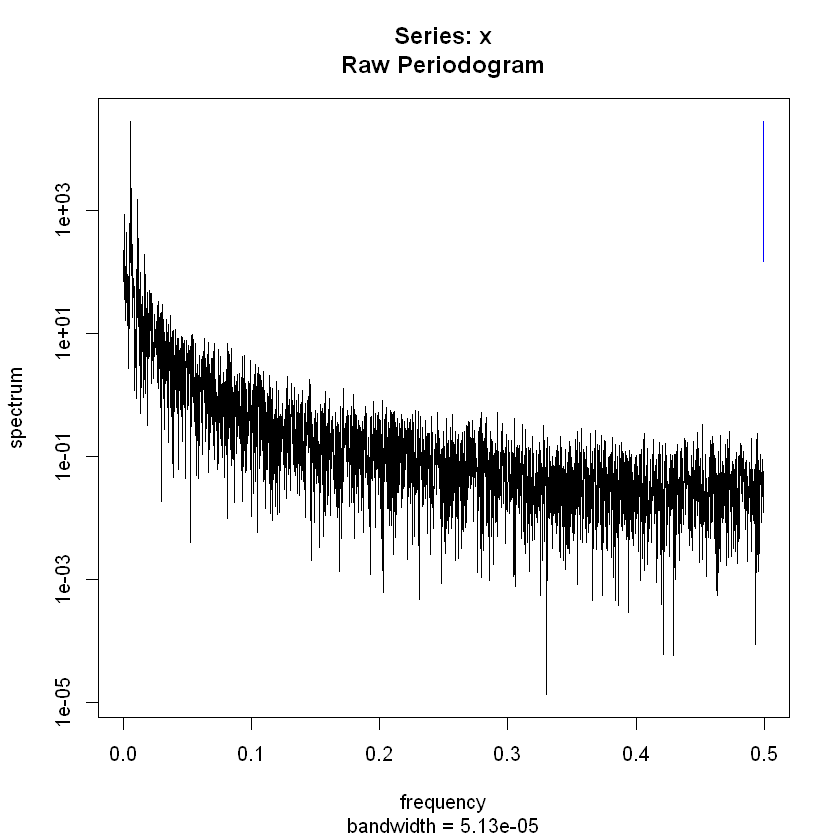

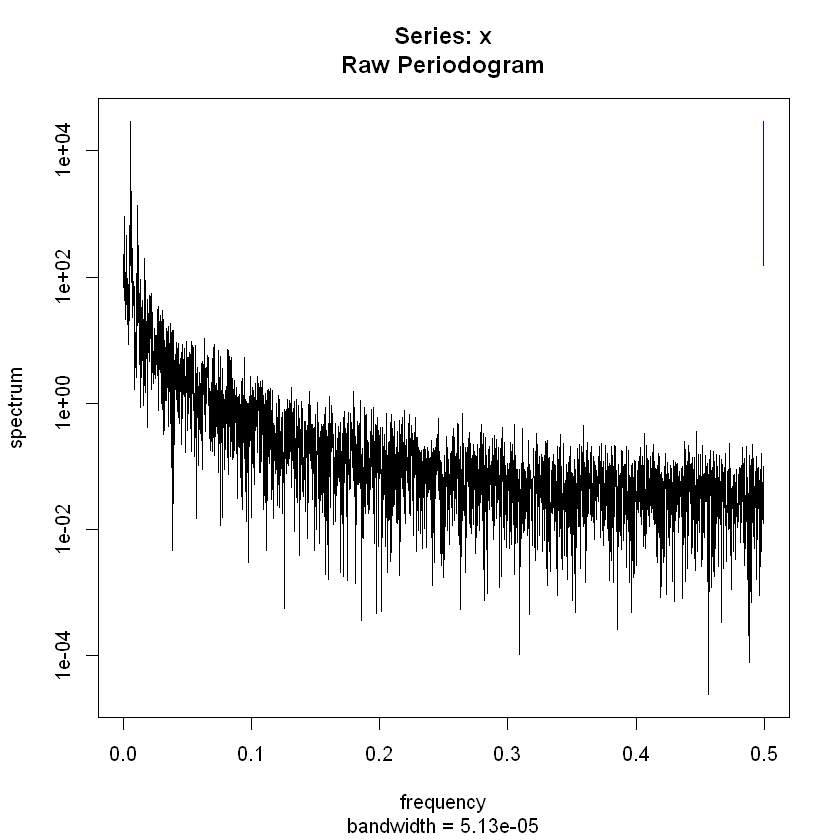

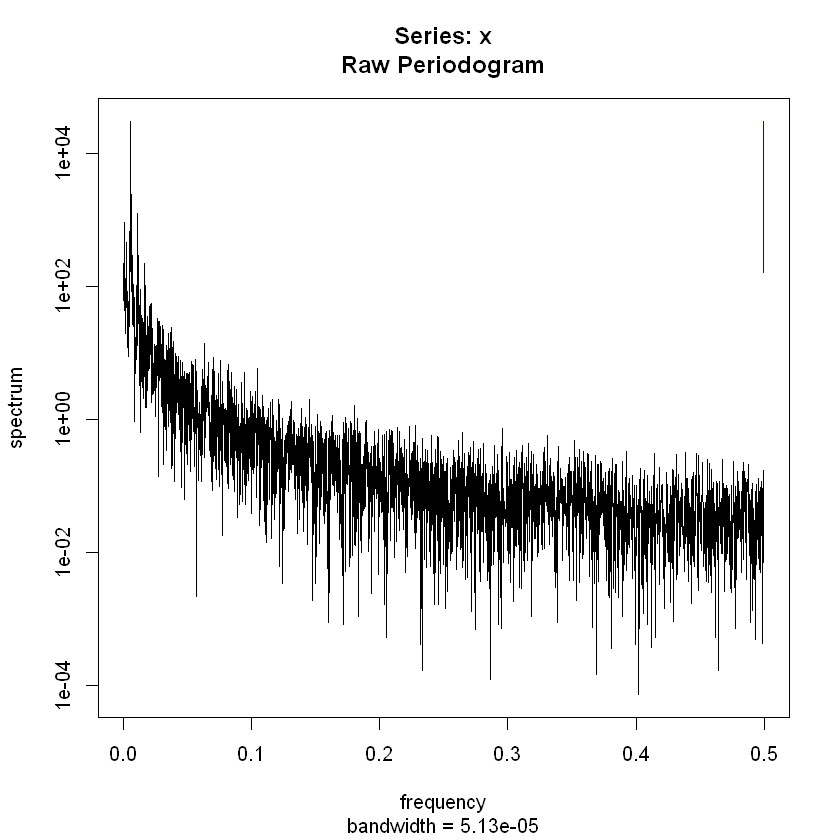

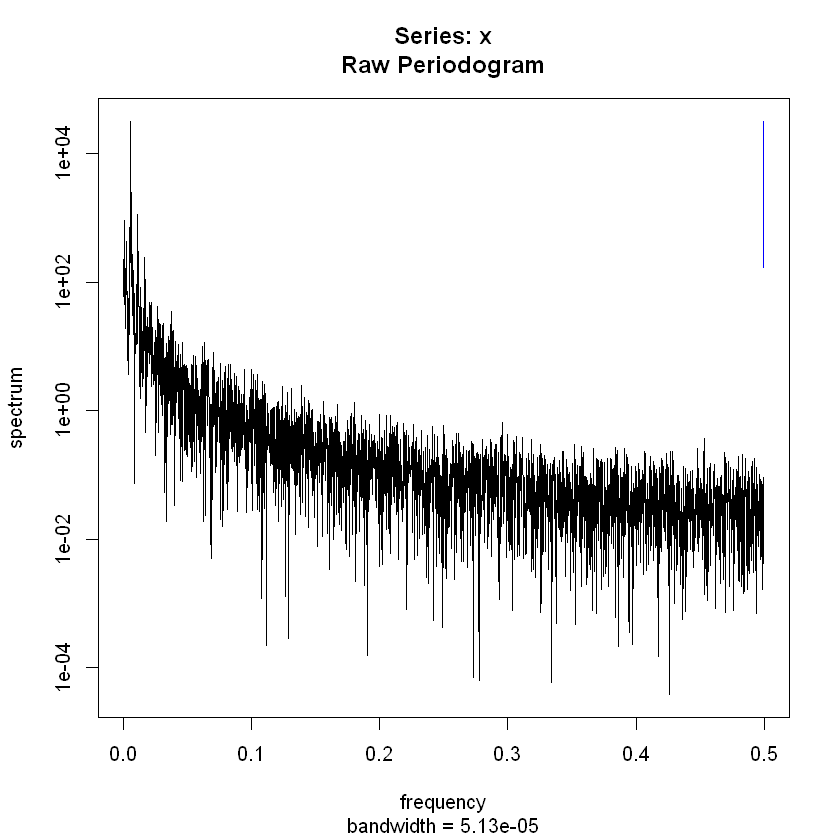

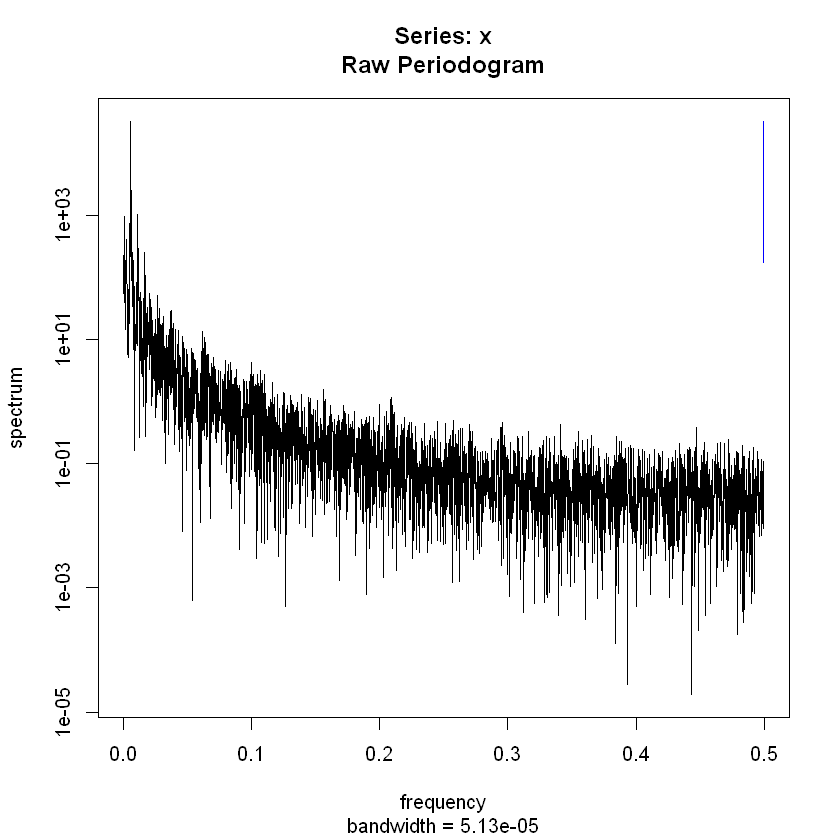

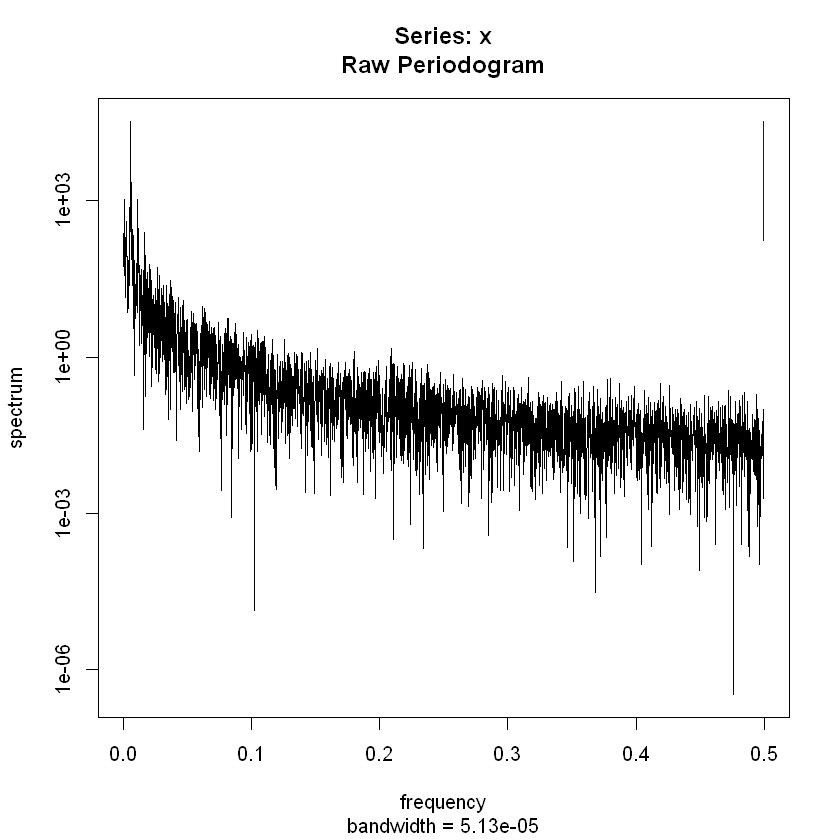

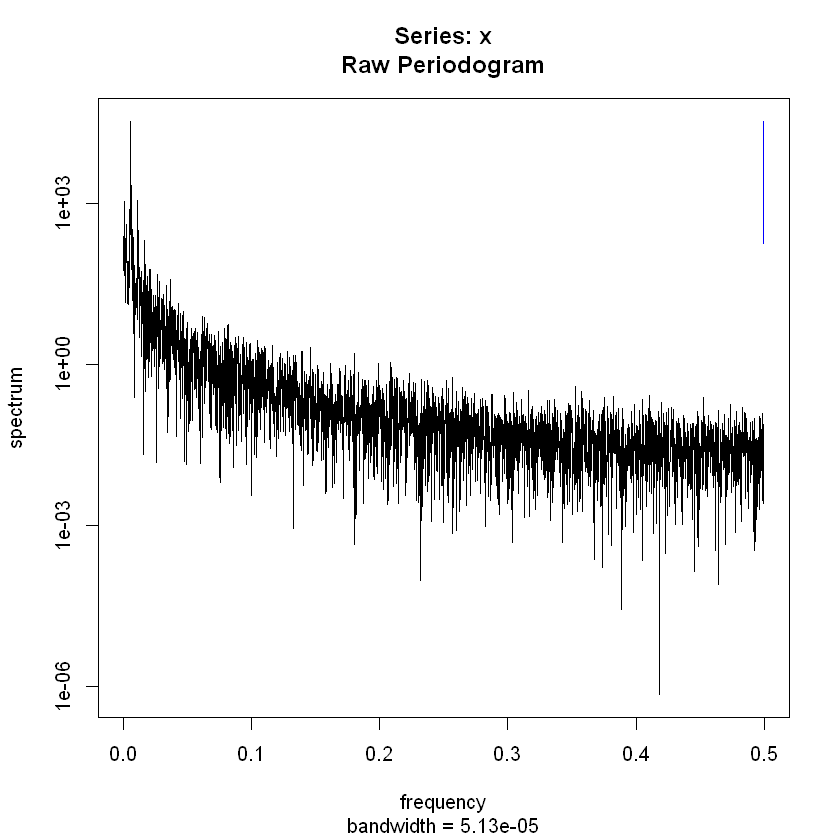

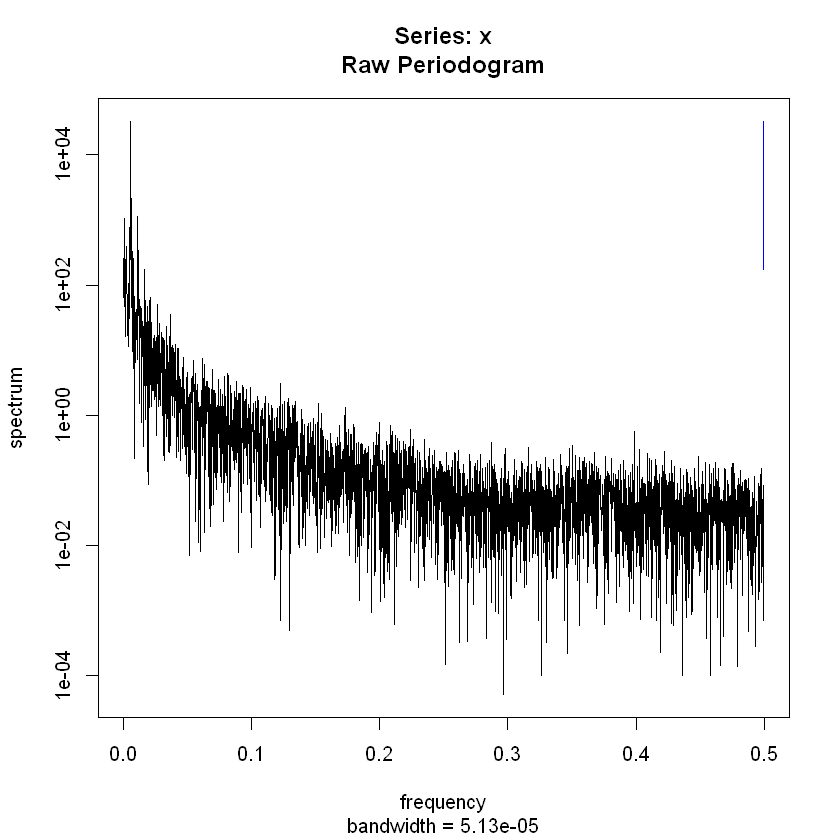

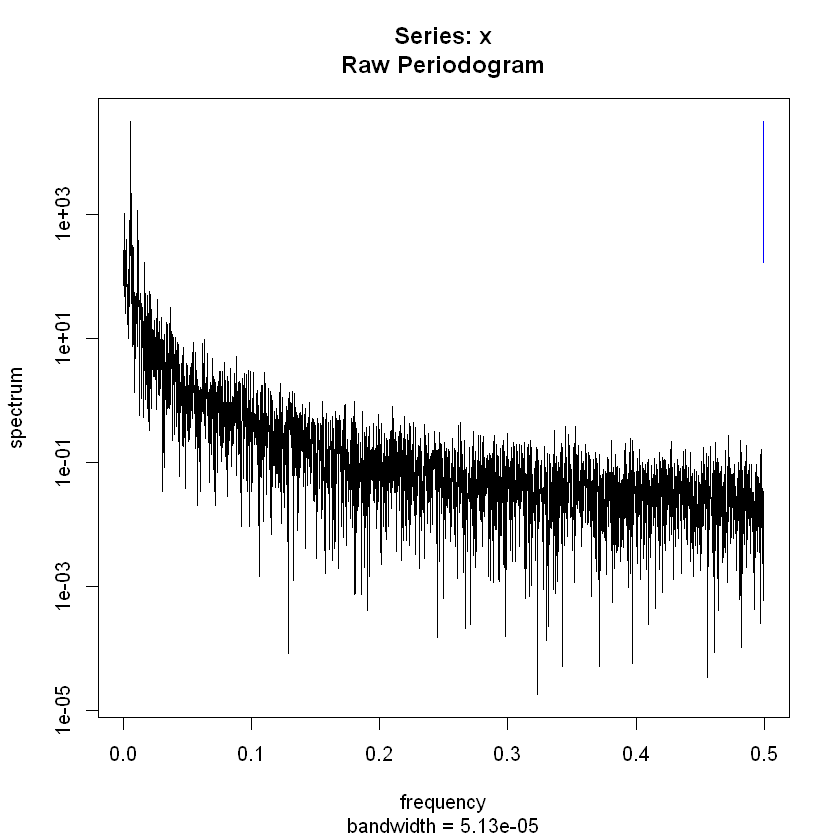

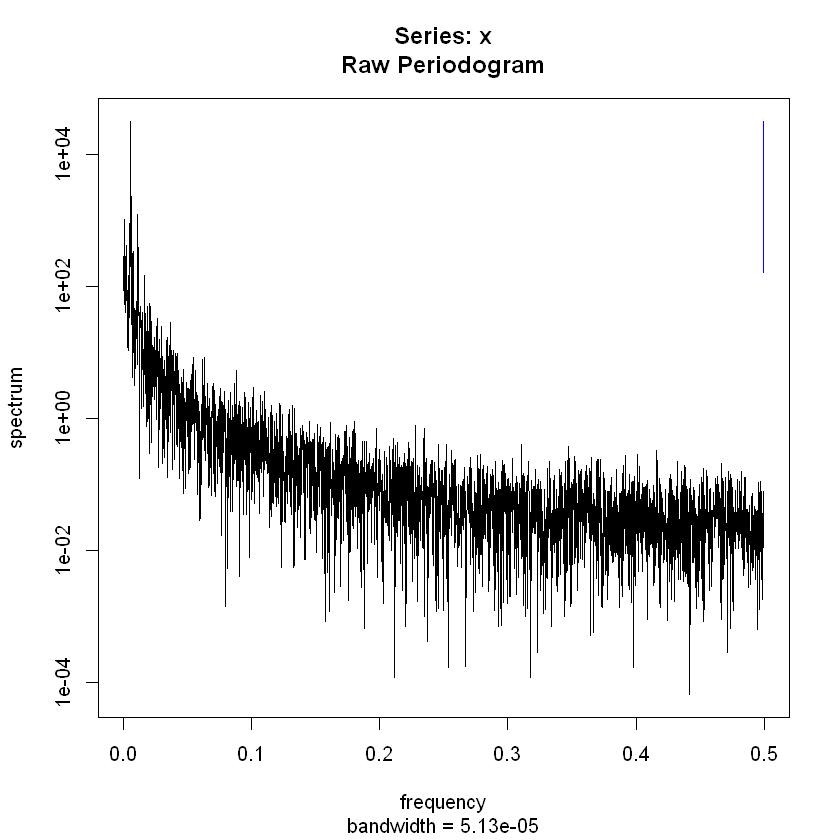

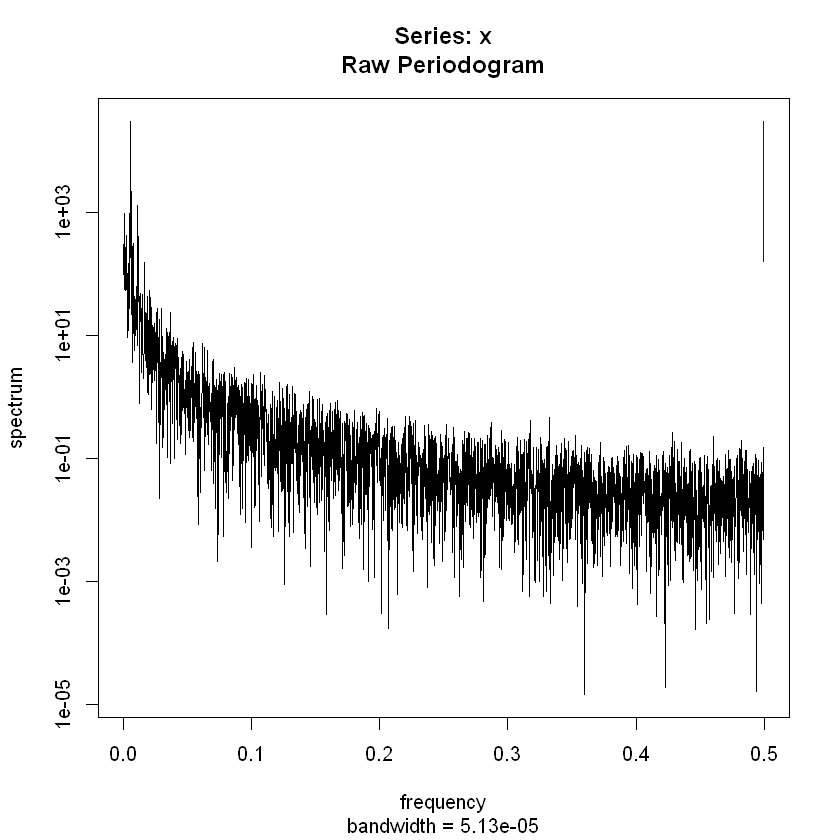

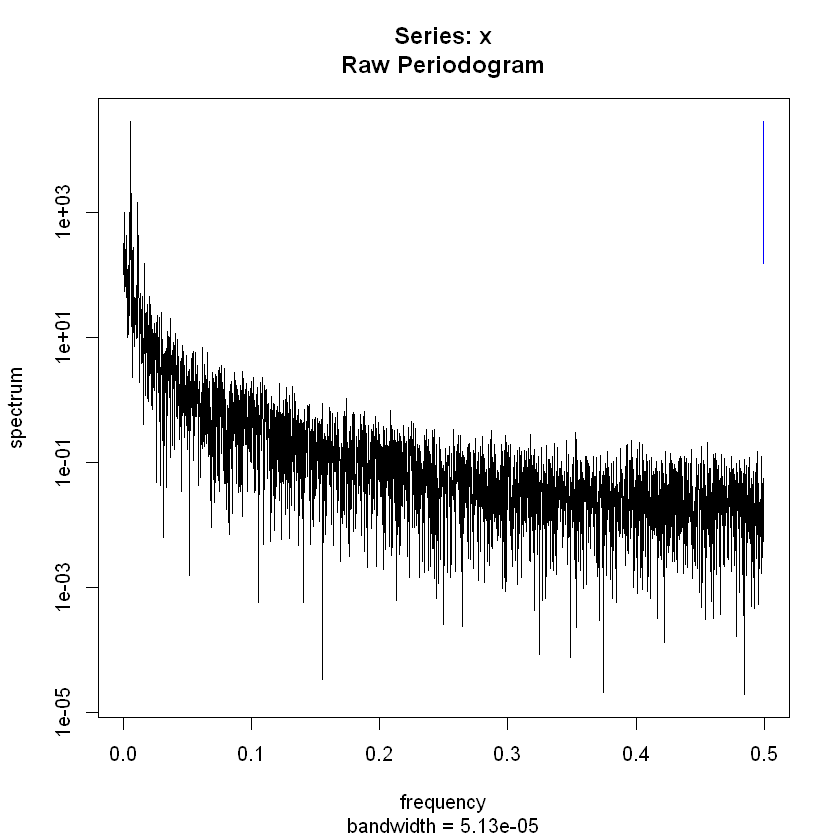

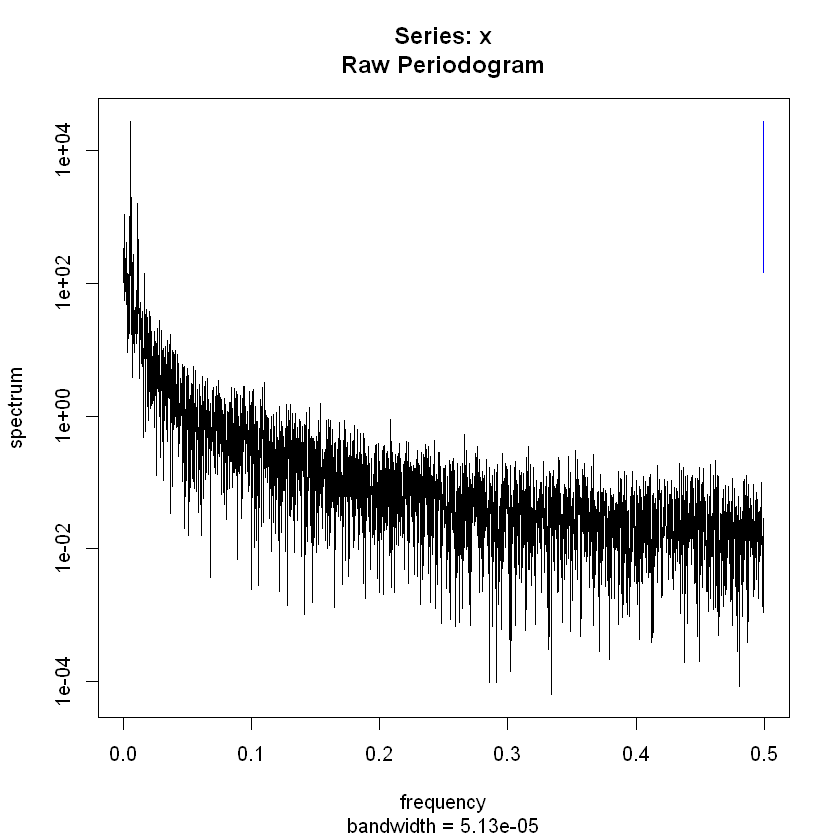

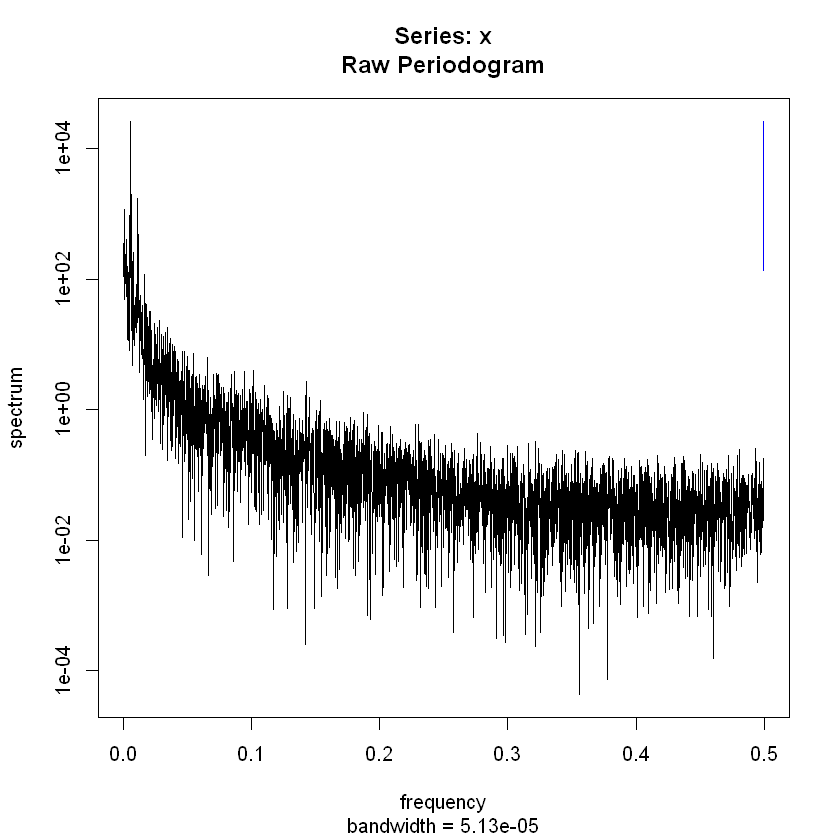

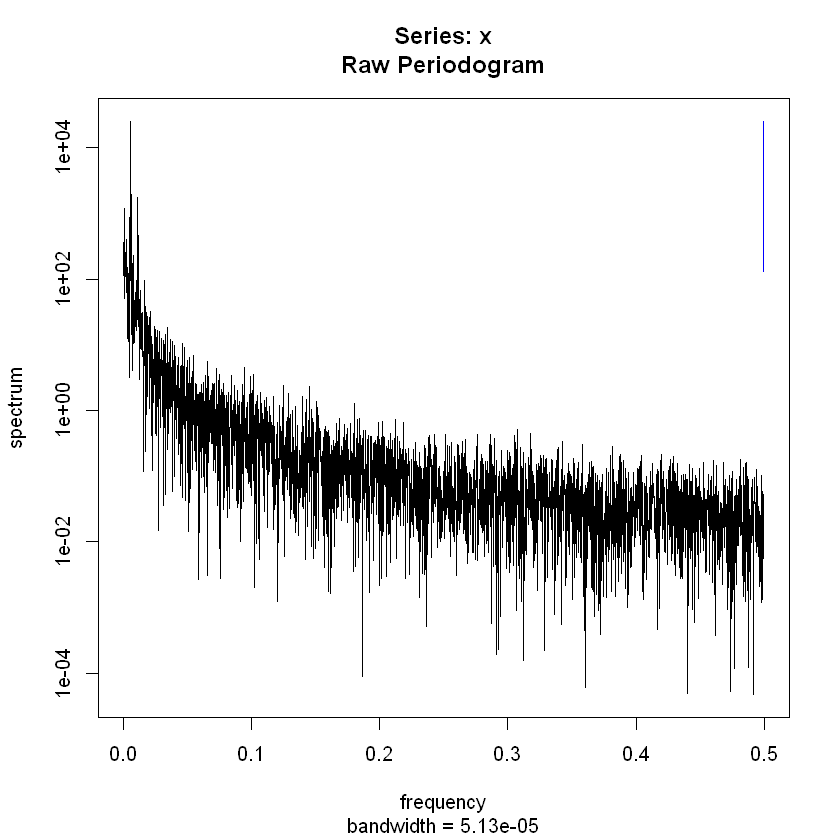

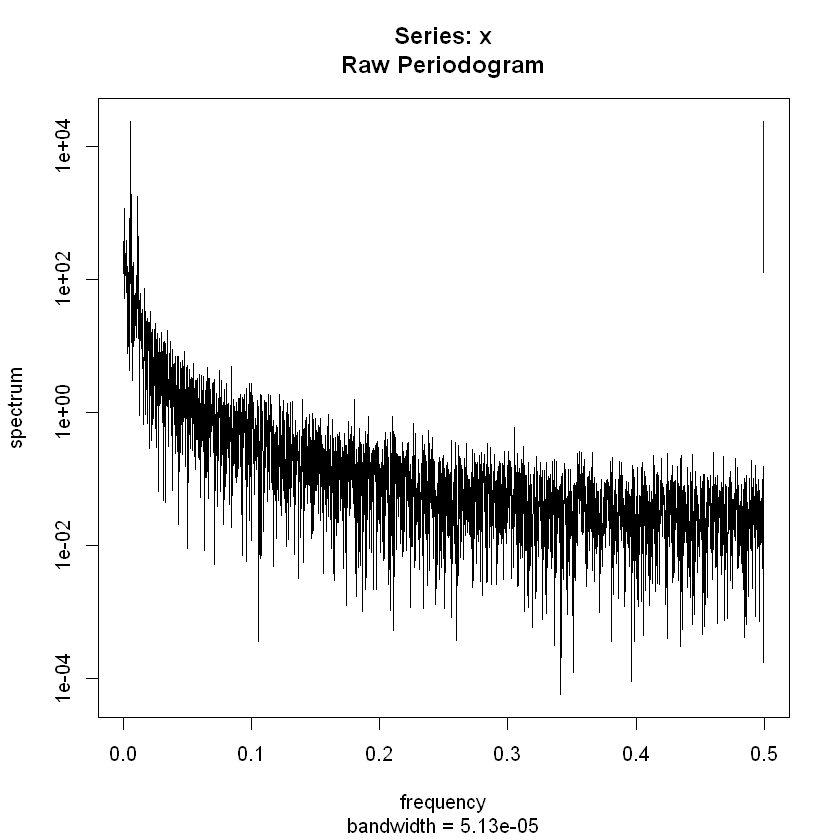

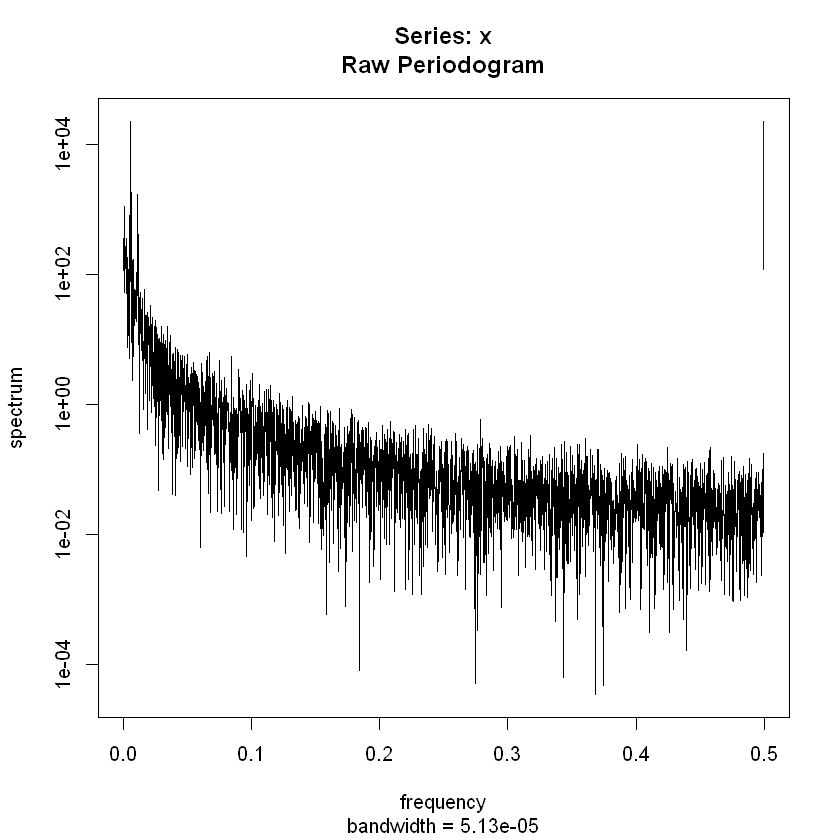

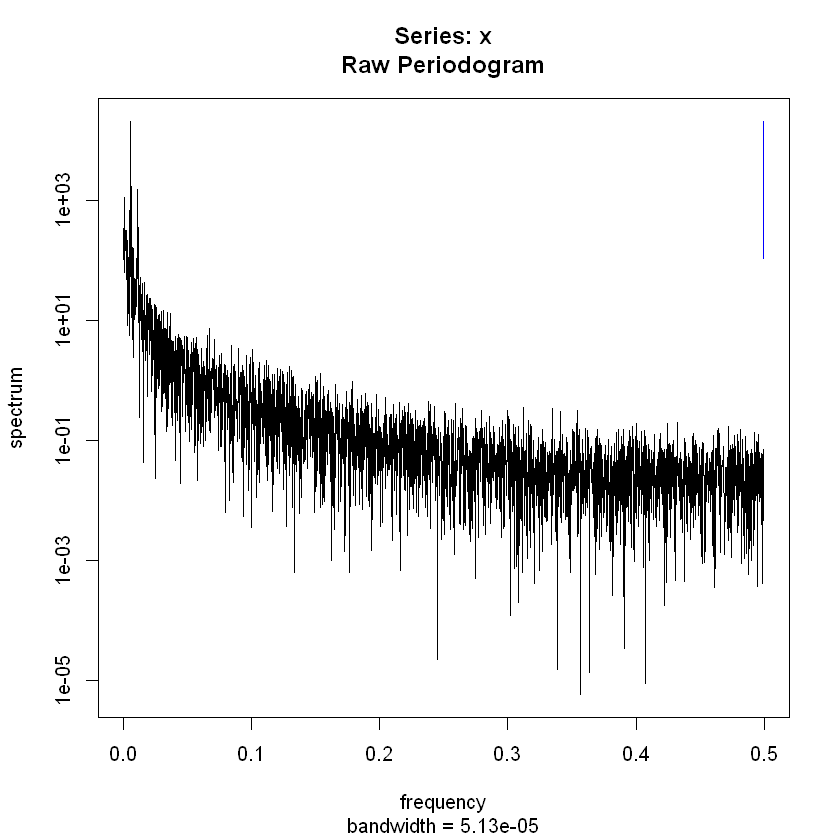

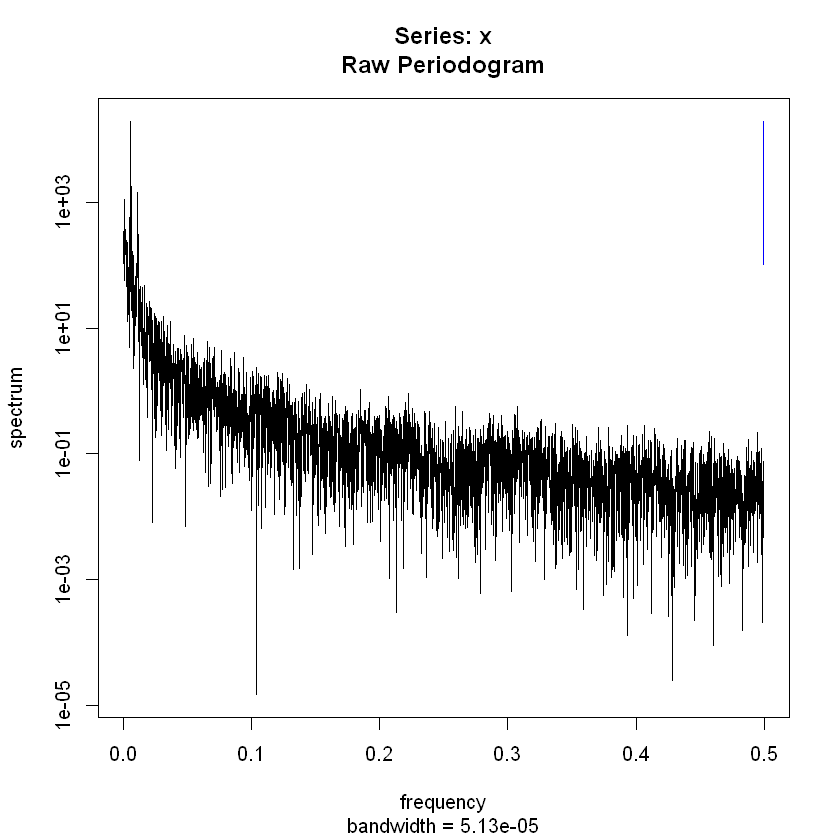

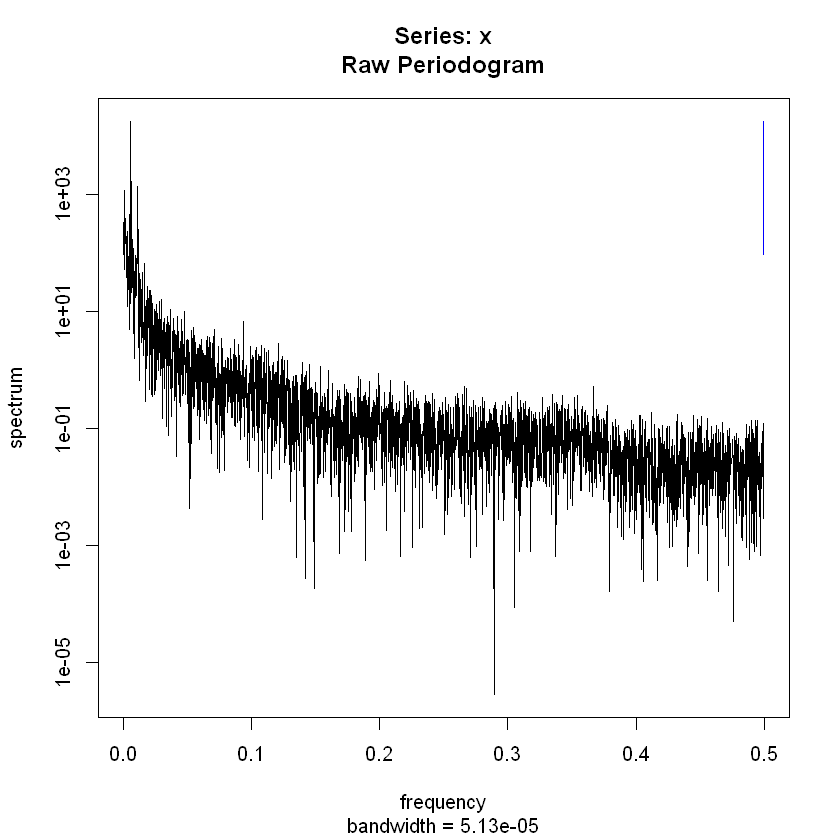

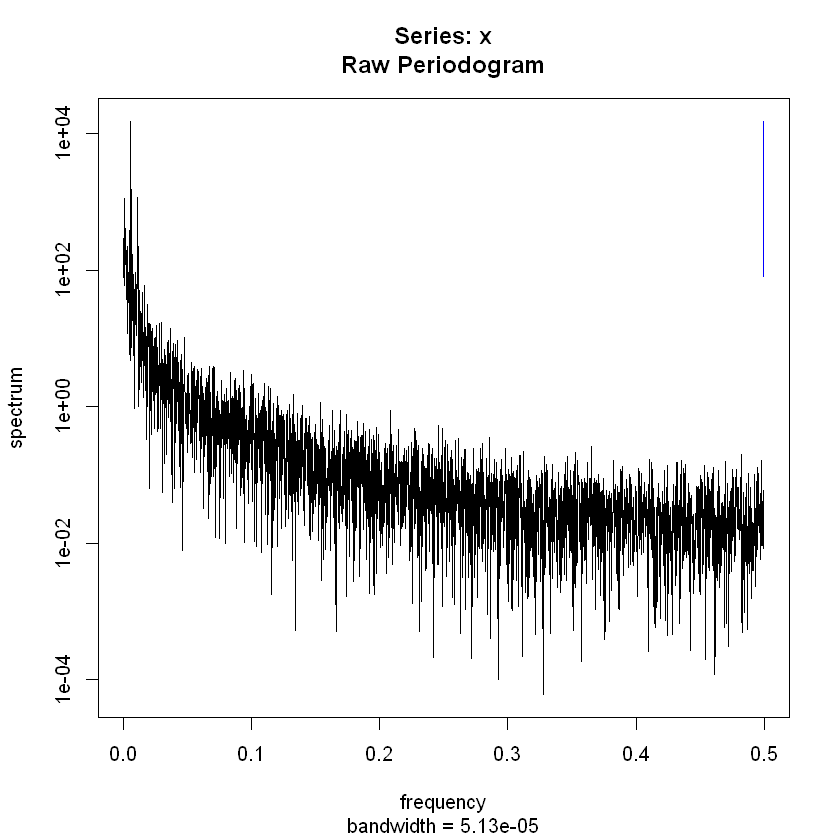

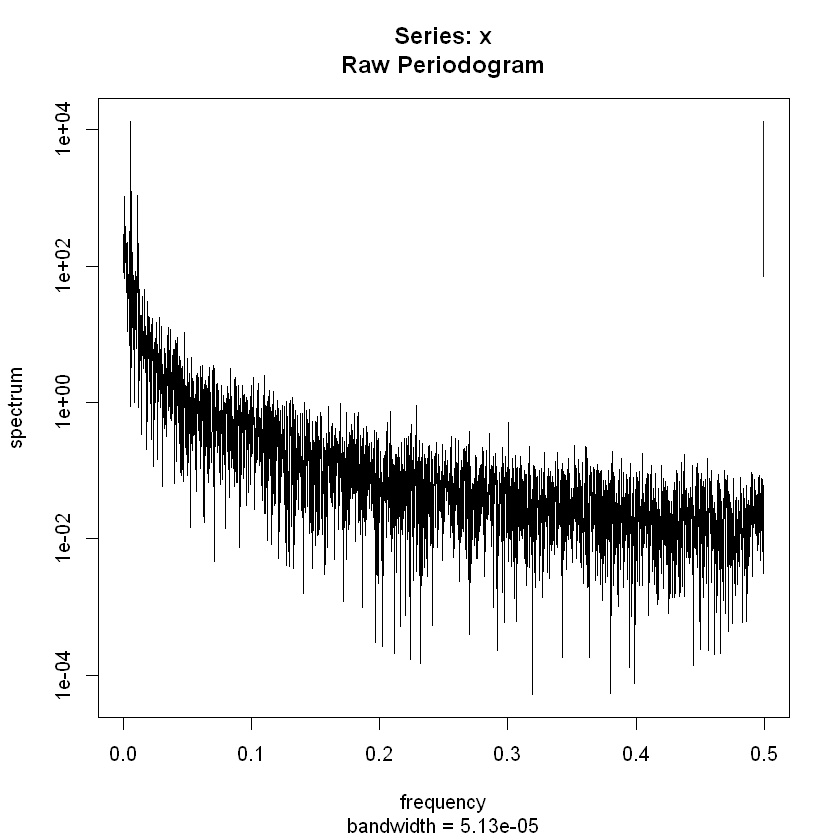

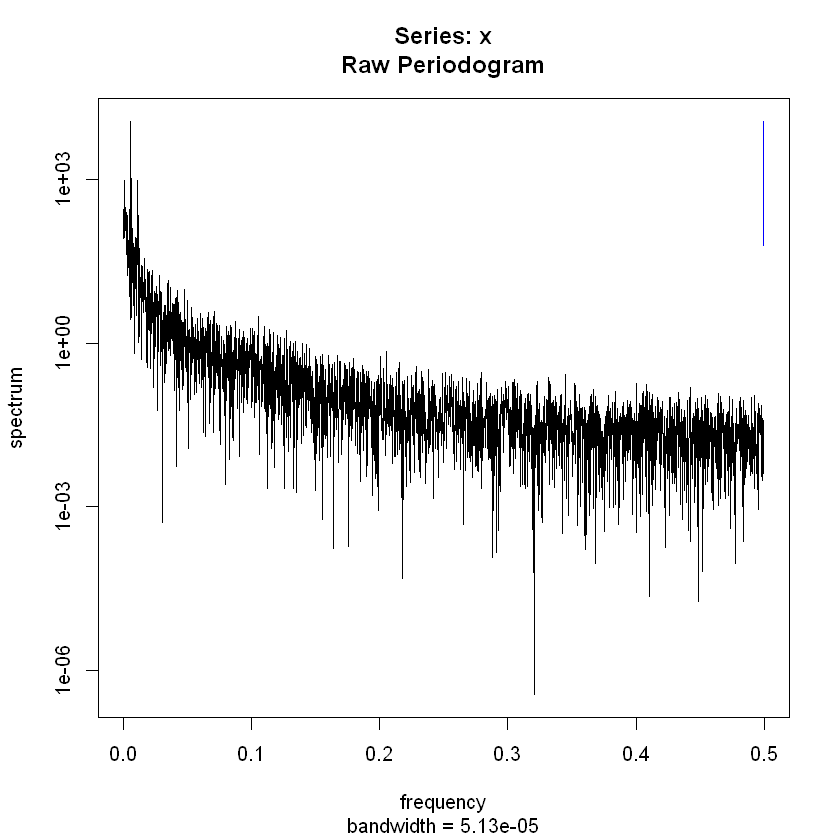

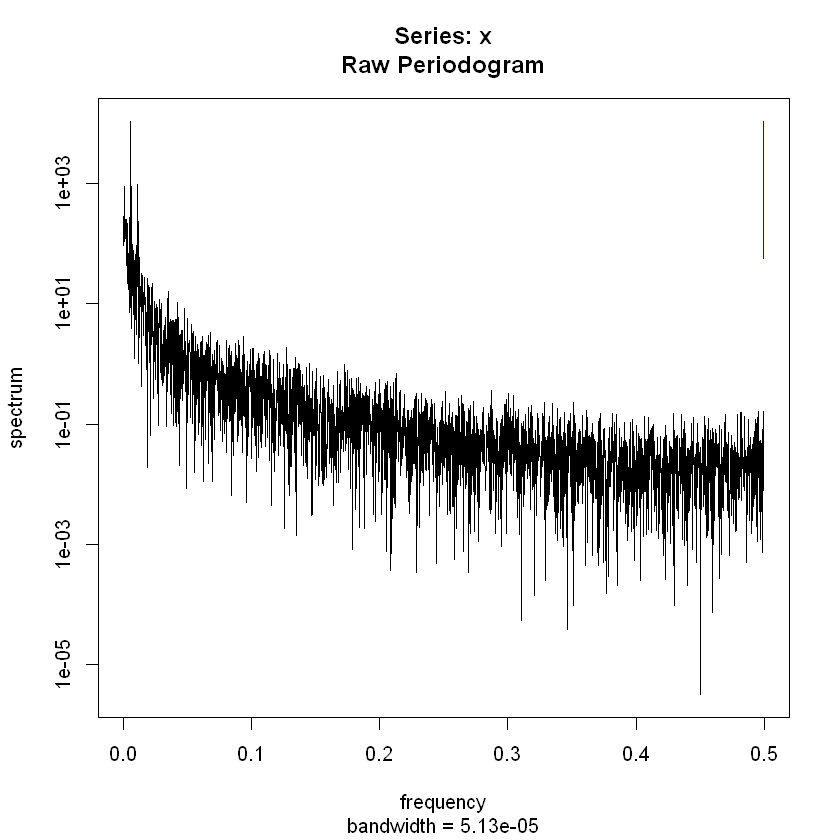

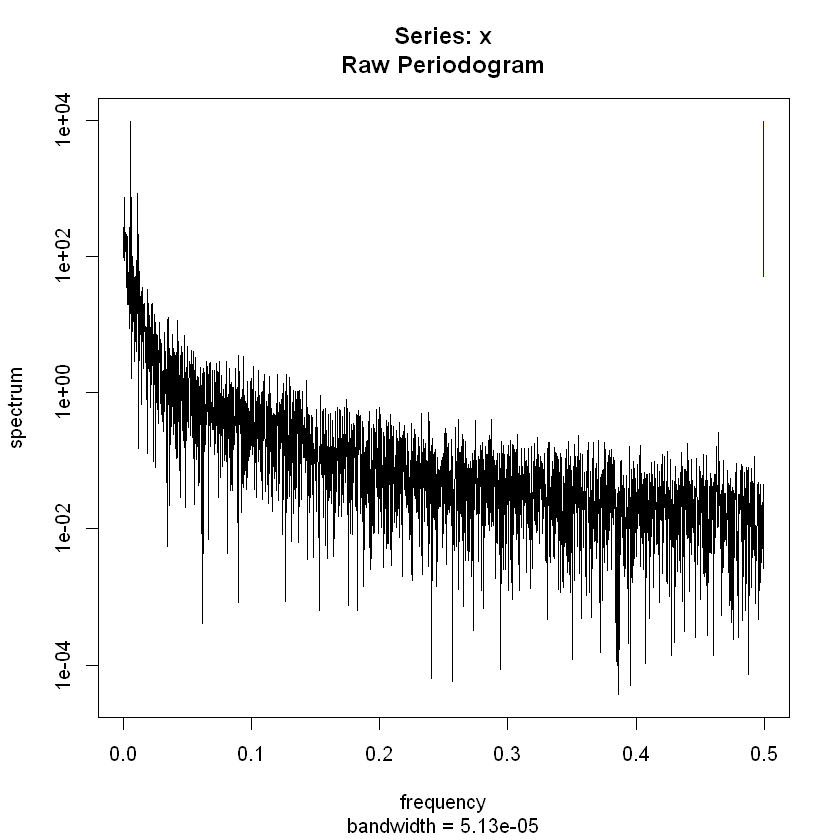

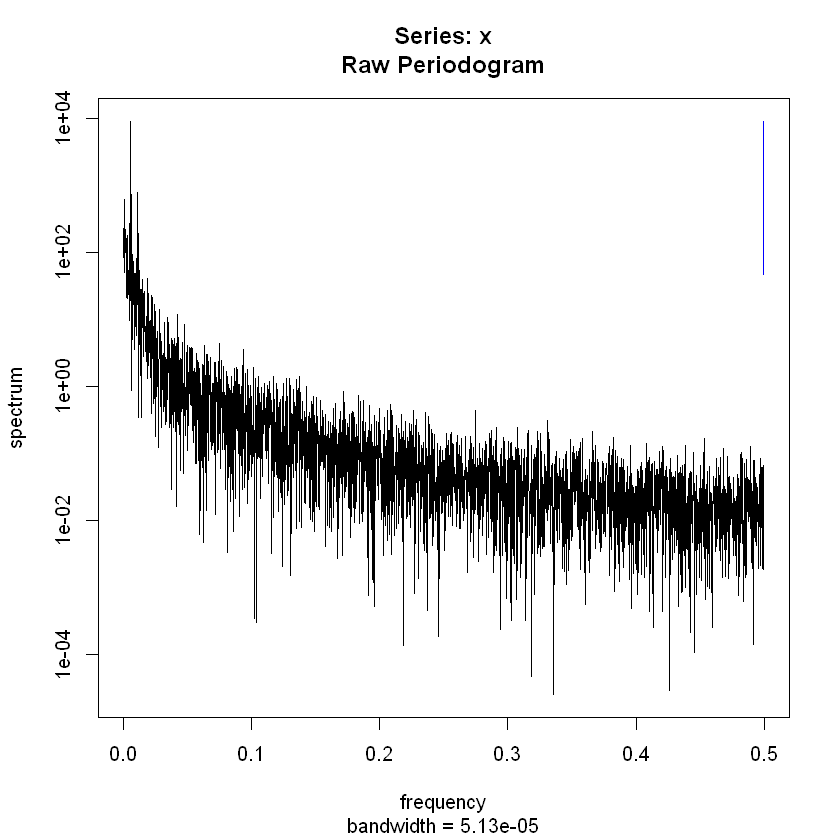

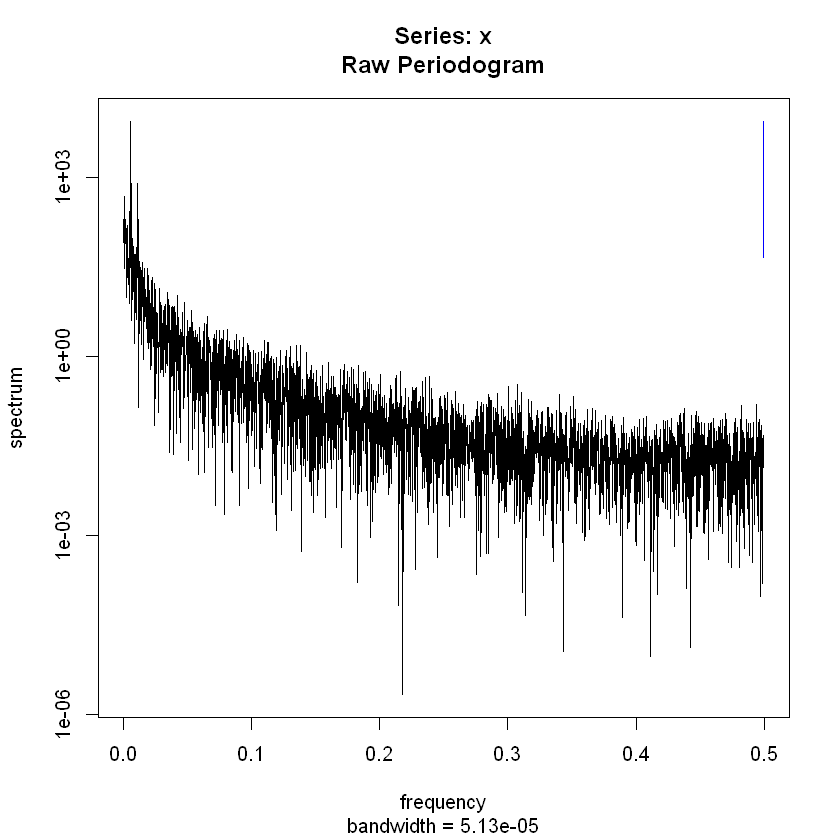

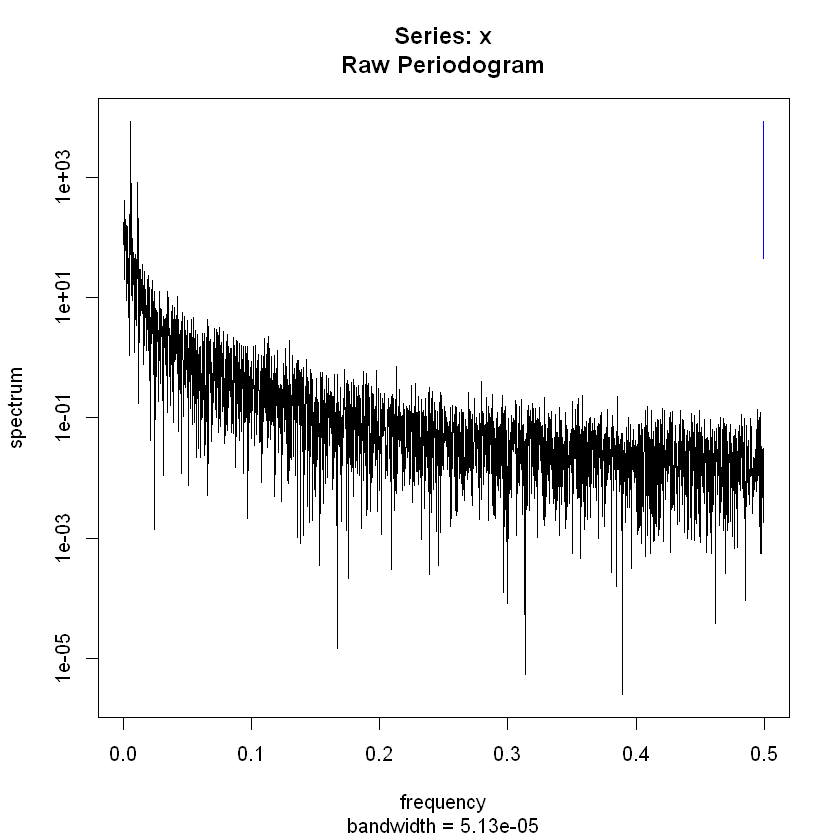

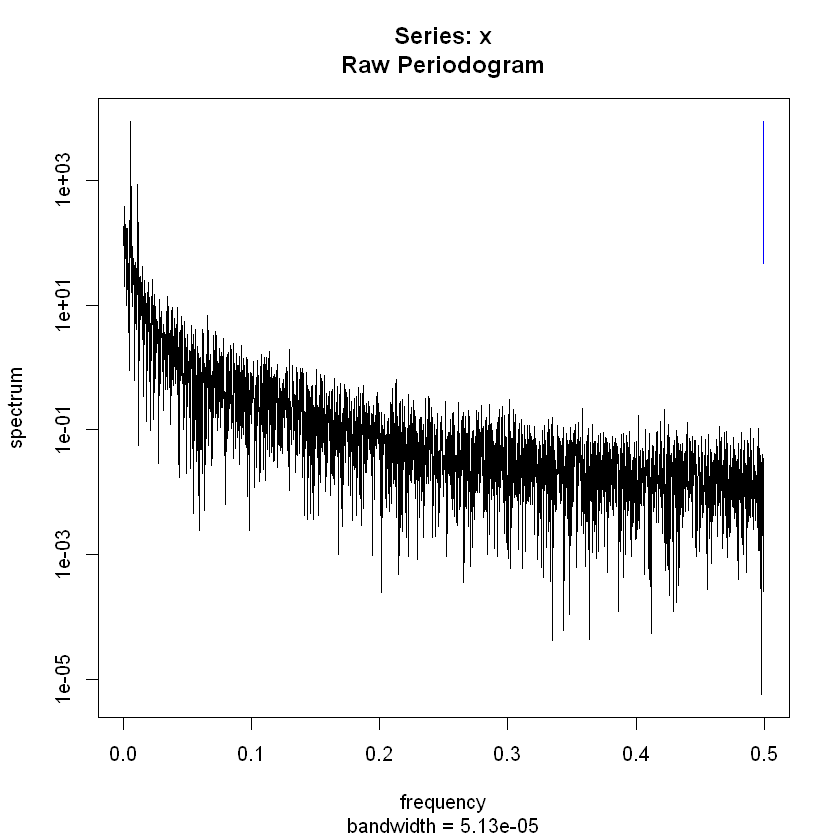

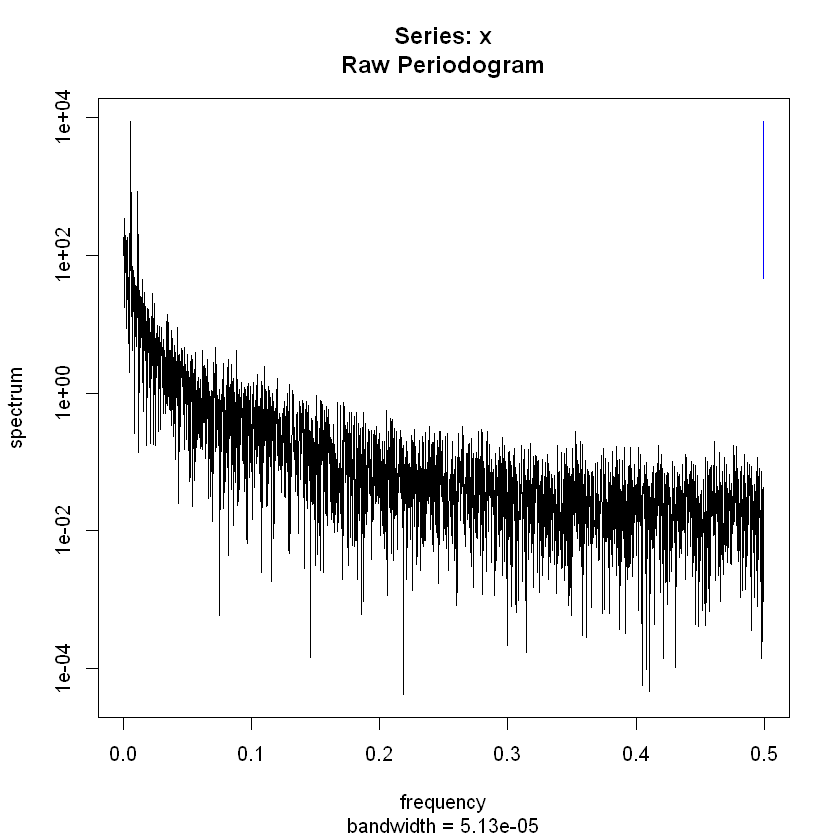

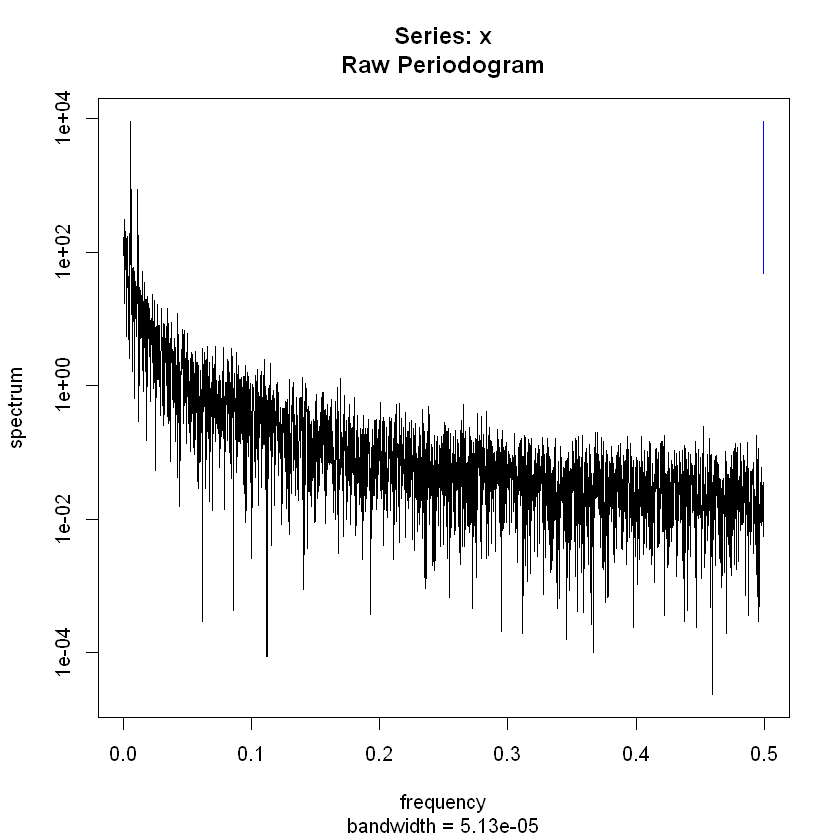

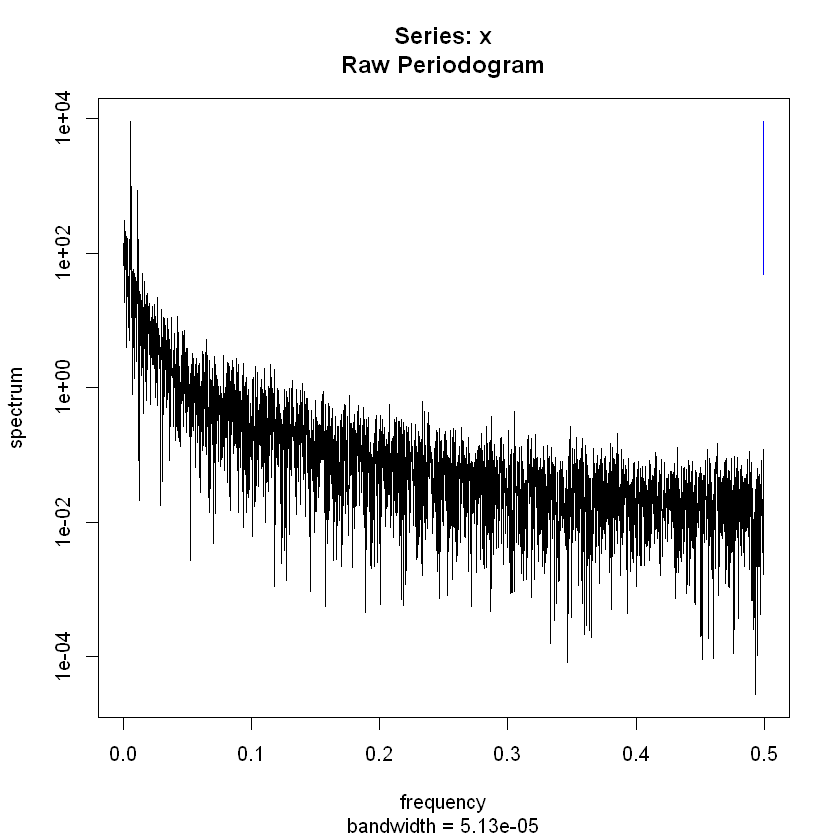

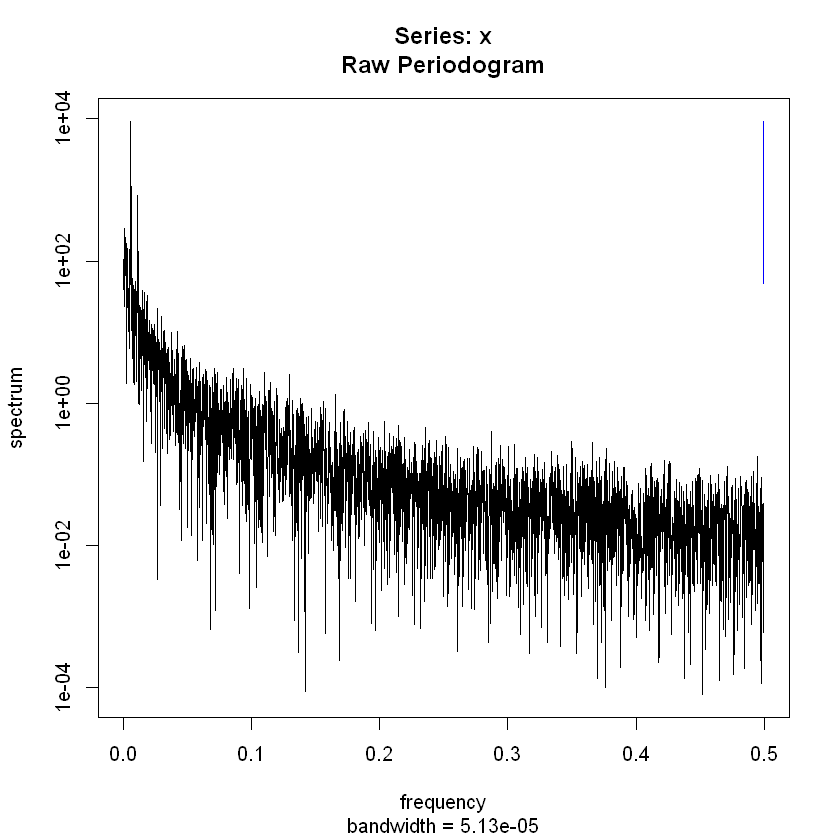

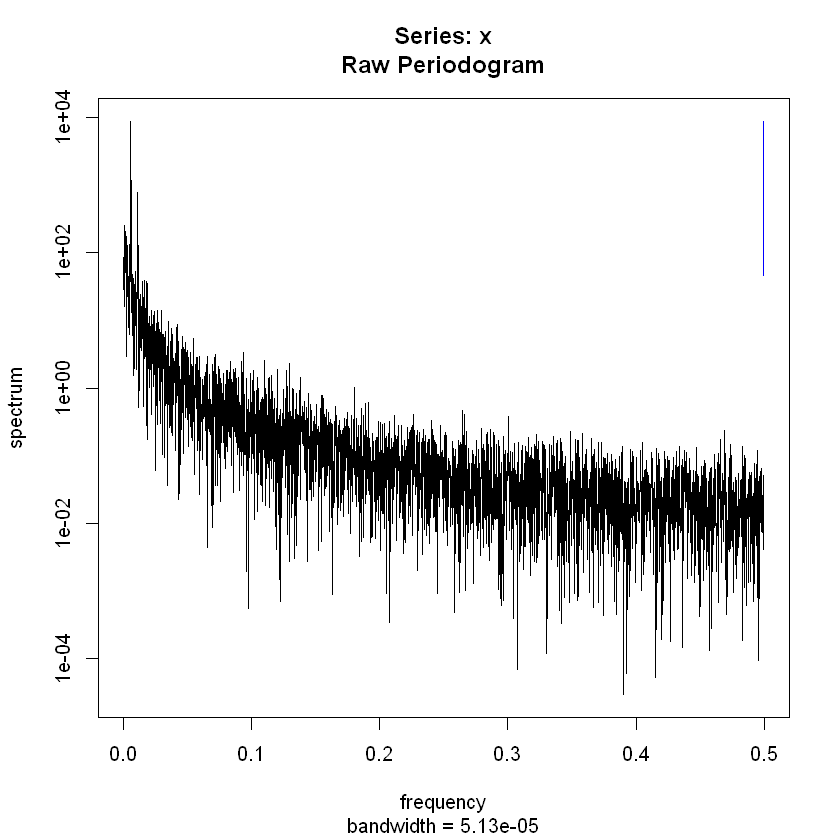

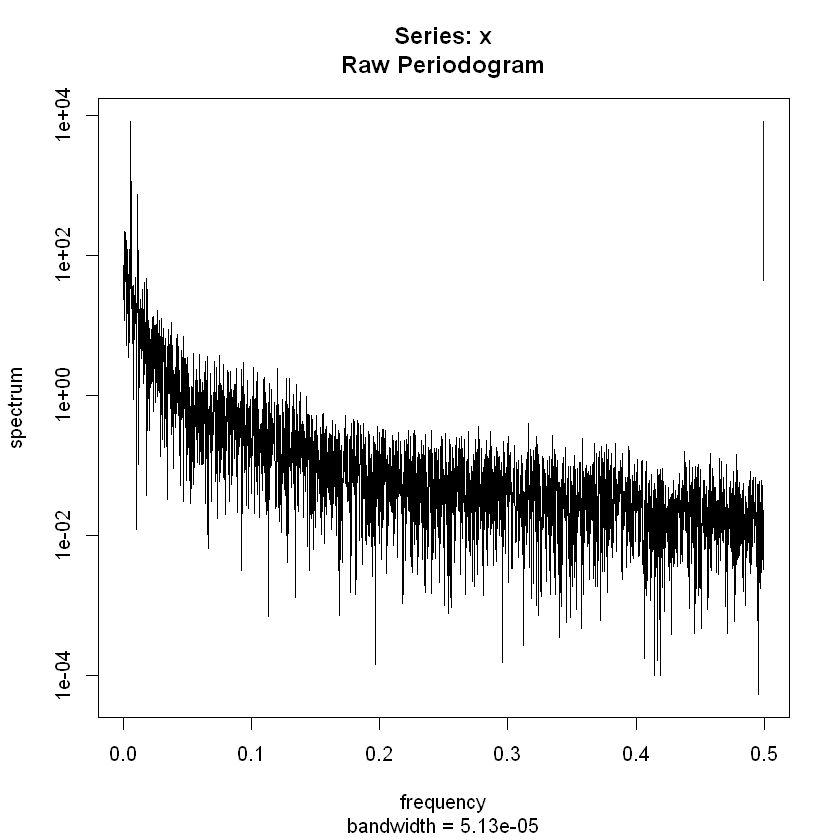

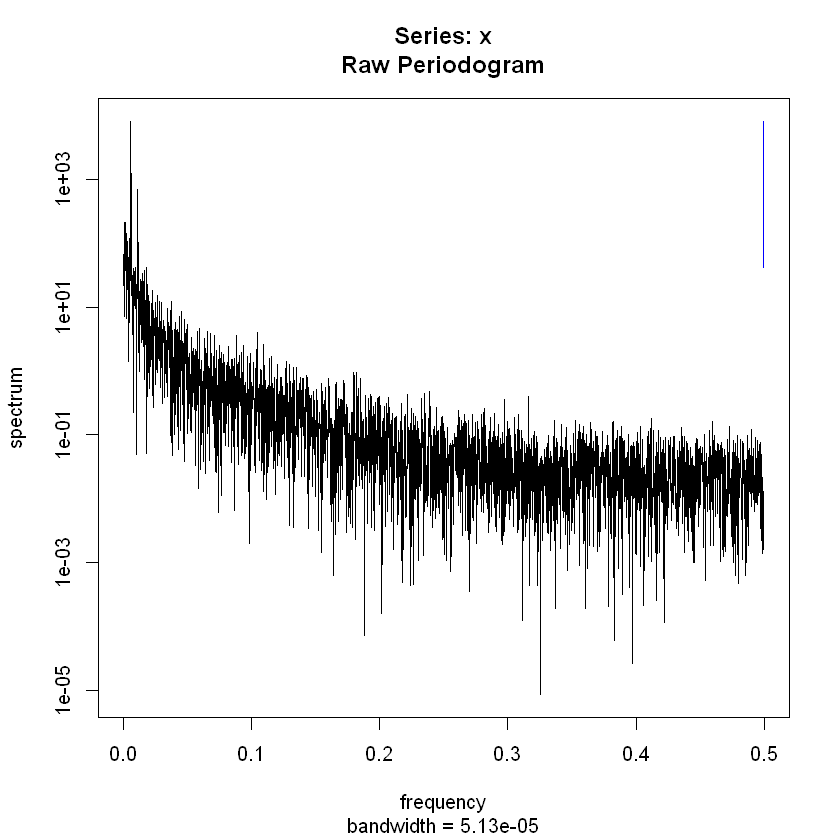

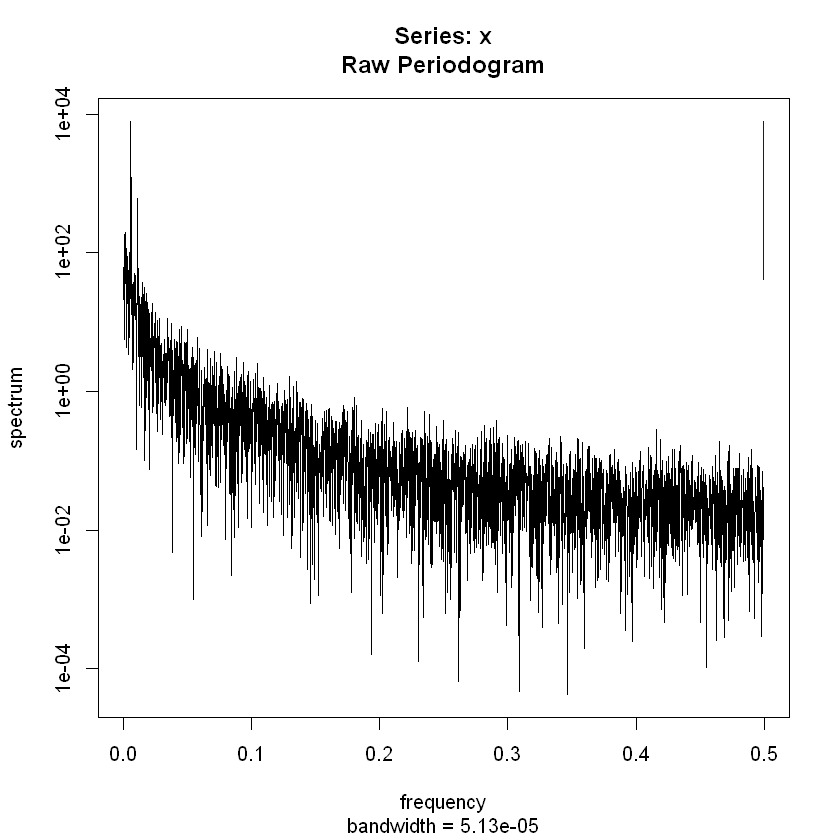

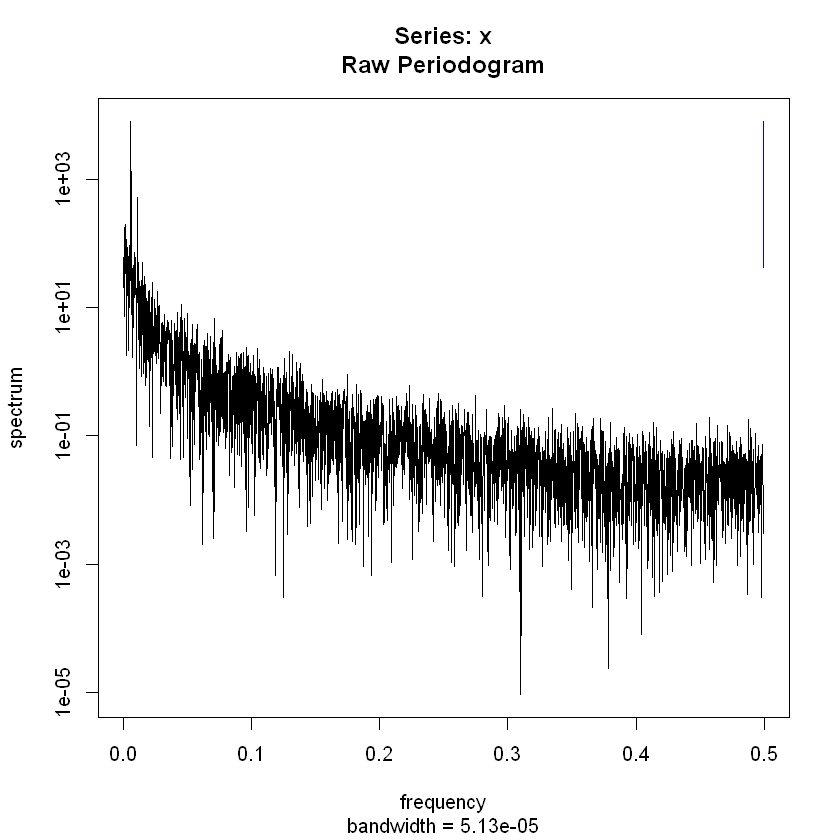

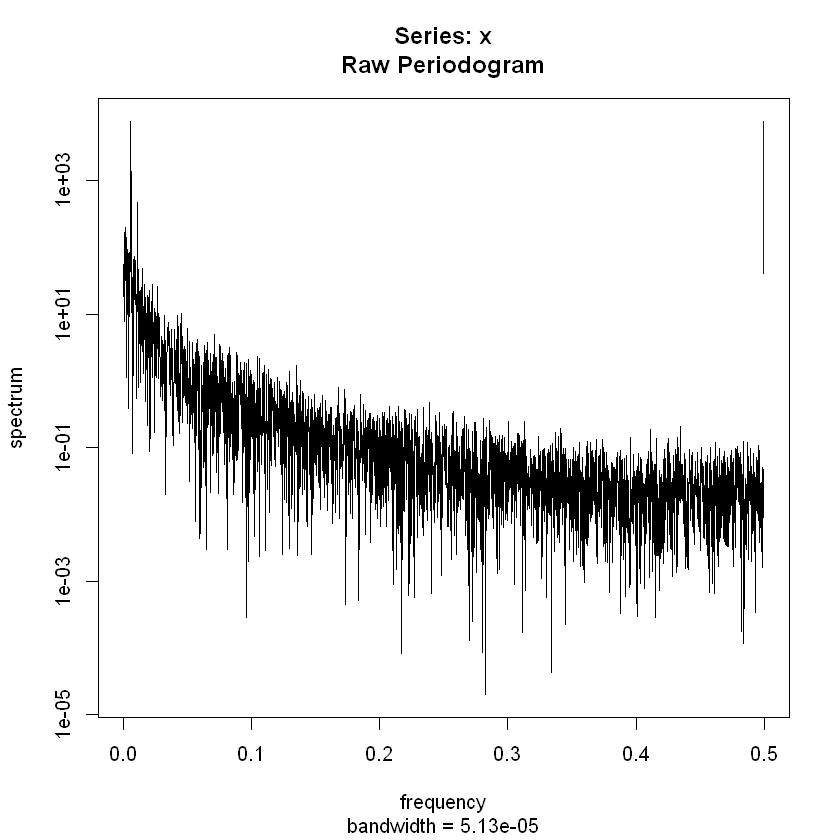

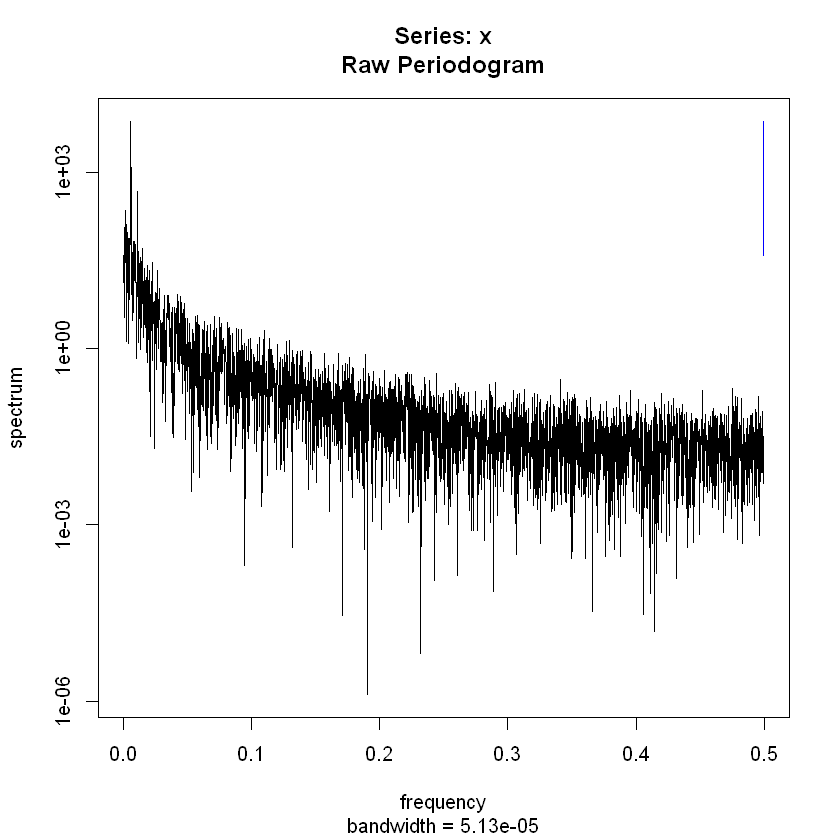

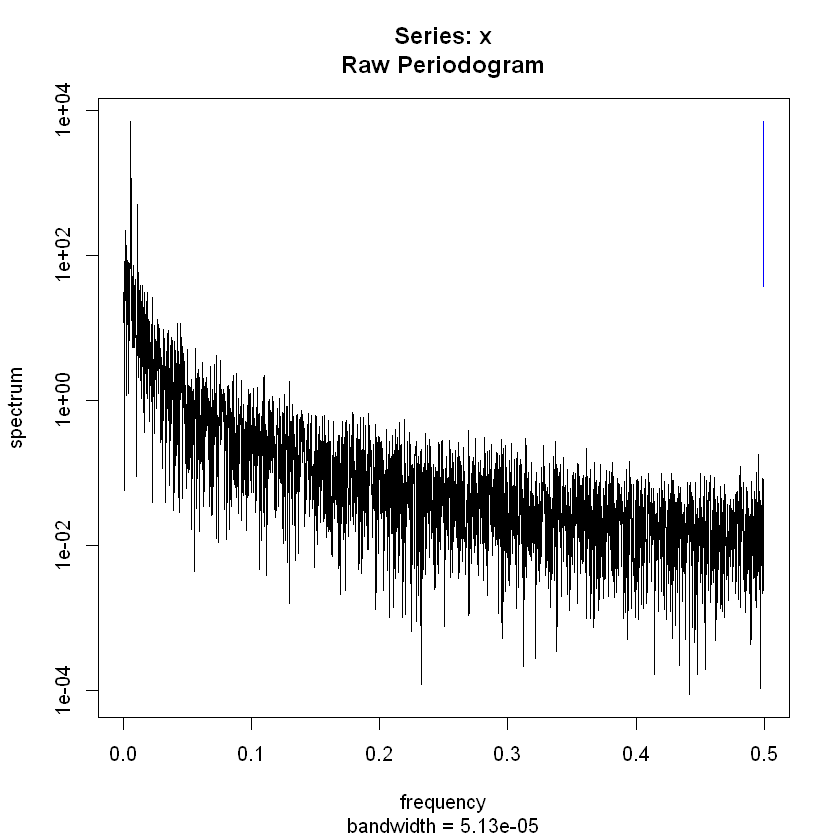

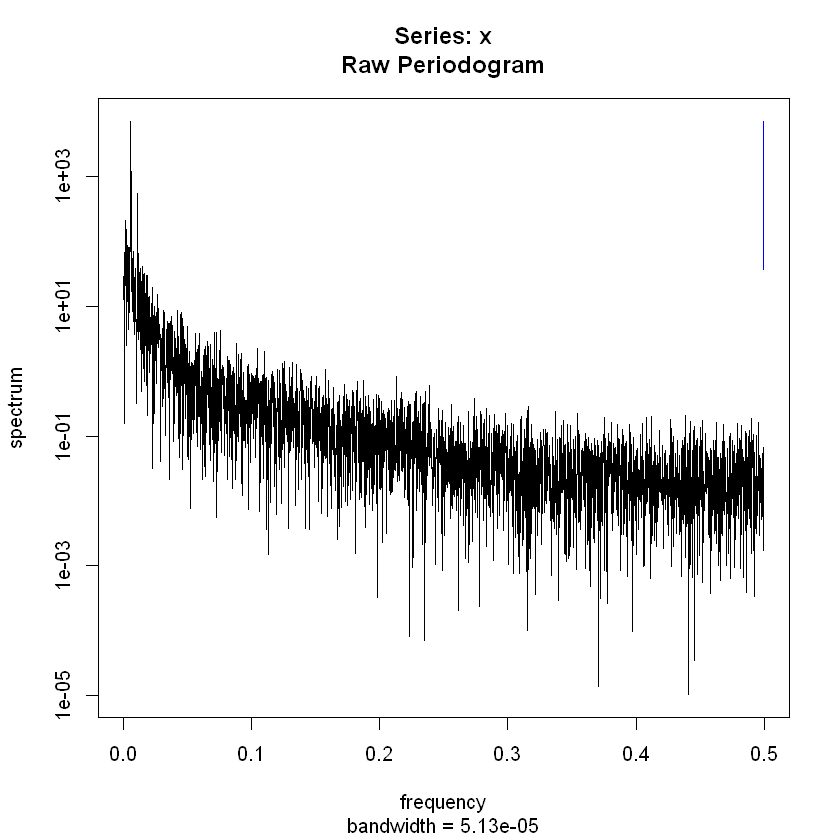

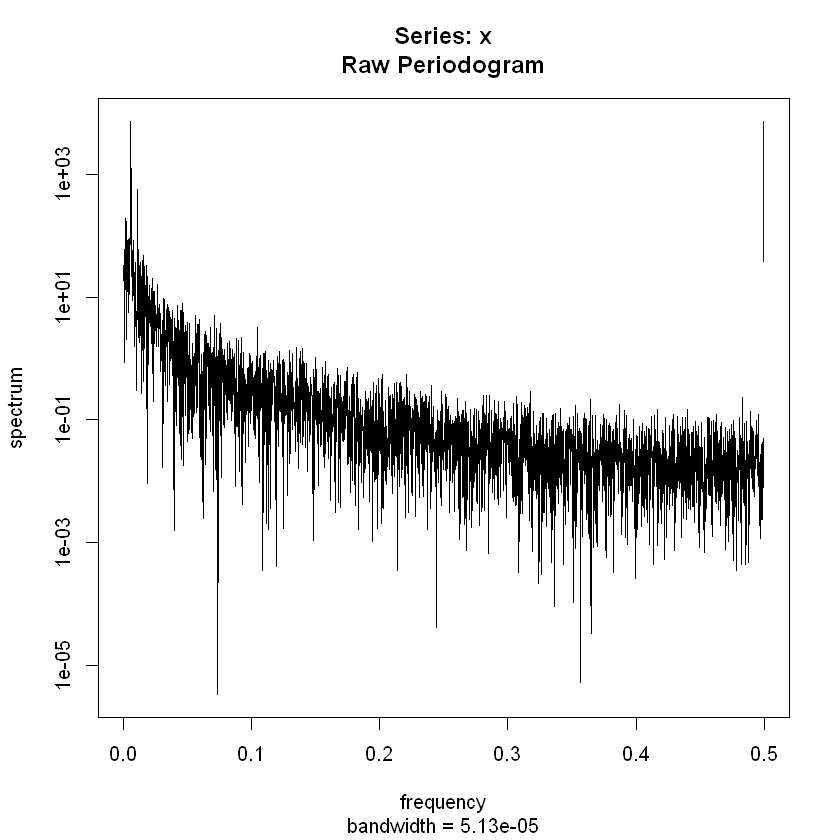

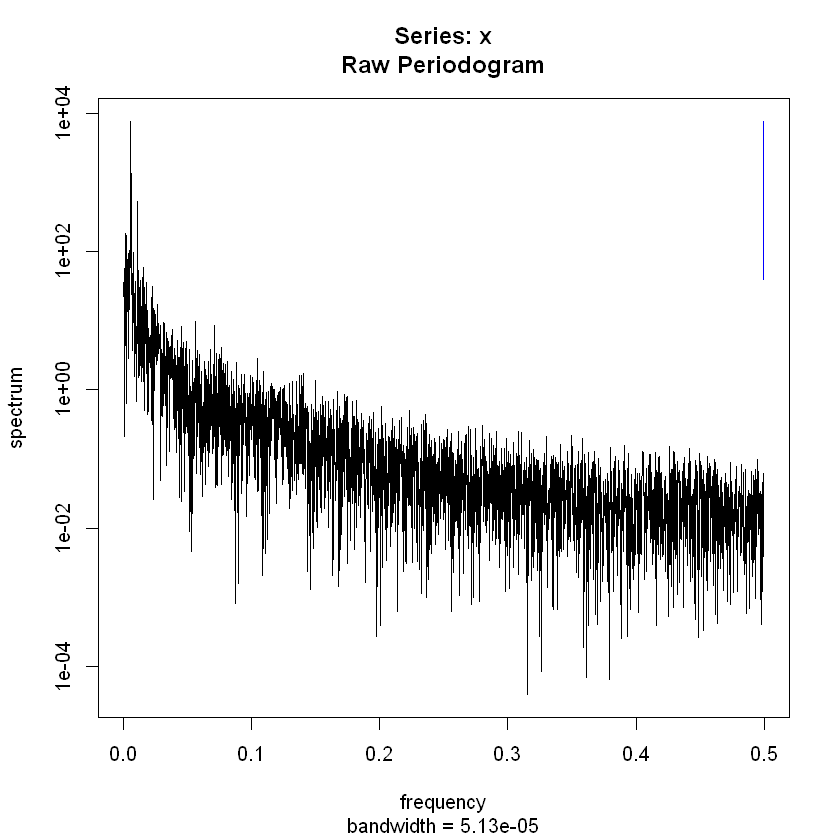

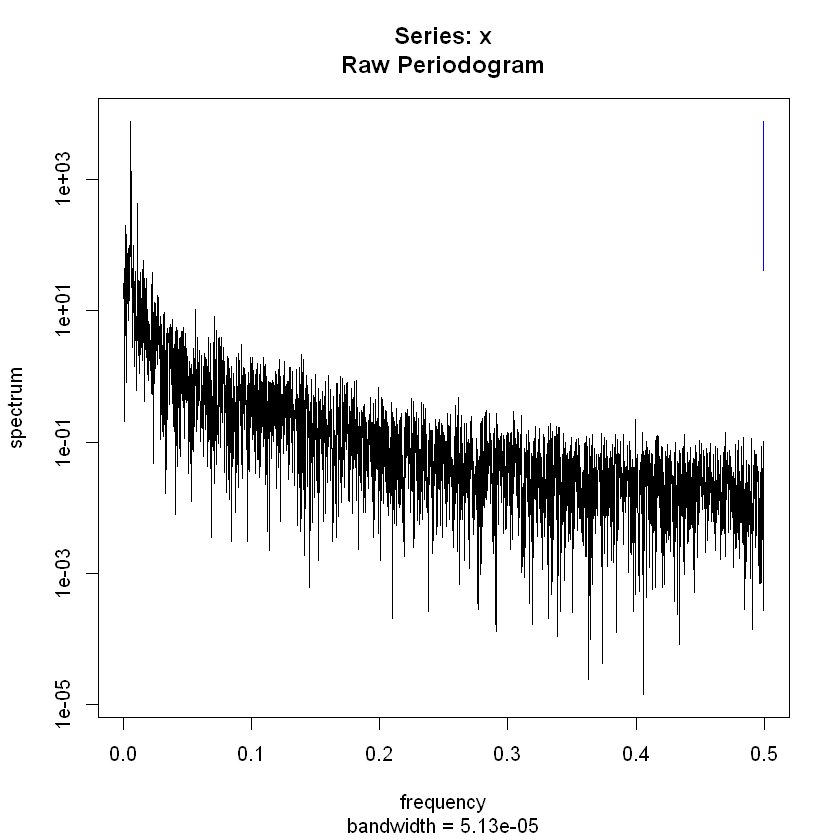

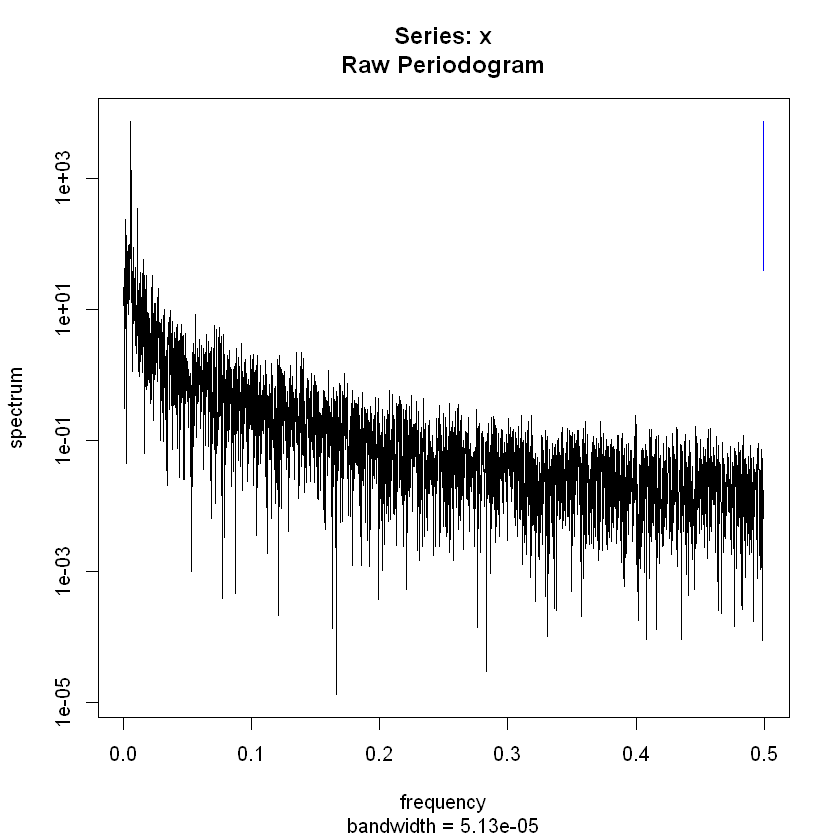

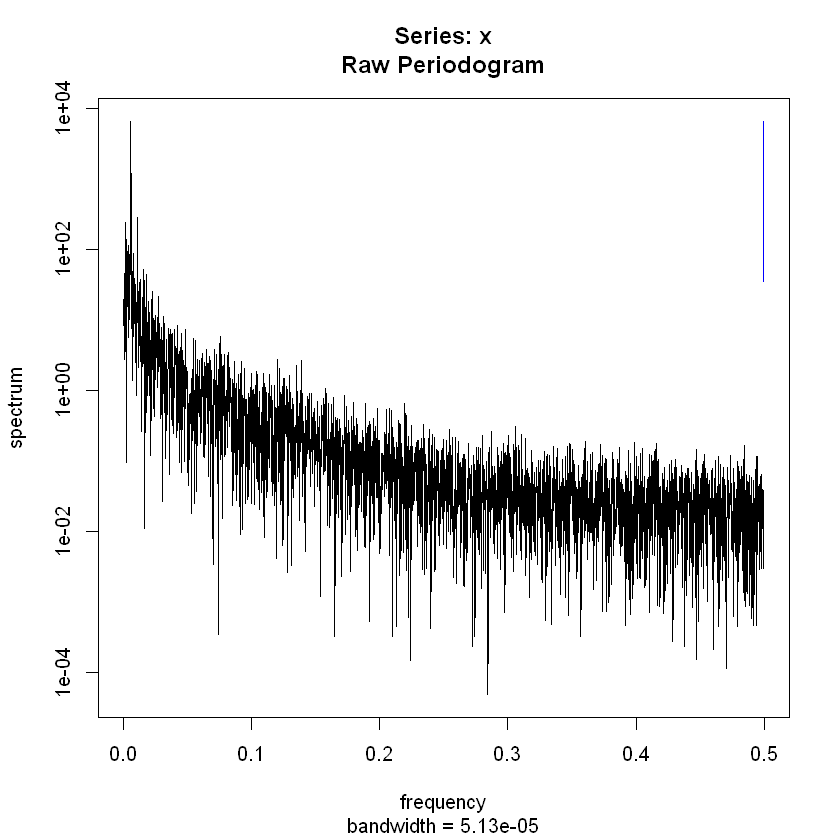

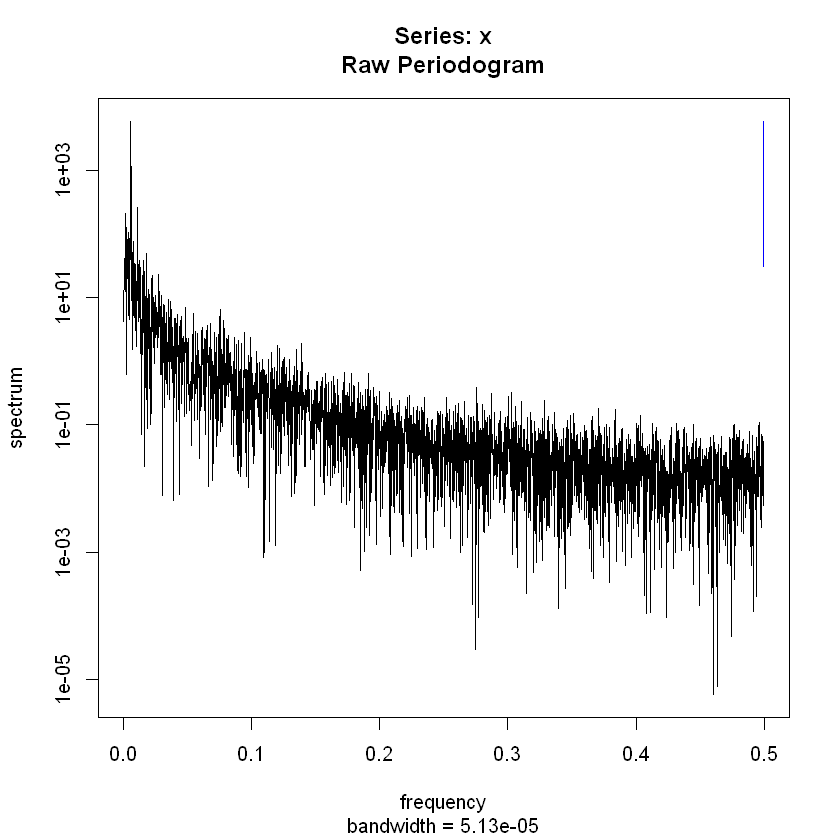

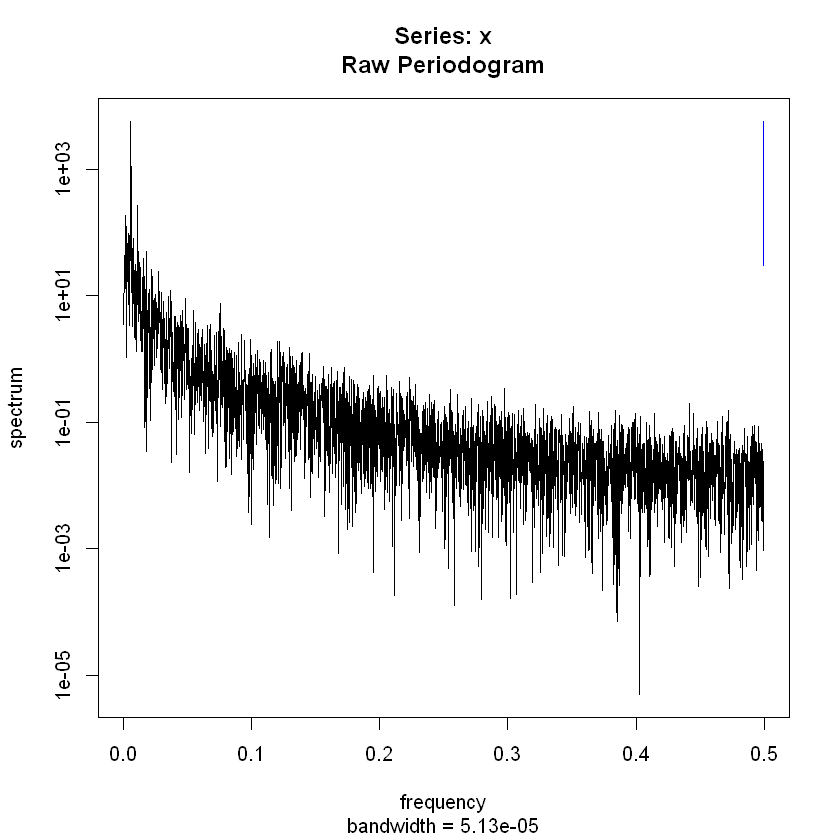

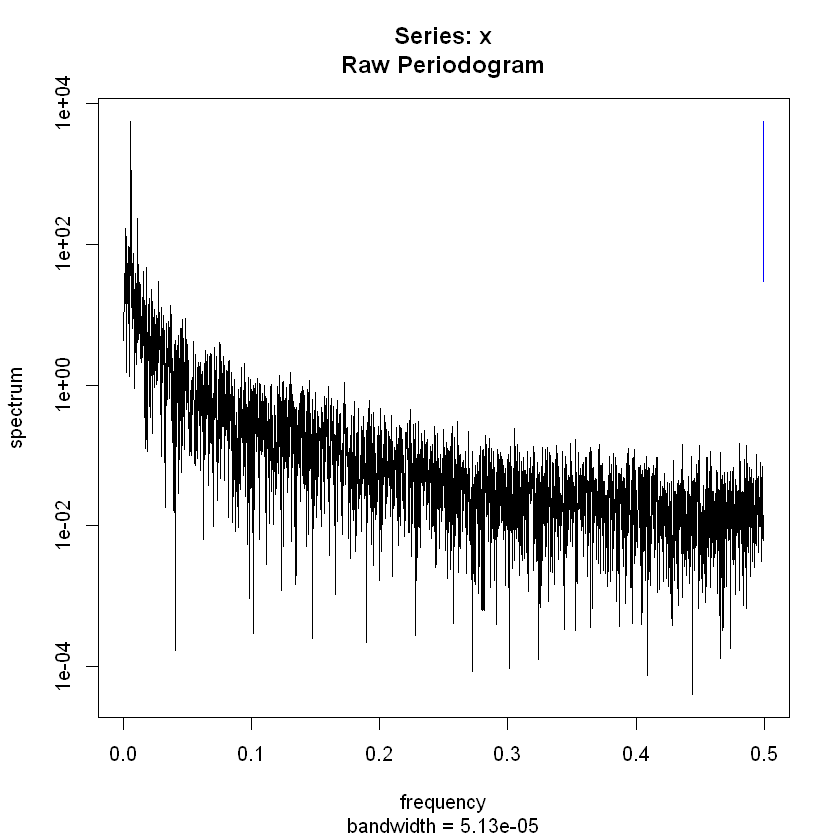

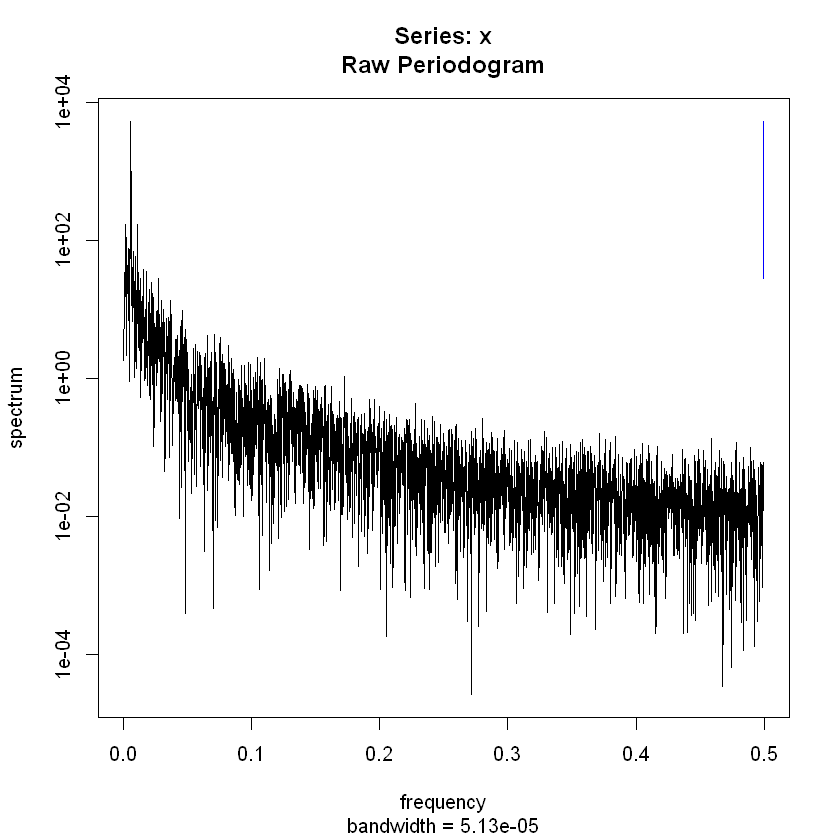

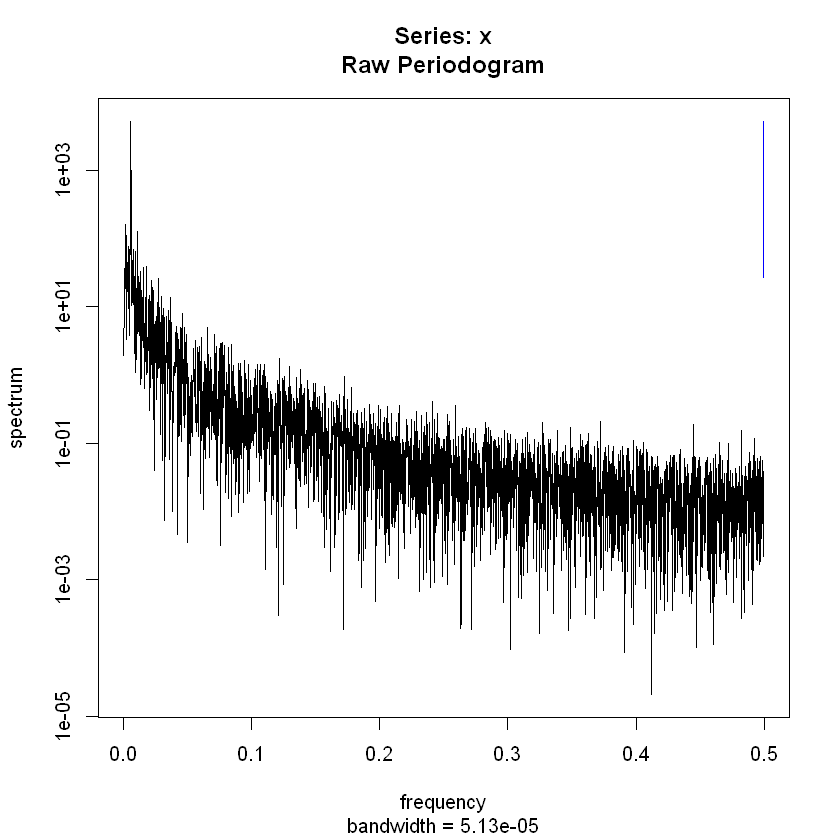

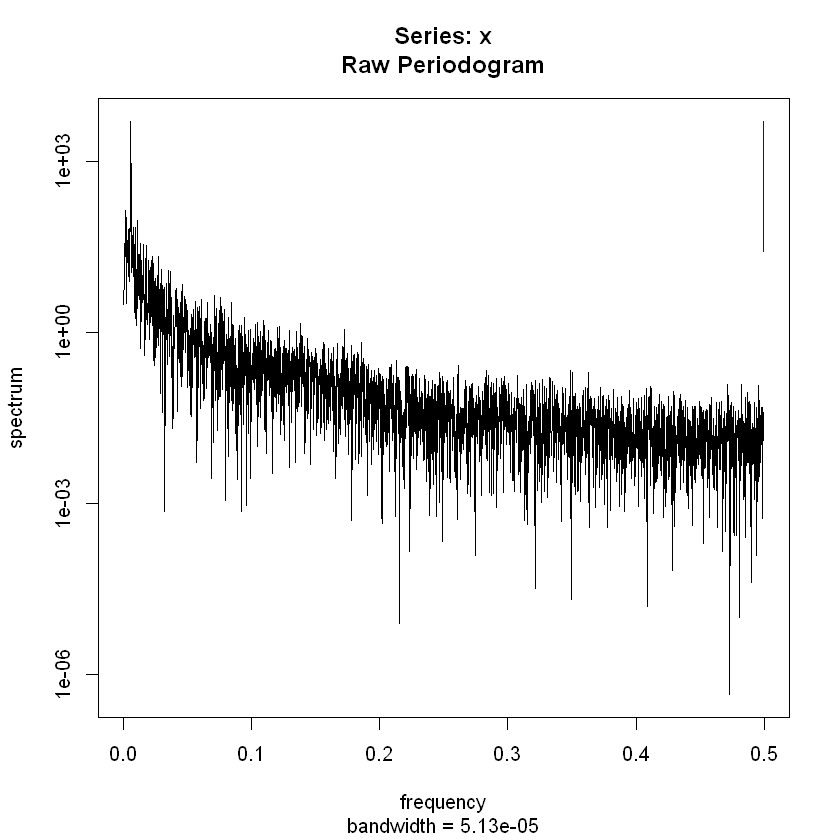

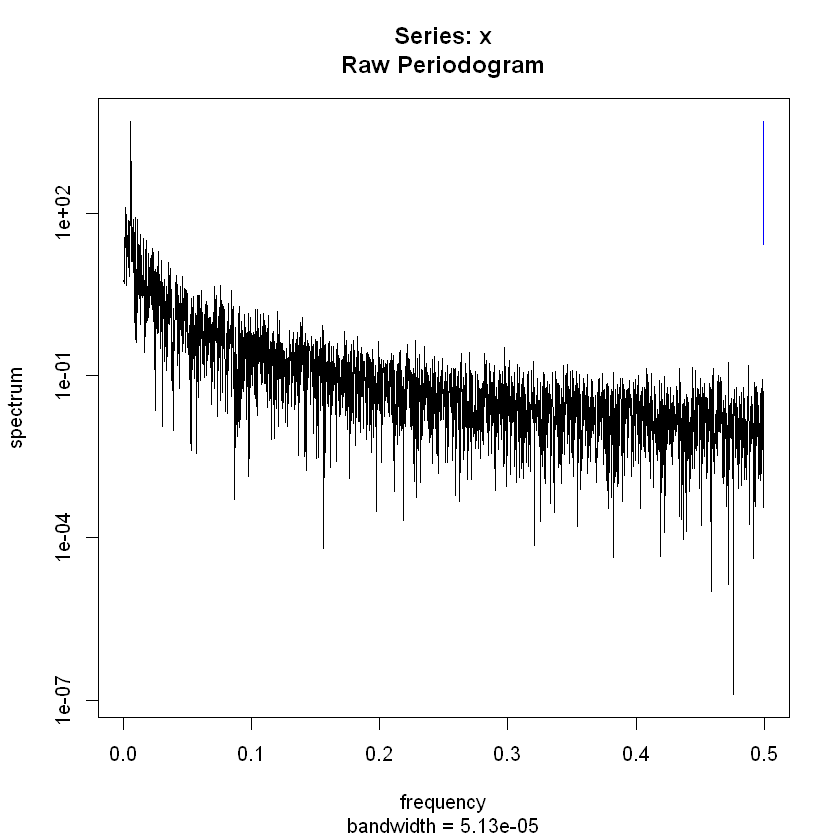

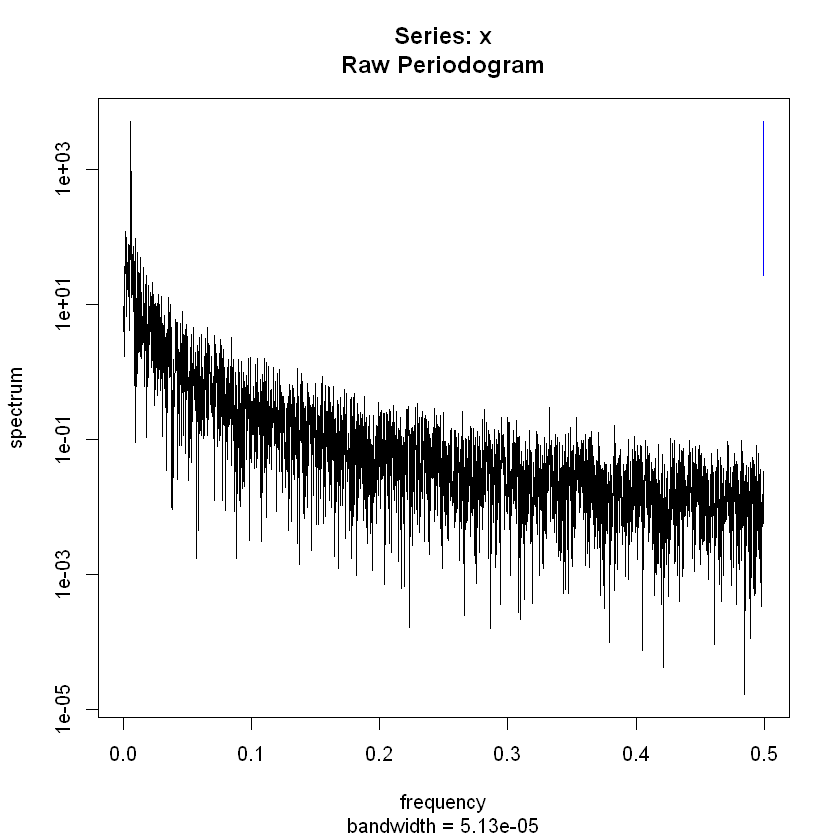

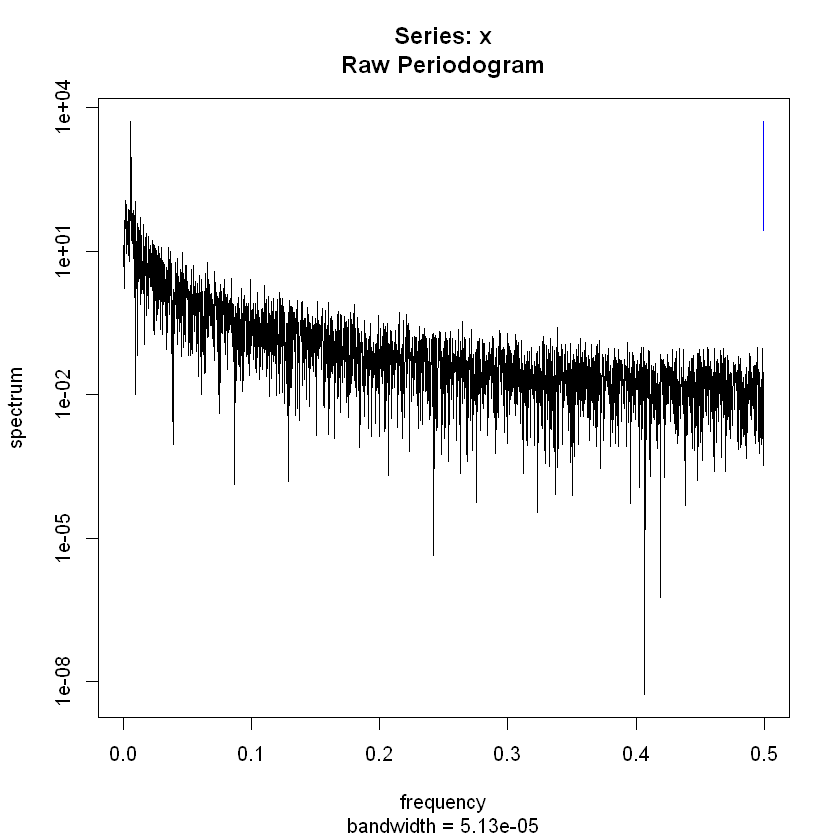

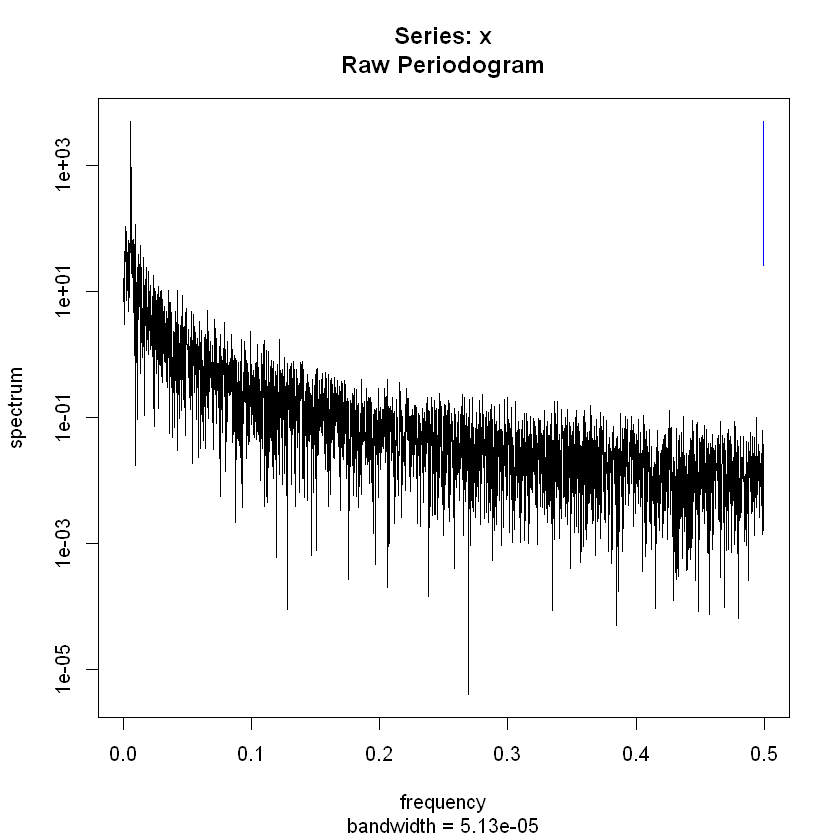

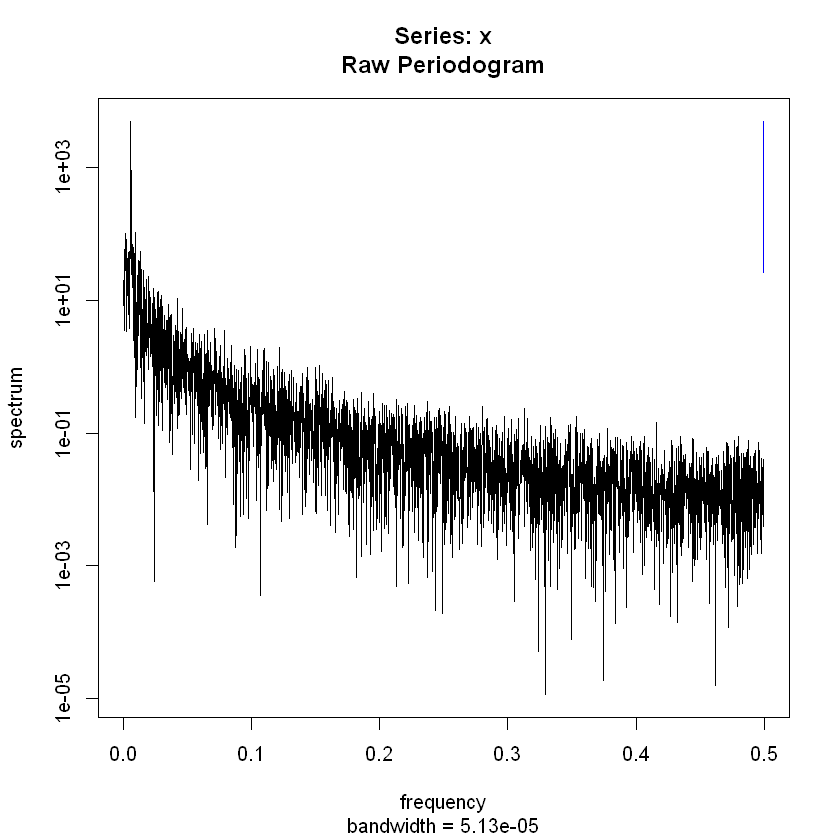

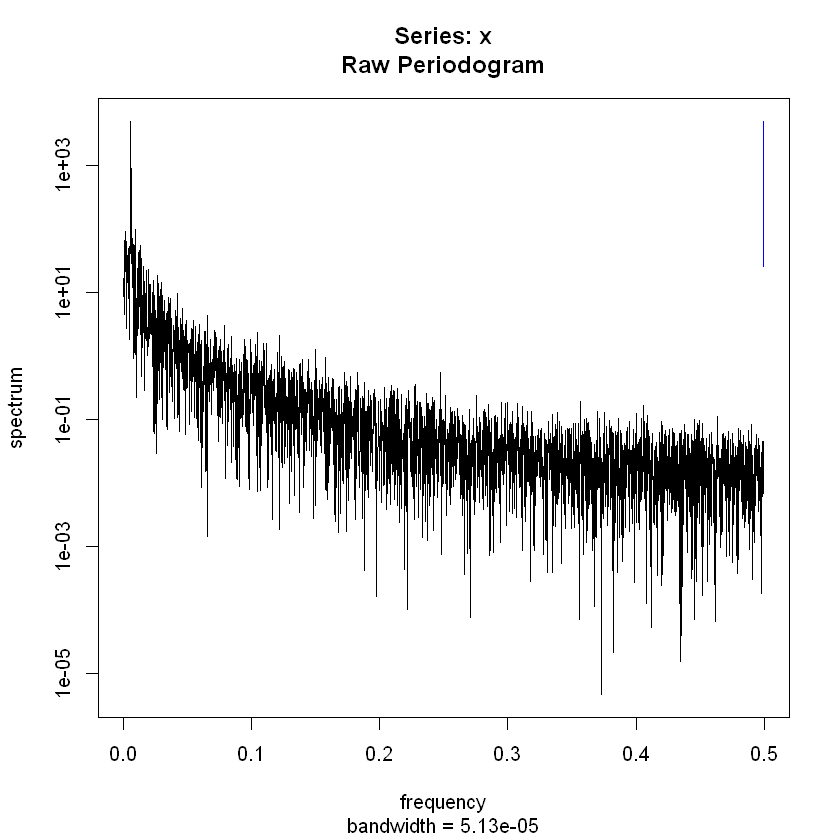

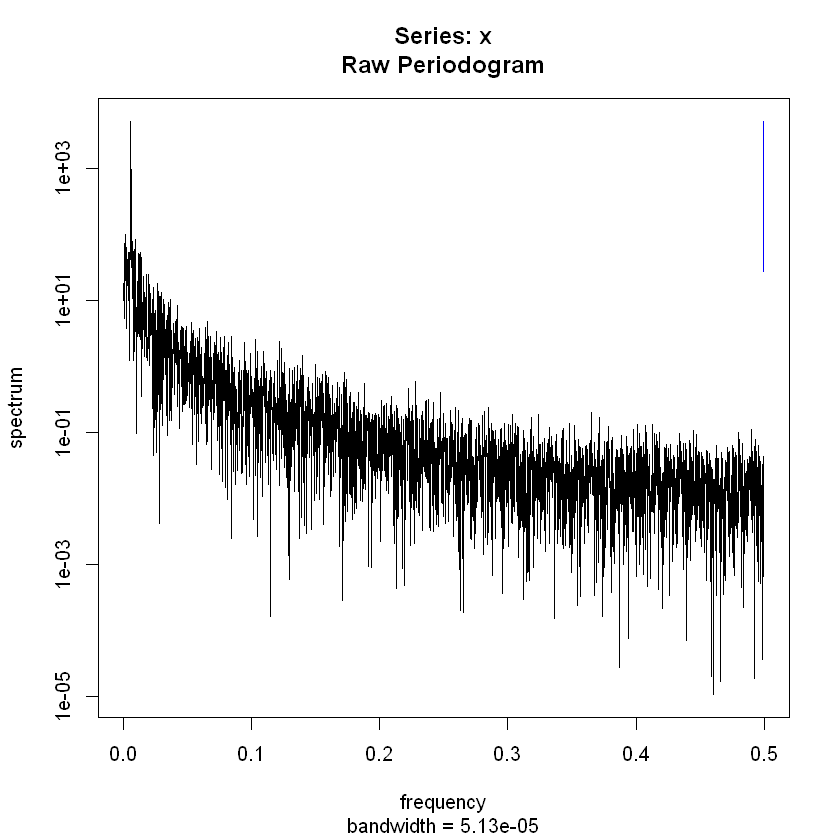

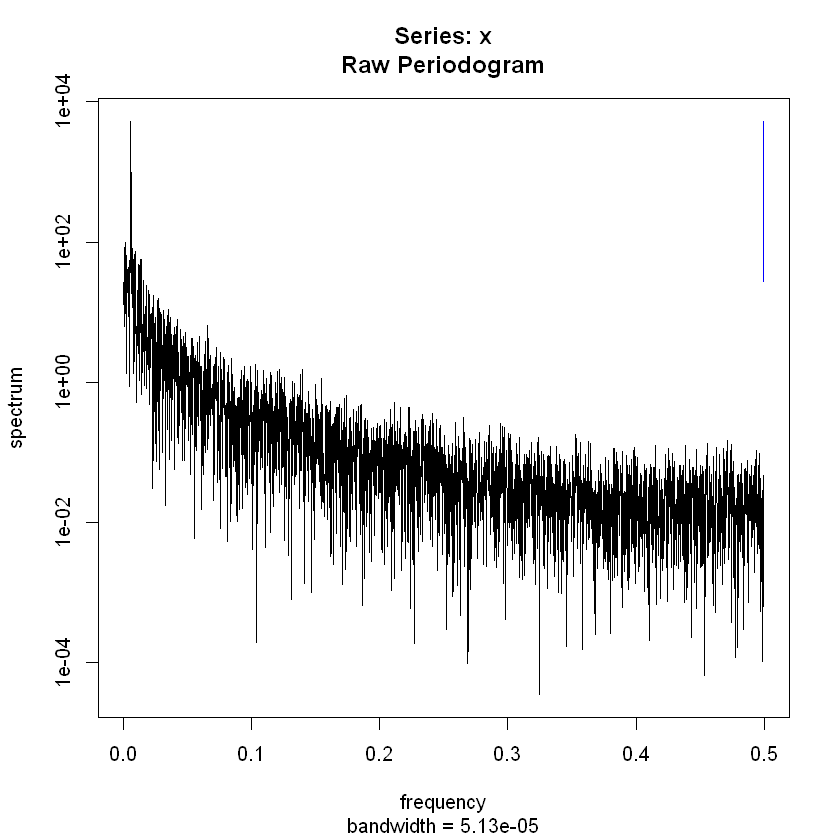

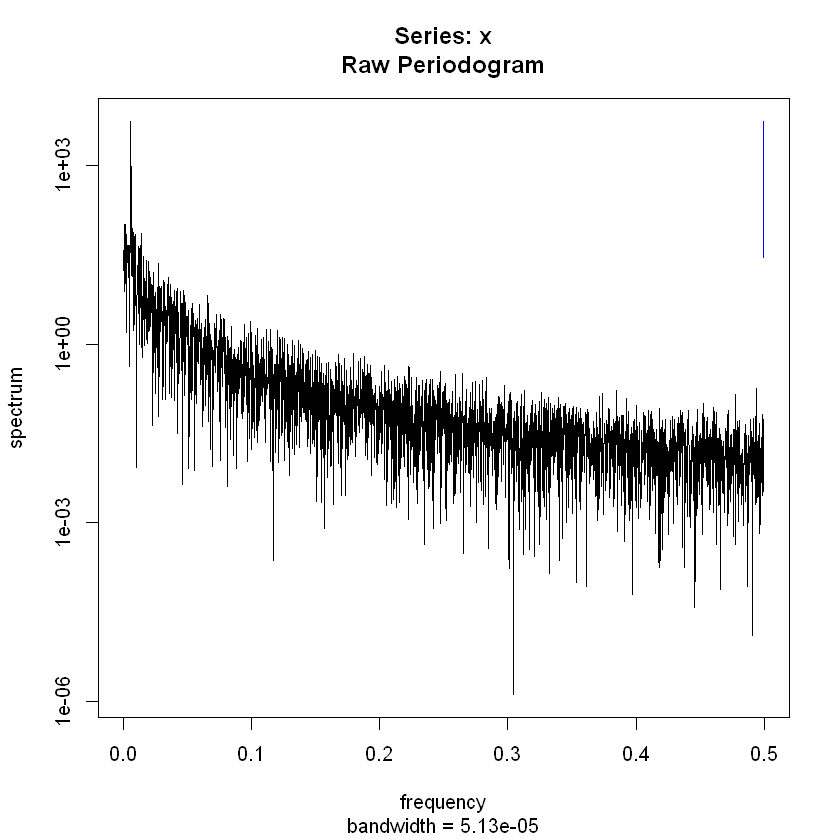

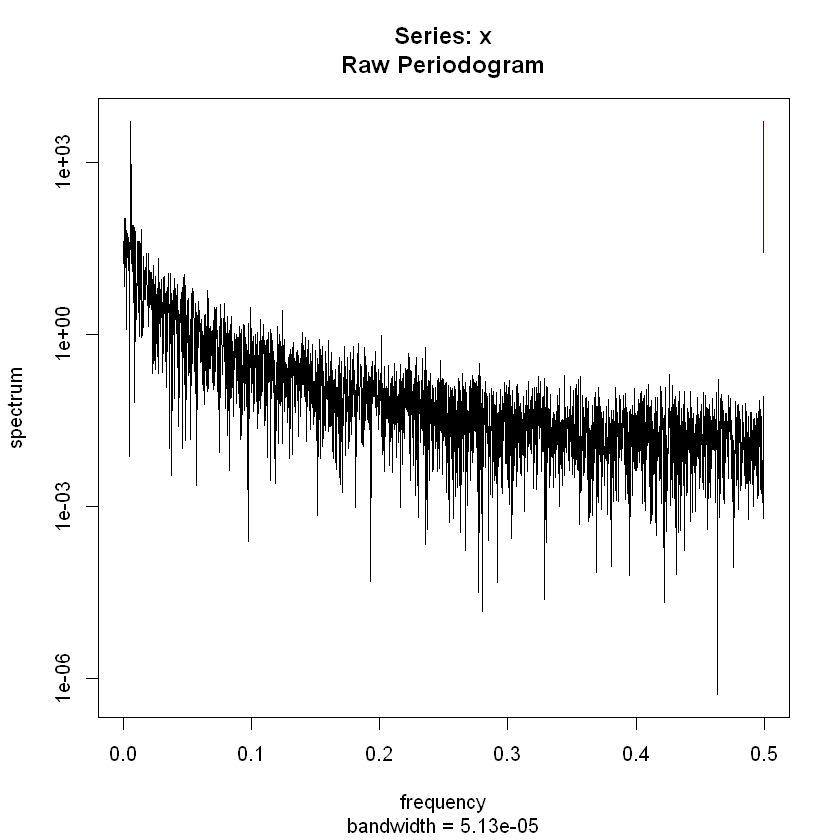

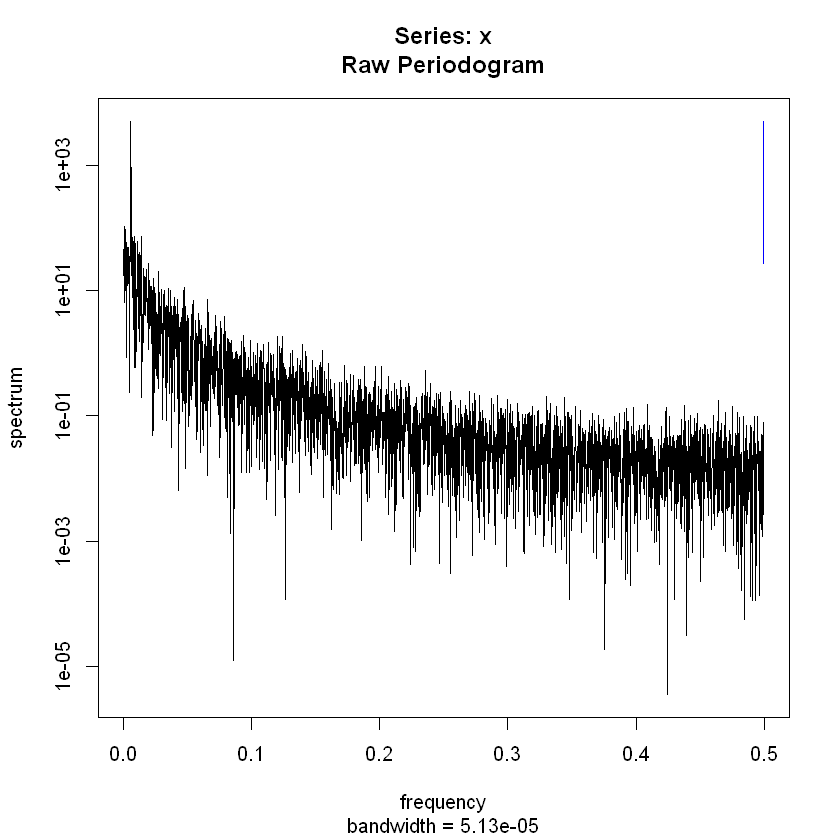

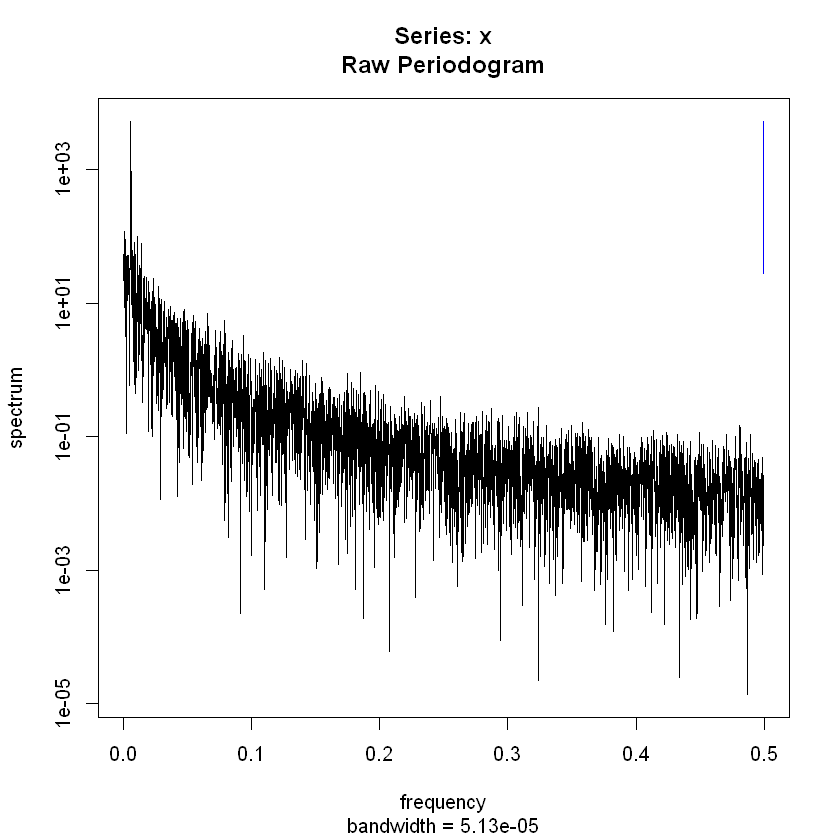

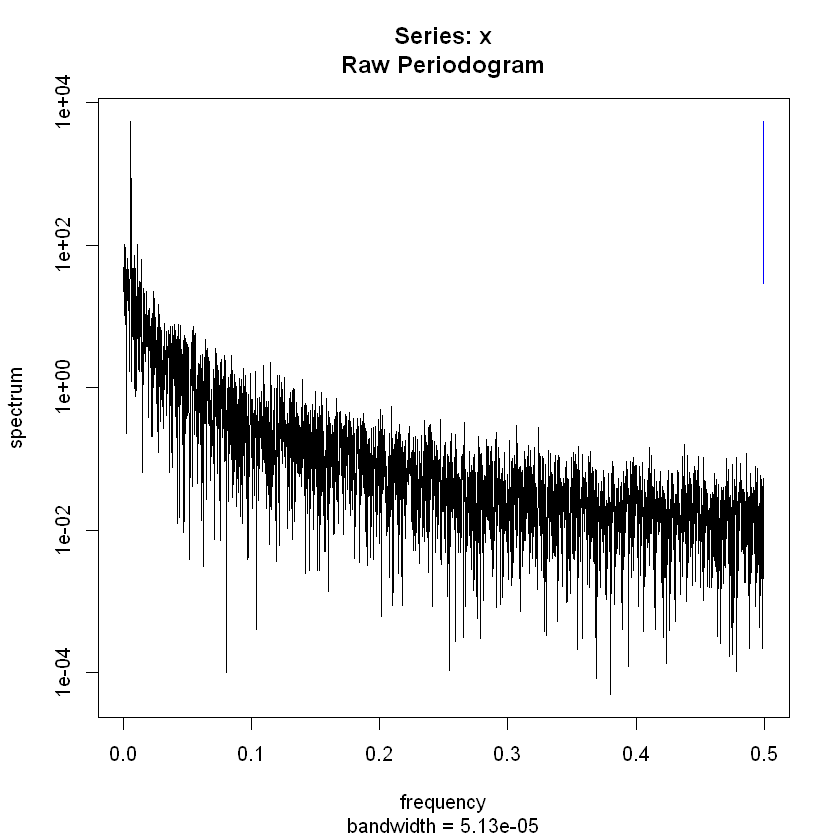

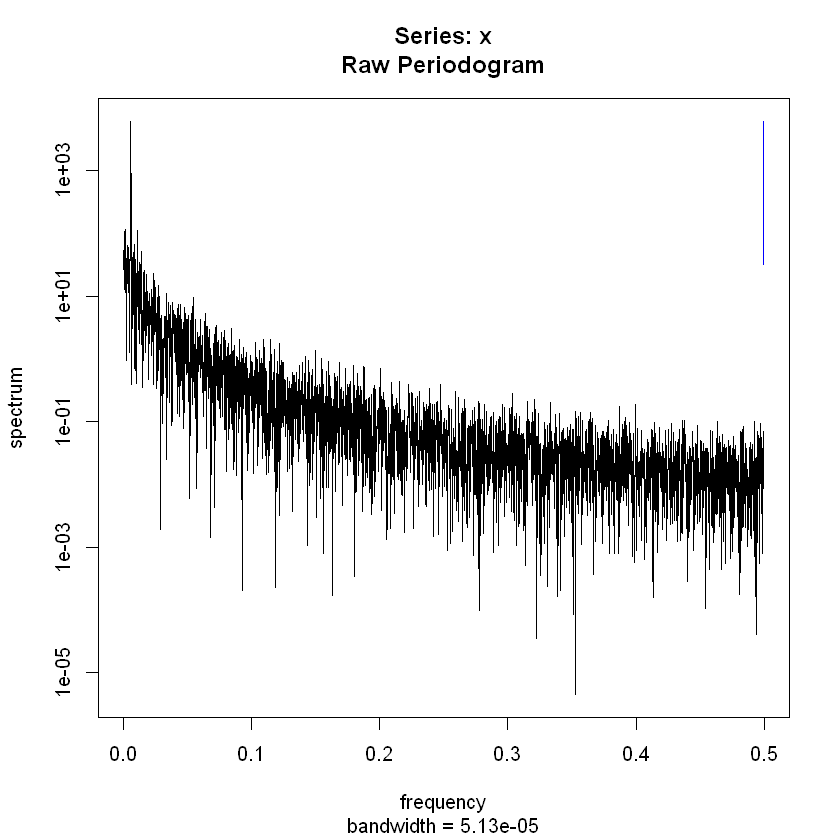

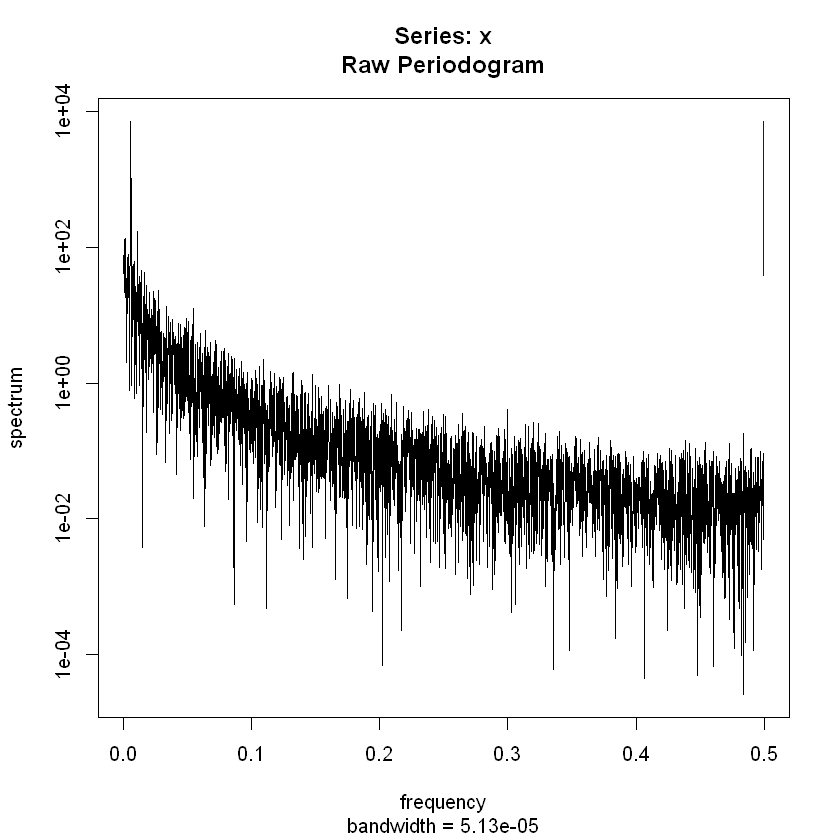

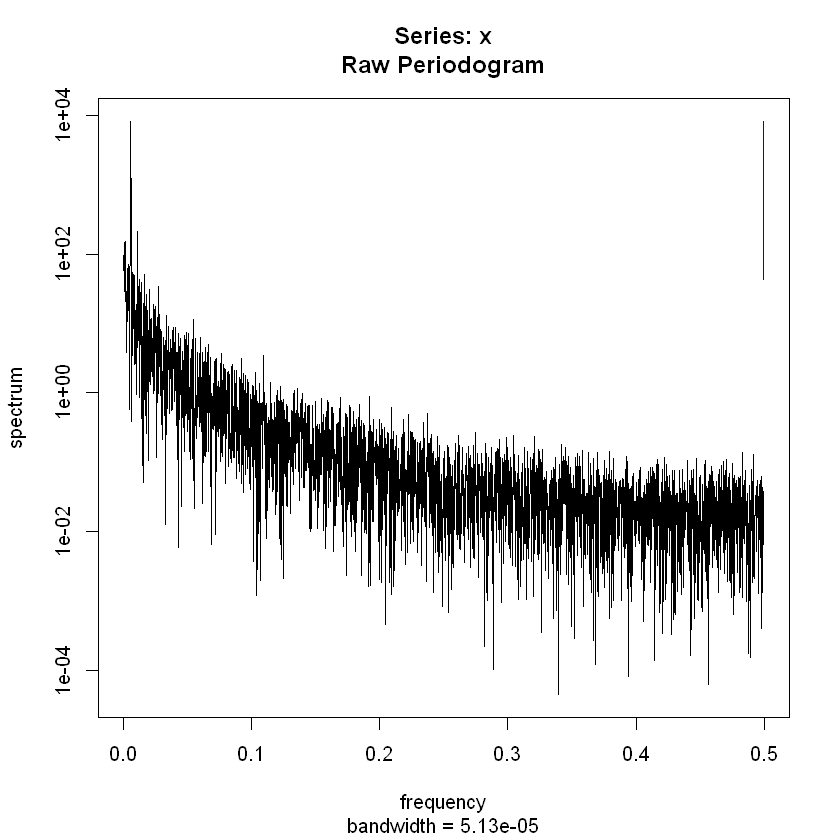

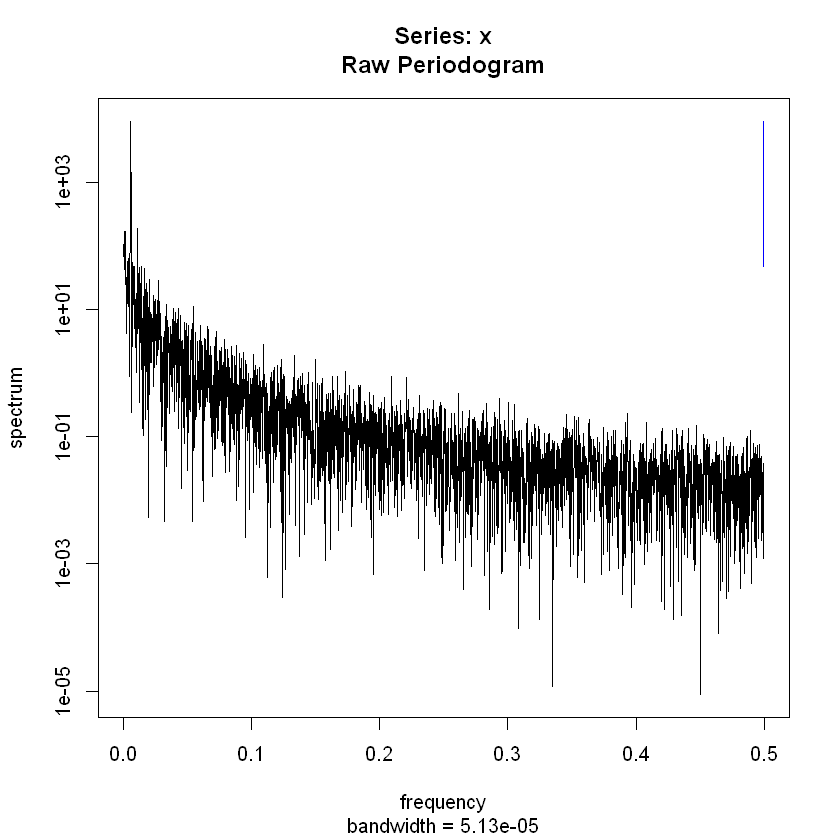

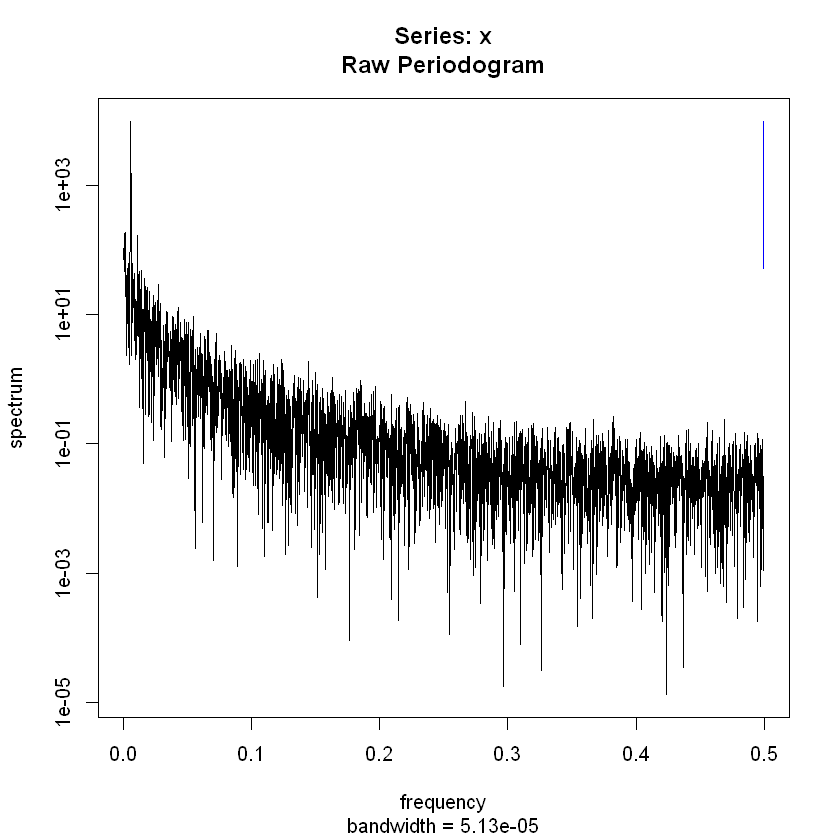

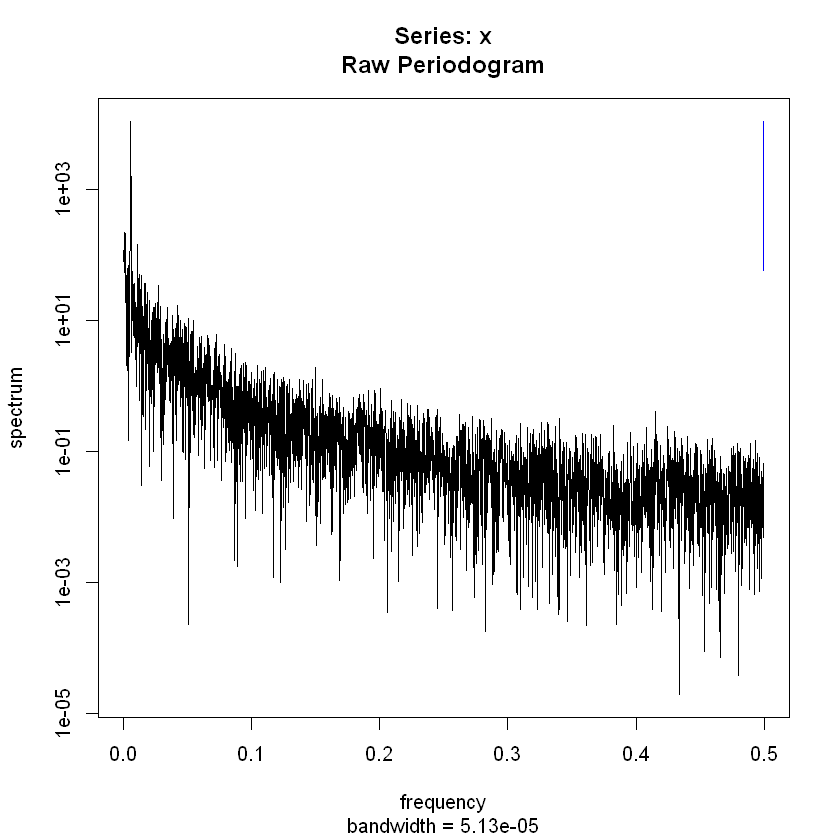

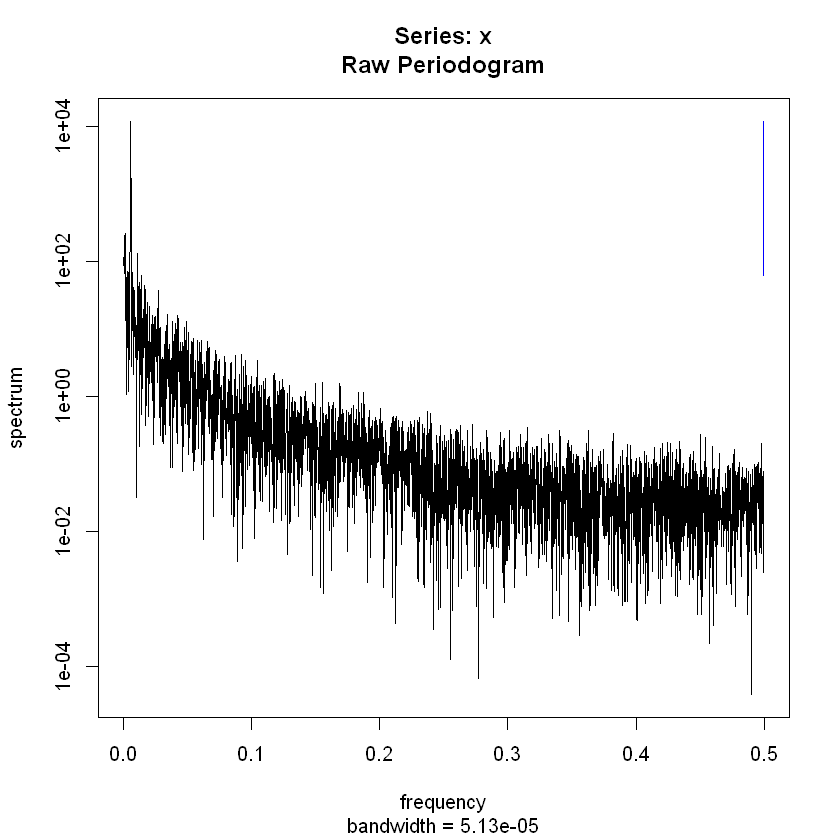

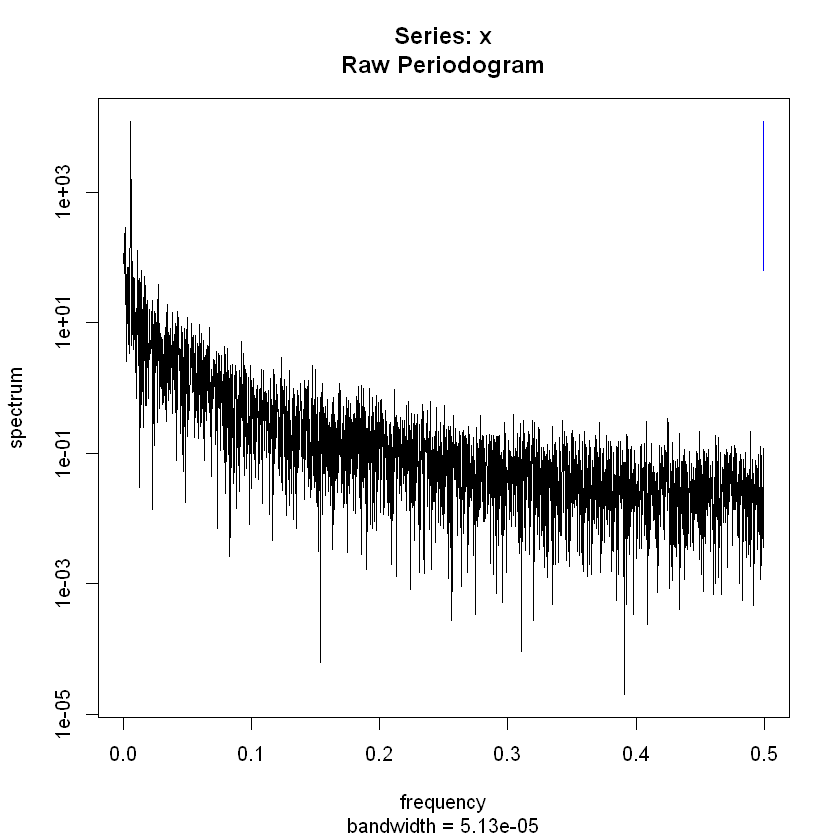

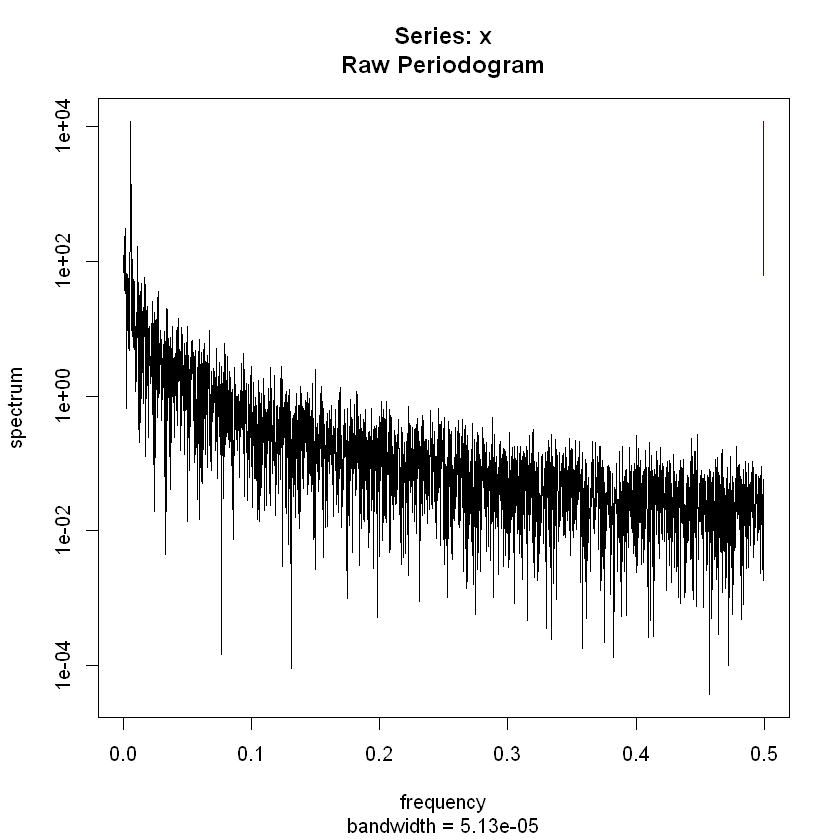

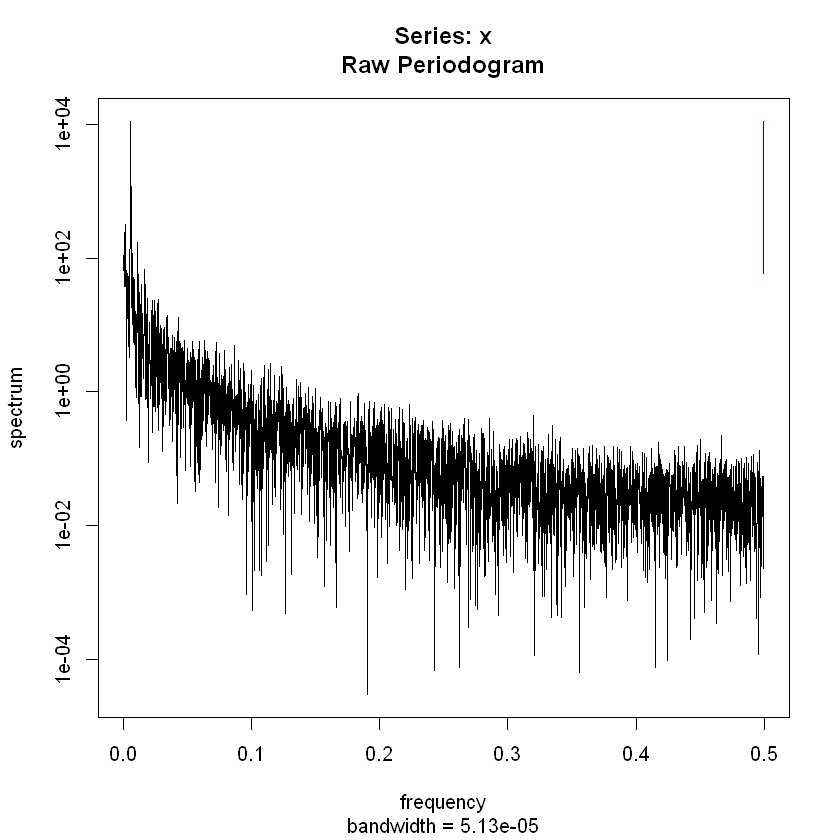

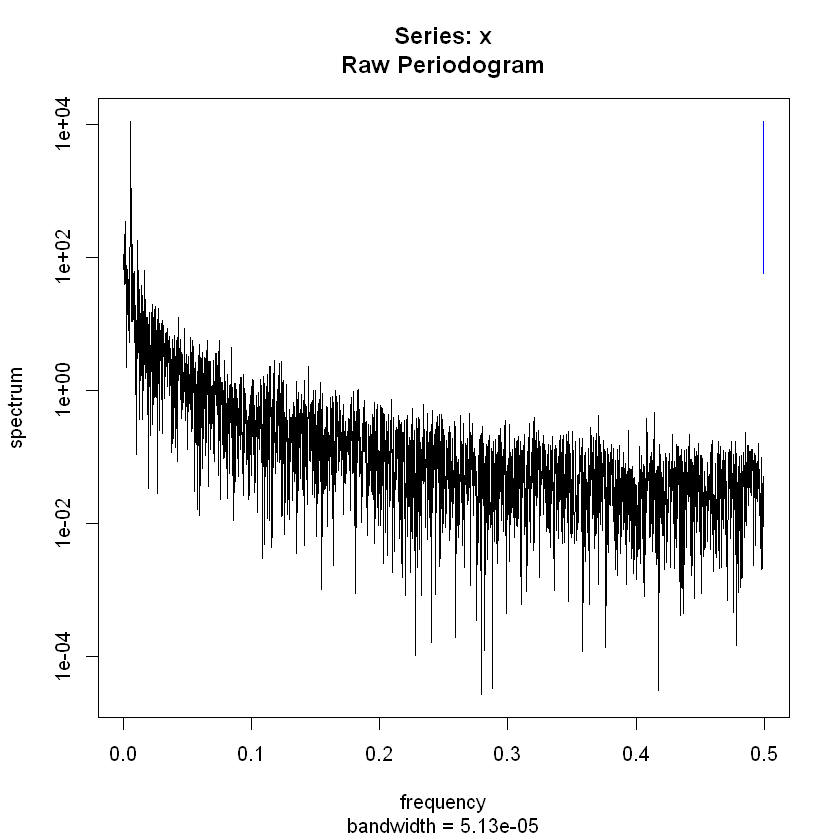

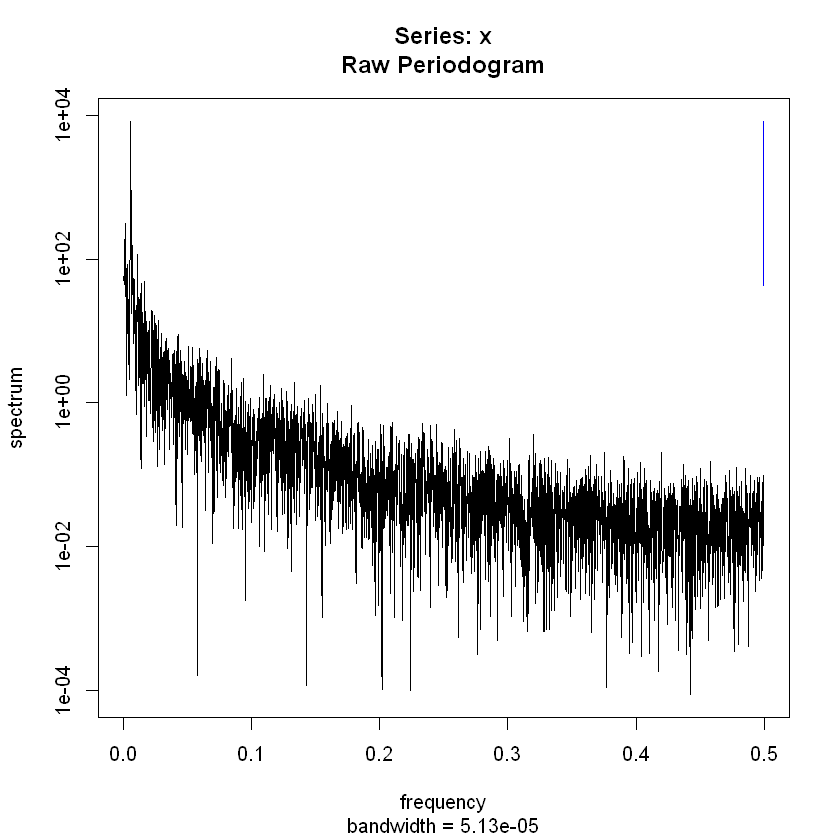

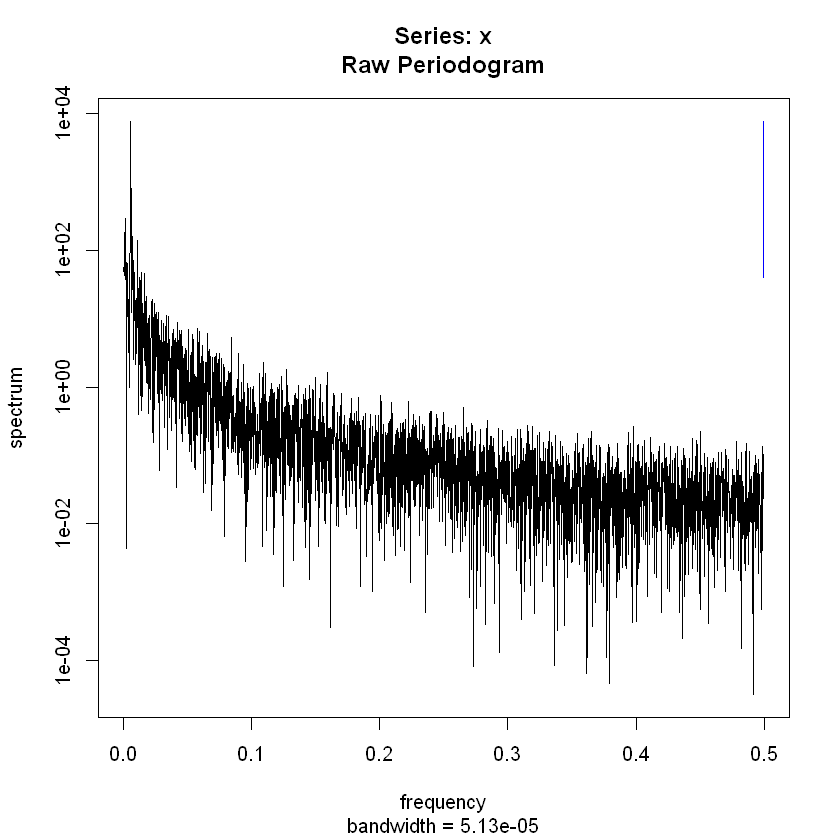

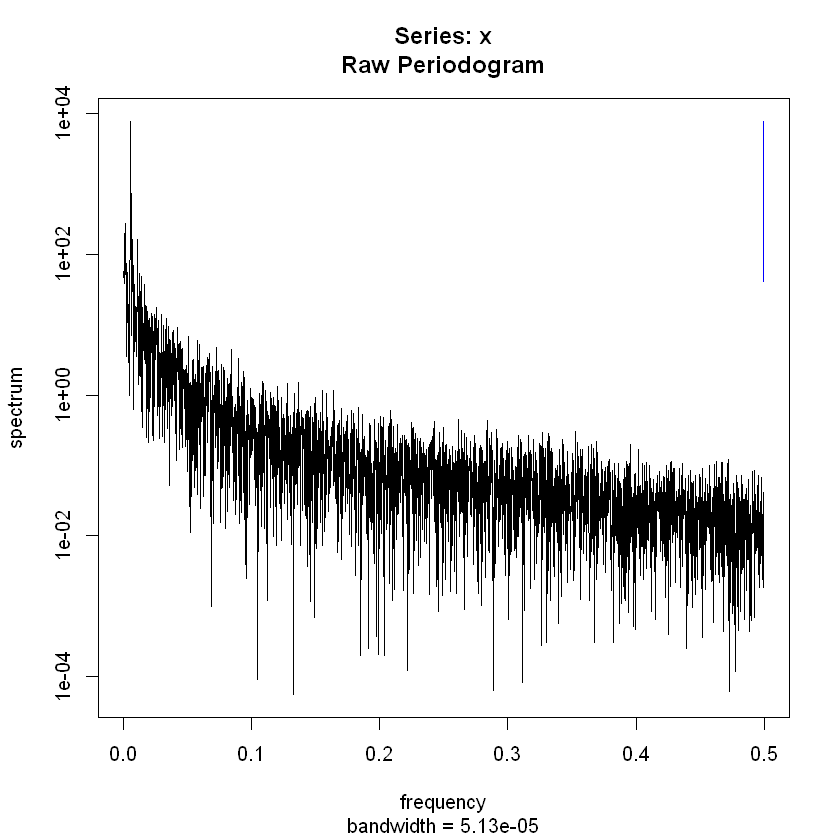

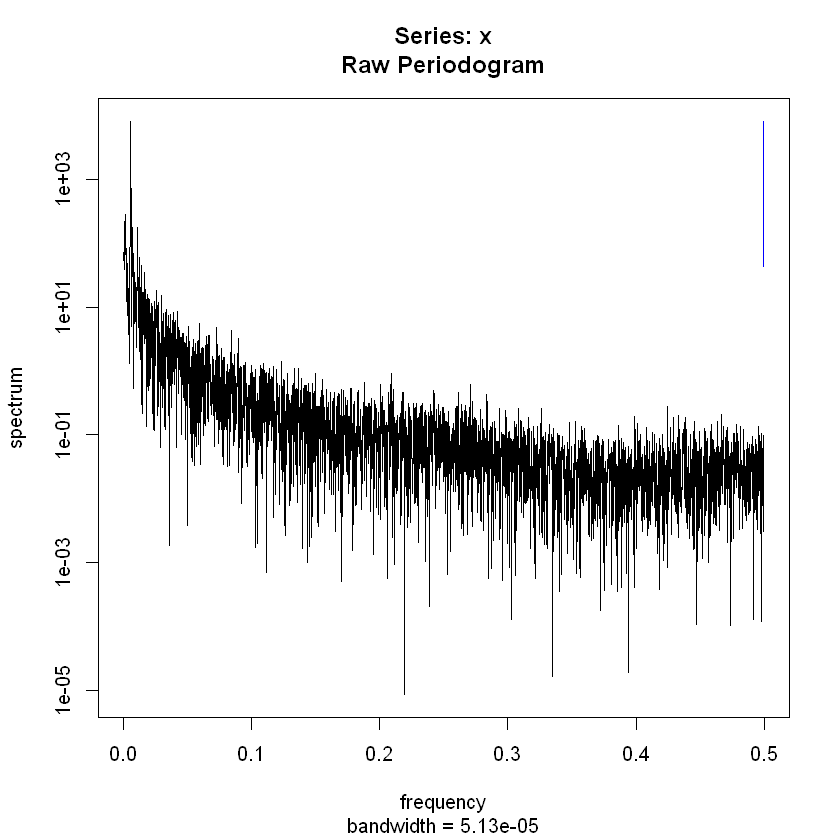

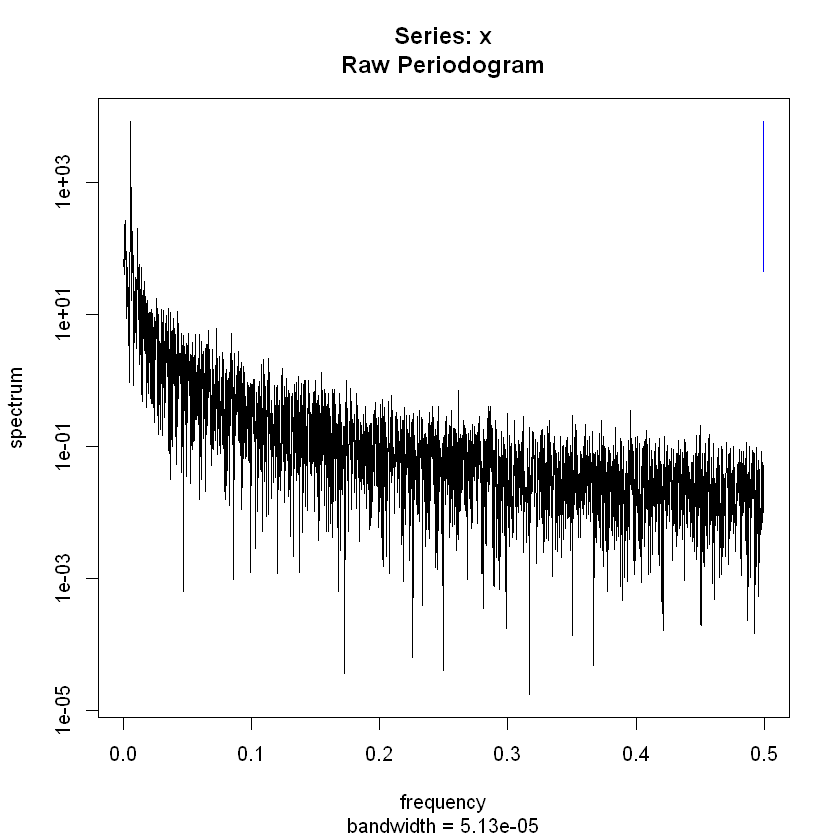

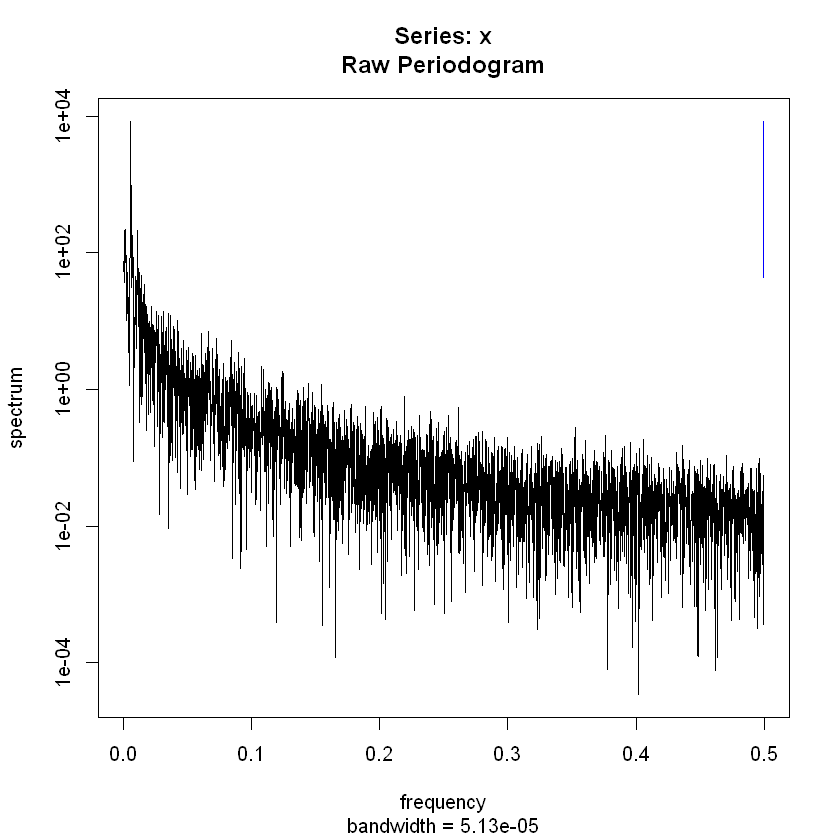

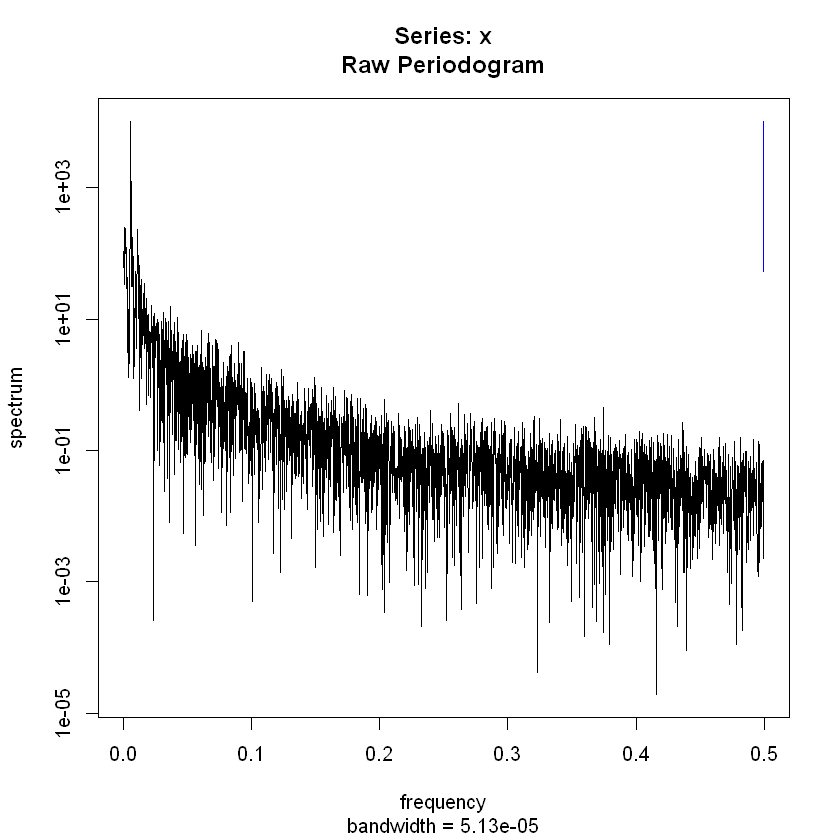

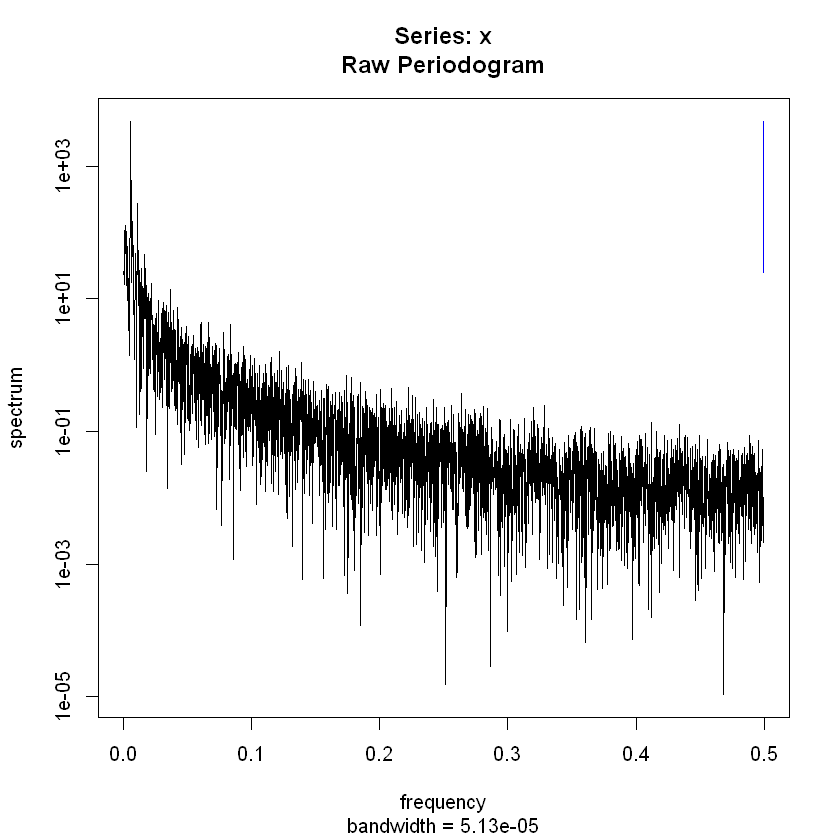

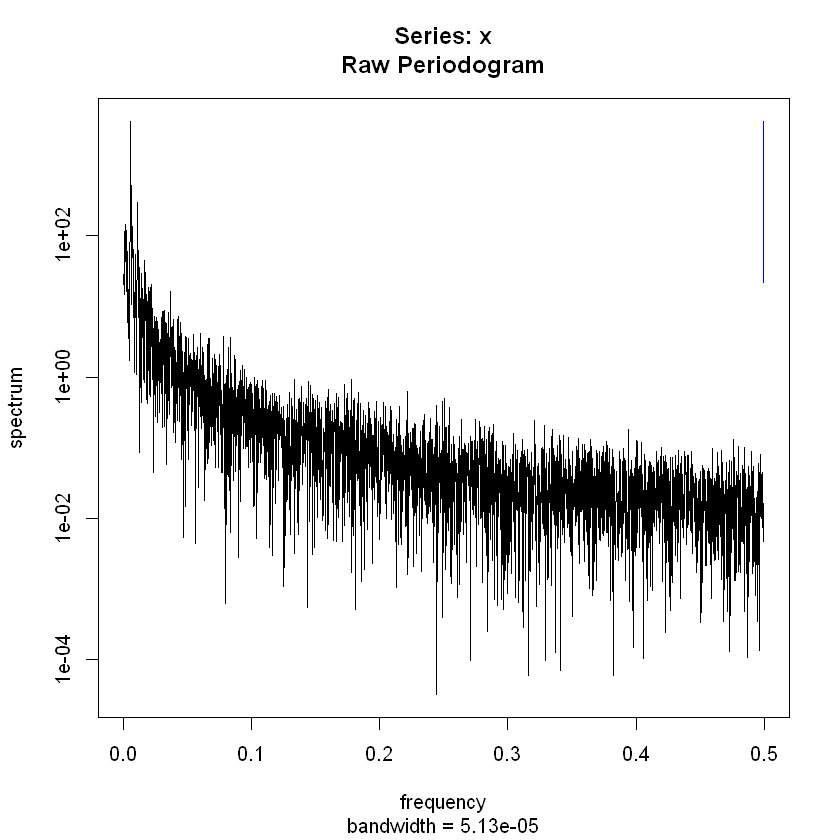

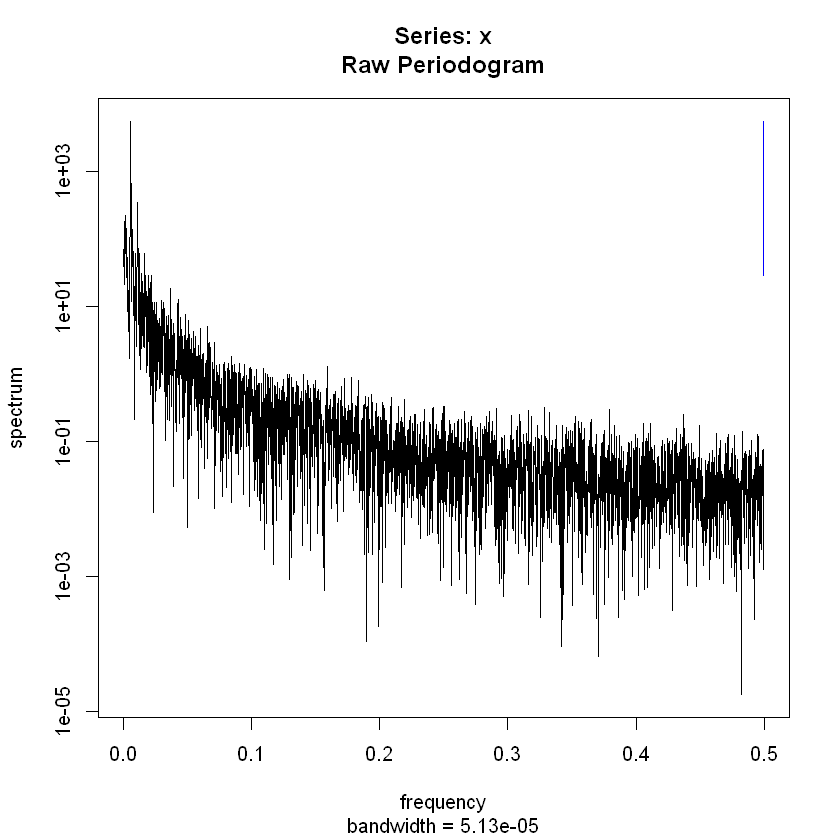

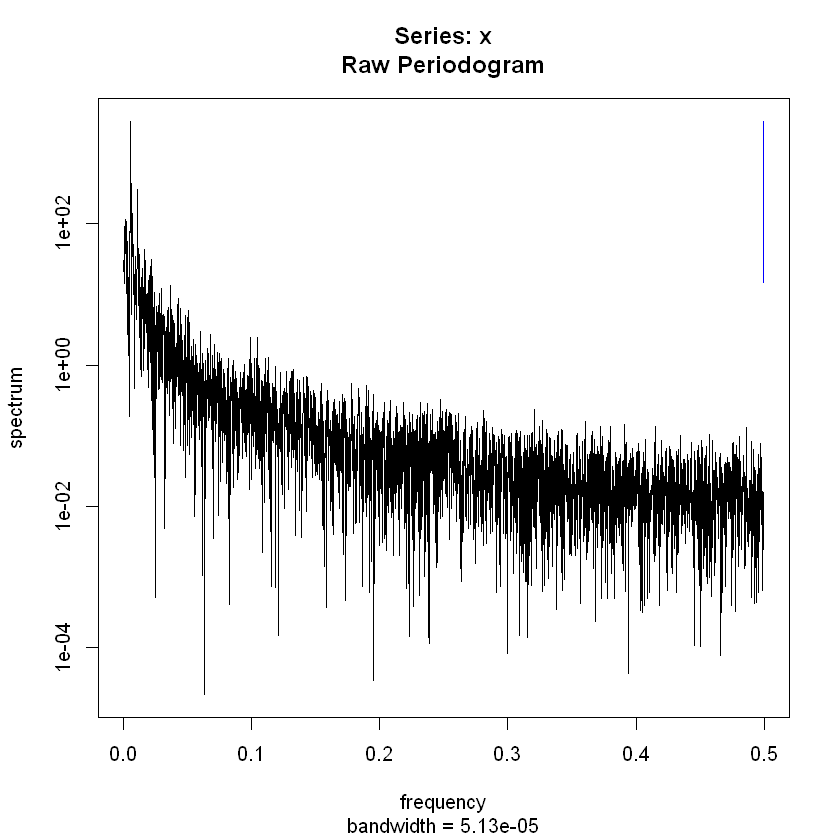

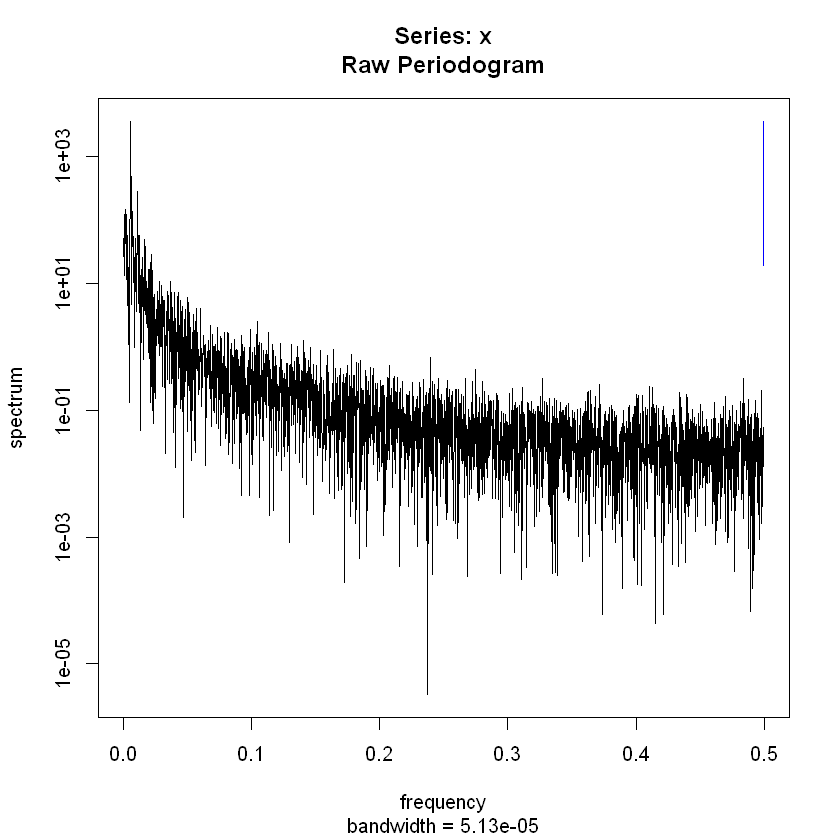

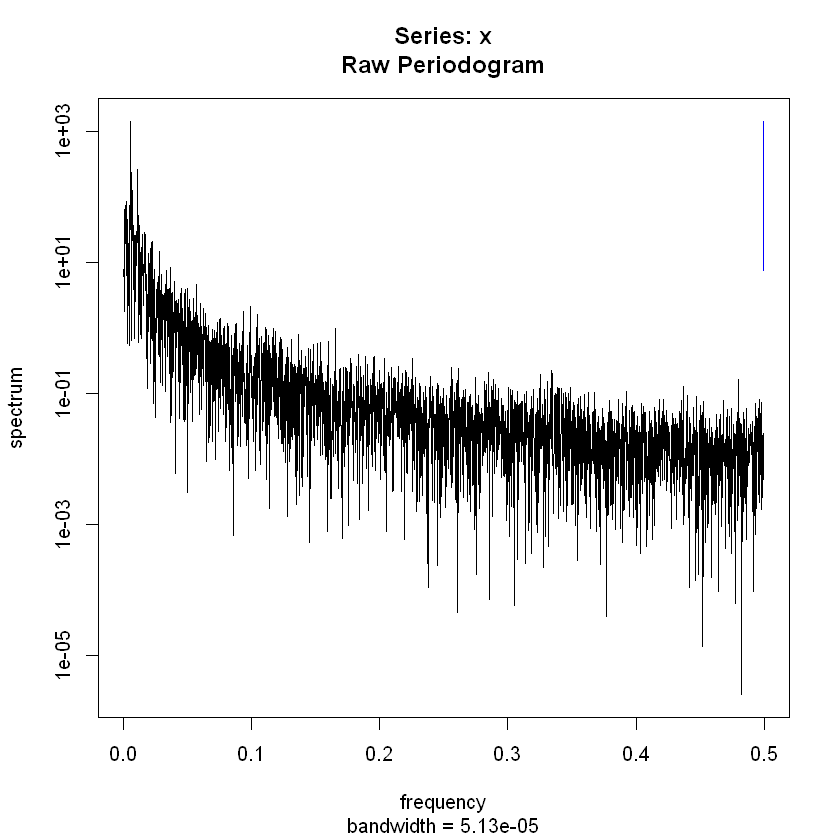

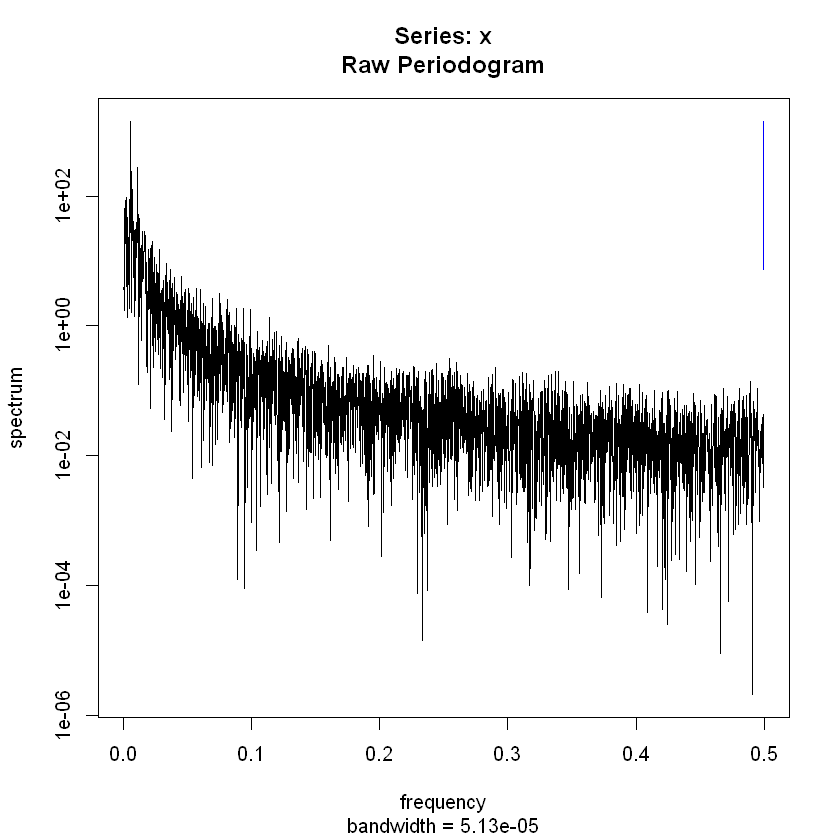

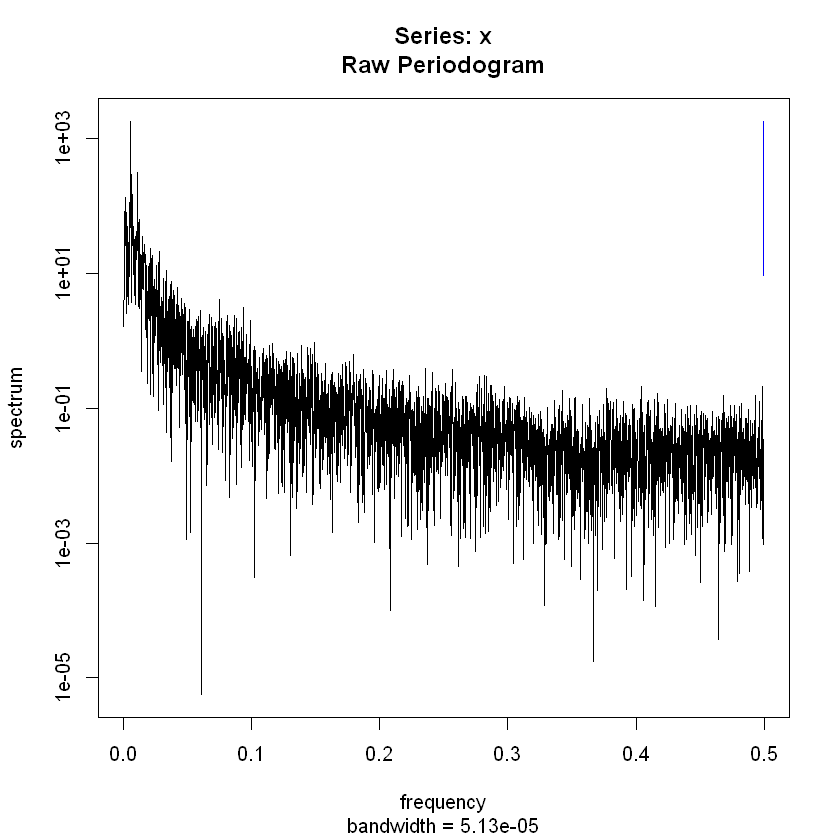

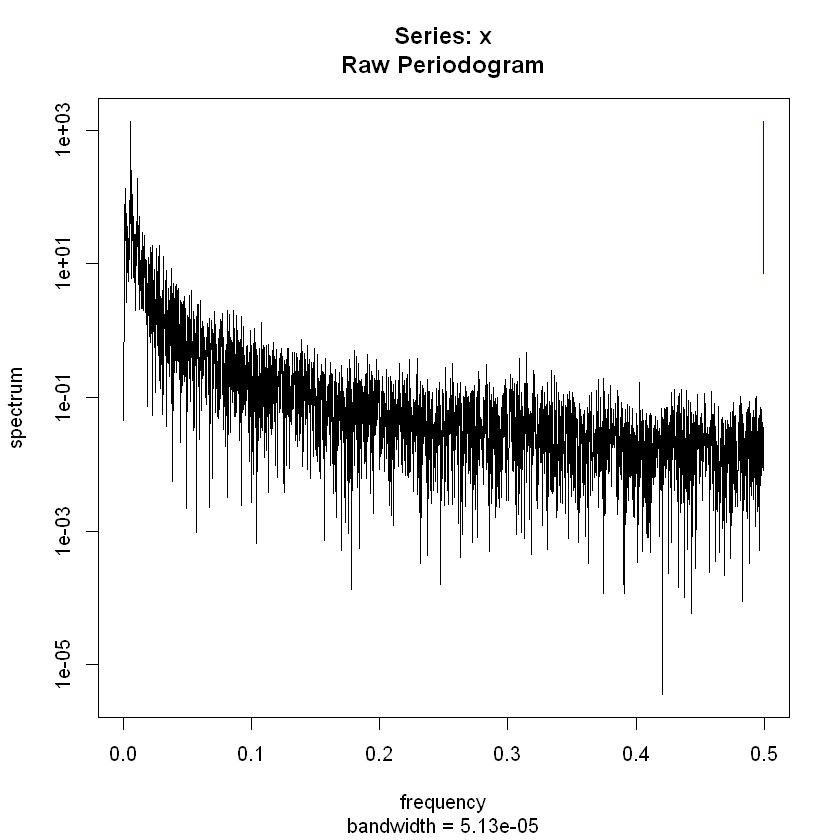

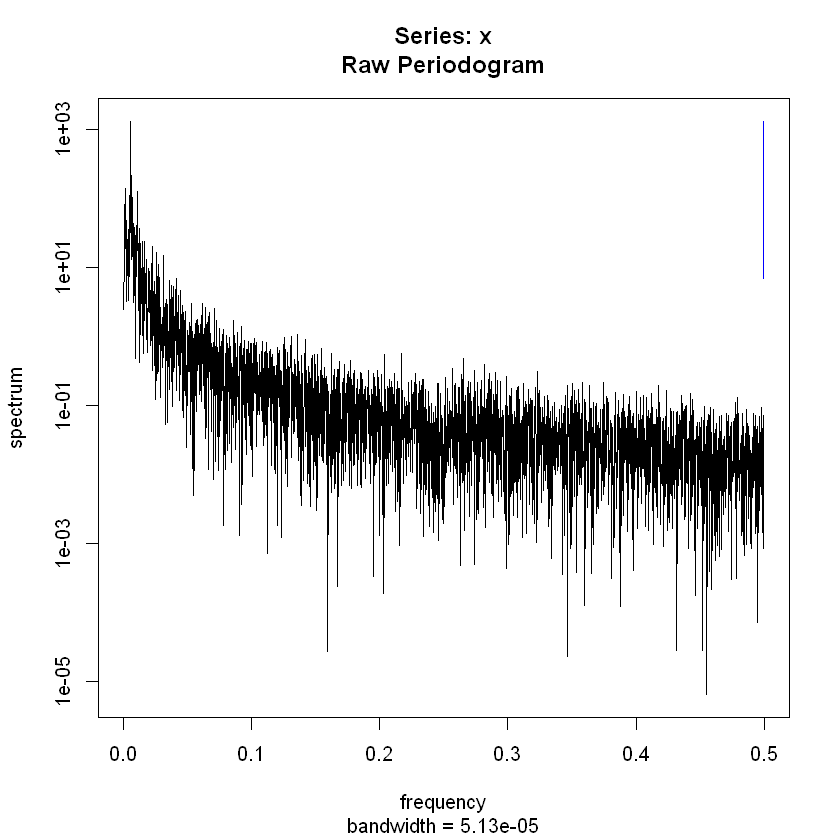

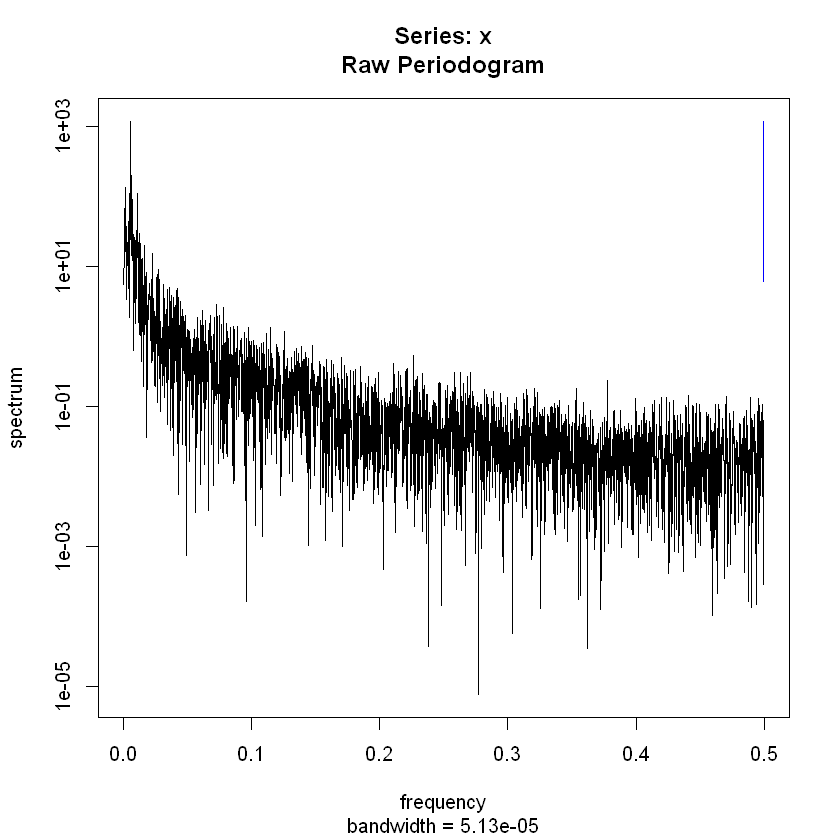

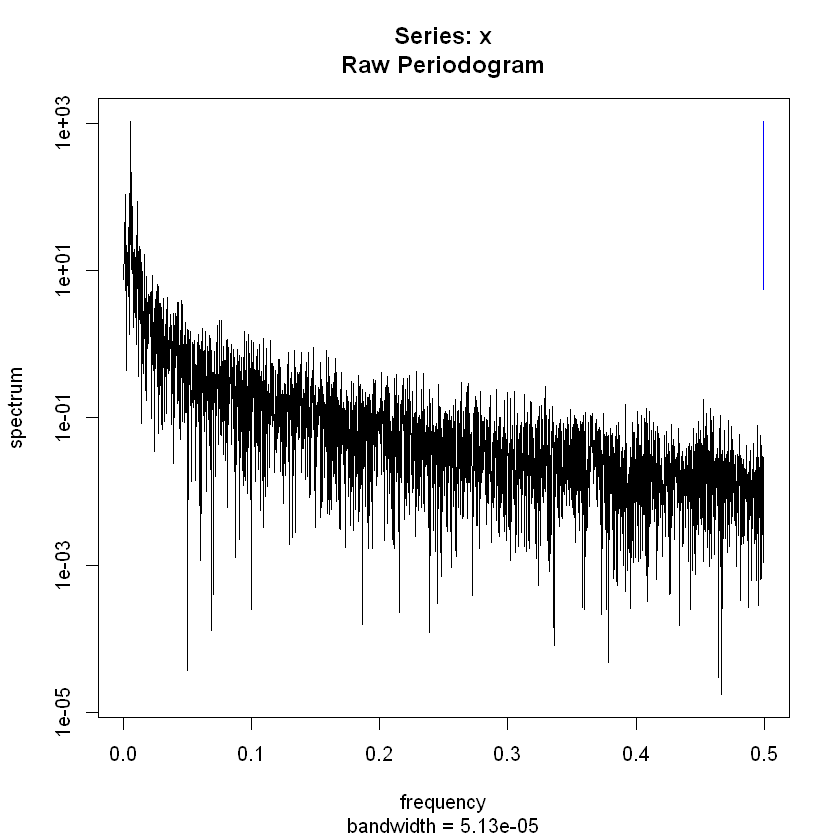

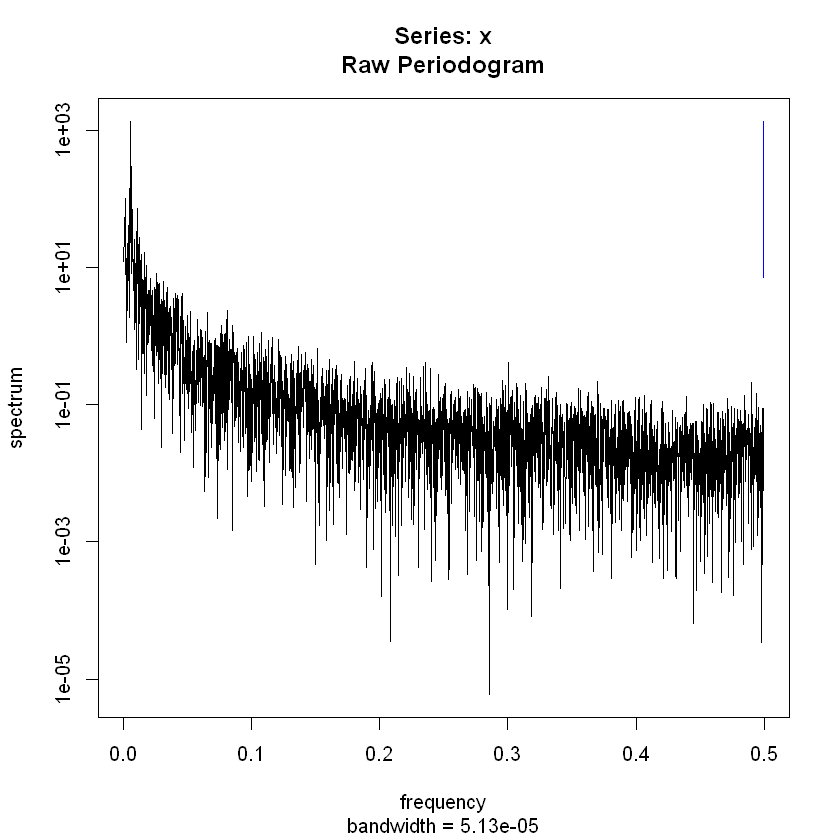

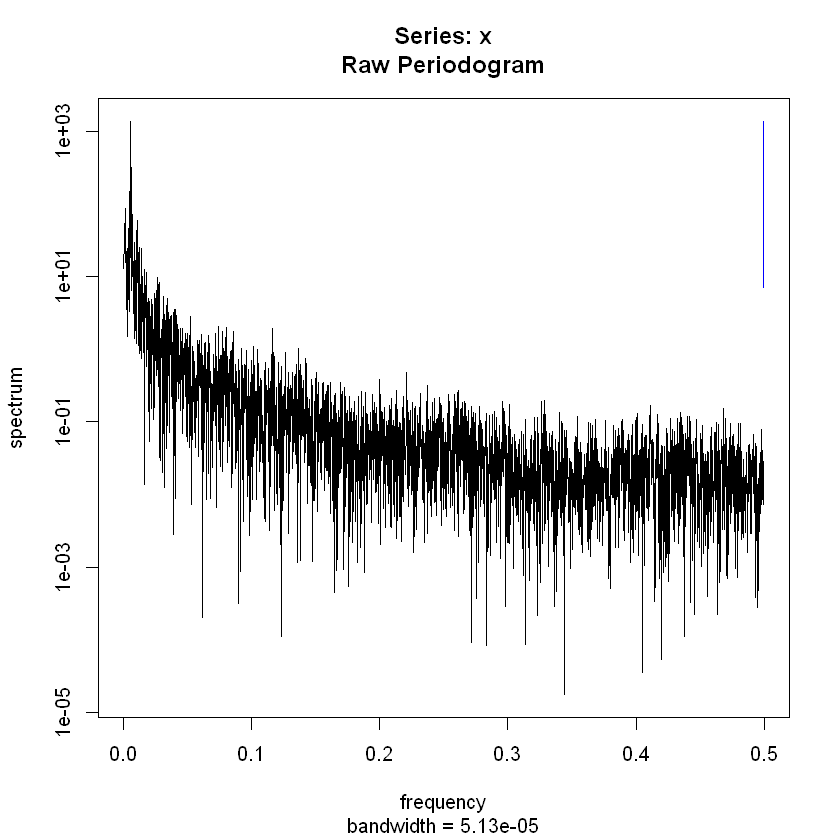

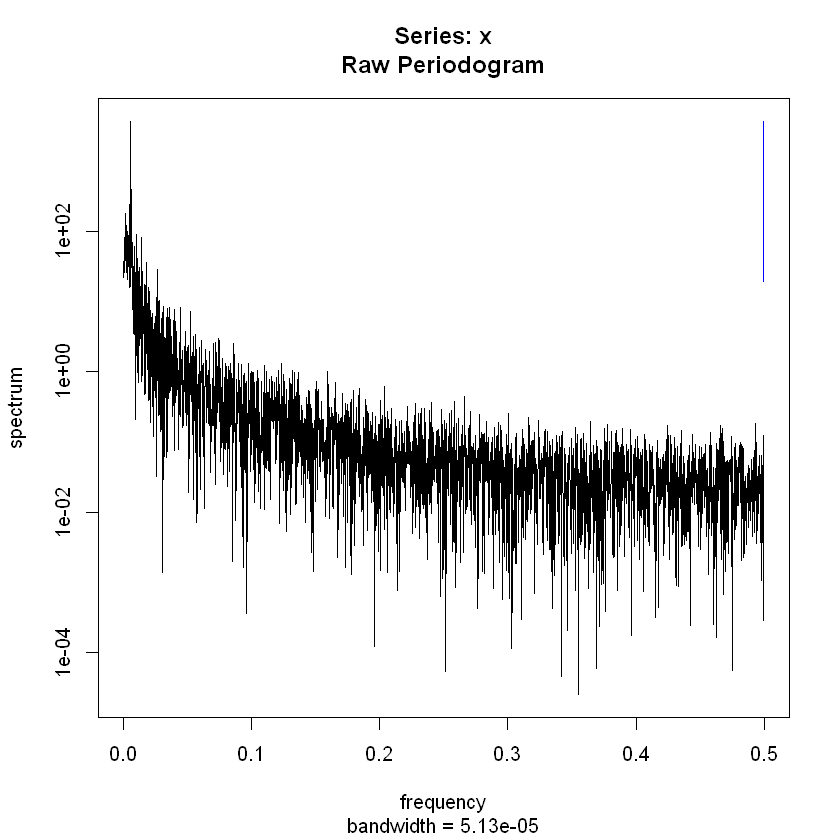

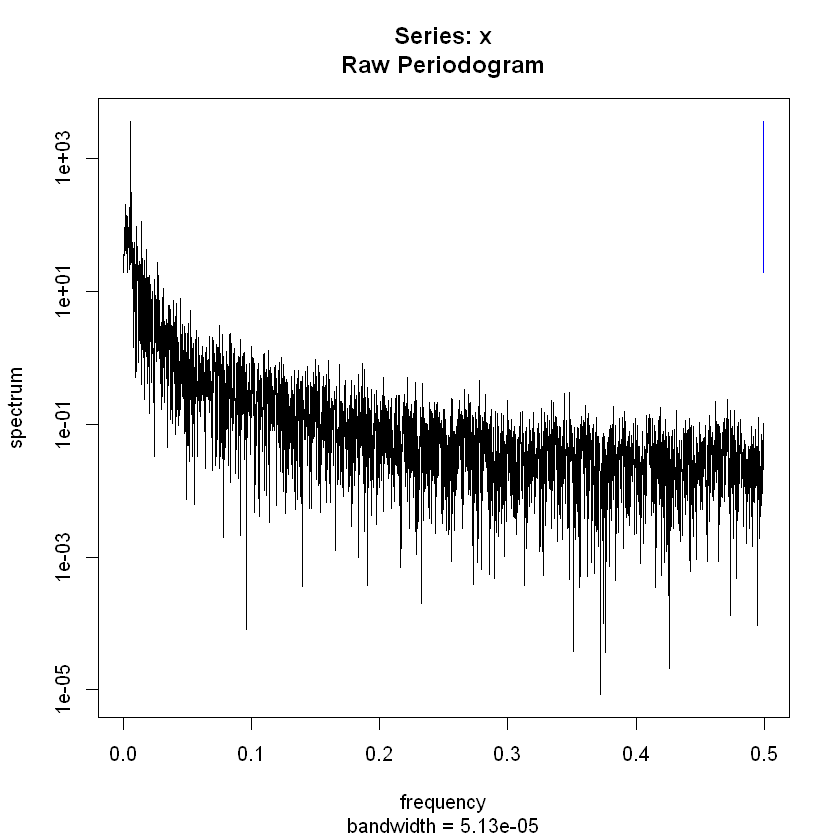

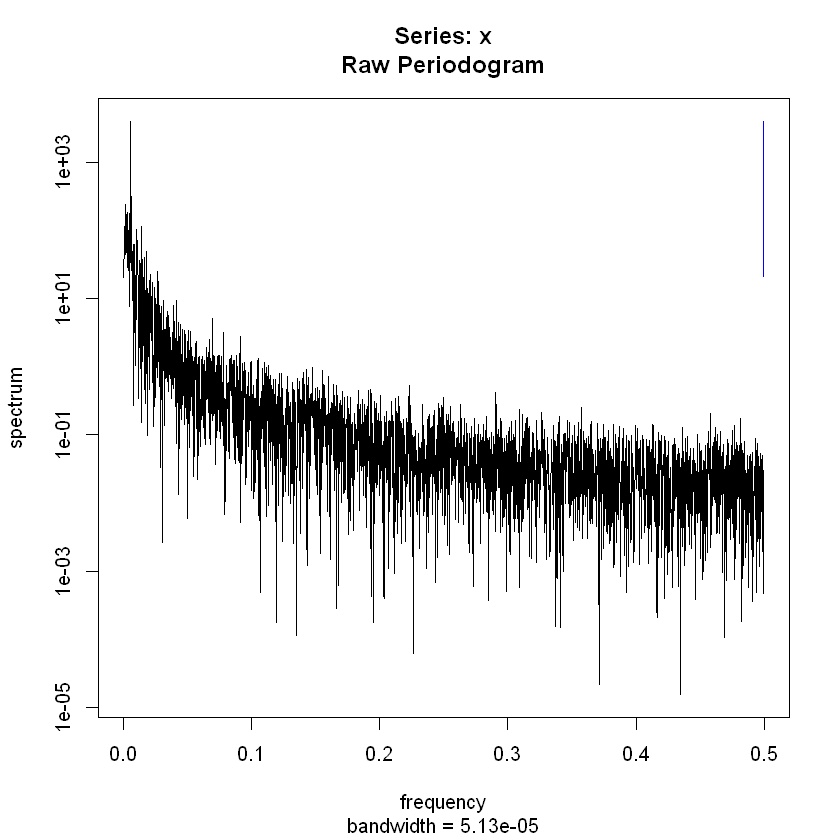

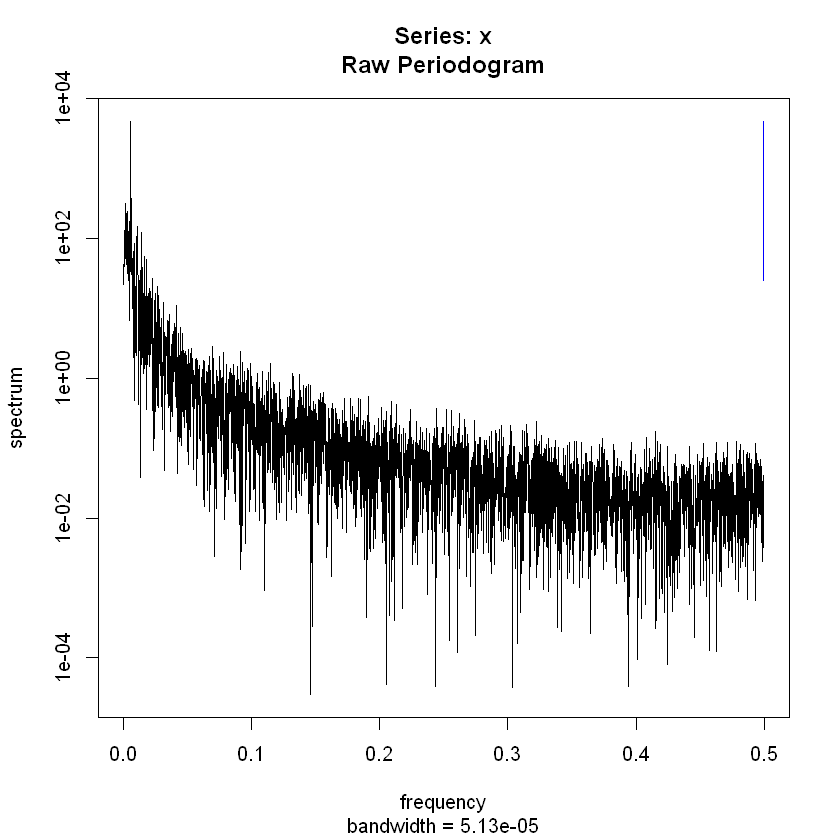

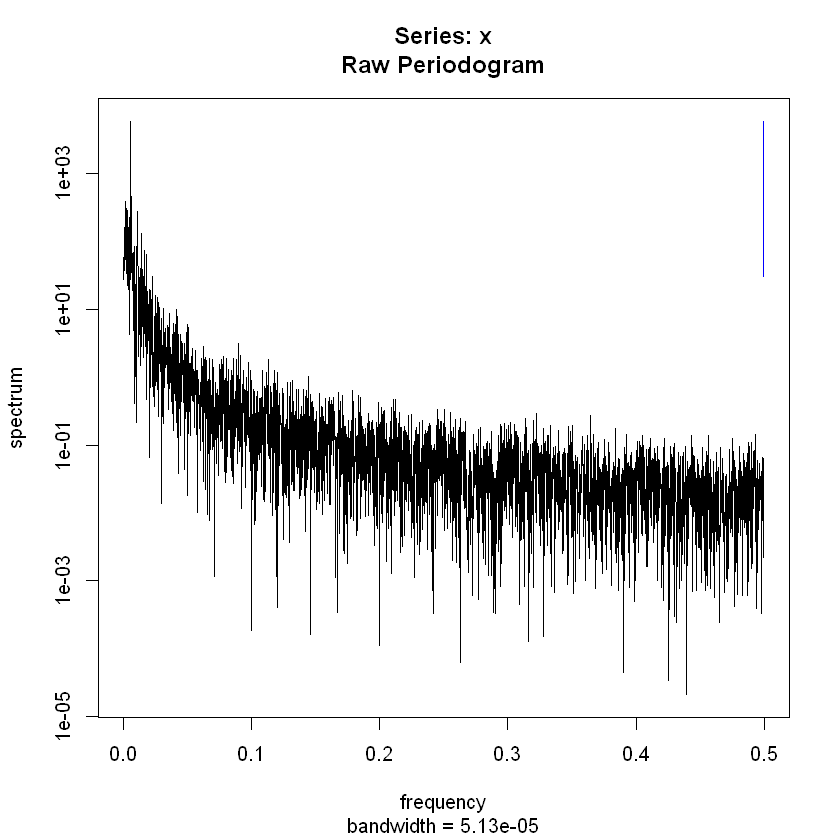

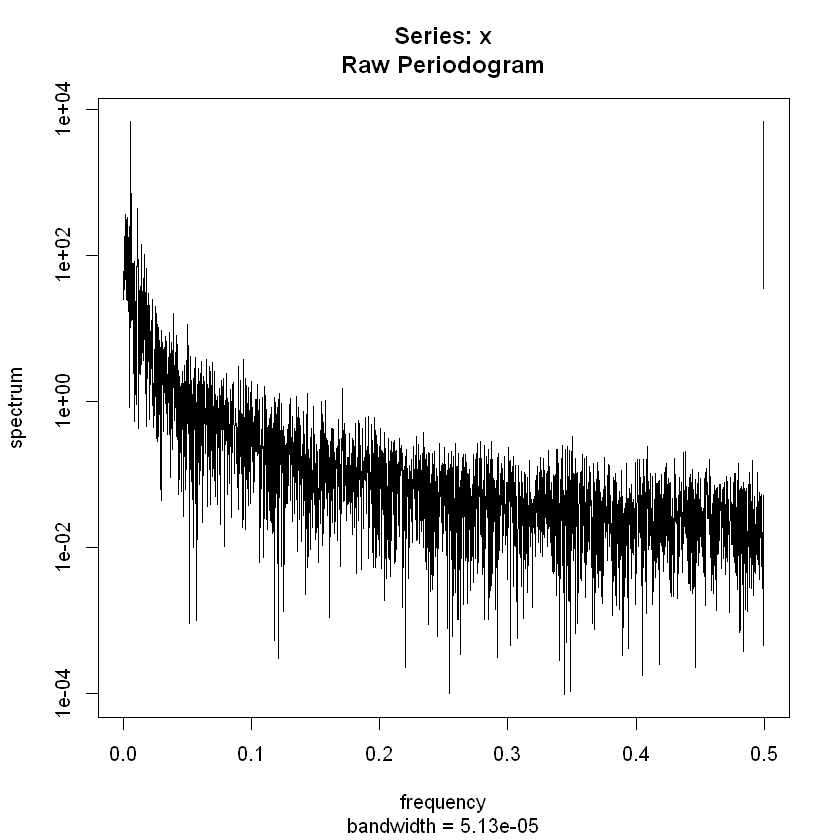

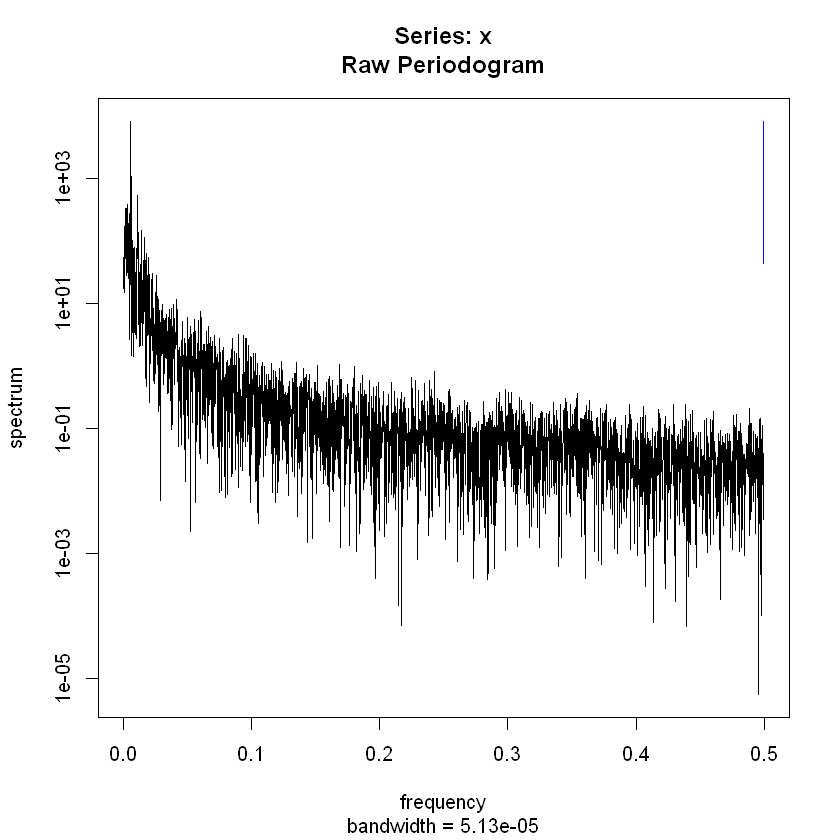

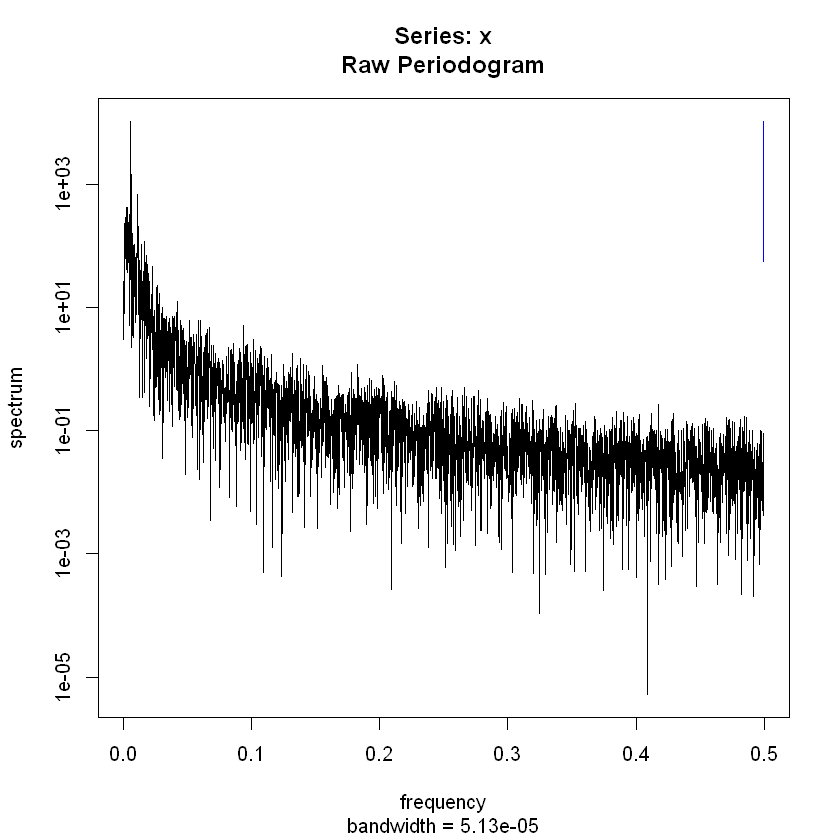

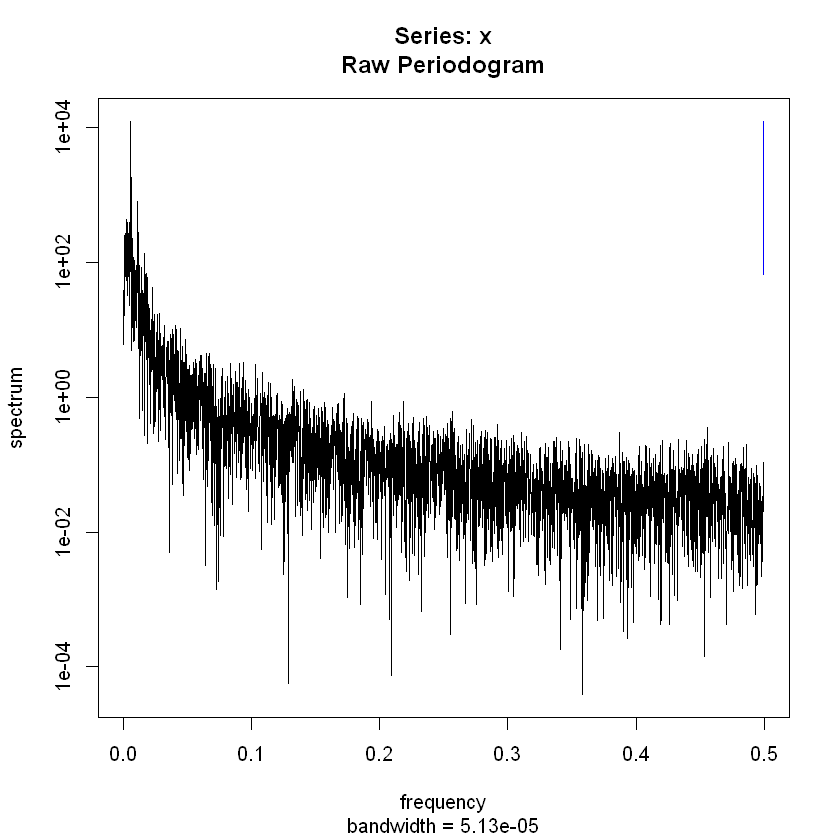

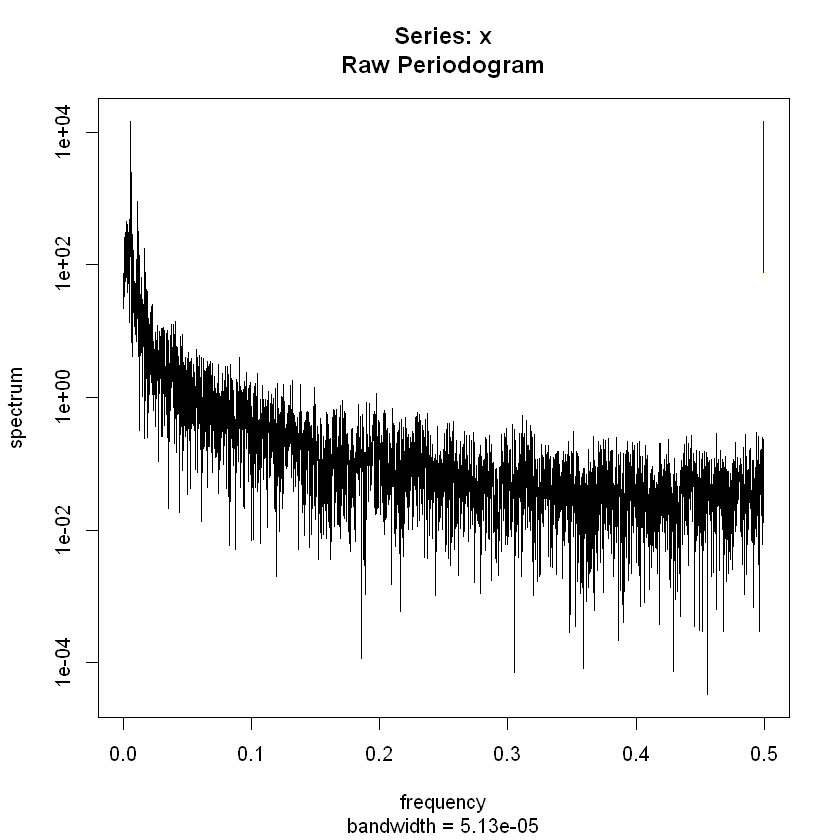

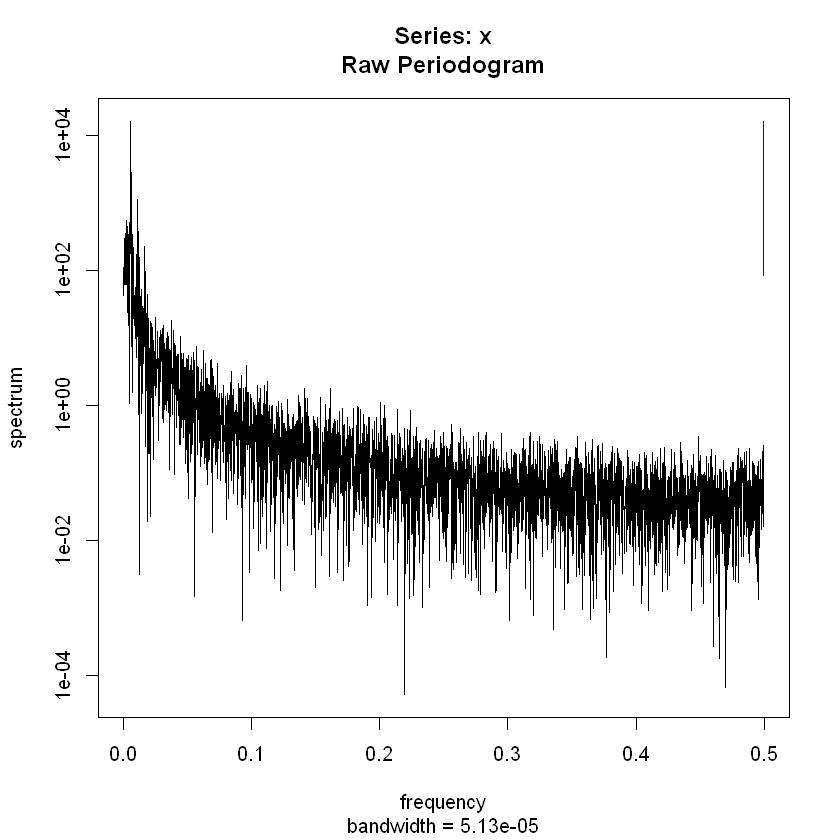

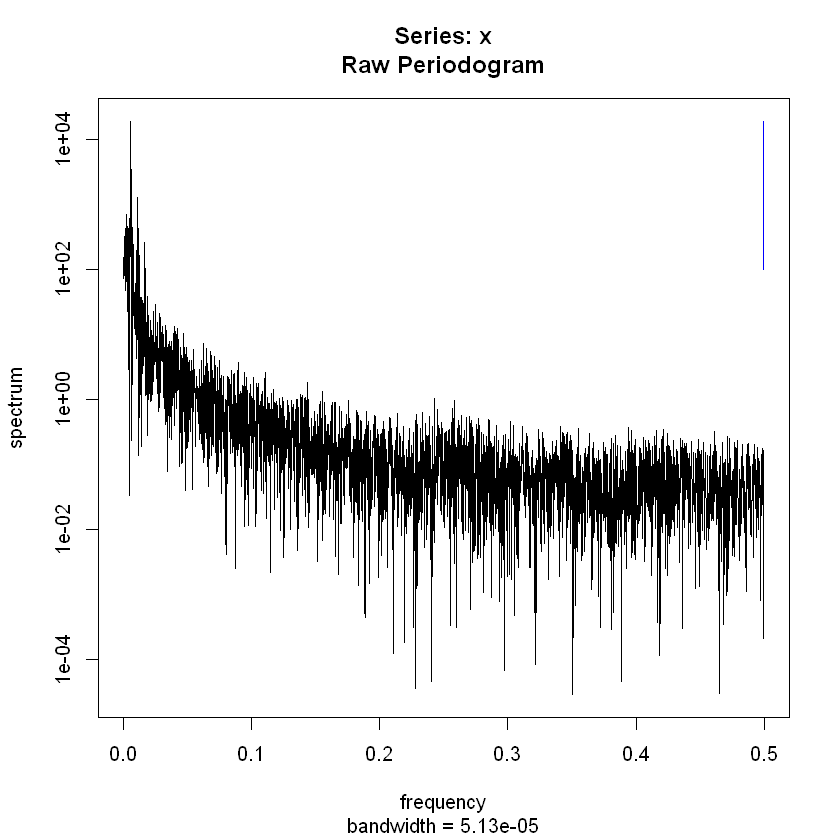

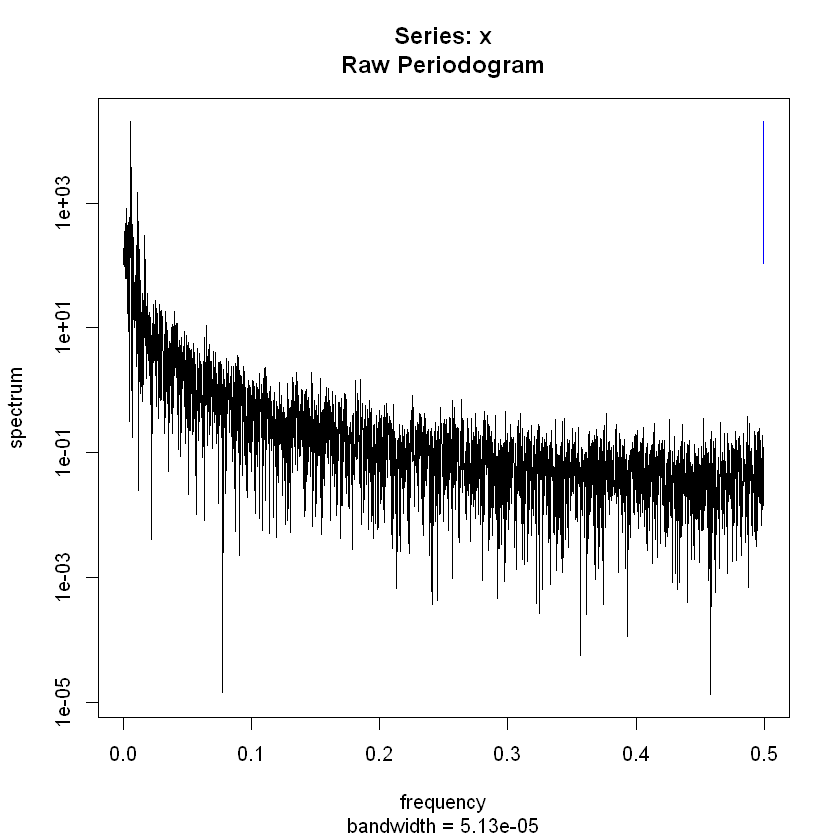

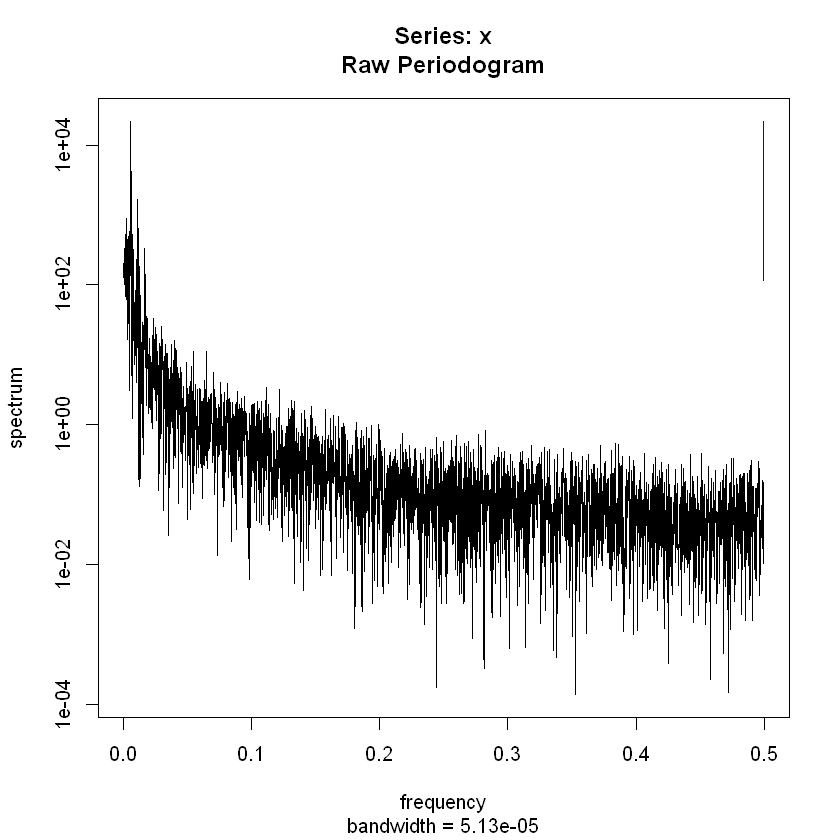

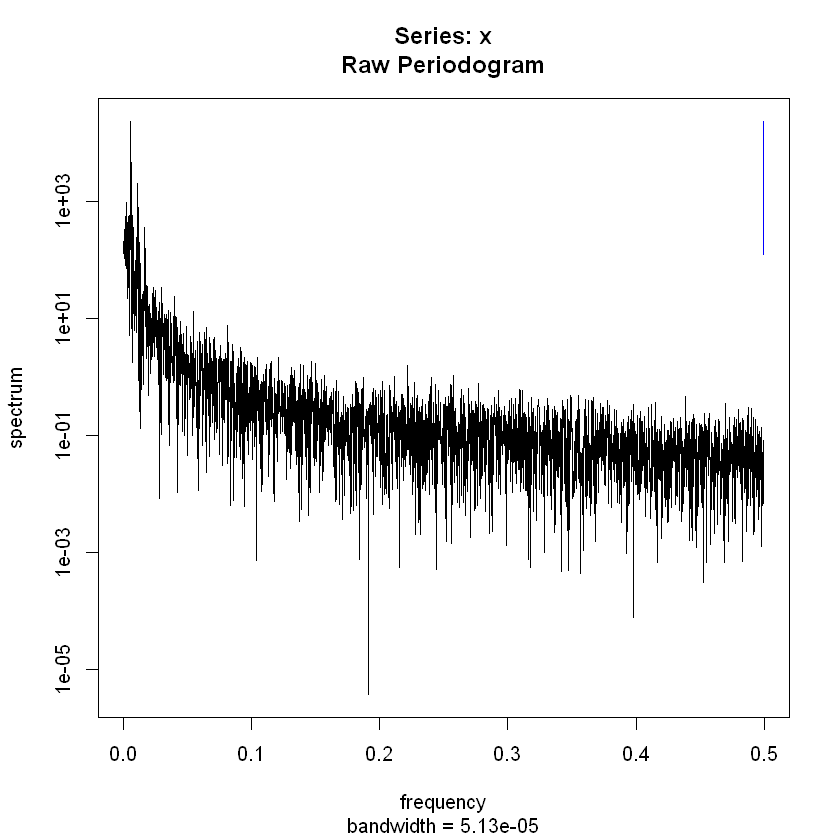

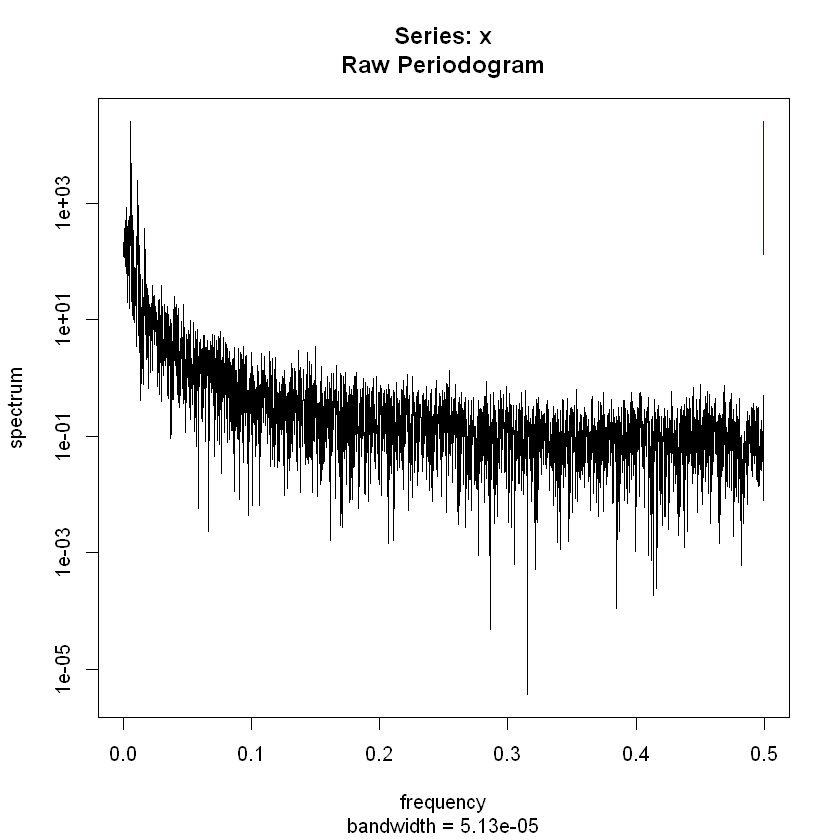

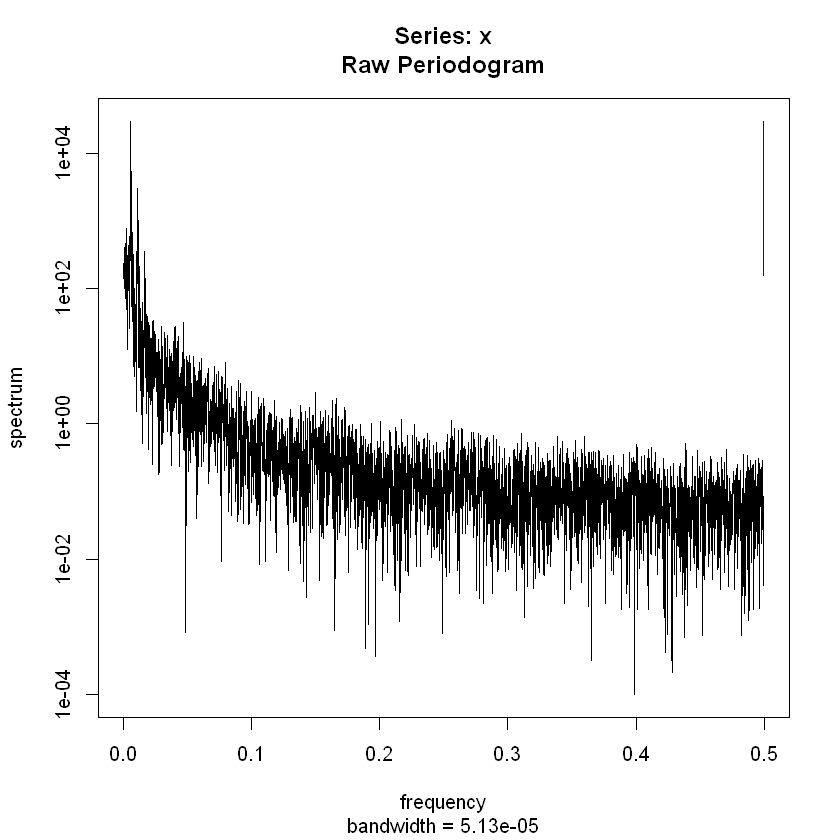

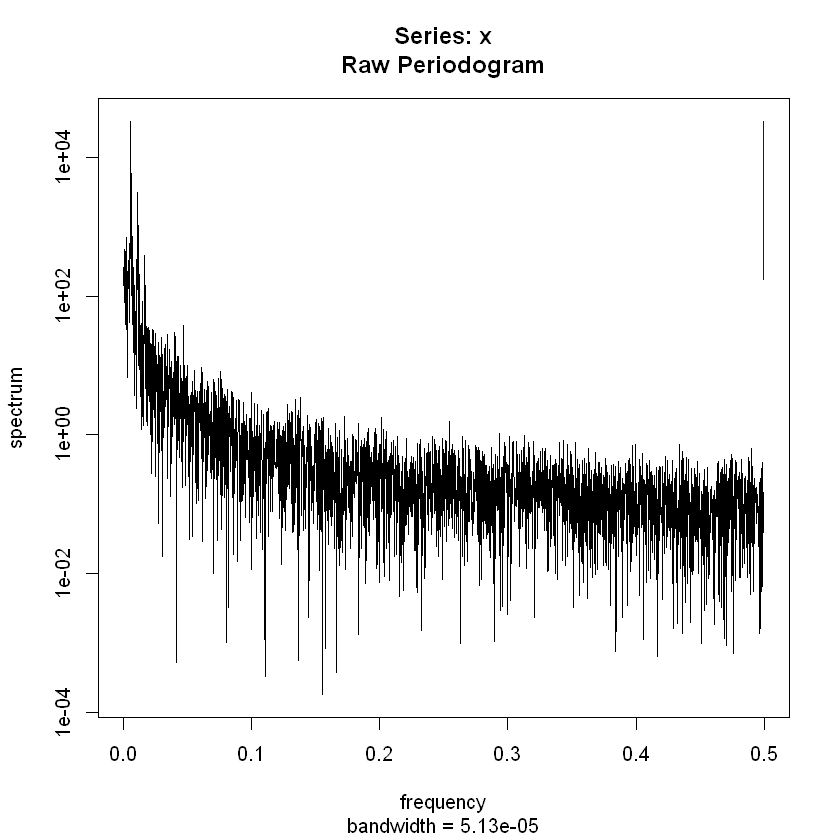

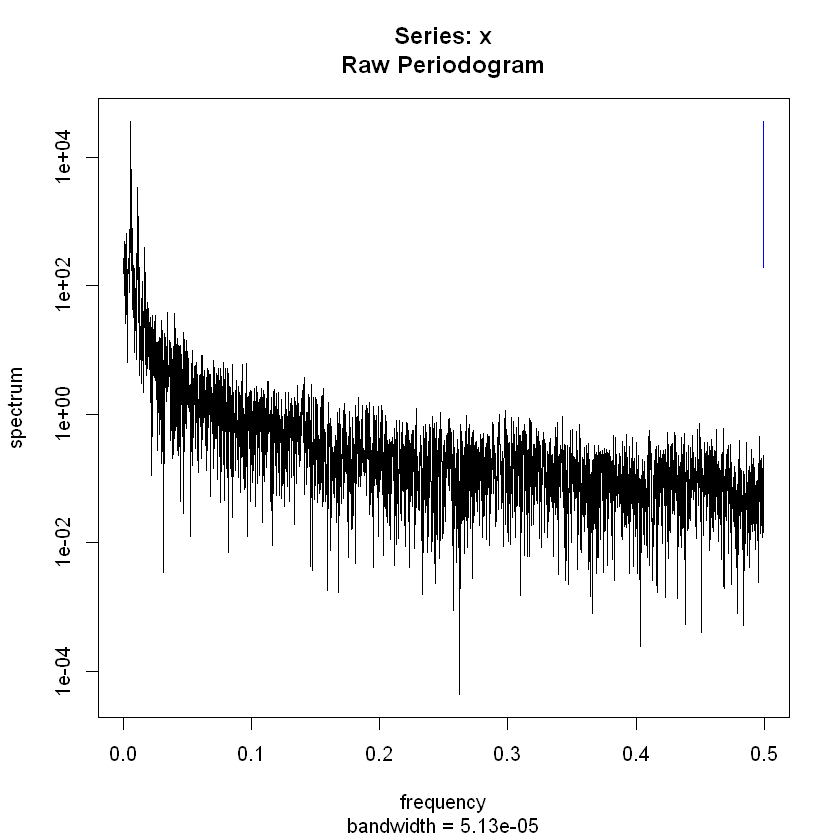

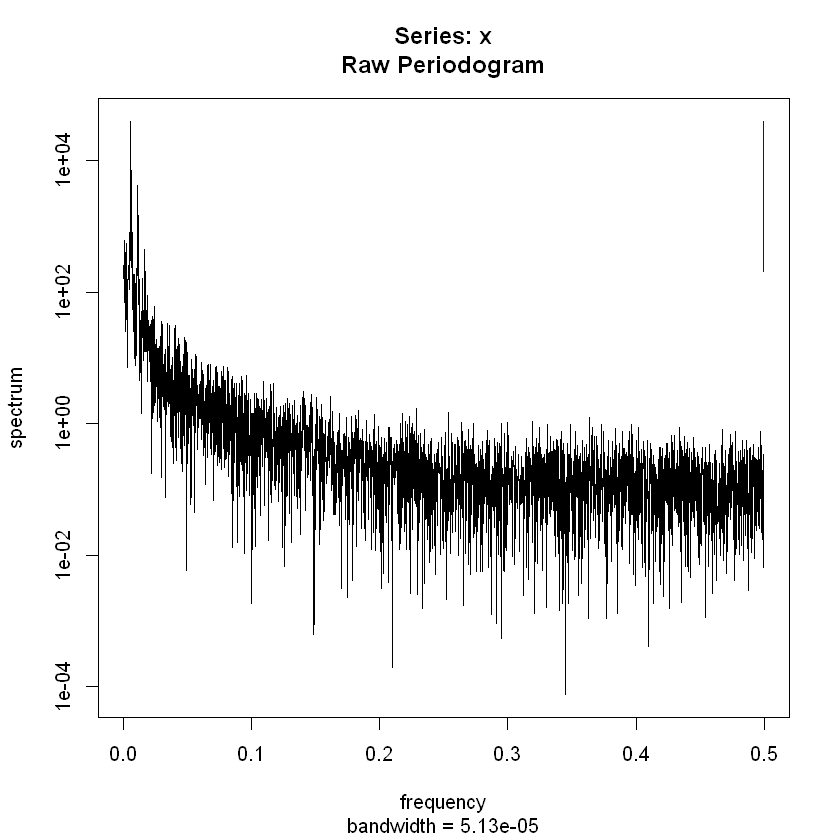

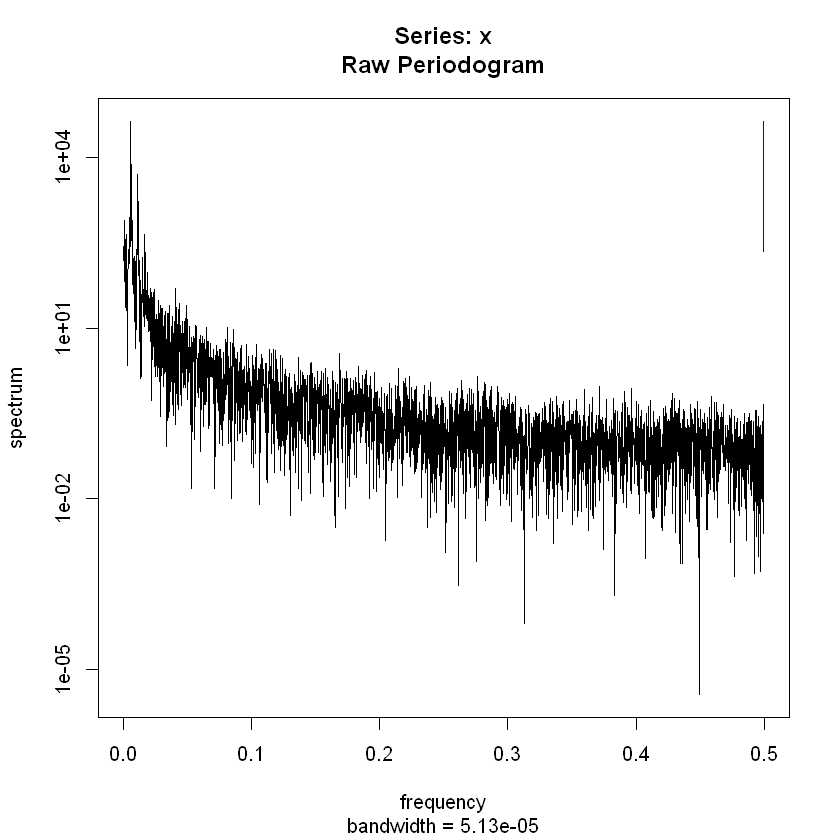

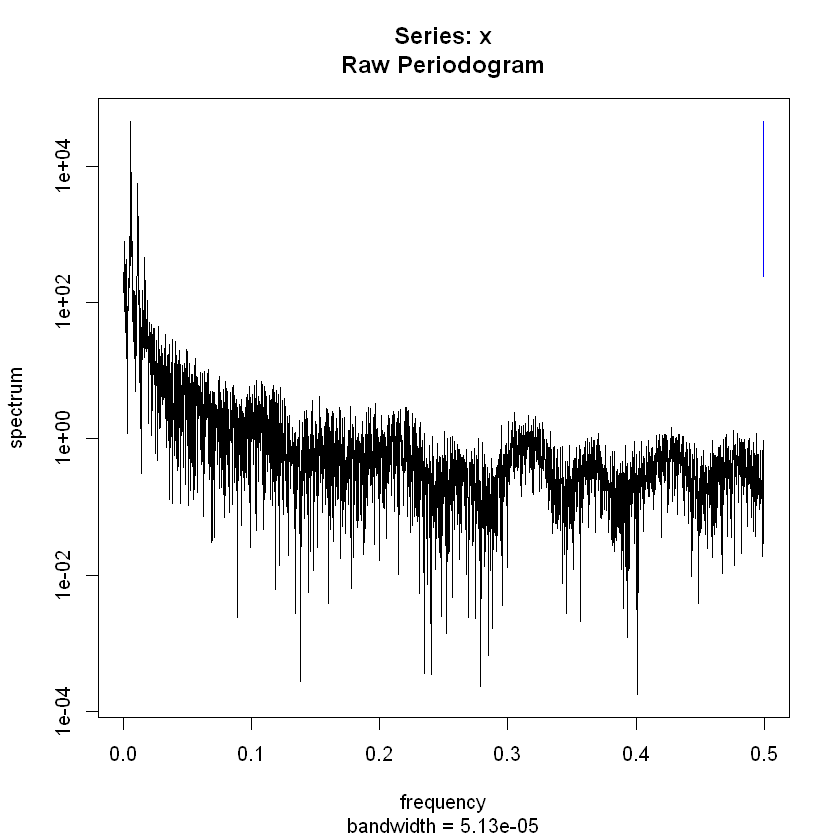

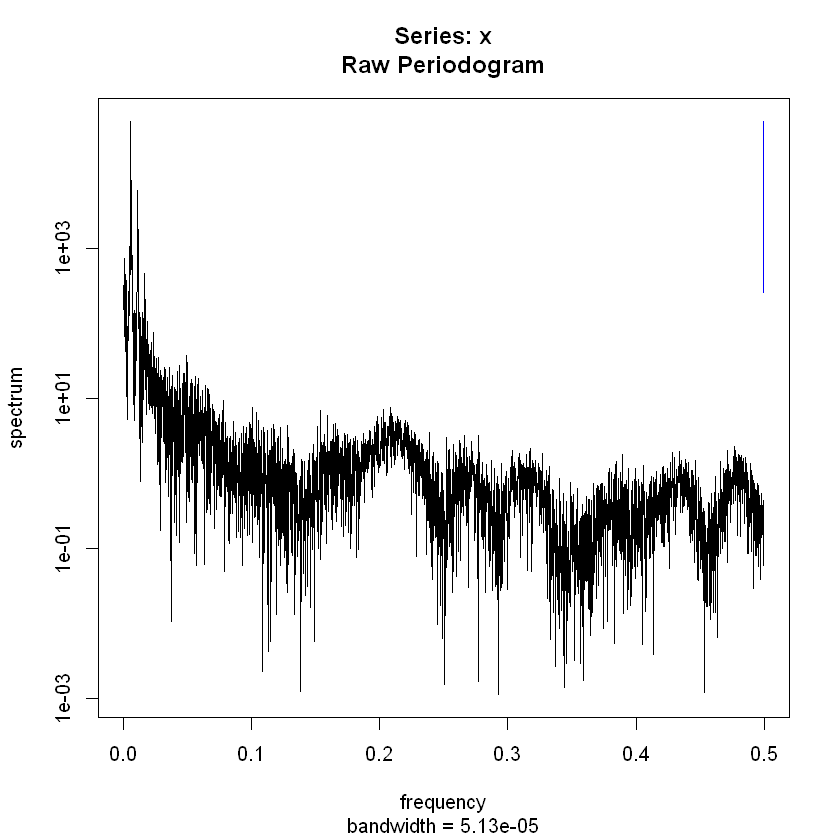

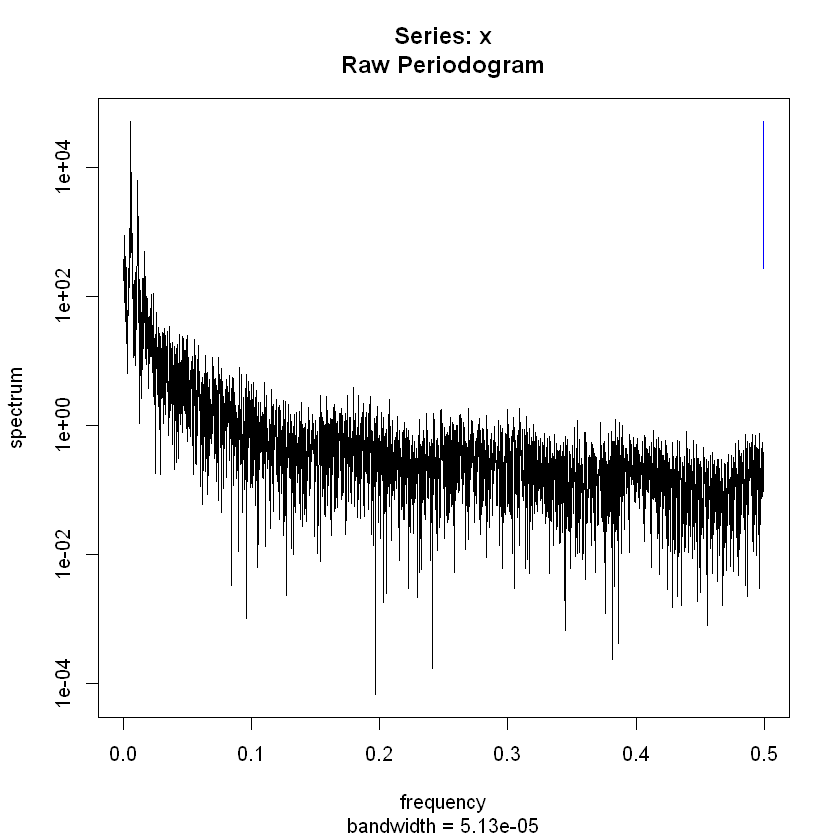

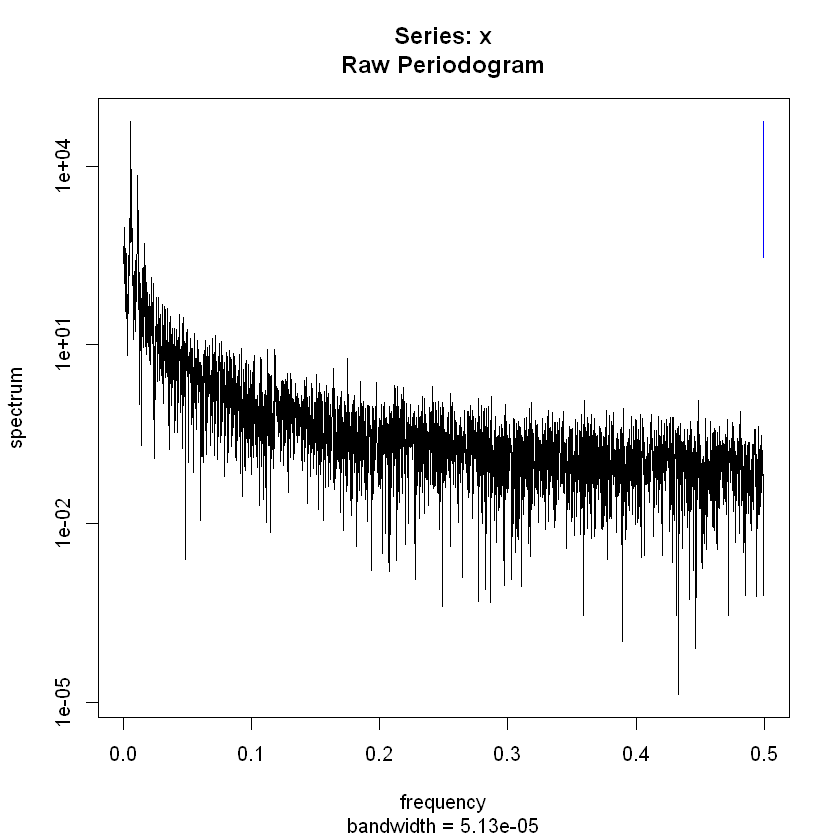

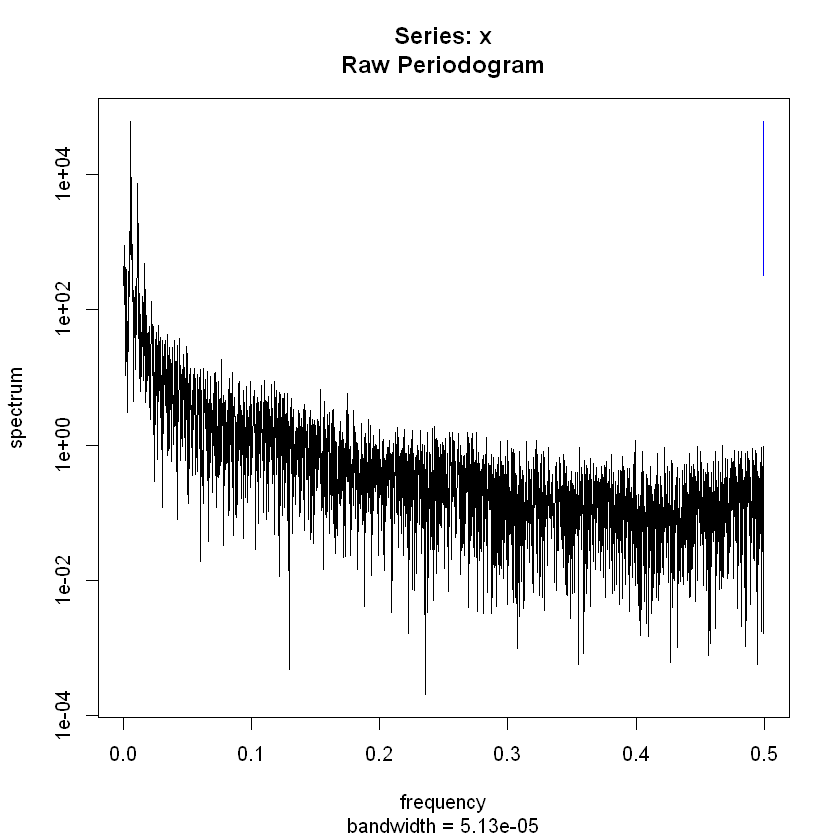

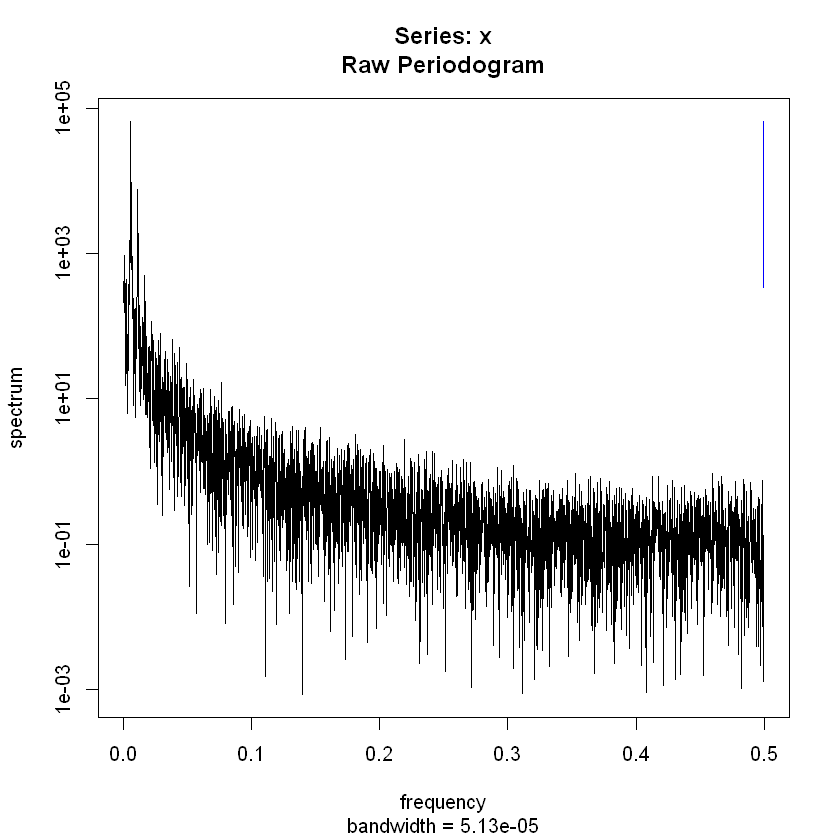

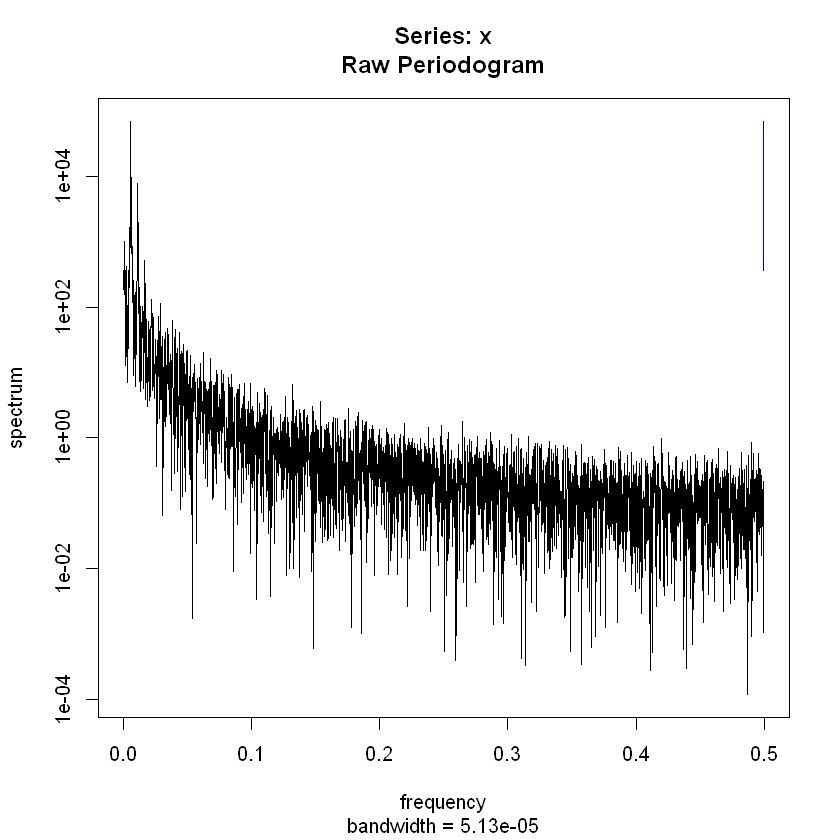

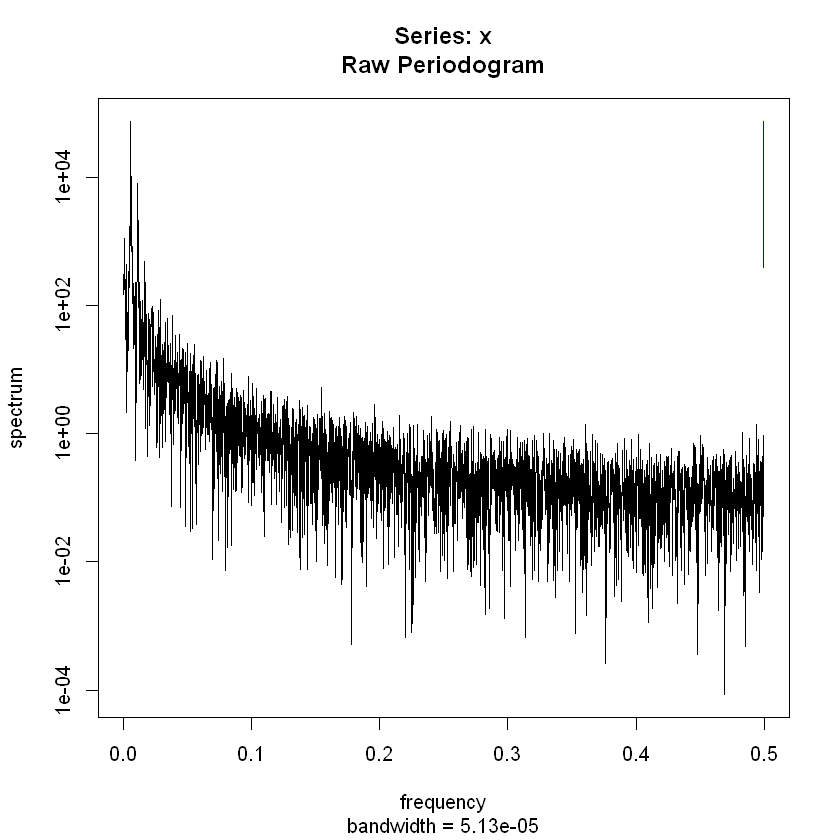

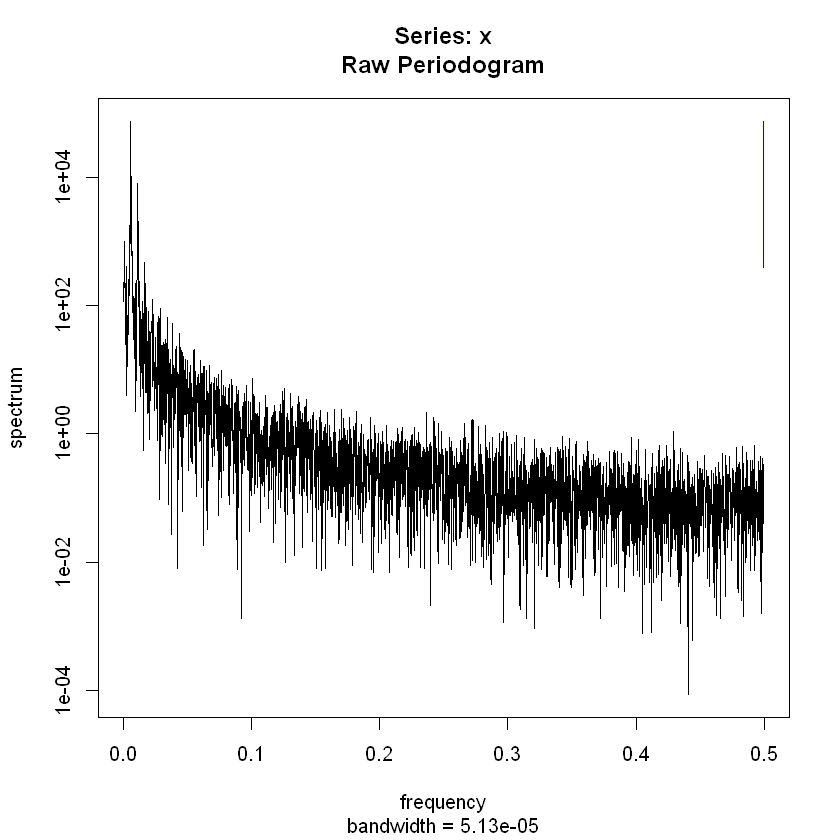

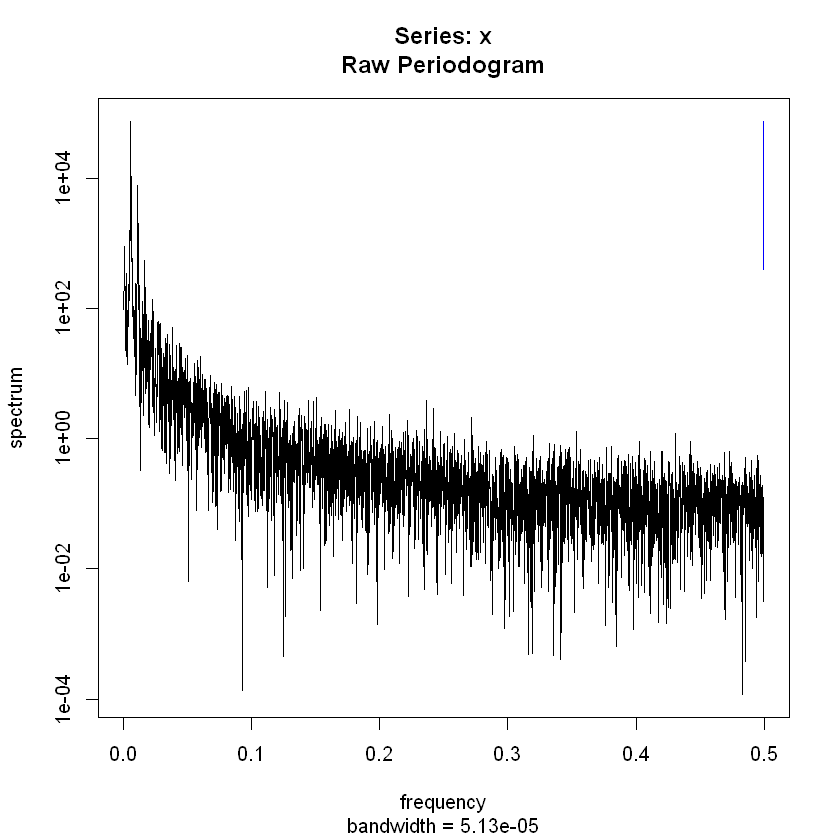

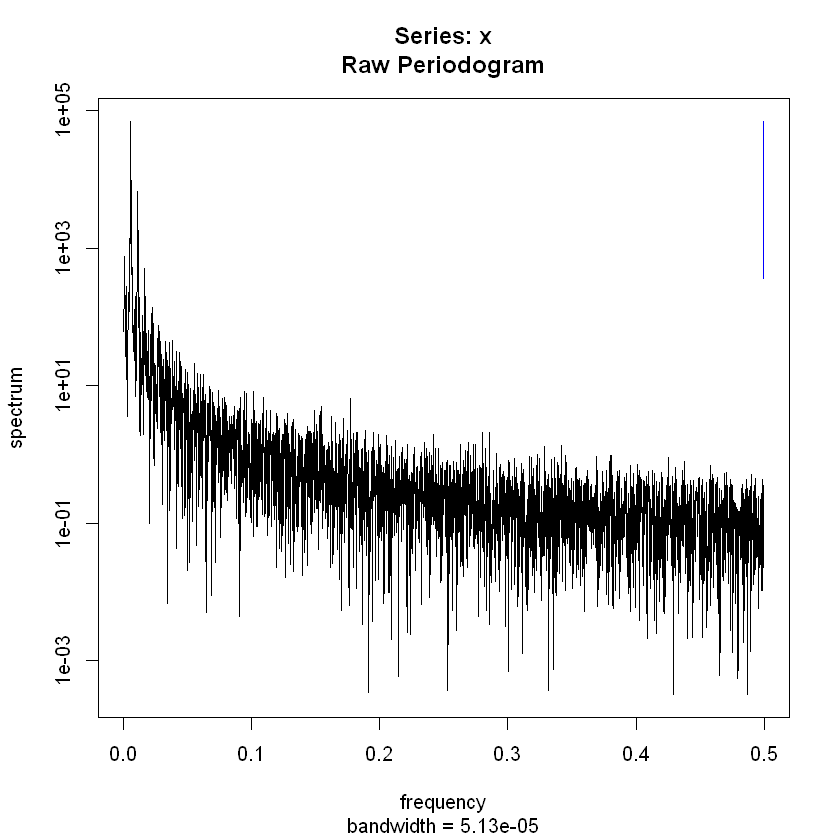

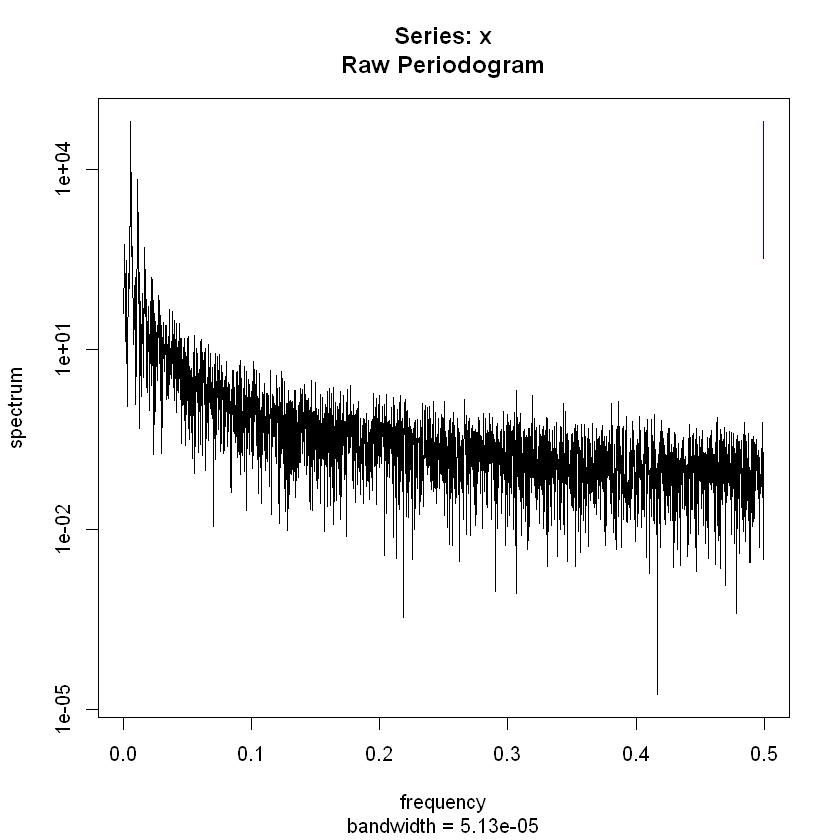

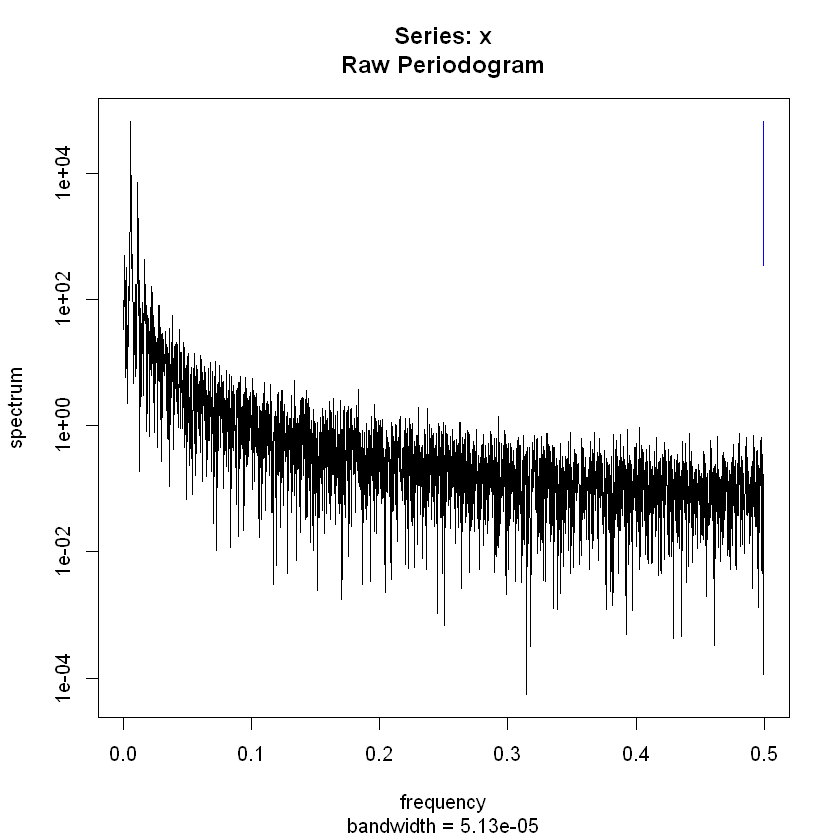

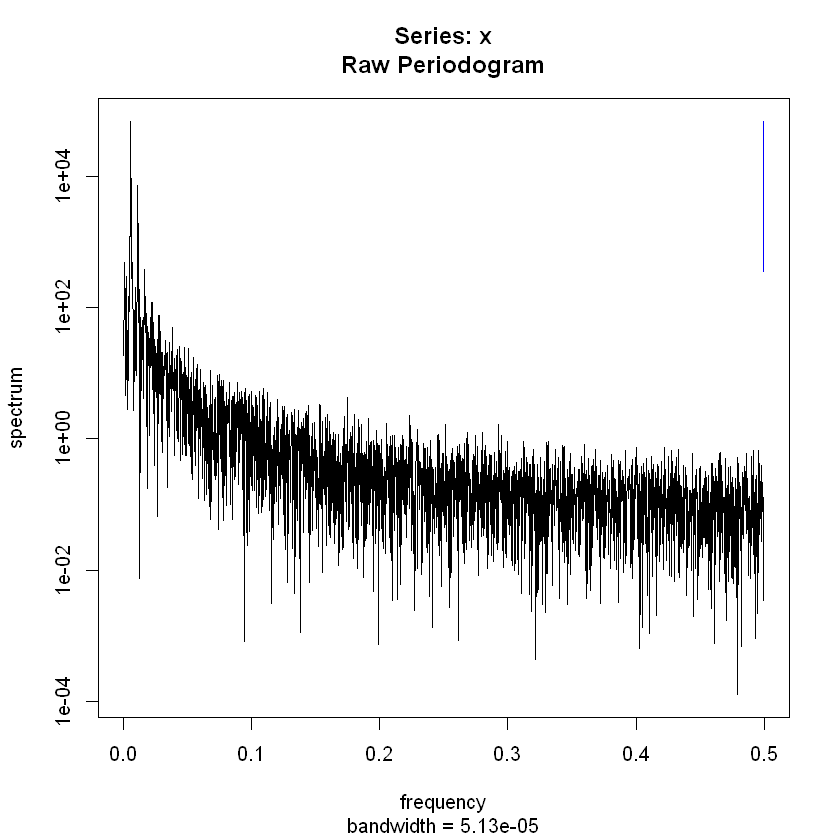

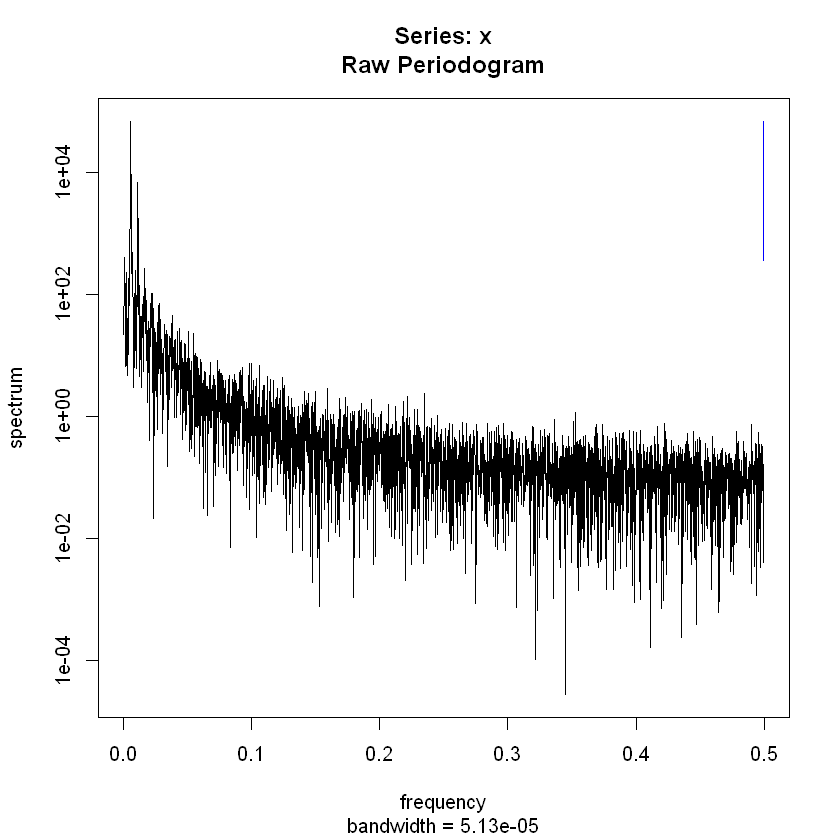

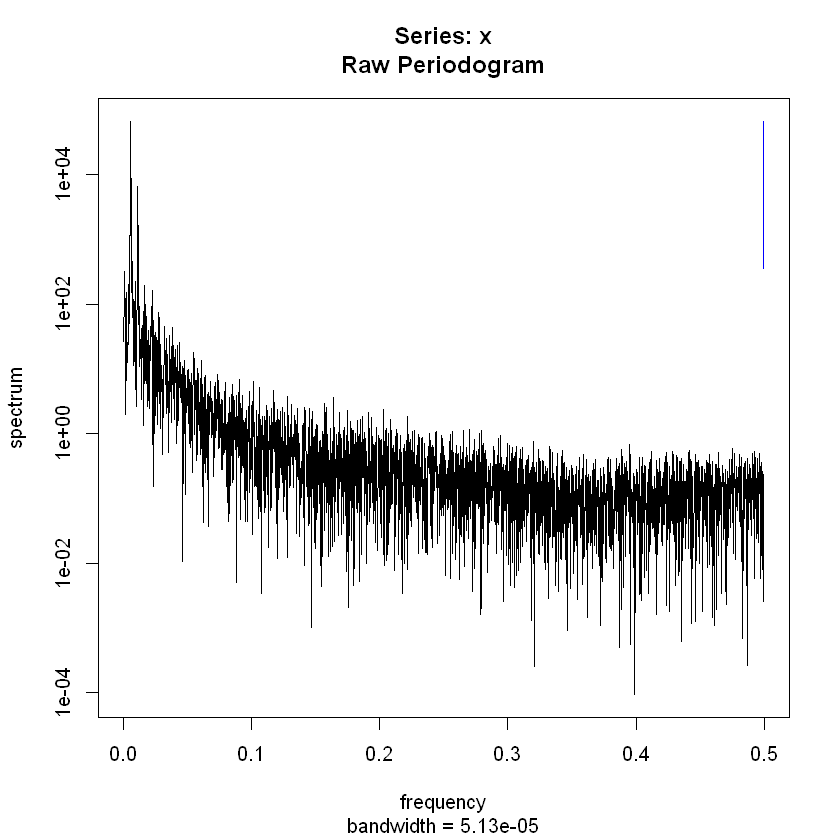

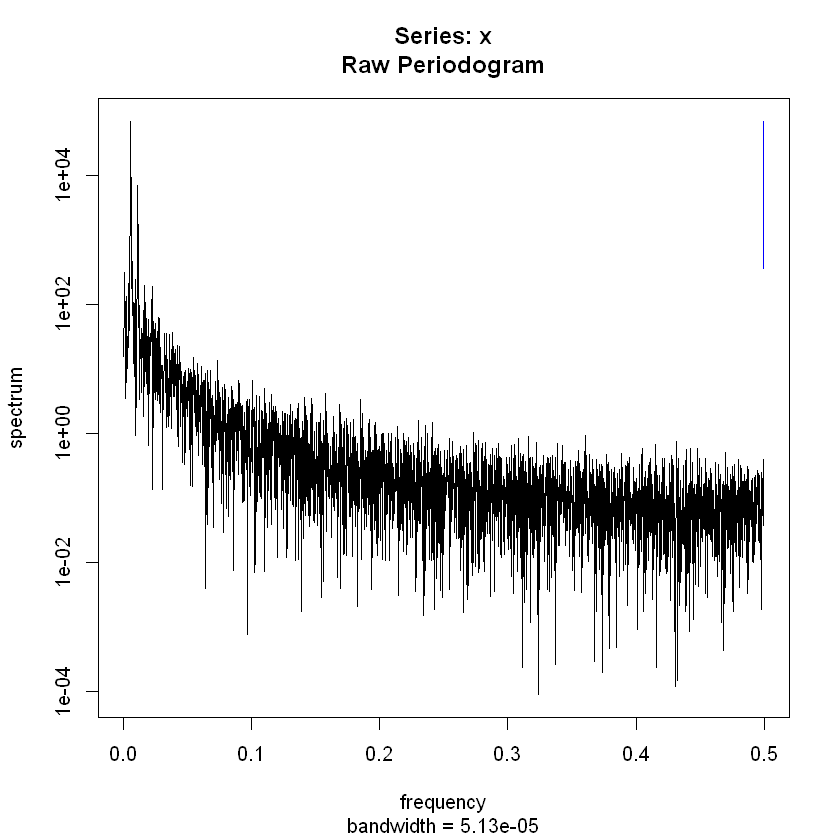

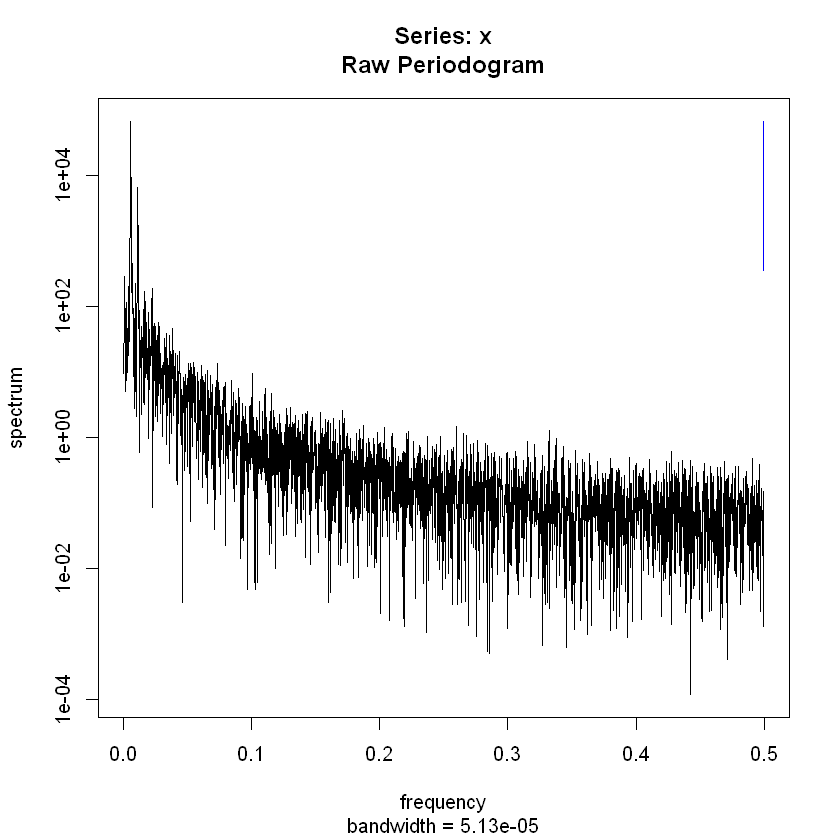

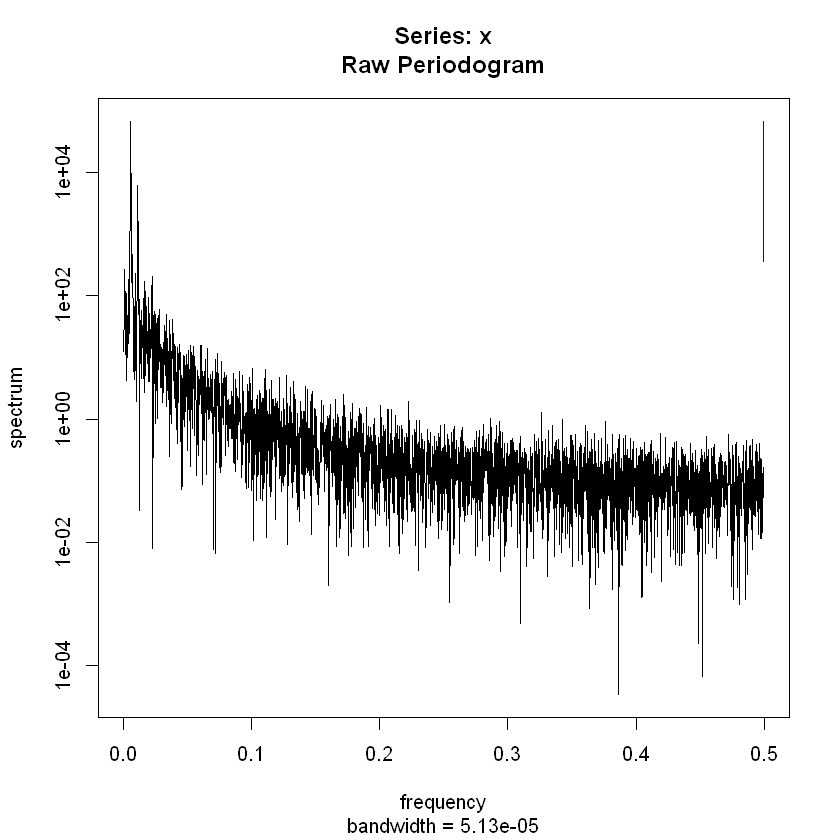

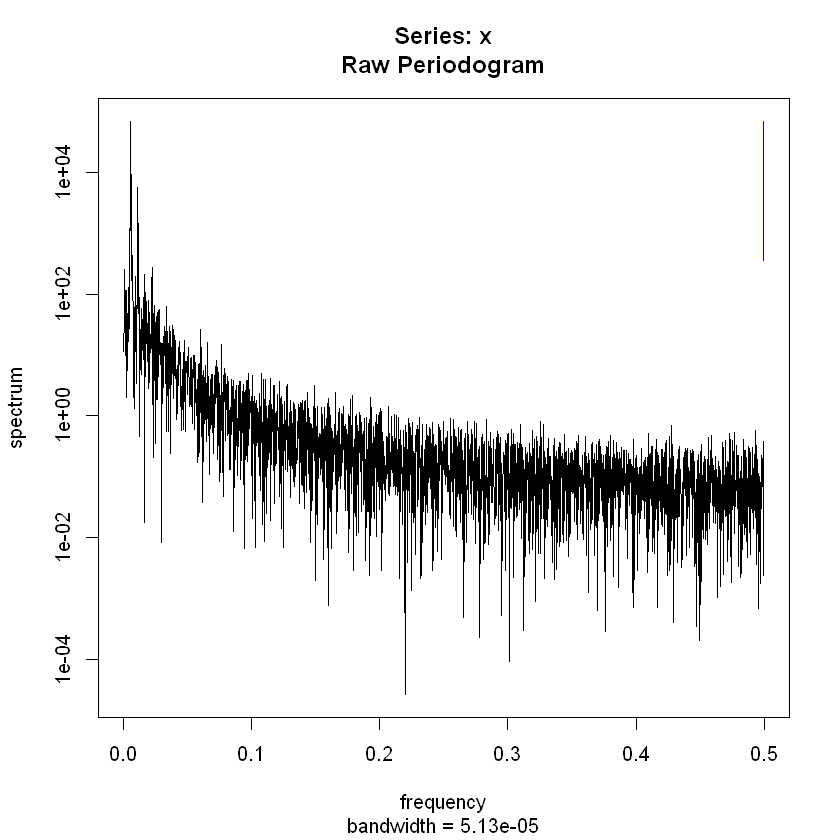

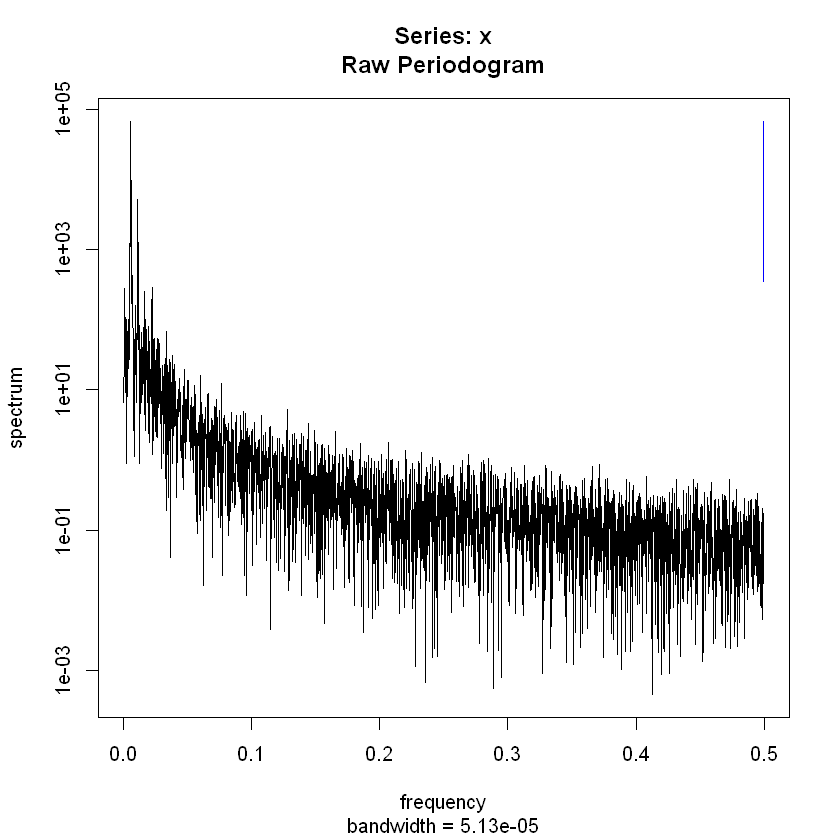

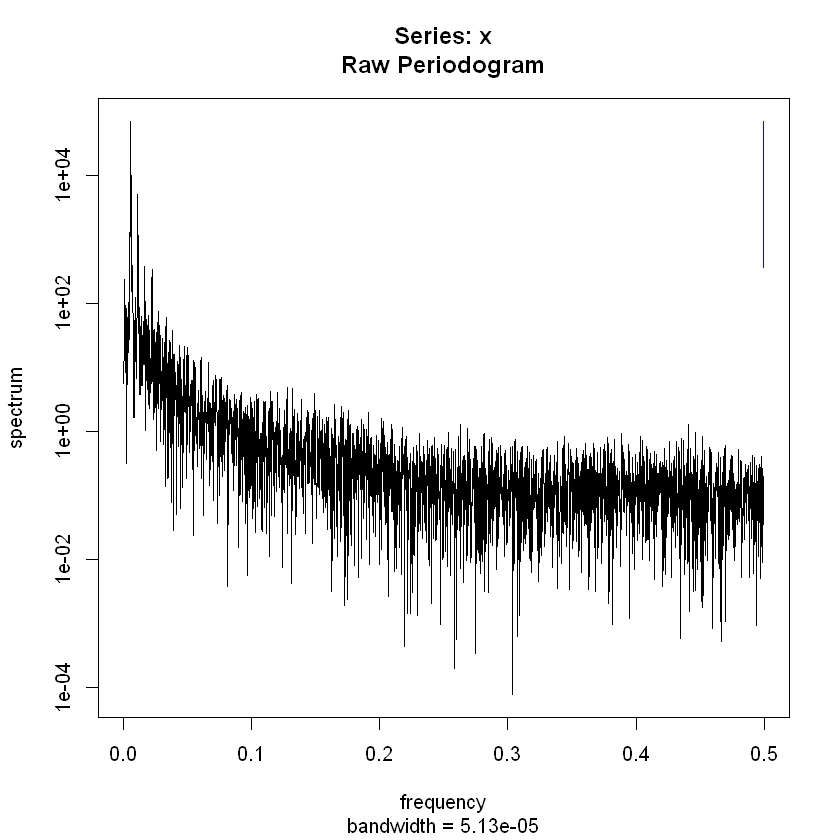

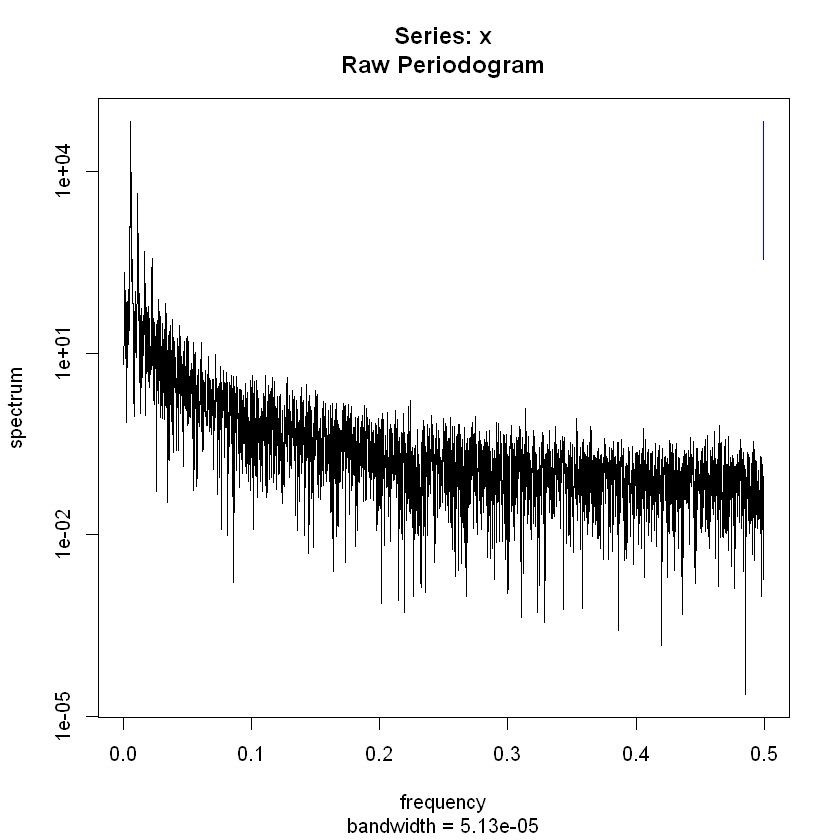

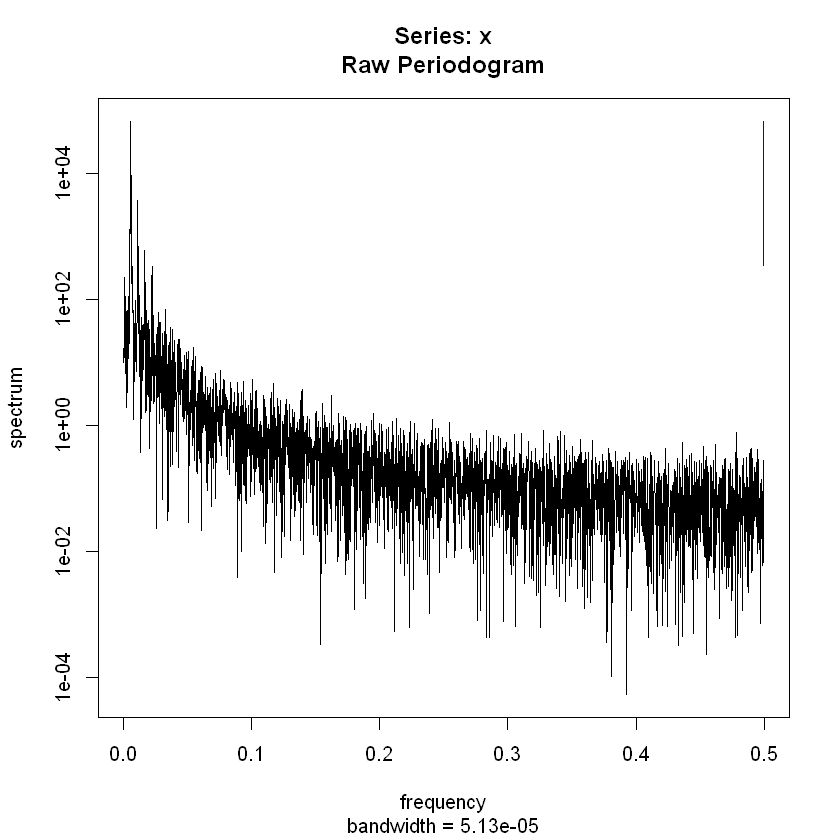

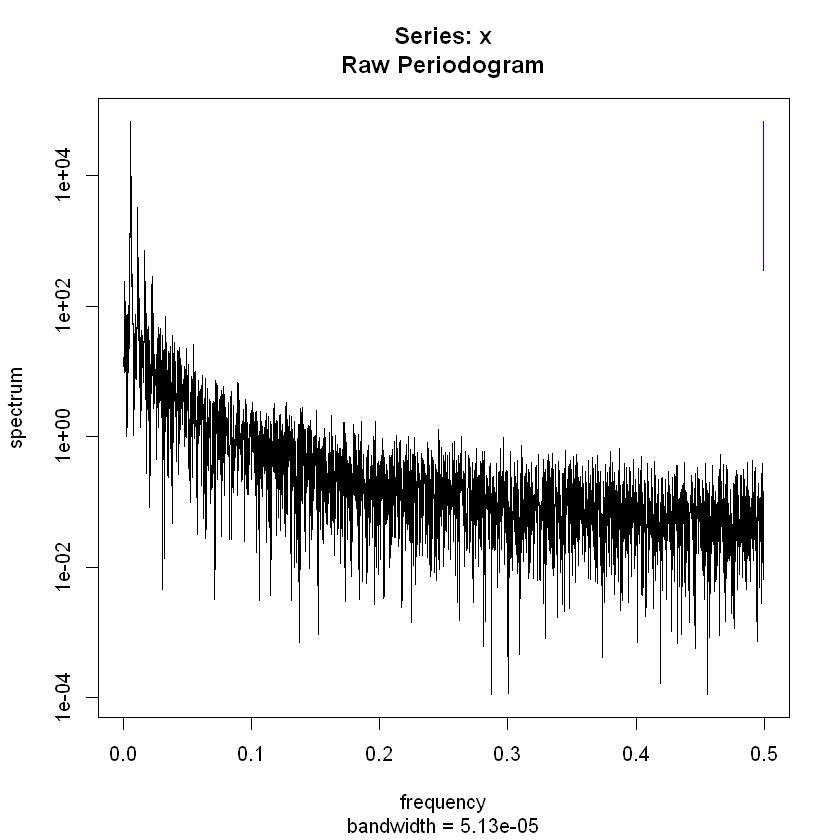

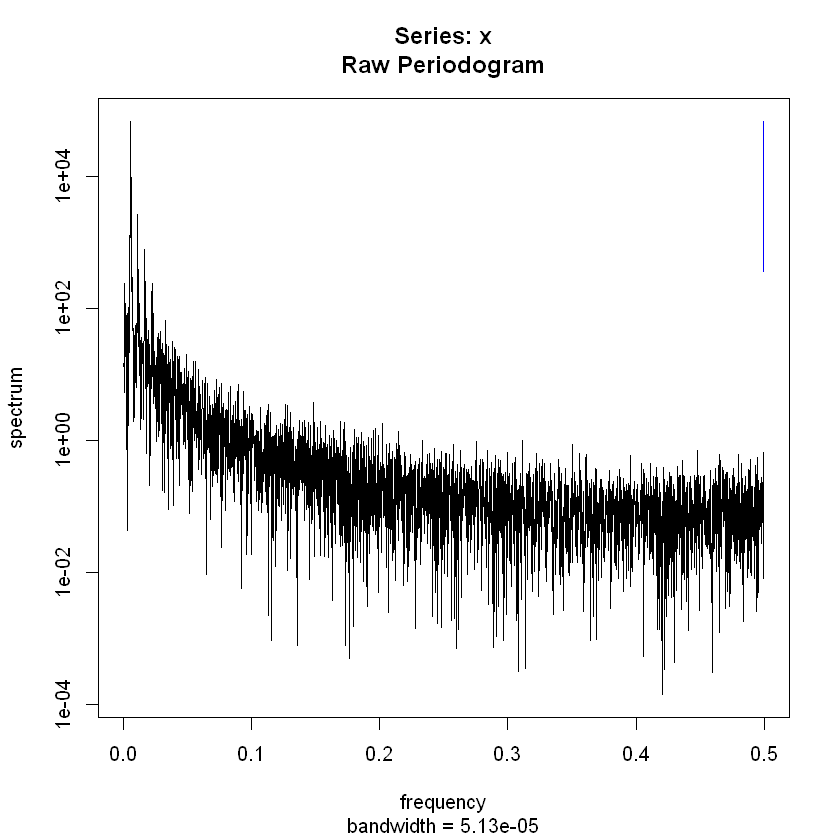

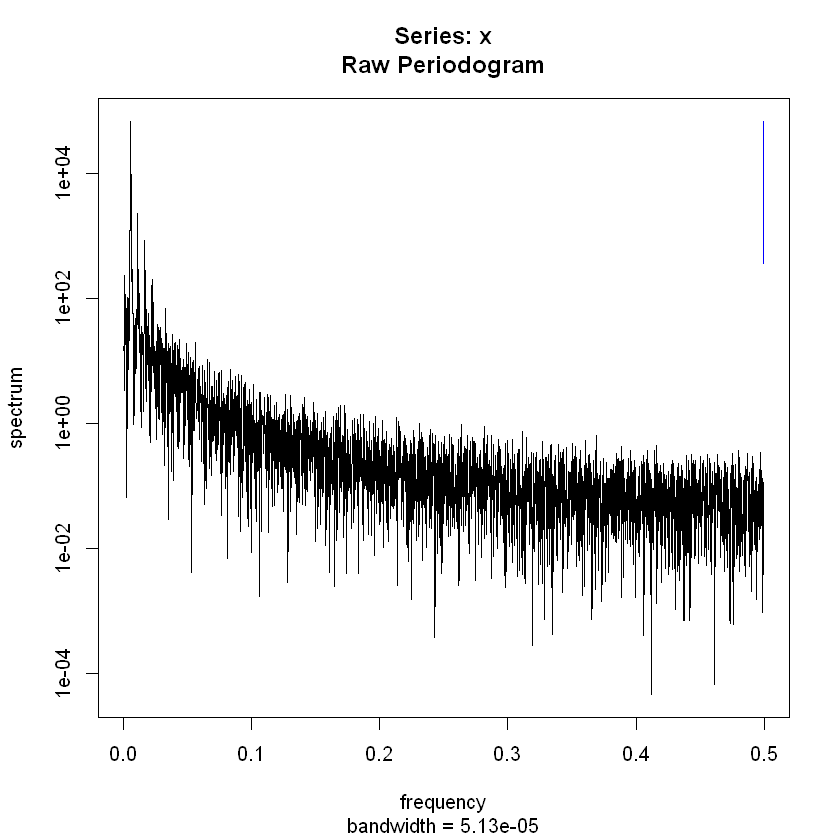

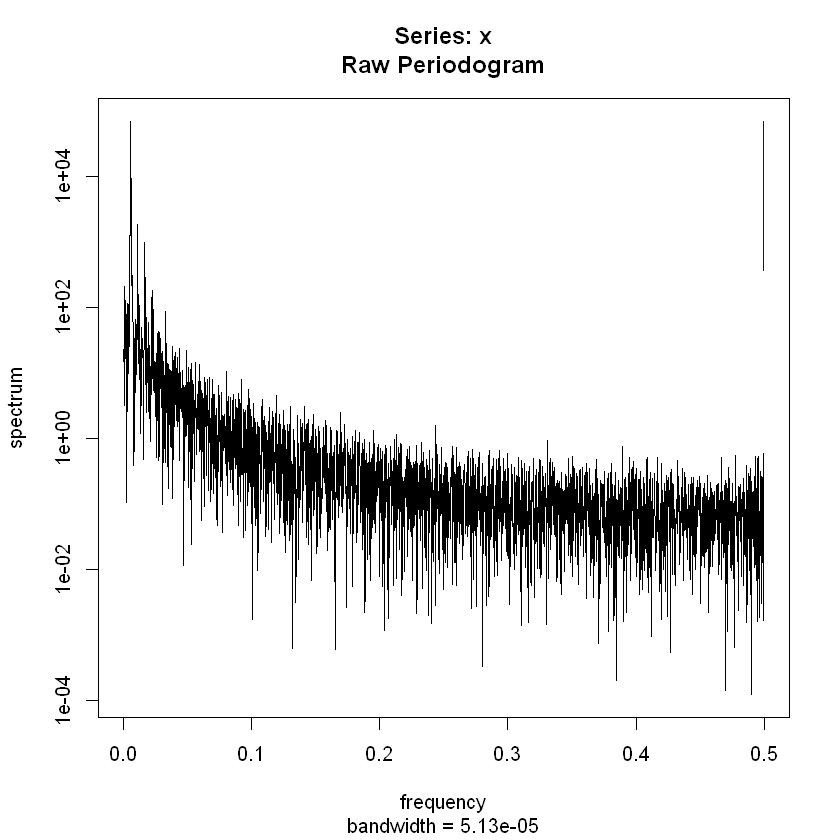

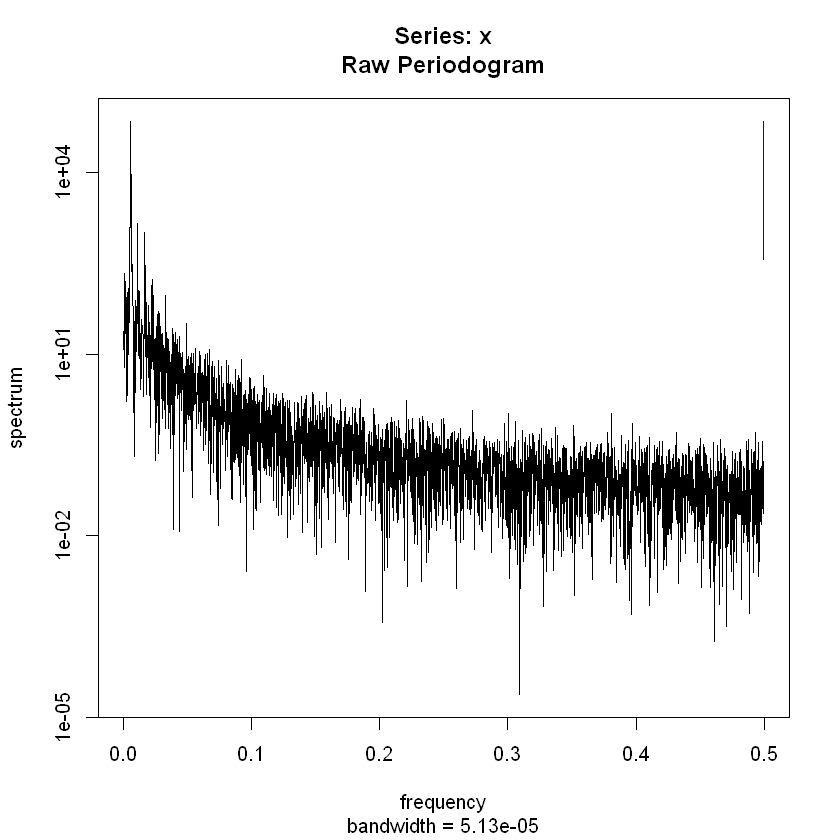

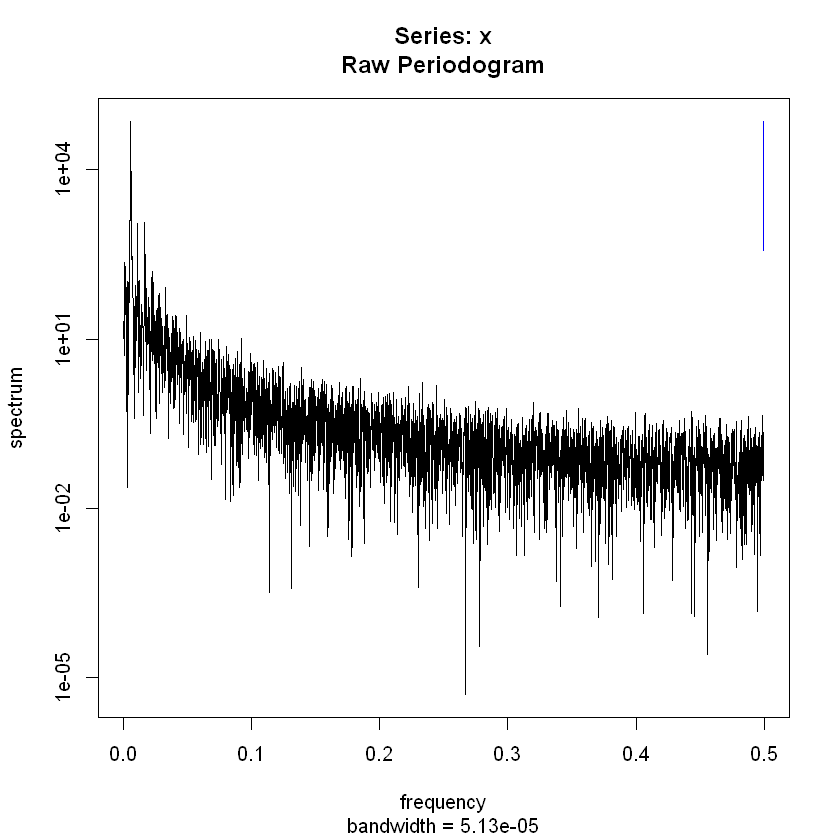

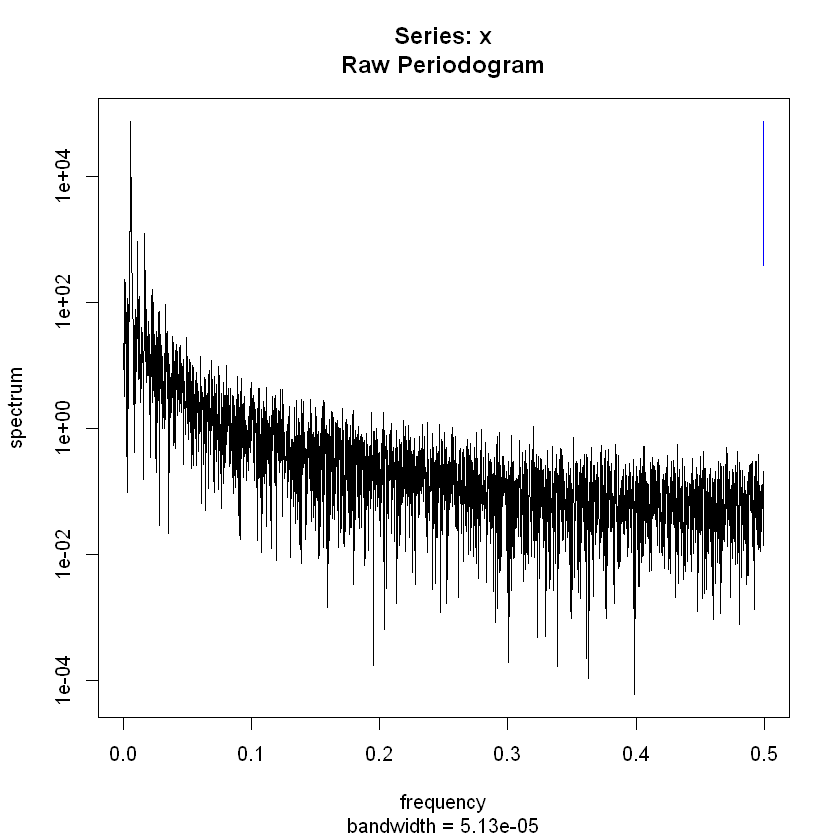

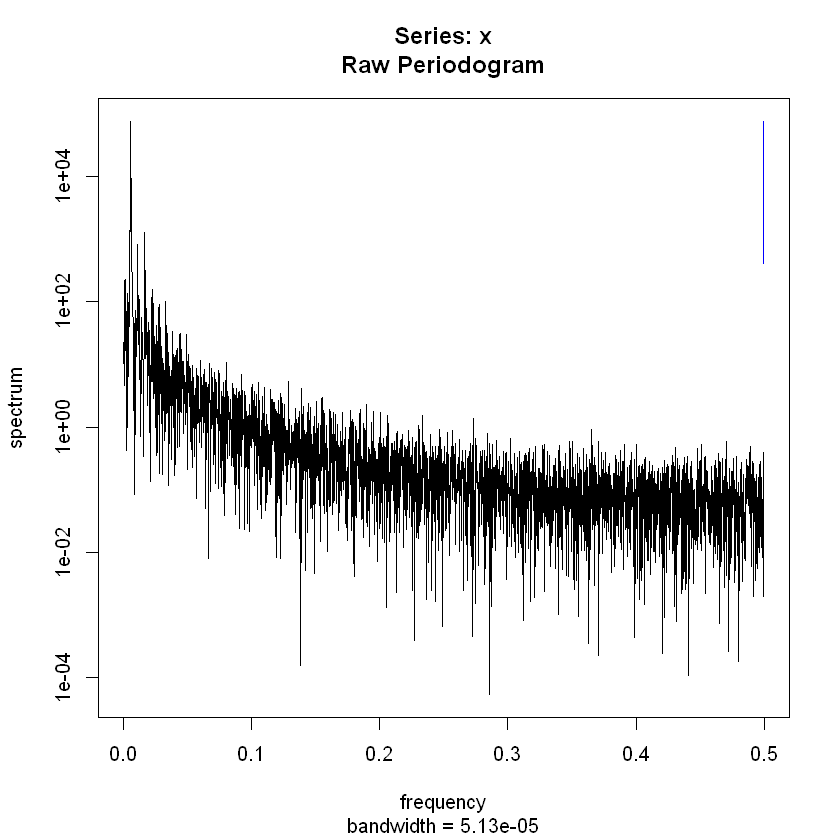

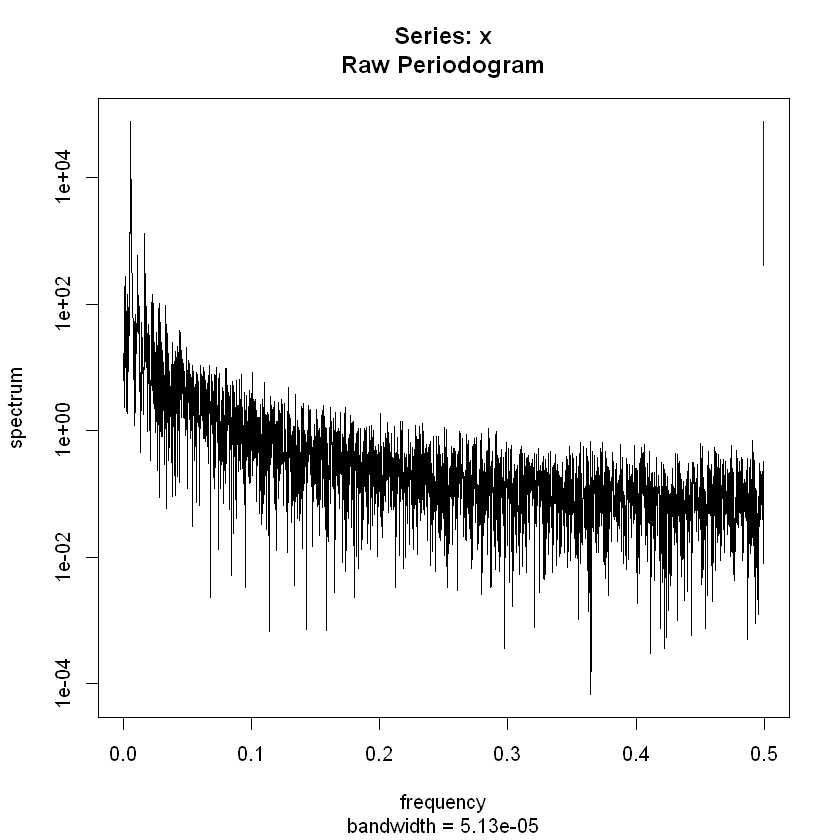

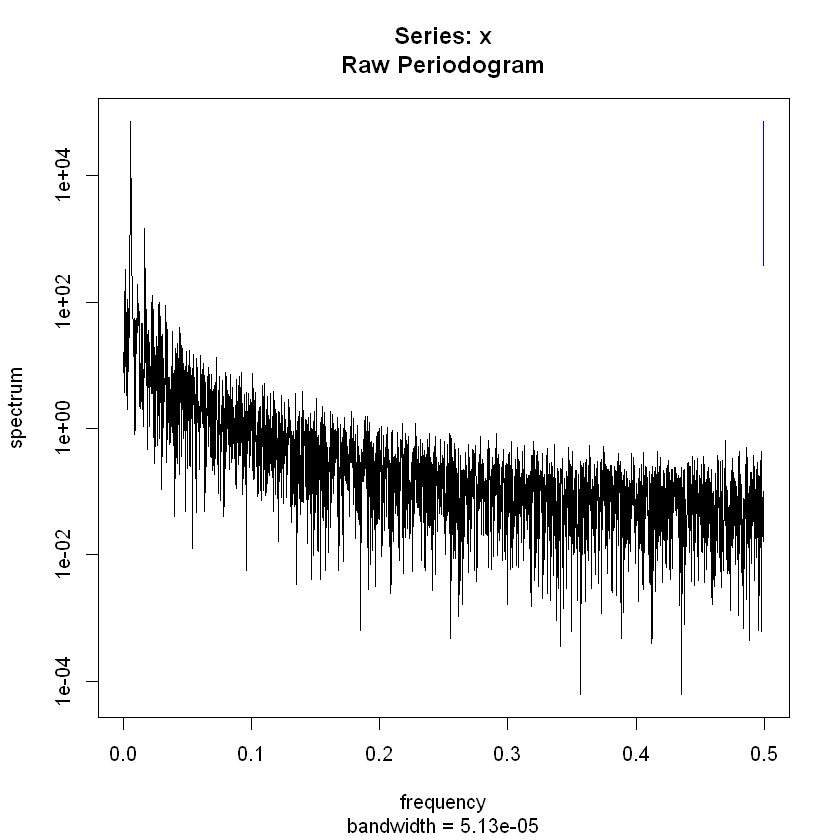

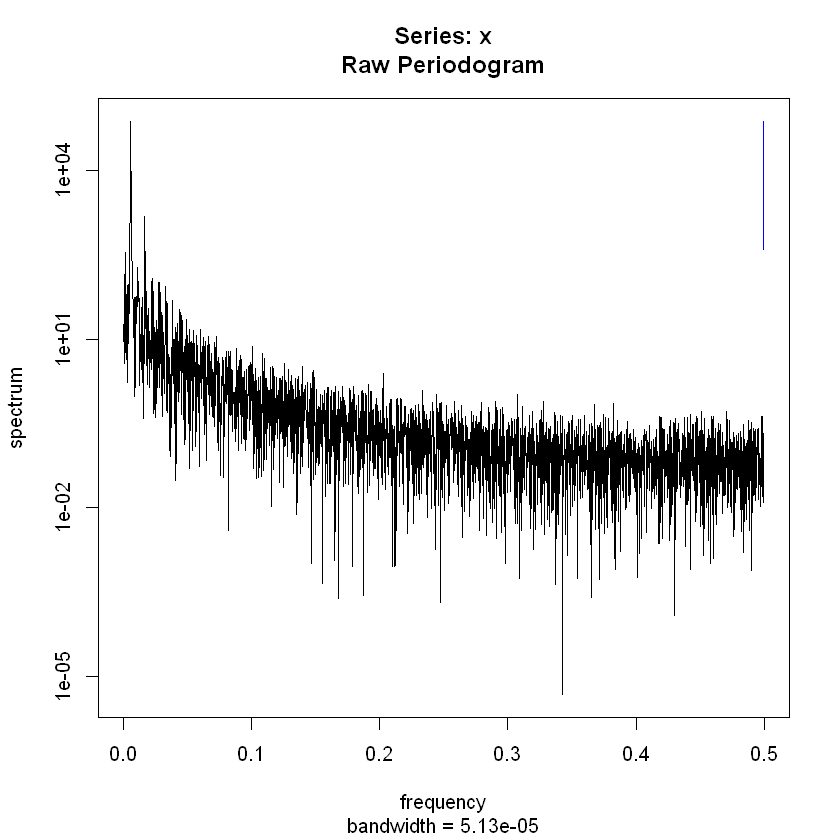

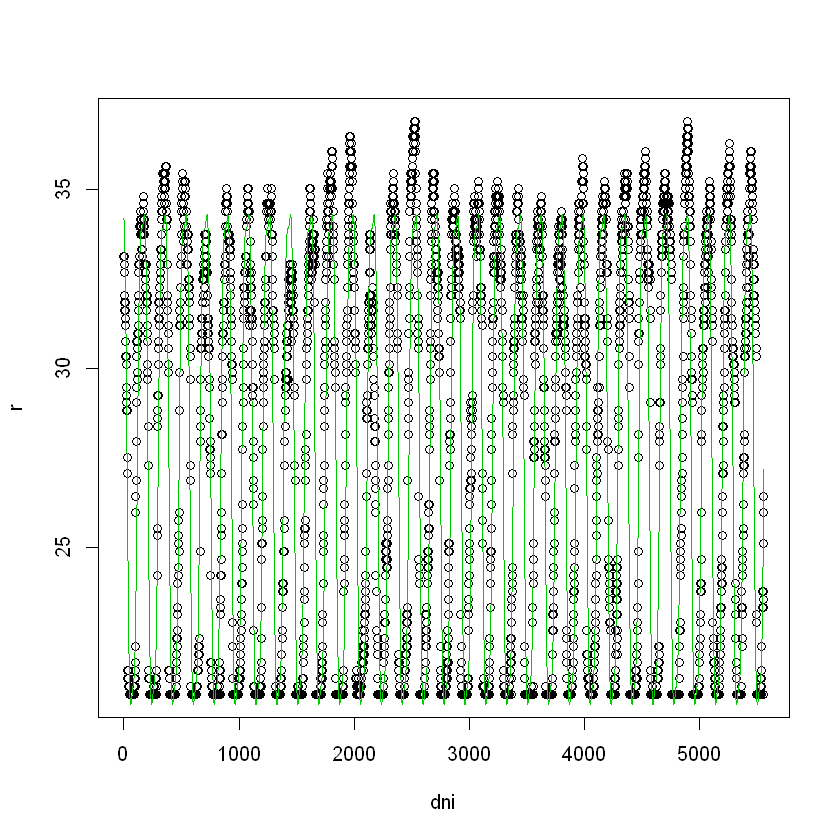

In [4]:
#pętla z aproksymacją
for (i in 2:362) {
 
    r<-dane_wyciente[,i]
    r<-r+90
    ssp <- spectrum(r)  
    per <- 1/ssp$freq[ssp$spec==max(ssp$spec)]
    #reslm <- lm(r ~ sin(2*pi/per*dni)+cos(2*pi/per*dni))    #pierwsza harmoniczna
    #reslm2 <- lm(r ~ sin(2*pi/per*dni)+cos(2*pi/per*dni)+sin(4*pi/per*dni)+cos(4*pi/per*dni))  #druga harmoniczna
    reslm3 <- lm(r ~ sin(2*pi/per*dni)+cos(2*pi/per*dni)+sin(4*pi/per*dni)+cos(4*pi/per*dni)+sin(6*pi/per*dni)+cos(6*pi/per*dni)) #trzecia harmoniczna
    #reslm4 <- lm(r ~ sin(2*pi/per*dni)+cos(2*pi/per*dni)+sin(4*pi/per*dni)+cos(4*pi/per*dni)+sin(6*pi/per*dni)+cos(6*pi/per*dni)+sin(8*pi/per*dni)+cos(8*pi/per*dni)) #czwarta harmoniczna
    model_matematyczny<- cbind(model_matematyczny, fitted(reslm3))
}

plot(dni,r)
lines(dni, fitted(reslm3), col=3) 

In [ ]:
#wyrysowanie wykresu dla pierwszego dnia

rzecz<-dane_wyciente[,-1]
m<-model_matematyczny[,-1]
x<-seq(1,360,1)
theta<-x*pi / 180
y<-apply(data1[-1],2,min)
r<-y+90
saveGIF({
  for (i in 1:5560) {
    w_rzecz <- as.vector(unlist(rzecz[i, ]))
    w_rzecz<-w_rzecz+90
    w <- as.vector(unlist(m[i, ]))
    
   
    if(i%%10==0 || i==1){
      plot(r * sin(theta),r*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2)
      
      lines(w * sin(theta),w*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2,col = "blue")
    
      lines(w_rzecz * sin(theta),w_rzecz*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2,col = "green")
      par(xpd = TRUE)
      legend("bottomleft", legend = c("Najmniejszy zasięg", "Model matematyczny", "Model rzeczywisty"), col = c("black", "blue", "green"), lty = 1, bty = "n", cex = 0.8)
      text(-30,35,dane_wyciente[i,1])#200 to dwusetna iteracja
      title("Zasięg lodu na Antarktydzie")
      
      
      
      
    }
  }
})






#koniec kody, na dole funkcje do budowy gifa
y<-apply(data1[-1],2,min)
x<-seq(0,360,1)


#przeliczanie kątów na radiany
theta<-x*pi / 180

#odwrócenie układu, żeby patrzeć od antarktydy do równika
r<-y+90
plot(r * sin(theta),r*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2)
m<-model_matematyczny[,-1]
w <- as.vector(unlist(m[1, ]))
lines(w * sin(theta),w*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2,col = "blue")
m<-dane_wyciente[,-1]
w <- as.vector(unlist(m[1, ]))
w<-w+90
lines(w * sin(theta),w*cos(theta),t="l",xlim=c(-40,40),ylim=c(-40,40),xlab="",ylab="",lwd=2,col = "green")
par(xpd = TRUE)
legend("bottomleft", legend = c("Najmniejszy zasięg", "Model matematyczny", "Model rzeczywisty"), col = c("black", "blue", "green"), lty = 1, bty = "n", cex = 0.8)
text(-30,35,dane_wyciente[200,1])#200 to dwusetna iteracja
title("Zasięg lodu na Antarktydzie")

Warning message in r * sin(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in r * cos(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in w * sin(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in w * cos(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in w_rzecz * sin(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in w_rzecz * cos(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in r * sin(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in r * cos(theta):
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"Warning message in w * sin(theta):
"długość dłuszego obiektu nie jest wielokrotności